In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
D001_df = pd.read_csv('./../../../../../Data/SensorsData/interpolated_D001_data.csv')
D001_df = D001_df.iloc[913:]
D001_df = pd.DataFrame(D001_df)
D001_df['time'] =  pd.to_datetime(D001_df['time'], format='%Y-%m-%d %H:%M:%S')
D001_df.index = D001_df['time']
D001_df = D001_df.drop(['time'],axis = 1)

In [11]:
def df_to_X_y(df,hoursToPredict, windowSize):
        hoursToPredict = hoursToPredict - 1
        df_as_np = df.to_numpy() # converts the dataframe to a numpy array
        #Initialized  arrays to append X and Y values 
        X = []
        y = []
        for i in range(len(df_as_np)):
            if((i + hoursToPredict + windowSize)< len(df_as_np)):
                #Takes values from i to i + win size
                row =  [r for r in df_as_np[i:i+windowSize]]
                X.append(row)
                label = df_as_np[i + hoursToPredict + windowSize ][1]
                y.append(label)
        return np.array(X), np.array(y)

In [12]:
def DataHandler(hoursToPredict,windowSize):
    X1, y1 = df_to_X_y(D001_df,hoursToPredict,windowSize)

    return X1, y1

In [13]:
plt.style.use('seaborn')

In [14]:
def Trainer(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        model = Sequential()
        model.add(InputLayer((windowSize, 5)))
        model.add(LSTM(64))
        model.add(Dense(8, 'relu'))
        model.add(Dense(1, 'linear'))

        model.summary()
        X, y = DataHandler(time,windowSize)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle= False) 

        X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
        
        cp1= ModelCheckpoint(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/", save_best_only=True)
        model.compile(loss=MeanSquaredError(), 
                   optimizer=Adam(learning_rate=0.0001), 
                   metrics=[MeanAbsoluteError()])
    
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
        windowSize += 1
        print()
        print("-----------------------------------------------------------------------------------------------------------")
        print()

In [15]:
def modelsEvaluator(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        X, y = DataHandler(time,windowSize)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle = False) 
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
       
        print("Loading: "+ str(time)+"H_Forecast/" + str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model = load_model(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model.evaluate(X_test,y_test)
        
        test_predictions = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions '+str(time) + ' hour model':test_predictions, 'Actuals':y_test})
        
        windowSize += 1

In [16]:
%%time

Trainer(1,6,12)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 7s 17ms/step - loss: 110991.2266 - mean_absolute_error: 248.1545 - val_loss: 149794.0781 - val_mean_absolute_error: 333.1819
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110005.9297 - mean_absolute_error: 246.1815 - val_loss: 148151.3125 - val_mean_absolute_error: 330.4405
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 10ms/step - loss: 108217.8672 - mean_absolute_error: 242.6031 - val_loss: 144751.6875 - val_mean_absolute_error: 325.2583
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 11ms/step - loss: 105477.0938 - mean_absolute_error: 237.5438 - val_loss: 140952.4062 - val_mean_absolute_error: 319.5529
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 8ms/step - loss: 102799.1875 - mean_absolute_error: 232.6536 - val_loss: 137307.9844 - val_mean_absolute_error: 313.9588
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 10ms/step - loss: 100429.1641 - mean_absolute_error: 228.3723 - val_loss: 134390.9844 - val_mean_absolute_error: 309.3150
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 7ms/step - loss: 98303.3672 - mean_absolute_error: 224.3364 - val_loss: 131203.7031 - val_mean_absolute_error: 304.1422
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 96071.8750 - mean_absolute_error: 220.2616 - val_loss: 128404.8438 - val_mean_absolute_error: 299.5775
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 7ms/step - loss: 94075.9375 - mean_absolute_error: 216.4992 - val_loss: 125640.2656 - val_mean_absolute_error: 295.0059
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 6ms/step - loss: 92103.7500 - mean_absolute_error: 212.8617 - val_loss: 122865.7734 - val_mean_absolute_error: 290.3454
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 6ms/step - loss: 90126.5156 - mean_absolute_error: 209.2008 - val_loss: 120073.9922 - val_mean_absolute_error: 285.5959
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 88091.6172 - mean_absolute_error: 205.2923 - val_loss: 117096.4062 - val_mean_absolute_error: 280.4887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 11ms/step - loss: 85965.2188 - mean_absolute_error: 201.4337 - val_loss: 114149.6172 - val_mean_absolute_error: 275.4147
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 10ms/step - loss: 83888.1719 - mean_absolute_error: 197.5757 - val_loss: 111211.7109 - val_mean_absolute_error: 270.3316
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 7ms/step - loss: 81805.0391 - mean_absolute_error: 193.5030 - val_loss: 108258.7266 - val_mean_absolute_error: 265.1614
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 8ms/step - loss: 79764.5625 - mean_absolute_error: 189.5936 - val_loss: 105344.9375 - val_mean_absolute_error: 260.0549
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 7ms/step - loss: 77726.6719 - mean_absolute_error: 185.8665 - val_loss: 102436.0391 - val_mean_absolute_error: 254.9509
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 75640.2031 - mean_absolute_error: 181.6335 - val_loss: 99303.1172 - val_mean_absolute_error: 249.4489
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 73504.2188 - mean_absolute_error: 177.2488 - val_loss: 96302.6719 - val_mean_absolute_error: 244.1958
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 7ms/step - loss: 71439.6016 - mean_absolute_error: 173.0047 - val_loss: 93338.4141 - val_mean_absolute_error: 238.9702
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 7ms/step - loss: 69405.5312 - mean_absolute_error: 169.0685 - val_loss: 90402.8359 - val_mean_absolute_error: 233.7027
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 7ms/step - loss: 67383.4453 - mean_absolute_error: 164.6045 - val_loss: 87254.3047 - val_mean_absolute_error: 228.0601
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 7ms/step - loss: 65097.8125 - mean_absolute_error: 160.0583 - val_loss: 84031.2109 - val_mean_absolute_error: 222.1363
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 7ms/step - loss: 62894.3828 - mean_absolute_error: 155.3952 - val_loss: 80777.3125 - val_mean_absolute_error: 216.0778
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 6ms/step - loss: 60802.2539 - mean_absolute_error: 150.7574 - val_loss: 77725.4766 - val_mean_absolute_error: 210.2652
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 7ms/step - loss: 58787.0117 - mean_absolute_error: 146.2527 - val_loss: 74797.3984 - val_mean_absolute_error: 204.5835
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 56860.3203 - mean_absolute_error: 141.7969 - val_loss: 71980.1016 - val_mean_absolute_error: 199.1527
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 8ms/step - loss: 54996.8008 - mean_absolute_error: 137.5491 - val_loss: 69216.4766 - val_mean_absolute_error: 193.7370
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 8ms/step - loss: 53192.6602 - mean_absolute_error: 133.3986 - val_loss: 66532.3828 - val_mean_absolute_error: 188.3838
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 51395.8398 - mean_absolute_error: 129.2601 - val_loss: 63561.7812 - val_mean_absolute_error: 182.5923
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 49438.6797 - mean_absolute_error: 124.9100 - val_loss: 60809.2148 - val_mean_absolute_error: 177.0871
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 47735.2188 - mean_absolute_error: 120.6182 - val_loss: 58183.0391 - val_mean_absolute_error: 172.0511
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 46037.8906 - mean_absolute_error: 117.1448 - val_loss: 55624.3555 - val_mean_absolute_error: 167.0048
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 44450.2500 - mean_absolute_error: 113.2486 - val_loss: 53196.2344 - val_mean_absolute_error: 162.1755
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 42929.2812 - mean_absolute_error: 109.4961 - val_loss: 50835.5469 - val_mean_absolute_error: 157.5060
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 41321.1172 - mean_absolute_error: 105.4381 - val_loss: 48228.1562 - val_mean_absolute_error: 151.9381
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 39854.2148 - mean_absolute_error: 101.8596 - val_loss: 46013.6680 - val_mean_absolute_error: 147.2951
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 38494.3477 - mean_absolute_error: 98.5113 - val_loss: 43868.2070 - val_mean_absolute_error: 142.8966
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 3s 16ms/step - loss: 37193.9531 - mean_absolute_error: 95.1589 - val_loss: 41810.8945 - val_mean_absolute_error: 138.4417
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 35952.0469 - mean_absolute_error: 92.1830 - val_loss: 39823.9609 - val_mean_absolute_error: 134.2397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 34761.9102 - mean_absolute_error: 88.8643 - val_loss: 37903.2305 - val_mean_absolute_error: 130.0512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 33644.5938 - mean_absolute_error: 86.3010 - val_loss: 36075.3906 - val_mean_absolute_error: 126.0118
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 32566.0020 - mean_absolute_error: 83.6211 - val_loss: 34332.0156 - val_mean_absolute_error: 122.0329
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 7ms/step - loss: 31539.2715 - mean_absolute_error: 80.5652 - val_loss: 32611.4785 - val_mean_absolute_error: 118.0082
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 30543.3730 - mean_absolute_error: 78.2377 - val_loss: 31015.4824 - val_mean_absolute_error: 114.4169
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 29602.7227 - mean_absolute_error: 75.5393 - val_loss: 29395.5430 - val_mean_absolute_error: 110.4789
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 28707.4062 - mean_absolute_error: 73.3361 - val_loss: 27913.1953 - val_mean_absolute_error: 106.9390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 27851.2441 - mean_absolute_error: 70.8306 - val_loss: 26505.7969 - val_mean_absolute_error: 103.6779
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 27040.1914 - mean_absolute_error: 68.7873 - val_loss: 25126.8555 - val_mean_absolute_error: 100.0949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 26273.0488 - mean_absolute_error: 66.5163 - val_loss: 23815.0977 - val_mean_absolute_error: 96.7018
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 25551.9414 - mean_absolute_error: 64.6189 - val_loss: 22575.0938 - val_mean_absolute_error: 93.4755
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 10ms/step - loss: 24862.6348 - mean_absolute_error: 62.5913 - val_loss: 21440.9805 - val_mean_absolute_error: 90.6655
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 7ms/step - loss: 24202.4395 - mean_absolute_error: 60.6170 - val_loss: 20303.5977 - val_mean_absolute_error: 87.7068
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 23578.3379 - mean_absolute_error: 58.9540 - val_loss: 19274.9434 - val_mean_absolute_error: 85.0540
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 7ms/step - loss: 23004.9688 - mean_absolute_error: 56.9971 - val_loss: 18205.1387 - val_mean_absolute_error: 81.8883
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 7ms/step - loss: 22454.9395 - mean_absolute_error: 55.7680 - val_loss: 17323.9082 - val_mean_absolute_error: 79.6842
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 21950.3066 - mean_absolute_error: 54.0557 - val_loss: 16374.9316 - val_mean_absolute_error: 76.7139
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 6ms/step - loss: 21455.5137 - mean_absolute_error: 52.5558 - val_loss: 15539.1943 - val_mean_absolute_error: 74.5487
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 6ms/step - loss: 20995.0508 - mean_absolute_error: 51.2560 - val_loss: 14711.0361 - val_mean_absolute_error: 71.9788
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 6ms/step - loss: 20568.7969 - mean_absolute_error: 49.8757 - val_loss: 13976.6221 - val_mean_absolute_error: 69.8501
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 20171.7773 - mean_absolute_error: 48.4711 - val_loss: 13283.4629 - val_mean_absolute_error: 67.8980
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 6ms/step - loss: 19798.0352 - mean_absolute_error: 47.4480 - val_loss: 12656.5654 - val_mean_absolute_error: 66.1834
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 6ms/step - loss: 19439.0957 - mean_absolute_error: 46.1724 - val_loss: 12033.1924 - val_mean_absolute_error: 64.2887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 6ms/step - loss: 19105.0703 - mean_absolute_error: 45.2721 - val_loss: 11394.5010 - val_mean_absolute_error: 62.0239
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 18785.2793 - mean_absolute_error: 44.0345 - val_loss: 10832.6807 - val_mean_absolute_error: 60.3135
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 7ms/step - loss: 18503.2090 - mean_absolute_error: 43.1907 - val_loss: 10293.5586 - val_mean_absolute_error: 58.4470
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 18238.3672 - mean_absolute_error: 42.2490 - val_loss: 9966.0234 - val_mean_absolute_error: 58.2156
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 6ms/step - loss: 17987.2422 - mean_absolute_error: 41.4734 - val_loss: 9392.1377 - val_mean_absolute_error: 55.6512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 6ms/step - loss: 17747.3203 - mean_absolute_error: 40.4294 - val_loss: 8918.8604 - val_mean_absolute_error: 54.0539
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 17536.0801 - mean_absolute_error: 39.8448 - val_loss: 8594.6982 - val_mean_absolute_error: 53.1669
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 17337.1562 - mean_absolute_error: 39.1384 - val_loss: 8237.3574 - val_mean_absolute_error: 51.8812
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 7ms/step - loss: 17159.9648 - mean_absolute_error: 38.4739 - val_loss: 7926.0903 - val_mean_absolute_error: 51.0095
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 6ms/step - loss: 16997.8887 - mean_absolute_error: 38.0215 - val_loss: 7583.9707 - val_mean_absolute_error: 49.6868
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 16834.1172 - mean_absolute_error: 37.4839 - val_loss: 7285.0273 - val_mean_absolute_error: 48.7092
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 7ms/step - loss: 16695.4590 - mean_absolute_error: 36.8445 - val_loss: 7043.0391 - val_mean_absolute_error: 48.2163
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 16567.3867 - mean_absolute_error: 36.4840 - val_loss: 6750.3726 - val_mean_absolute_error: 46.9778
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 7ms/step - loss: 16430.6602 - mean_absolute_error: 36.1873 - val_loss: 6518.4946 - val_mean_absolute_error: 46.3866
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 7ms/step - loss: 16307.6279 - mean_absolute_error: 35.7448 - val_loss: 6290.3174 - val_mean_absolute_error: 45.4572
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 7ms/step - loss: 16198.3828 - mean_absolute_error: 35.1674 - val_loss: 6109.7764 - val_mean_absolute_error: 45.0374
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 6ms/step - loss: 16099.3213 - mean_absolute_error: 34.9400 - val_loss: 5940.5796 - val_mean_absolute_error: 44.6794
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 15993.2080 - mean_absolute_error: 34.7085 - val_loss: 5756.2510 - val_mean_absolute_error: 43.9822
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 6ms/step - loss: 15860.1494 - mean_absolute_error: 34.4338 - val_loss: 5586.0732 - val_mean_absolute_error: 43.5894
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 6ms/step - loss: 15778.7275 - mean_absolute_error: 33.9826 - val_loss: 5390.5684 - val_mean_absolute_error: 42.7469
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 6ms/step - loss: 15701.6797 - mean_absolute_error: 33.8331 - val_loss: 5196.3564 - val_mean_absolute_error: 41.8960
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 6ms/step - loss: 15600.7871 - mean_absolute_error: 33.6588 - val_loss: 5030.7178 - val_mean_absolute_error: 41.3412
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 6ms/step - loss: 15532.2529 - mean_absolute_error: 33.2509 - val_loss: 4884.4058 - val_mean_absolute_error: 40.7964
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 6ms/step - loss: 15458.2139 - mean_absolute_error: 33.0607 - val_loss: 4894.7046 - val_mean_absolute_error: 41.3831
Epoch 88/100
161/161 [==============================] - 1s 6ms/step - loss: 15374.5039 - mean_absolute_error: 32.9791 - val_loss: 4776.0947 - val_mean_absolute_error: 40.9674
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 6ms/step - loss: 15299.3613 - mean_absolute_error: 32.6058 - val_loss: 4616.9756 - val_mean_absolute_error: 40.1097
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 6ms/step - loss: 15236.1592 - mean_absolute_error: 32.2534 - val_loss: 4515.1333 - val_mean_absolute_error: 39.6997
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 6ms/step - loss: 15173.5586 - mean_absolute_error: 32.1199 - val_loss: 4418.4038 - val_mean_absolute_error: 39.4167
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 6ms/step - loss: 15115.2783 - mean_absolute_error: 32.0352 - val_loss: 4213.2739 - val_mean_absolute_error: 38.1475
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 6ms/step - loss: 15067.9668 - mean_absolute_error: 31.7523 - val_loss: 4130.1670 - val_mean_absolute_error: 37.8927
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 7ms/step - loss: 15011.4736 - mean_absolute_error: 31.6545 - val_loss: 4077.1013 - val_mean_absolute_error: 37.9204
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 6ms/step - loss: 14954.9385 - mean_absolute_error: 31.4865 - val_loss: 4017.6152 - val_mean_absolute_error: 37.9139
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 14913.9814 - mean_absolute_error: 31.3097 - val_loss: 3940.1599 - val_mean_absolute_error: 37.6042
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 14870.0752 - mean_absolute_error: 31.3223 - val_loss: 3967.6304 - val_mean_absolute_error: 38.0336
Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 14816.0059 - mean_absolute_error: 31.1213 - val_loss: 3778.3672 - val_mean_absolute_error: 36.7889
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 14778.7217 - mean_absolute_error: 30.9770 - val_loss: 3784.6675 - val_mean_absolute_error: 37.1216
Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 14738.0957 - mean_absolute_error: 30.7941 - val_loss: 3731.4045 - val_mean_absolute_error: 36.9389
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 10ms/step - loss: 111802.5938 - mean_absolute_error: 249.6476 - val_loss: 151700.0156 - val_mean_absolute_error: 335.7870
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 111655.3203 - mean_absolute_error: 249.3063 - val_loss: 151546.5156 - val_mean_absolute_error: 335.5670
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 7ms/step - loss: 111523.1250 - mean_absolute_error: 249.0682 - val_loss: 151285.0938 - val_mean_absolute_error: 335.1714
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 7ms/step - loss: 111288.8672 - mean_absolute_error: 248.6159 - val_loss: 150964.2969 - val_mean_absolute_error: 334.6779
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 111067.6875 - mean_absolute_error: 248.1594 - val_loss: 150675.0000 - val_mean_absolute_error: 334.2132
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 7ms/step - loss: 110819.0078 - mean_absolute_error: 247.6758 - val_loss: 150281.7969 - val_mean_absolute_error: 333.6325
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 7ms/step - loss: 110466.5703 - mean_absolute_error: 246.9826 - val_loss: 149701.2812 - val_mean_absolute_error: 332.7423
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 109981.1875 - mean_absolute_error: 246.0400 - val_loss: 149029.5781 - val_mean_absolute_error: 331.7848
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 7ms/step - loss: 109554.4141 - mean_absolute_error: 245.2473 - val_loss: 148480.2188 - val_mean_absolute_error: 330.9632
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 7ms/step - loss: 109150.8125 - mean_absolute_error: 244.4623 - val_loss: 147962.0312 - val_mean_absolute_error: 330.1813
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 8ms/step - loss: 108771.2109 - mean_absolute_error: 243.7446 - val_loss: 147439.0000 - val_mean_absolute_error: 329.4030
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 7ms/step - loss: 108377.5312 - mean_absolute_error: 242.9914 - val_loss: 146845.3281 - val_mean_absolute_error: 328.5047
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 7ms/step - loss: 107948.5391 - mean_absolute_error: 242.1768 - val_loss: 146301.3750 - val_mean_absolute_error: 327.6758
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 107531.2656 - mean_absolute_error: 241.3899 - val_loss: 145716.5469 - val_mean_absolute_error: 326.7844
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 7ms/step - loss: 107107.0625 - mean_absolute_error: 240.5943 - val_loss: 145137.7500 - val_mean_absolute_error: 325.8987
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 7ms/step - loss: 106680.7344 - mean_absolute_error: 239.8025 - val_loss: 144551.5781 - val_mean_absolute_error: 325.0002
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 6ms/step - loss: 106227.5000 - mean_absolute_error: 238.9547 - val_loss: 143896.7812 - val_mean_absolute_error: 323.9936
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 105752.5312 - mean_absolute_error: 238.0733 - val_loss: 143260.7812 - val_mean_absolute_error: 323.0129
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 7ms/step - loss: 105287.8594 - mean_absolute_error: 237.2107 - val_loss: 142618.3750 - val_mean_absolute_error: 322.0192
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 7ms/step - loss: 104812.7891 - mean_absolute_error: 236.3421 - val_loss: 141962.8438 - val_mean_absolute_error: 321.0020
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 7ms/step - loss: 104326.1406 - mean_absolute_error: 235.4389 - val_loss: 141287.9375 - val_mean_absolute_error: 319.9515
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 7ms/step - loss: 103811.4766 - mean_absolute_error: 234.4938 - val_loss: 140554.5156 - val_mean_absolute_error: 318.8059
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 103288.5391 - mean_absolute_error: 233.5482 - val_loss: 139851.6562 - val_mean_absolute_error: 317.7055
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 102756.6484 - mean_absolute_error: 232.5665 - val_loss: 139072.3438 - val_mean_absolute_error: 316.4824
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 7ms/step - loss: 102190.0391 - mean_absolute_error: 231.5075 - val_loss: 138316.6875 - val_mean_absolute_error: 315.2936
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 101637.9609 - mean_absolute_error: 230.4993 - val_loss: 137555.7500 - val_mean_absolute_error: 314.0940
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 101080.8203 - mean_absolute_error: 229.4740 - val_loss: 136780.0625 - val_mean_absolute_error: 312.8668
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 100513.6953 - mean_absolute_error: 228.4345 - val_loss: 135994.4844 - val_mean_absolute_error: 311.6190
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 99937.7969 - mean_absolute_error: 227.3780 - val_loss: 135197.0312 - val_mean_absolute_error: 310.3481
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 99357.5391 - mean_absolute_error: 226.2731 - val_loss: 134388.2188 - val_mean_absolute_error: 309.0546
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 98767.6172 - mean_absolute_error: 225.2662 - val_loss: 133568.8750 - val_mean_absolute_error: 307.7397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 98171.3203 - mean_absolute_error: 224.1434 - val_loss: 132737.8594 - val_mean_absolute_error: 306.4006
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 97569.5078 - mean_absolute_error: 223.0555 - val_loss: 131897.4844 - val_mean_absolute_error: 305.0423
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 96935.7344 - mean_absolute_error: 221.8595 - val_loss: 130891.3906 - val_mean_absolute_error: 303.4128
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 96210.3516 - mean_absolute_error: 220.5080 - val_loss: 129952.1016 - val_mean_absolute_error: 301.8730
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 95519.7422 - mean_absolute_error: 219.2477 - val_loss: 129000.1484 - val_mean_absolute_error: 300.3278
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 94850.8828 - mean_absolute_error: 218.0263 - val_loss: 128073.8906 - val_mean_absolute_error: 298.8066
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 94183.1094 - mean_absolute_error: 216.6965 - val_loss: 127139.4062 - val_mean_absolute_error: 297.2645
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 7ms/step - loss: 93512.1875 - mean_absolute_error: 215.5959 - val_loss: 126202.1562 - val_mean_absolute_error: 295.7106
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 92836.7734 - mean_absolute_error: 214.3114 - val_loss: 125251.3438 - val_mean_absolute_error: 294.1246
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 92153.3828 - mean_absolute_error: 213.0530 - val_loss: 124299.6172 - val_mean_absolute_error: 292.5315
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 91469.9766 - mean_absolute_error: 211.7787 - val_loss: 123329.8047 - val_mean_absolute_error: 290.8988
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 90778.0781 - mean_absolute_error: 210.4344 - val_loss: 122355.6250 - val_mean_absolute_error: 289.2505
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 90082.3359 - mean_absolute_error: 209.2590 - val_loss: 121376.3750 - val_mean_absolute_error: 287.5877
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 89380.6250 - mean_absolute_error: 207.8558 - val_loss: 120385.5703 - val_mean_absolute_error: 285.8996
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - ETA: 0s - loss: 88933.1953 - mean_absolute_error: 206.221 - 1s 7ms/step - loss: 88677.4922 - mean_absolute_error: 206.5827 - val_loss: 119394.9453 - val_mean_absolute_error: 284.2092
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 87968.3047 - mean_absolute_error: 205.1883 - val_loss: 118389.0547 - val_mean_absolute_error: 282.4898
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 87251.5703 - mean_absolute_error: 203.8470 - val_loss: 117379.9531 - val_mean_absolute_error: 280.7580
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 86527.3281 - mean_absolute_error: 202.5568 - val_loss: 116364.7578 - val_mean_absolute_error: 279.0155
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 85807.6719 - mean_absolute_error: 201.1228 - val_loss: 115346.1484 - val_mean_absolute_error: 277.2690
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 7ms/step - loss: 85081.3828 - mean_absolute_error: 199.7720 - val_loss: 114315.4062 - val_mean_absolute_error: 275.4909
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 84354.1953 - mean_absolute_error: 198.4541 - val_loss: 113280.8281 - val_mean_absolute_error: 273.7100
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 7ms/step - loss: 83620.6406 - mean_absolute_error: 197.0161 - val_loss: 112244.6172 - val_mean_absolute_error: 271.9286
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 82881.0078 - mean_absolute_error: 195.6100 - val_loss: 111200.6875 - val_mean_absolute_error: 270.1284
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 7ms/step - loss: 82142.7188 - mean_absolute_error: 194.0865 - val_loss: 110151.3281 - val_mean_absolute_error: 268.2883
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 7ms/step - loss: 81406.6094 - mean_absolute_error: 192.7217 - val_loss: 109099.7031 - val_mean_absolute_error: 266.4491
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 80666.5625 - mean_absolute_error: 191.5203 - val_loss: 108046.1953 - val_mean_absolute_error: 264.6067
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 79923.5625 - mean_absolute_error: 189.9151 - val_loss: 106982.5547 - val_mean_absolute_error: 262.7475
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 79157.4922 - mean_absolute_error: 188.2792 - val_loss: 105867.4453 - val_mean_absolute_error: 260.7838
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 78386.4141 - mean_absolute_error: 186.8960 - val_loss: 104776.3438 - val_mean_absolute_error: 258.8722
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 77616.9531 - mean_absolute_error: 185.4234 - val_loss: 103689.5859 - val_mean_absolute_error: 256.9626
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 76848.4531 - mean_absolute_error: 183.8241 - val_loss: 102593.5078 - val_mean_absolute_error: 255.0377
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 76083.5859 - mean_absolute_error: 182.4823 - val_loss: 101495.1562 - val_mean_absolute_error: 253.1110
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 75318.5000 - mean_absolute_error: 180.7551 - val_loss: 100402.4844 - val_mean_absolute_error: 251.1950
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 74555.8750 - mean_absolute_error: 179.2850 - val_loss: 99298.0547 - val_mean_absolute_error: 249.2746
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 73788.7500 - mean_absolute_error: 177.7474 - val_loss: 98199.5312 - val_mean_absolute_error: 247.3595
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 73012.7500 - mean_absolute_error: 176.2519 - val_loss: 97094.4297 - val_mean_absolute_error: 245.4266
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 72243.1875 - mean_absolute_error: 174.6699 - val_loss: 95990.1484 - val_mean_absolute_error: 243.4719
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 71480.4141 - mean_absolute_error: 173.1517 - val_loss: 94892.0859 - val_mean_absolute_error: 241.5172
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 70720.2734 - mean_absolute_error: 171.5592 - val_loss: 93795.8125 - val_mean_absolute_error: 239.5719
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 69959.7422 - mean_absolute_error: 170.0410 - val_loss: 92694.0547 - val_mean_absolute_error: 237.5881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 69198.2734 - mean_absolute_error: 168.3216 - val_loss: 91591.0703 - val_mean_absolute_error: 235.6202
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 7ms/step - loss: 68425.9297 - mean_absolute_error: 166.6123 - val_loss: 90454.6953 - val_mean_absolute_error: 233.6747
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 67638.3359 - mean_absolute_error: 164.9317 - val_loss: 89312.9297 - val_mean_absolute_error: 231.5879
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 7ms/step - loss: 66854.9219 - mean_absolute_error: 163.3472 - val_loss: 88181.0547 - val_mean_absolute_error: 229.5114
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 66080.5156 - mean_absolute_error: 161.6557 - val_loss: 87055.4375 - val_mean_absolute_error: 227.4318
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 7ms/step - loss: 65312.8984 - mean_absolute_error: 160.1039 - val_loss: 85937.0859 - val_mean_absolute_error: 225.3557
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 64549.7969 - mean_absolute_error: 158.4184 - val_loss: 84820.6094 - val_mean_absolute_error: 223.3177
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 7ms/step - loss: 63788.6719 - mean_absolute_error: 156.7875 - val_loss: 83705.8672 - val_mean_absolute_error: 221.1874
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 7ms/step - loss: 63032.1016 - mean_absolute_error: 155.2399 - val_loss: 82595.6719 - val_mean_absolute_error: 219.1130
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 62273.0938 - mean_absolute_error: 153.6475 - val_loss: 81453.3594 - val_mean_absolute_error: 217.0118
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 7ms/step - loss: 61468.5391 - mean_absolute_error: 151.9737 - val_loss: 80268.4062 - val_mean_absolute_error: 214.7713
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 60686.5703 - mean_absolute_error: 150.1550 - val_loss: 79135.8984 - val_mean_absolute_error: 212.6345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 7ms/step - loss: 59922.0781 - mean_absolute_error: 148.5075 - val_loss: 78013.4375 - val_mean_absolute_error: 210.4297
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 7ms/step - loss: 59167.6133 - mean_absolute_error: 146.9720 - val_loss: 76907.3750 - val_mean_absolute_error: 208.2157
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 7ms/step - loss: 58423.6484 - mean_absolute_error: 145.0026 - val_loss: 75801.9219 - val_mean_absolute_error: 206.2235
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 7ms/step - loss: 57685.1602 - mean_absolute_error: 143.5920 - val_loss: 74703.4453 - val_mean_absolute_error: 204.0414
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 56949.6328 - mean_absolute_error: 141.8398 - val_loss: 73613.9375 - val_mean_absolute_error: 201.9654
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 7ms/step - loss: 56216.9180 - mean_absolute_error: 140.2950 - val_loss: 72534.9766 - val_mean_absolute_error: 199.8028
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 55491.3555 - mean_absolute_error: 138.5563 - val_loss: 71439.8203 - val_mean_absolute_error: 197.6346
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 7ms/step - loss: 54770.6484 - mean_absolute_error: 136.9346 - val_loss: 70367.4375 - val_mean_absolute_error: 195.5563
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 54056.3750 - mean_absolute_error: 135.2112 - val_loss: 69301.1484 - val_mean_absolute_error: 193.5717
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 9ms/step - loss: 53340.9258 - mean_absolute_error: 133.7235 - val_loss: 68245.0234 - val_mean_absolute_error: 191.4418
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 52644.2344 - mean_absolute_error: 131.8741 - val_loss: 67192.3125 - val_mean_absolute_error: 189.5173
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 51944.1797 - mean_absolute_error: 130.5801 - val_loss: 66131.1875 - val_mean_absolute_error: 187.3145
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 51258.5156 - mean_absolute_error: 128.8284 - val_loss: 65099.6250 - val_mean_absolute_error: 185.3790
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 50567.0430 - mean_absolute_error: 127.1827 - val_loss: 64057.1797 - val_mean_absolute_error: 183.2970
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 49880.3867 - mean_absolute_error: 125.6231 - val_loss: 63017.9922 - val_mean_absolute_error: 181.1893
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 6ms/step - loss: 49202.2852 - mean_absolute_error: 123.9858 - val_loss: 61986.5703 - val_mean_absolute_error: 179.0970
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 6ms/step - loss: 48538.7852 - mean_absolute_error: 122.3419 - val_loss: 60979.5703 - val_mean_absolute_error: 177.2073
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 16ms/step - loss: 111583.2578 - mean_absolute_error: 249.0056 - val_loss: 151005.7188 - val_mean_absolute_error: 334.6692
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110622.0234 - mean_absolute_error: 247.1900 - val_loss: 149448.1719 - val_mean_absolute_error: 332.1640
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 9ms/step - loss: 109422.0391 - mean_absolute_error: 244.9268 - val_loss: 147719.7500 - val_mean_absolute_error: 329.6471
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 107889.2969 - mean_absolute_error: 242.0529 - val_loss: 145462.7188 - val_mean_absolute_error: 326.1337
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 8ms/step - loss: 106147.1562 - mean_absolute_error: 238.7733 - val_loss: 142894.0625 - val_mean_absolute_error: 322.3753
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 104421.5547 - mean_absolute_error: 235.6405 - val_loss: 140497.0469 - val_mean_absolute_error: 318.6298
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 102683.4766 - mean_absolute_error: 232.4148 - val_loss: 138226.5312 - val_mean_absolute_error: 315.0959
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 100935.1719 - mean_absolute_error: 229.1942 - val_loss: 135596.5000 - val_mean_absolute_error: 310.9393
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 7ms/step - loss: 99045.0078 - mean_absolute_error: 225.7491 - val_loss: 132965.0156 - val_mean_absolute_error: 306.7963
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 97178.3438 - mean_absolute_error: 222.3373 - val_loss: 130296.5078 - val_mean_absolute_error: 302.3191
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 95055.1328 - mean_absolute_error: 218.3710 - val_loss: 127212.0781 - val_mean_absolute_error: 297.4038
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 93055.6094 - mean_absolute_error: 214.5826 - val_loss: 124609.4922 - val_mean_absolute_error: 293.0586
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 7ms/step - loss: 91209.1641 - mean_absolute_error: 211.1798 - val_loss: 122006.3672 - val_mean_absolute_error: 288.6444
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 10ms/step - loss: 89286.5859 - mean_absolute_error: 207.6504 - val_loss: 119278.5781 - val_mean_absolute_error: 284.0137
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 8ms/step - loss: 87390.2734 - mean_absolute_error: 204.0466 - val_loss: 116647.0312 - val_mean_absolute_error: 279.5087
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 85557.1406 - mean_absolute_error: 200.4482 - val_loss: 114040.1797 - val_mean_absolute_error: 275.0273
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 8ms/step - loss: 83727.6719 - mean_absolute_error: 197.2613 - val_loss: 111448.1328 - val_mean_absolute_error: 270.5531
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 81800.1328 - mean_absolute_error: 193.4192 - val_loss: 108541.0469 - val_mean_absolute_error: 265.4622
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 79840.1719 - mean_absolute_error: 189.9104 - val_loss: 105794.7656 - val_mean_absolute_error: 260.7216
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 77766.1094 - mean_absolute_error: 185.7344 - val_loss: 102766.0391 - val_mean_absolute_error: 255.3761
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 7ms/step - loss: 75768.0469 - mean_absolute_error: 181.7989 - val_loss: 100025.5078 - val_mean_absolute_error: 250.5744
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 7ms/step - loss: 73885.5859 - mean_absolute_error: 178.1538 - val_loss: 97331.8281 - val_mean_absolute_error: 245.8771
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 7ms/step - loss: 72044.2578 - mean_absolute_error: 174.5186 - val_loss: 94678.2031 - val_mean_absolute_error: 241.2088
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 7ms/step - loss: 70192.6719 - mean_absolute_error: 170.7439 - val_loss: 92029.4062 - val_mean_absolute_error: 236.5442
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 7ms/step - loss: 68394.9844 - mean_absolute_error: 166.9501 - val_loss: 89387.3828 - val_mean_absolute_error: 231.8504
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 66627.8281 - mean_absolute_error: 163.2400 - val_loss: 86826.7578 - val_mean_absolute_error: 227.1919
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 64879.5586 - mean_absolute_error: 159.5499 - val_loss: 84254.2031 - val_mean_absolute_error: 222.4868
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 8ms/step - loss: 63149.1484 - mean_absolute_error: 156.0173 - val_loss: 81723.3438 - val_mean_absolute_error: 217.7645
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 61454.7539 - mean_absolute_error: 152.2403 - val_loss: 79221.8906 - val_mean_absolute_error: 213.1165
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 8ms/step - loss: 59784.3906 - mean_absolute_error: 148.8400 - val_loss: 76759.4688 - val_mean_absolute_error: 208.4254
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 58169.3086 - mean_absolute_error: 145.3585 - val_loss: 74318.7734 - val_mean_absolute_error: 203.6772
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 9ms/step - loss: 56564.5273 - mean_absolute_error: 141.8196 - val_loss: 71937.6719 - val_mean_absolute_error: 199.1103
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 7ms/step - loss: 54999.4492 - mean_absolute_error: 138.1613 - val_loss: 69590.5078 - val_mean_absolute_error: 194.4754
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 53465.7305 - mean_absolute_error: 134.6848 - val_loss: 67261.7500 - val_mean_absolute_error: 189.8469
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 51956.2031 - mean_absolute_error: 131.0136 - val_loss: 64996.0312 - val_mean_absolute_error: 185.3310
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - ETA: 0s - loss: 50508.1172 - mean_absolute_error: 127.833 - 1s 8ms/step - loss: 50480.7695 - mean_absolute_error: 127.7883 - val_loss: 62802.7539 - val_mean_absolute_error: 180.9787
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 49058.9688 - mean_absolute_error: 124.3822 - val_loss: 60612.3359 - val_mean_absolute_error: 176.6973
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 47534.5352 - mean_absolute_error: 120.9108 - val_loss: 58085.7109 - val_mean_absolute_error: 171.8340
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 46051.2734 - mean_absolute_error: 117.2319 - val_loss: 55944.8008 - val_mean_absolute_error: 167.8603
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 9ms/step - loss: 44646.9883 - mean_absolute_error: 114.3778 - val_loss: 53841.8750 - val_mean_absolute_error: 163.6468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 43374.7812 - mean_absolute_error: 111.1196 - val_loss: 51870.2188 - val_mean_absolute_error: 159.7097
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 42143.9922 - mean_absolute_error: 108.3810 - val_loss: 49960.7812 - val_mean_absolute_error: 155.8716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 40951.2383 - mean_absolute_error: 105.4575 - val_loss: 48093.1953 - val_mean_absolute_error: 152.1113
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 39790.8164 - mean_absolute_error: 102.6118 - val_loss: 46254.5273 - val_mean_absolute_error: 148.4253
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 38672.2305 - mean_absolute_error: 99.7151 - val_loss: 44436.6602 - val_mean_absolute_error: 144.4994
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 8ms/step - loss: 37591.4844 - mean_absolute_error: 97.0795 - val_loss: 42714.1211 - val_mean_absolute_error: 140.9210
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 36538.7188 - mean_absolute_error: 94.3106 - val_loss: 40998.6328 - val_mean_absolute_error: 137.2230
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 35531.3984 - mean_absolute_error: 91.9356 - val_loss: 39367.7148 - val_mean_absolute_error: 133.7785
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 34549.2266 - mean_absolute_error: 89.4192 - val_loss: 37703.0859 - val_mean_absolute_error: 130.1480
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 33593.8555 - mean_absolute_error: 87.3525 - val_loss: 36178.7734 - val_mean_absolute_error: 126.7946
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 7ms/step - loss: 32681.8633 - mean_absolute_error: 84.5591 - val_loss: 34651.7539 - val_mean_absolute_error: 123.3628
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 31801.2500 - mean_absolute_error: 82.5071 - val_loss: 33206.5156 - val_mean_absolute_error: 119.9389
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 7ms/step - loss: 30930.6055 - mean_absolute_error: 80.1293 - val_loss: 31779.2695 - val_mean_absolute_error: 116.6839
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 30123.3086 - mean_absolute_error: 77.7011 - val_loss: 30419.2246 - val_mean_absolute_error: 113.5285
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 8ms/step - loss: 29323.6875 - mean_absolute_error: 75.9909 - val_loss: 29134.2598 - val_mean_absolute_error: 110.6076
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 28581.8145 - mean_absolute_error: 73.7451 - val_loss: 27811.4238 - val_mean_absolute_error: 107.4687
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 8ms/step - loss: 27843.8105 - mean_absolute_error: 71.7798 - val_loss: 26566.0117 - val_mean_absolute_error: 104.2813
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 27148.1309 - mean_absolute_error: 69.7939 - val_loss: 25402.3301 - val_mean_absolute_error: 101.6041
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - ETA: 0s - loss: 26913.4395 - mean_absolute_error: 67.96 - 1s 8ms/step - loss: 26489.5508 - mean_absolute_error: 67.6544 - val_loss: 24206.4023 - val_mean_absolute_error: 98.5258
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 25855.2988 - mean_absolute_error: 66.1905 - val_loss: 23119.6211 - val_mean_absolute_error: 95.4975
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 25245.9434 - mean_absolute_error: 64.4138 - val_loss: 22126.4863 - val_mean_absolute_error: 92.9726
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 9ms/step - loss: 24659.4941 - mean_absolute_error: 62.6591 - val_loss: 21131.8242 - val_mean_absolute_error: 90.2134
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 24108.2344 - mean_absolute_error: 60.9138 - val_loss: 20208.8984 - val_mean_absolute_error: 87.7842
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 23564.8125 - mean_absolute_error: 59.0473 - val_loss: 19245.4746 - val_mean_absolute_error: 85.0947
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 23057.8281 - mean_absolute_error: 57.9450 - val_loss: 18359.0664 - val_mean_absolute_error: 82.5497
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - ETA: 0s - loss: 23164.6016 - mean_absolute_error: 56.52 - 1s 7ms/step - loss: 22571.1562 - mean_absolute_error: 56.2516 - val_loss: 17466.4297 - val_mean_absolute_error: 79.8219
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 22126.4570 - mean_absolute_error: 54.9281 - val_loss: 16709.3730 - val_mean_absolute_error: 77.7716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 21693.3203 - mean_absolute_error: 53.6588 - val_loss: 15960.9717 - val_mean_absolute_error: 75.8530
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 21294.1797 - mean_absolute_error: 52.2947 - val_loss: 15242.3809 - val_mean_absolute_error: 73.7645
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 20911.6836 - mean_absolute_error: 51.3237 - val_loss: 14611.6582 - val_mean_absolute_error: 72.0881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 8ms/step - loss: 20545.7871 - mean_absolute_error: 50.0057 - val_loss: 13949.6279 - val_mean_absolute_error: 70.0760
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 7ms/step - loss: 20195.9062 - mean_absolute_error: 49.0339 - val_loss: 13319.0098 - val_mean_absolute_error: 68.2928
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 10ms/step - loss: 19869.0332 - mean_absolute_error: 47.7132 - val_loss: 12697.4238 - val_mean_absolute_error: 66.1188
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 19558.8340 - mean_absolute_error: 46.9574 - val_loss: 12165.8633 - val_mean_absolute_error: 64.6973
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 8ms/step - loss: 19276.1953 - mean_absolute_error: 45.8976 - val_loss: 11668.1768 - val_mean_absolute_error: 63.1044
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 19000.4590 - mean_absolute_error: 44.8133 - val_loss: 11212.5186 - val_mean_absolute_error: 62.0701
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 7ms/step - loss: 18745.7402 - mean_absolute_error: 44.2528 - val_loss: 10679.4541 - val_mean_absolute_error: 60.0247
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 10ms/step - loss: 18505.6484 - mean_absolute_error: 43.2101 - val_loss: 10298.3154 - val_mean_absolute_error: 59.0442
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 18291.0605 - mean_absolute_error: 42.7287 - val_loss: 9852.3467 - val_mean_absolute_error: 57.3946
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 18064.6699 - mean_absolute_error: 42.0561 - val_loss: 9518.5596 - val_mean_absolute_error: 56.6574
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 17878.5957 - mean_absolute_error: 41.1978 - val_loss: 9130.1084 - val_mean_absolute_error: 55.2329
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 17698.2480 - mean_absolute_error: 40.6305 - val_loss: 8782.9570 - val_mean_absolute_error: 53.9693
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 17516.2930 - mean_absolute_error: 40.1927 - val_loss: 8427.9893 - val_mean_absolute_error: 52.6472
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 2s 12ms/step - loss: 17365.9863 - mean_absolute_error: 39.4580 - val_loss: 8142.2285 - val_mean_absolute_error: 51.6932
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 17205.6660 - mean_absolute_error: 39.0307 - val_loss: 7910.4756 - val_mean_absolute_error: 51.1838
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 7ms/step - loss: 17057.4453 - mean_absolute_error: 38.2888 - val_loss: 7577.0854 - val_mean_absolute_error: 49.7151
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 8ms/step - loss: 16911.4414 - mean_absolute_error: 37.9509 - val_loss: 7363.4038 - val_mean_absolute_error: 49.1051
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 8ms/step - loss: 16791.5234 - mean_absolute_error: 37.4650 - val_loss: 7105.4224 - val_mean_absolute_error: 48.0795
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 7ms/step - loss: 16666.5430 - mean_absolute_error: 36.8544 - val_loss: 6857.2847 - val_mean_absolute_error: 47.2824
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 16533.1855 - mean_absolute_error: 36.5082 - val_loss: 6713.3530 - val_mean_absolute_error: 46.9572
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 8ms/step - loss: 16423.3516 - mean_absolute_error: 36.1672 - val_loss: 6440.6797 - val_mean_absolute_error: 45.8009
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 7ms/step - loss: 16323.4375 - mean_absolute_error: 35.6325 - val_loss: 6263.6240 - val_mean_absolute_error: 45.2059
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 7ms/step - loss: 16233.5195 - mean_absolute_error: 35.7116 - val_loss: 6121.9717 - val_mean_absolute_error: 44.9859
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 7ms/step - loss: 16140.4941 - mean_absolute_error: 35.1206 - val_loss: 5864.2461 - val_mean_absolute_error: 43.4830
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 7ms/step - loss: 16040.7715 - mean_absolute_error: 35.0711 - val_loss: 5717.5679 - val_mean_absolute_error: 43.1430
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 8ms/step - loss: 15974.4443 - mean_absolute_error: 34.7655 - val_loss: 5549.4004 - val_mean_absolute_error: 42.4453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 15887.6797 - mean_absolute_error: 34.3800 - val_loss: 5429.1860 - val_mean_absolute_error: 42.1947
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 15825.2129 - mean_absolute_error: 34.2308 - val_loss: 5287.5024 - val_mean_absolute_error: 41.5339
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 15761.0137 - mean_absolute_error: 33.9781 - val_loss: 5200.1860 - val_mean_absolute_error: 41.5209
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 9ms/step - loss: 15677.3262 - mean_absolute_error: 33.6570 - val_loss: 5075.8608 - val_mean_absolute_error: 41.0452
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 12ms/step - loss: 111384.5312 - mean_absolute_error: 248.7855 - val_loss: 150813.4531 - val_mean_absolute_error: 334.3664
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 110762.7969 - mean_absolute_error: 247.6373 - val_loss: 149953.1406 - val_mean_absolute_error: 333.0679
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 8ms/step - loss: 110107.7500 - mean_absolute_error: 246.4194 - val_loss: 148949.0625 - val_mean_absolute_error: 331.5942
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 8ms/step - loss: 109361.5938 - mean_absolute_error: 244.9415 - val_loss: 147874.2969 - val_mean_absolute_error: 330.0004
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 9ms/step - loss: 108559.0703 - mean_absolute_error: 243.4036 - val_loss: 146847.1094 - val_mean_absolute_error: 328.4136
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 107652.3750 - mean_absolute_error: 241.6326 - val_loss: 145477.7969 - val_mean_absolute_error: 326.3680
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 106698.2422 - mean_absolute_error: 239.7852 - val_loss: 144111.3594 - val_mean_absolute_error: 324.2844
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 105643.0938 - mean_absolute_error: 237.8860 - val_loss: 142546.1719 - val_mean_absolute_error: 321.9039
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 104529.2578 - mean_absolute_error: 235.8223 - val_loss: 141172.8594 - val_mean_absolute_error: 319.7954
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 103629.6641 - mean_absolute_error: 234.1604 - val_loss: 139983.0156 - val_mean_absolute_error: 317.9199
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 102751.3281 - mean_absolute_error: 232.4901 - val_loss: 138679.9375 - val_mean_absolute_error: 315.8096
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 101722.5938 - mean_absolute_error: 230.6243 - val_loss: 137277.7969 - val_mean_absolute_error: 313.6504
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 100764.9844 - mean_absolute_error: 228.8940 - val_loss: 135991.0938 - val_mean_absolute_error: 311.6136
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 99836.8438 - mean_absolute_error: 227.1743 - val_loss: 134700.4688 - val_mean_absolute_error: 309.5537
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 98906.5156 - mean_absolute_error: 225.4553 - val_loss: 133403.5625 - val_mean_absolute_error: 307.4725
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 8ms/step - loss: 97964.8984 - mean_absolute_error: 223.6974 - val_loss: 132086.2344 - val_mean_absolute_error: 305.3461
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 97006.6484 - mean_absolute_error: 221.9210 - val_loss: 130742.4297 - val_mean_absolute_error: 303.1369
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 95957.8594 - mean_absolute_error: 220.0491 - val_loss: 129253.8047 - val_mean_absolute_error: 300.7386
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 94960.4844 - mean_absolute_error: 218.2891 - val_loss: 127876.2891 - val_mean_absolute_error: 298.4755
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 93926.5625 - mean_absolute_error: 216.2263 - val_loss: 126360.4766 - val_mean_absolute_error: 295.9643
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 8ms/step - loss: 92868.5000 - mean_absolute_error: 214.2663 - val_loss: 124932.7031 - val_mean_absolute_error: 293.5757
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 91794.2578 - mean_absolute_error: 212.4140 - val_loss: 123305.4141 - val_mean_absolute_error: 290.8463
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 90655.5469 - mean_absolute_error: 210.2770 - val_loss: 121792.6406 - val_mean_absolute_error: 288.2867
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 11ms/step - loss: 89573.7188 - mean_absolute_error: 208.1048 - val_loss: 120281.1641 - val_mean_absolute_error: 285.7109
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 10ms/step - loss: 88498.1172 - mean_absolute_error: 206.1471 - val_loss: 118762.3984 - val_mean_absolute_error: 283.1141
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 87424.3594 - mean_absolute_error: 204.1770 - val_loss: 117244.3828 - val_mean_absolute_error: 280.5144
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 9ms/step - loss: 86254.2969 - mean_absolute_error: 201.8930 - val_loss: 115475.7031 - val_mean_absolute_error: 277.4752
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 85082.2188 - mean_absolute_error: 199.7767 - val_loss: 113885.2734 - val_mean_absolute_error: 274.7350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 8ms/step - loss: 83964.1484 - mean_absolute_error: 197.6144 - val_loss: 112298.3203 - val_mean_absolute_error: 271.9963
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 9ms/step - loss: 82850.2812 - mean_absolute_error: 195.4740 - val_loss: 110713.3594 - val_mean_absolute_error: 269.2617
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 81731.1172 - mean_absolute_error: 193.3995 - val_loss: 109133.6562 - val_mean_absolute_error: 266.4994
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 80625.5703 - mean_absolute_error: 191.3217 - val_loss: 107501.5938 - val_mean_absolute_error: 263.5956
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 79426.5312 - mean_absolute_error: 188.9262 - val_loss: 105766.5078 - val_mean_absolute_error: 260.5986
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 78231.5703 - mean_absolute_error: 186.6595 - val_loss: 104059.9844 - val_mean_absolute_error: 257.5855
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 77057.1172 - mean_absolute_error: 184.0543 - val_loss: 102390.0156 - val_mean_absolute_error: 254.6398
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 75890.7812 - mean_absolute_error: 182.1767 - val_loss: 100727.1484 - val_mean_absolute_error: 251.7185
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 74737.9531 - mean_absolute_error: 179.6800 - val_loss: 99061.9609 - val_mean_absolute_error: 248.8179
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 73598.4844 - mean_absolute_error: 177.4219 - val_loss: 97419.5781 - val_mean_absolute_error: 245.9118
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 72443.9219 - mean_absolute_error: 174.9438 - val_loss: 95764.8750 - val_mean_absolute_error: 243.0104
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 71290.6953 - mean_absolute_error: 172.7514 - val_loss: 94117.4297 - val_mean_absolute_error: 240.0908
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 70156.4844 - mean_absolute_error: 170.4064 - val_loss: 92479.0547 - val_mean_absolute_error: 237.2083
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 69032.0938 - mean_absolute_error: 168.0182 - val_loss: 90846.3359 - val_mean_absolute_error: 234.3830
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 67919.7969 - mean_absolute_error: 165.9341 - val_loss: 89226.0625 - val_mean_absolute_error: 231.4405
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 66801.8516 - mean_absolute_error: 163.4291 - val_loss: 87580.8281 - val_mean_absolute_error: 228.4312
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 9ms/step - loss: 65673.2109 - mean_absolute_error: 160.9654 - val_loss: 85940.3125 - val_mean_absolute_error: 225.3854
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 11ms/step - loss: 64557.3242 - mean_absolute_error: 158.6046 - val_loss: 84323.5625 - val_mean_absolute_error: 222.3796
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 10ms/step - loss: 63464.9336 - mean_absolute_error: 156.3239 - val_loss: 82704.6719 - val_mean_absolute_error: 219.3077
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 62314.6953 - mean_absolute_error: 153.8117 - val_loss: 80926.6406 - val_mean_absolute_error: 216.0093
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 61169.9180 - mean_absolute_error: 151.3424 - val_loss: 79281.0000 - val_mean_absolute_error: 212.9271
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 60083.1367 - mean_absolute_error: 149.0413 - val_loss: 77695.3125 - val_mean_absolute_error: 209.8631
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - ETA: 0s - loss: 59000.9023 - mean_absolute_error: 146.5321- ETA: 0s - loss: 52108.9531 - mean_absolute_ - 1s 8ms/step - loss: 59000.9023 - mean_absolute_error: 146.5321 - val_loss: 76082.1094 - val_mean_absolute_error: 206.7536
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 57939.8789 - mean_absolute_error: 144.2269 - val_loss: 74545.2188 - val_mean_absolute_error: 203.7336
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 56882.5234 - mean_absolute_error: 141.6745 - val_loss: 72924.6484 - val_mean_absolute_error: 200.6157
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 55836.9766 - mean_absolute_error: 139.5280 - val_loss: 71391.1875 - val_mean_absolute_error: 197.5650
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 8ms/step - loss: 54796.2969 - mean_absolute_error: 136.9141 - val_loss: 69858.8672 - val_mean_absolute_error: 194.5257
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 53780.9922 - mean_absolute_error: 134.5727 - val_loss: 68342.5625 - val_mean_absolute_error: 191.5385
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 52775.9414 - mean_absolute_error: 132.4138 - val_loss: 66791.1562 - val_mean_absolute_error: 188.5773
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 51787.9492 - mean_absolute_error: 130.0156 - val_loss: 65273.5586 - val_mean_absolute_error: 185.5469
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 50808.6562 - mean_absolute_error: 127.6595 - val_loss: 63811.8359 - val_mean_absolute_error: 182.7201
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 49850.1445 - mean_absolute_error: 125.4797 - val_loss: 62353.7031 - val_mean_absolute_error: 179.8188
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 48912.9375 - mean_absolute_error: 123.3573 - val_loss: 60940.9688 - val_mean_absolute_error: 177.2174
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 47986.0352 - mean_absolute_error: 121.0228 - val_loss: 59540.8477 - val_mean_absolute_error: 174.5235
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 47069.9805 - mean_absolute_error: 119.1128 - val_loss: 58108.2188 - val_mean_absolute_error: 171.7973
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 46167.4609 - mean_absolute_error: 117.1638 - val_loss: 56741.1992 - val_mean_absolute_error: 169.1743
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 9ms/step - loss: 45275.1758 - mean_absolute_error: 114.7849 - val_loss: 55374.0391 - val_mean_absolute_error: 166.5991
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 44402.7070 - mean_absolute_error: 112.9053 - val_loss: 54028.4492 - val_mean_absolute_error: 163.8770
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 43555.1133 - mean_absolute_error: 110.8126 - val_loss: 52686.8984 - val_mean_absolute_error: 161.2144
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 42710.8242 - mean_absolute_error: 108.7001 - val_loss: 51376.6875 - val_mean_absolute_error: 158.6706
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 41875.3125 - mean_absolute_error: 106.8231 - val_loss: 50099.7148 - val_mean_absolute_error: 156.0819
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 41069.2188 - mean_absolute_error: 104.6298 - val_loss: 48789.3789 - val_mean_absolute_error: 153.3967
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 40281.3125 - mean_absolute_error: 102.7655 - val_loss: 47561.9219 - val_mean_absolute_error: 150.8512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 39501.6211 - mean_absolute_error: 101.2207 - val_loss: 46334.6055 - val_mean_absolute_error: 148.2099
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 38737.8945 - mean_absolute_error: 99.0561 - val_loss: 45061.6875 - val_mean_absolute_error: 145.6630
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 37985.6328 - mean_absolute_error: 97.2380 - val_loss: 43875.4727 - val_mean_absolute_error: 143.1014
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 8ms/step - loss: 37245.6641 - mean_absolute_error: 95.3396 - val_loss: 42684.2266 - val_mean_absolute_error: 140.4767
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 36523.0312 - mean_absolute_error: 93.4765 - val_loss: 41506.1133 - val_mean_absolute_error: 137.9186
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 35827.5781 - mean_absolute_error: 91.7414 - val_loss: 40351.8164 - val_mean_absolute_error: 135.3195
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 35124.7500 - mean_absolute_error: 89.8732 - val_loss: 39185.5469 - val_mean_absolute_error: 132.7110
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 34448.9453 - mean_absolute_error: 88.1532 - val_loss: 38142.7227 - val_mean_absolute_error: 130.3660
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 33779.0703 - mean_absolute_error: 86.3447 - val_loss: 37019.8789 - val_mean_absolute_error: 127.8722
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 33127.3906 - mean_absolute_error: 84.6861 - val_loss: 36002.3711 - val_mean_absolute_error: 125.5957
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 9ms/step - loss: 32498.5527 - mean_absolute_error: 82.9199 - val_loss: 34896.3203 - val_mean_absolute_error: 123.0187
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 31884.7227 - mean_absolute_error: 81.4079 - val_loss: 33918.8438 - val_mean_absolute_error: 120.8708
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 31287.0098 - mean_absolute_error: 79.7779 - val_loss: 32910.8047 - val_mean_absolute_error: 118.4688
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 2s 12ms/step - loss: 30705.4121 - mean_absolute_error: 78.3663 - val_loss: 31954.9180 - val_mean_absolute_error: 116.5249
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 30141.9004 - mean_absolute_error: 76.8501 - val_loss: 30981.2344 - val_mean_absolute_error: 114.0709
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 9ms/step - loss: 29591.8027 - mean_absolute_error: 75.3853 - val_loss: 30050.6562 - val_mean_absolute_error: 112.0611
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 29001.0742 - mean_absolute_error: 73.7615 - val_loss: 28890.3418 - val_mean_absolute_error: 109.1876
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 28389.6035 - mean_absolute_error: 72.2811 - val_loss: 28037.9512 - val_mean_absolute_error: 107.2641
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 27870.7852 - mean_absolute_error: 70.7682 - val_loss: 27116.4258 - val_mean_absolute_error: 104.8373
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 8ms/step - loss: 27259.0801 - mean_absolute_error: 68.9875 - val_loss: 25937.8242 - val_mean_absolute_error: 102.0081
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 26605.1074 - mean_absolute_error: 67.2770 - val_loss: 24864.0488 - val_mean_absolute_error: 99.1867
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 26037.6328 - mean_absolute_error: 65.7498 - val_loss: 23970.3906 - val_mean_absolute_error: 97.1988
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 7ms/step - loss: 25518.4824 - mean_absolute_error: 64.2710 - val_loss: 23033.3867 - val_mean_absolute_error: 94.5184
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 24980.2246 - mean_absolute_error: 62.7590 - val_loss: 22188.8047 - val_mean_absolute_error: 92.5739
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 24485.5410 - mean_absolute_error: 61.4485 - val_loss: 21361.0742 - val_mean_absolute_error: 90.4105
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 8ms/step - loss: 23999.6738 - mean_absolute_error: 59.9049 - val_loss: 20499.5156 - val_mean_absolute_error: 87.8417
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 23555.1543 - mean_absolute_error: 58.7137 - val_loss: 19736.8008 - val_mean_absolute_error: 85.9147
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 23133.0176 - mean_absolute_error: 57.5523 - val_loss: 19001.2637 - val_mean_absolute_error: 83.9038
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 22725.6875 - mean_absolute_error: 56.2962 - val_loss: 18313.9375 - val_mean_absolute_error: 82.2215
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 13ms/step - loss: 111186.0469 - mean_absolute_error: 248.2050 - val_loss: 150240.1875 - val_mean_absolute_error: 333.3827
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 10ms/step - loss: 109914.4922 - mean_absolute_error: 245.7172 - val_loss: 147734.9844 - val_mean_absolute_error: 329.5778
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 9ms/step - loss: 107734.7109 - mean_absolute_error: 241.8341 - val_loss: 144615.7656 - val_mean_absolute_error: 325.0996
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 10ms/step - loss: 105605.1484 - mean_absolute_error: 237.7995 - val_loss: 141859.1719 - val_mean_absolute_error: 320.6765
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 10ms/step - loss: 103402.1094 - mean_absolute_error: 233.6939 - val_loss: 138683.6875 - val_mean_absolute_error: 315.7581
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 10ms/step - loss: 100959.9844 - mean_absolute_error: 229.2460 - val_loss: 135328.1719 - val_mean_absolute_error: 310.4187
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 10ms/step - loss: 98703.8906 - mean_absolute_error: 225.1987 - val_loss: 132201.2812 - val_mean_absolute_error: 305.4883
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 9ms/step - loss: 96376.8594 - mean_absolute_error: 220.9960 - val_loss: 128797.3281 - val_mean_absolute_error: 299.9233
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 93828.3281 - mean_absolute_error: 216.4266 - val_loss: 125148.0469 - val_mean_absolute_error: 293.9463
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 91386.1484 - mean_absolute_error: 211.8748 - val_loss: 121893.0703 - val_mean_absolute_error: 288.4468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 89038.9375 - mean_absolute_error: 207.5022 - val_loss: 118532.2031 - val_mean_absolute_error: 282.7133
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 86586.2891 - mean_absolute_error: 202.6779 - val_loss: 114917.9375 - val_mean_absolute_error: 276.4951
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 84142.5312 - mean_absolute_error: 198.4434 - val_loss: 111624.6406 - val_mean_absolute_error: 270.8208
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 9ms/step - loss: 81753.5859 - mean_absolute_error: 193.6847 - val_loss: 108174.8047 - val_mean_absolute_error: 264.8099
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 10ms/step - loss: 79435.3125 - mean_absolute_error: 189.0415 - val_loss: 104917.0703 - val_mean_absolute_error: 259.1624
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 10ms/step - loss: 77138.0859 - mean_absolute_error: 184.5738 - val_loss: 101663.1562 - val_mean_absolute_error: 253.4345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 74922.6406 - mean_absolute_error: 179.8486 - val_loss: 98455.5703 - val_mean_absolute_error: 247.8399
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 72693.3047 - mean_absolute_error: 175.7692 - val_loss: 95275.3906 - val_mean_absolute_error: 242.2887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 9ms/step - loss: 70515.8438 - mean_absolute_error: 171.1039 - val_loss: 92126.3359 - val_mean_absolute_error: 236.7730
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 68366.0312 - mean_absolute_error: 166.7158 - val_loss: 89007.0234 - val_mean_absolute_error: 231.1380
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 9ms/step - loss: 66236.0781 - mean_absolute_error: 162.1679 - val_loss: 85912.4219 - val_mean_absolute_error: 225.4089
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 64160.1367 - mean_absolute_error: 157.9009 - val_loss: 82903.3359 - val_mean_absolute_error: 219.7599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 62124.0781 - mean_absolute_error: 153.4496 - val_loss: 79922.4141 - val_mean_absolute_error: 214.1418
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 60093.9805 - mean_absolute_error: 148.7985 - val_loss: 76723.6484 - val_mean_absolute_error: 208.0419
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 9ms/step - loss: 58006.2812 - mean_absolute_error: 144.2735 - val_loss: 73844.6484 - val_mean_absolute_error: 202.3488
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 55897.0273 - mean_absolute_error: 139.5686 - val_loss: 70286.5000 - val_mean_absolute_error: 195.4520
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 9ms/step - loss: 53505.9141 - mean_absolute_error: 133.9093 - val_loss: 66760.4375 - val_mean_absolute_error: 188.6834
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 51303.6445 - mean_absolute_error: 129.0780 - val_loss: 63549.2148 - val_mean_absolute_error: 182.3056
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 49289.6680 - mean_absolute_error: 124.2047 - val_loss: 60549.5508 - val_mean_absolute_error: 176.3857
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 10ms/step - loss: 47388.6328 - mean_absolute_error: 119.4527 - val_loss: 57664.4023 - val_mean_absolute_error: 170.9121
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 45552.8242 - mean_absolute_error: 115.2836 - val_loss: 54954.2812 - val_mean_absolute_error: 165.7143
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 10ms/step - loss: 43815.3125 - mean_absolute_error: 110.7844 - val_loss: 52205.9688 - val_mean_absolute_error: 160.0265
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 41959.5781 - mean_absolute_error: 106.3390 - val_loss: 49168.6523 - val_mean_absolute_error: 153.9750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 40283.0234 - mean_absolute_error: 102.2383 - val_loss: 46648.5586 - val_mean_absolute_error: 148.7433
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 38774.9531 - mean_absolute_error: 98.7035 - val_loss: 44296.3906 - val_mean_absolute_error: 143.8599
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 9ms/step - loss: 37327.0156 - mean_absolute_error: 95.1018 - val_loss: 42005.9570 - val_mean_absolute_error: 138.9795
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 35945.6602 - mean_absolute_error: 91.6698 - val_loss: 39793.2656 - val_mean_absolute_error: 134.3055
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 34612.7891 - mean_absolute_error: 88.4294 - val_loss: 37692.4336 - val_mean_absolute_error: 129.7191
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 33400.3594 - mean_absolute_error: 85.4636 - val_loss: 35714.5547 - val_mean_absolute_error: 125.3929
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 32266.4082 - mean_absolute_error: 82.5740 - val_loss: 33828.9375 - val_mean_absolute_error: 121.2198
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 9ms/step - loss: 31153.0527 - mean_absolute_error: 79.7364 - val_loss: 32023.2441 - val_mean_absolute_error: 117.0377
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 30115.5000 - mean_absolute_error: 77.3883 - val_loss: 30306.2676 - val_mean_absolute_error: 113.1535
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 29125.1309 - mean_absolute_error: 74.5731 - val_loss: 28655.5332 - val_mean_absolute_error: 109.1758
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 28184.7520 - mean_absolute_error: 72.1047 - val_loss: 27074.0898 - val_mean_absolute_error: 105.3322
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 27288.8730 - mean_absolute_error: 69.5670 - val_loss: 25550.7559 - val_mean_absolute_error: 101.4609
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 26460.2422 - mean_absolute_error: 67.2161 - val_loss: 24138.5273 - val_mean_absolute_error: 97.9189
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 11ms/step - loss: 25667.7793 - mean_absolute_error: 65.0340 - val_loss: 22830.0723 - val_mean_absolute_error: 94.6749
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 9ms/step - loss: 24920.1367 - mean_absolute_error: 63.0250 - val_loss: 21525.4375 - val_mean_absolute_error: 91.1307
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 24226.2773 - mean_absolute_error: 61.1372 - val_loss: 20382.6230 - val_mean_absolute_error: 88.1830
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 11ms/step - loss: 23556.4297 - mean_absolute_error: 58.9836 - val_loss: 19183.5137 - val_mean_absolute_error: 84.7770
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 10ms/step - loss: 22929.4570 - mean_absolute_error: 57.4558 - val_loss: 18132.1836 - val_mean_absolute_error: 81.9340
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 10ms/step - loss: 22354.5195 - mean_absolute_error: 55.5344 - val_loss: 17140.1523 - val_mean_absolute_error: 79.3327
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 21785.6641 - mean_absolute_error: 53.9012 - val_loss: 16121.9863 - val_mean_absolute_error: 76.2877
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 21281.8926 - mean_absolute_error: 52.6237 - val_loss: 15299.8164 - val_mean_absolute_error: 74.0406
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 20838.7363 - mean_absolute_error: 51.0685 - val_loss: 14456.6338 - val_mean_absolute_error: 71.5998
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 20396.4570 - mean_absolute_error: 49.7121 - val_loss: 13704.9375 - val_mean_absolute_error: 69.3936
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 8ms/step - loss: 20023.0645 - mean_absolute_error: 48.5793 - val_loss: 13101.9072 - val_mean_absolute_error: 68.4807
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 19599.9609 - mean_absolute_error: 47.7490 - val_loss: 12359.3809 - val_mean_absolute_error: 65.6069
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 9ms/step - loss: 19234.6309 - mean_absolute_error: 46.2675 - val_loss: 11677.6514 - val_mean_absolute_error: 63.2418
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 18903.1133 - mean_absolute_error: 45.1796 - val_loss: 11047.3574 - val_mean_absolute_error: 61.2300
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 18606.0918 - mean_absolute_error: 44.0272 - val_loss: 10505.6289 - val_mean_absolute_error: 59.5050
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 9ms/step - loss: 18335.5898 - mean_absolute_error: 43.3348 - val_loss: 10055.4395 - val_mean_absolute_error: 58.2275
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 10ms/step - loss: 18073.9023 - mean_absolute_error: 42.2621 - val_loss: 9594.4844 - val_mean_absolute_error: 56.6150
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 17824.4805 - mean_absolute_error: 41.1957 - val_loss: 9168.6787 - val_mean_absolute_error: 55.2428
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 9ms/step - loss: 17597.3633 - mean_absolute_error: 40.7945 - val_loss: 8731.4150 - val_mean_absolute_error: 53.7068
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 11ms/step - loss: 17389.8281 - mean_absolute_error: 39.9268 - val_loss: 8547.8838 - val_mean_absolute_error: 54.0879
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 11ms/step - loss: 17205.1406 - mean_absolute_error: 39.7050 - val_loss: 8086.4443 - val_mean_absolute_error: 52.2934
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 17036.1562 - mean_absolute_error: 38.9169 - val_loss: 7755.9004 - val_mean_absolute_error: 50.7009
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 16874.3086 - mean_absolute_error: 38.2295 - val_loss: 7421.5371 - val_mean_absolute_error: 50.0316
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 16723.6660 - mean_absolute_error: 37.8673 - val_loss: 7118.5107 - val_mean_absolute_error: 48.8717
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 8ms/step - loss: 16578.2637 - mean_absolute_error: 37.3347 - val_loss: 6839.7705 - val_mean_absolute_error: 47.8294
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 16440.3965 - mean_absolute_error: 36.8181 - val_loss: 6627.0439 - val_mean_absolute_error: 47.2376
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 16320.0264 - mean_absolute_error: 36.3362 - val_loss: 6388.6675 - val_mean_absolute_error: 46.4142
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 16227.8945 - mean_absolute_error: 36.1855 - val_loss: 6208.1294 - val_mean_absolute_error: 46.0667
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 8ms/step - loss: 16119.4609 - mean_absolute_error: 35.7694 - val_loss: 5991.8276 - val_mean_absolute_error: 45.2750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 16015.7627 - mean_absolute_error: 35.5549 - val_loss: 5790.1841 - val_mean_absolute_error: 44.5140
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 9ms/step - loss: 15911.0107 - mean_absolute_error: 35.1150 - val_loss: 5680.1973 - val_mean_absolute_error: 44.6427
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 9ms/step - loss: 15824.7822 - mean_absolute_error: 34.8066 - val_loss: 5555.2915 - val_mean_absolute_error: 44.4087
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 10ms/step - loss: 15738.7686 - mean_absolute_error: 34.7442 - val_loss: 5327.7905 - val_mean_absolute_error: 43.1915
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 9ms/step - loss: 15662.8428 - mean_absolute_error: 34.0994 - val_loss: 5180.4097 - val_mean_absolute_error: 42.6002
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 15575.4131 - mean_absolute_error: 34.0397 - val_loss: 5081.3735 - val_mean_absolute_error: 42.4291
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 15485.7598 - mean_absolute_error: 33.4877 - val_loss: 4837.5498 - val_mean_absolute_error: 41.0189
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 15408.2139 - mean_absolute_error: 33.2289 - val_loss: 4831.6216 - val_mean_absolute_error: 41.6617
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 15356.3926 - mean_absolute_error: 33.3249 - val_loss: 4567.0581 - val_mean_absolute_error: 40.0314
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 15279.7998 - mean_absolute_error: 32.9402 - val_loss: 4644.5303 - val_mean_absolute_error: 40.9680
Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 15220.2051 - mean_absolute_error: 32.6560 - val_loss: 4427.2549 - val_mean_absolute_error: 39.8322
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 10ms/step - loss: 15178.7412 - mean_absolute_error: 32.7890 - val_loss: 4304.3857 - val_mean_absolute_error: 39.3350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 15090.8291 - mean_absolute_error: 32.2635 - val_loss: 4214.6973 - val_mean_absolute_error: 38.8674
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 10ms/step - loss: 15052.8789 - mean_absolute_error: 32.5327 - val_loss: 4146.9312 - val_mean_absolute_error: 38.6895
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 14989.4883 - mean_absolute_error: 32.2175 - val_loss: 4095.0842 - val_mean_absolute_error: 38.6616
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 9ms/step - loss: 14949.2822 - mean_absolute_error: 32.0110 - val_loss: 3944.6443 - val_mean_absolute_error: 37.8699
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 14924.7100 - mean_absolute_error: 31.9108 - val_loss: 3866.1833 - val_mean_absolute_error: 37.5828
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 10ms/step - loss: 14851.4482 - mean_absolute_error: 31.9496 - val_loss: 3821.0498 - val_mean_absolute_error: 37.5028
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 14820.0068 - mean_absolute_error: 31.7376 - val_loss: 3751.4607 - val_mean_absolute_error: 37.2053
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 14755.5254 - mean_absolute_error: 31.3933 - val_loss: 3703.8601 - val_mean_absolute_error: 37.0520
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 9ms/step - loss: 14717.0244 - mean_absolute_error: 31.2888 - val_loss: 3632.8855 - val_mean_absolute_error: 36.9138
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 2s 10ms/step - loss: 14672.0957 - mean_absolute_error: 31.1804 - val_loss: 3615.9368 - val_mean_absolute_error: 36.7529
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 14647.7080 - mean_absolute_error: 30.8742 - val_loss: 3493.7773 - val_mean_absolute_error: 36.0243
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 14620.7236 - mean_absolute_error: 31.1048 - val_loss: 3462.7681 - val_mean_absolute_error: 35.9427
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 9ms/step - loss: 14566.8311 - mean_absolute_error: 30.9883 - val_loss: 3496.2842 - val_mean_absolute_error: 36.5376

-----------------------------------------------------------------------------------------------------------

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 13ms/step - loss: 111768.5938 - mean

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 111199.2031 - mean_absolute_error: 248.5359 - val_loss: 150233.0469 - val_mean_absolute_error: 333.6546
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 9ms/step - loss: 110199.5391 - mean_absolute_error: 246.6651 - val_loss: 148941.3906 - val_mean_absolute_error: 331.6579
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 10ms/step - loss: 109101.8047 - mean_absolute_error: 244.4861 - val_loss: 147136.5938 - val_mean_absolute_error: 328.6842
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 10ms/step - loss: 107166.2656 - mean_absolute_error: 240.6280 - val_loss: 143945.4688 - val_mean_absolute_error: 323.8095
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 11ms/step - loss: 104708.4766 - mean_absolute_error: 236.0263 - val_loss: 140488.1875 - val_mean_absolute_error: 318.4252
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 9ms/step - loss: 102499.1172 - mean_absolute_error: 232.1033 - val_loss: 137893.8906 - val_mean_absolute_error: 314.5108
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 100766.5078 - mean_absolute_error: 229.0342 - val_loss: 135573.5938 - val_mean_absolute_error: 310.9056
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 10ms/step - loss: 99192.8984 - mean_absolute_error: 226.1264 - val_loss: 133456.1719 - val_mean_absolute_error: 307.5351
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 9ms/step - loss: 97681.4062 - mean_absolute_error: 223.4562 - val_loss: 131300.5312 - val_mean_absolute_error: 304.0472
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 9ms/step - loss: 96103.0078 - mean_absolute_error: 220.5103 - val_loss: 129145.0625 - val_mean_absolute_error: 300.5422
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 94558.0156 - mean_absolute_error: 217.5328 - val_loss: 127000.2734 - val_mean_absolute_error: 297.0101
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 12ms/step - loss: 92955.4062 - mean_absolute_error: 214.7528 - val_loss: 124613.3047 - val_mean_absolute_error: 293.0305
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 10ms/step - loss: 91307.8438 - mean_absolute_error: 211.6424 - val_loss: 122398.2188 - val_mean_absolute_error: 289.2947
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 11ms/step - loss: 89725.2031 - mean_absolute_error: 208.8365 - val_loss: 120170.7891 - val_mean_absolute_error: 285.5026
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 10ms/step - loss: 88158.9844 - mean_absolute_error: 205.9271 - val_loss: 117944.3203 - val_mean_absolute_error: 281.6900
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 86563.8438 - mean_absolute_error: 202.6747 - val_loss: 115685.5703 - val_mean_absolute_error: 277.8048
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 84951.4688 - mean_absolute_error: 199.7041 - val_loss: 113410.0625 - val_mean_absolute_error: 273.8837
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 83363.5000 - mean_absolute_error: 196.6077 - val_loss: 111153.8125 - val_mean_absolute_error: 269.9667
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 10ms/step - loss: 81761.0234 - mean_absolute_error: 193.5789 - val_loss: 108859.4062 - val_mean_absolute_error: 265.9514
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 80161.3438 - mean_absolute_error: 190.4866 - val_loss: 106586.7500 - val_mean_absolute_error: 261.9630
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 78588.4531 - mean_absolute_error: 187.2310 - val_loss: 104327.0469 - val_mean_absolute_error: 257.9815
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 10ms/step - loss: 77001.8750 - mean_absolute_error: 183.9515 - val_loss: 102054.1953 - val_mean_absolute_error: 253.9667
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 9ms/step - loss: 75427.7969 - mean_absolute_error: 181.0300 - val_loss: 99792.2422 - val_mean_absolute_error: 249.9867
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 11ms/step - loss: 73858.3672 - mean_absolute_error: 177.8467 - val_loss: 97525.6016 - val_mean_absolute_error: 246.0023
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 72267.7578 - mean_absolute_error: 174.5067 - val_loss: 95236.6328 - val_mean_absolute_error: 241.9512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 10ms/step - loss: 70716.8984 - mean_absolute_error: 171.4712 - val_loss: 92995.9922 - val_mean_absolute_error: 238.0173
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 2s 10ms/step - loss: 69167.8594 - mean_absolute_error: 168.3035 - val_loss: 90748.8281 - val_mean_absolute_error: 233.9212
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 67627.0312 - mean_absolute_error: 165.0117 - val_loss: 88371.5781 - val_mean_absolute_error: 229.6209
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 11ms/step - loss: 65959.3828 - mean_absolute_error: 161.5207 - val_loss: 86036.3594 - val_mean_absolute_error: 225.2630
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 11ms/step - loss: 64410.4141 - mean_absolute_error: 158.1798 - val_loss: 83759.3906 - val_mean_absolute_error: 221.0861
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 9ms/step - loss: 62842.3711 - mean_absolute_error: 154.8502 - val_loss: 81414.4844 - val_mean_absolute_error: 216.7244
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 61285.8633 - mean_absolute_error: 151.5876 - val_loss: 79152.8828 - val_mean_absolute_error: 212.4749
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 59798.2656 - mean_absolute_error: 147.8944 - val_loss: 76932.2578 - val_mean_absolute_error: 208.0938
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 2s 10ms/step - loss: 58299.9180 - mean_absolute_error: 144.6502 - val_loss: 74745.1328 - val_mean_absolute_error: 203.8190
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 9ms/step - loss: 56857.6719 - mean_absolute_error: 141.2626 - val_loss: 72595.2656 - val_mean_absolute_error: 199.6358
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 10ms/step - loss: 55425.9766 - mean_absolute_error: 138.1765 - val_loss: 70469.2500 - val_mean_absolute_error: 195.4380
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 53998.4961 - mean_absolute_error: 134.7006 - val_loss: 68348.6641 - val_mean_absolute_error: 191.2467
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 52604.7266 - mean_absolute_error: 131.8979 - val_loss: 66160.3203 - val_mean_absolute_error: 186.9601
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 10ms/step - loss: 51173.2695 - mean_absolute_error: 128.4206 - val_loss: 64092.2734 - val_mean_absolute_error: 182.8861
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 9ms/step - loss: 49823.6836 - mean_absolute_error: 125.0631 - val_loss: 62051.7383 - val_mean_absolute_error: 178.7888
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 48503.9453 - mean_absolute_error: 121.9433 - val_loss: 60072.0234 - val_mean_absolute_error: 174.8194
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 2s 10ms/step - loss: 47237.1406 - mean_absolute_error: 118.8799 - val_loss: 58151.5312 - val_mean_absolute_error: 171.0267
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 11ms/step - loss: 45984.9336 - mean_absolute_error: 115.8147 - val_loss: 56217.8516 - val_mean_absolute_error: 167.2851
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 10ms/step - loss: 44767.6484 - mean_absolute_error: 113.1450 - val_loss: 54370.7461 - val_mean_absolute_error: 163.6177
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 43571.3398 - mean_absolute_error: 110.0567 - val_loss: 52509.4648 - val_mean_absolute_error: 159.7751
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 11ms/step - loss: 42399.1328 - mean_absolute_error: 107.1680 - val_loss: 50679.5469 - val_mean_absolute_error: 156.1043
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 13ms/step - loss: 41291.5273 - mean_absolute_error: 104.6668 - val_loss: 48944.1836 - val_mean_absolute_error: 152.5141
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 11ms/step - loss: 40206.5547 - mean_absolute_error: 102.0258 - val_loss: 47262.5273 - val_mean_absolute_error: 149.1024
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 10ms/step - loss: 39140.3477 - mean_absolute_error: 99.4131 - val_loss: 45562.5312 - val_mean_absolute_error: 145.4536
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 10ms/step - loss: 38121.2695 - mean_absolute_error: 96.6057 - val_loss: 43919.4062 - val_mean_absolute_error: 142.1484
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 10ms/step - loss: 37129.4102 - mean_absolute_error: 94.5508 - val_loss: 42312.2500 - val_mean_absolute_error: 138.6564
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 2s 10ms/step - loss: 36166.8477 - mean_absolute_error: 91.7300 - val_loss: 40768.0508 - val_mean_absolute_error: 135.3863
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 35151.1797 - mean_absolute_error: 89.5222 - val_loss: 38967.7539 - val_mean_absolute_error: 131.5373
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 34150.6367 - mean_absolute_error: 87.0919 - val_loss: 37470.9609 - val_mean_absolute_error: 128.3151
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 33269.1680 - mean_absolute_error: 84.9378 - val_loss: 36015.9805 - val_mean_absolute_error: 124.9922
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 32433.7441 - mean_absolute_error: 82.4612 - val_loss: 34597.5039 - val_mean_absolute_error: 121.8151
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 10ms/step - loss: 31605.3672 - mean_absolute_error: 80.8512 - val_loss: 33228.0156 - val_mean_absolute_error: 118.6895
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 11ms/step - loss: 30817.9590 - mean_absolute_error: 78.7246 - val_loss: 31928.1406 - val_mean_absolute_error: 115.7330
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 30061.9980 - mean_absolute_error: 76.7366 - val_loss: 30674.6699 - val_mean_absolute_error: 112.8812
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 10ms/step - loss: 29338.1895 - mean_absolute_error: 74.6933 - val_loss: 29436.1406 - val_mean_absolute_error: 109.9714
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 9ms/step - loss: 28638.5781 - mean_absolute_error: 73.0115 - val_loss: 28263.0996 - val_mean_absolute_error: 107.2584
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 11ms/step - loss: 27962.8691 - mean_absolute_error: 71.3450 - val_loss: 27101.4805 - val_mean_absolute_error: 104.2823
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 27316.7422 - mean_absolute_error: 69.2895 - val_loss: 25997.4355 - val_mean_absolute_error: 101.5221
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 26678.7520 - mean_absolute_error: 67.5512 - val_loss: 24932.5977 - val_mean_absolute_error: 98.8202
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 11ms/step - loss: 26077.6621 - mean_absolute_error: 65.7362 - val_loss: 23881.3340 - val_mean_absolute_error: 96.1189
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 11ms/step - loss: 25487.1289 - mean_absolute_error: 64.2448 - val_loss: 22857.7988 - val_mean_absolute_error: 93.2456
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 11ms/step - loss: 24917.1484 - mean_absolute_error: 62.3459 - val_loss: 21891.2461 - val_mean_absolute_error: 90.8263
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 2s 12ms/step - loss: 24381.6445 - mean_absolute_error: 60.9941 - val_loss: 20951.2598 - val_mean_absolute_error: 88.2170
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 9ms/step - loss: 23861.4141 - mean_absolute_error: 59.2562 - val_loss: 20226.6348 - val_mean_absolute_error: 86.3603
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 2s 10ms/step - loss: 23348.4688 - mean_absolute_error: 58.0450 - val_loss: 19312.3965 - val_mean_absolute_error: 84.0300
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 11ms/step - loss: 22876.3125 - mean_absolute_error: 56.6473 - val_loss: 18404.6680 - val_mean_absolute_error: 81.4598
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 9ms/step - loss: 22385.1973 - mean_absolute_error: 55.3623 - val_loss: 17704.0977 - val_mean_absolute_error: 79.2684
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 2s 9ms/step - loss: 21932.2129 - mean_absolute_error: 54.0493 - val_loss: 16950.7715 - val_mean_absolute_error: 77.4139
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 21492.0801 - mean_absolute_error: 52.6934 - val_loss: 16185.7900 - val_mean_absolute_error: 75.2696
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 21101.0898 - mean_absolute_error: 51.6951 - val_loss: 15519.2373 - val_mean_absolute_error: 73.3377
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 9ms/step - loss: 20733.5234 - mean_absolute_error: 50.5064 - val_loss: 14802.2803 - val_mean_absolute_error: 71.4084
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 20391.4414 - mean_absolute_error: 49.4258 - val_loss: 14162.1953 - val_mean_absolute_error: 69.3746
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 10ms/step - loss: 20058.1621 - mean_absolute_error: 48.5037 - val_loss: 13650.4814 - val_mean_absolute_error: 68.3330
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 19746.3418 - mean_absolute_error: 47.5220 - val_loss: 13033.8379 - val_mean_absolute_error: 66.0299
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 19440.0176 - mean_absolute_error: 46.6494 - val_loss: 12491.9238 - val_mean_absolute_error: 64.3132
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 19162.0977 - mean_absolute_error: 45.6672 - val_loss: 12114.4463 - val_mean_absolute_error: 63.2658
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 2s 10ms/step - loss: 18890.7832 - mean_absolute_error: 44.9129 - val_loss: 11612.0000 - val_mean_absolute_error: 62.1594
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 2s 10ms/step - loss: 18643.2266 - mean_absolute_error: 44.1076 - val_loss: 11169.1885 - val_mean_absolute_error: 60.5696
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 18401.5176 - mean_absolute_error: 43.3688 - val_loss: 10756.1113 - val_mean_absolute_error: 59.0492
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 9ms/step - loss: 18177.4551 - mean_absolute_error: 42.5440 - val_loss: 10264.7256 - val_mean_absolute_error: 57.8800
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 12ms/step - loss: 17979.7832 - mean_absolute_error: 42.0761 - val_loss: 9860.0117 - val_mean_absolute_error: 56.2507
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 17750.0273 - mean_absolute_error: 41.2830 - val_loss: 9480.6377 - val_mean_absolute_error: 55.0214
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 14ms/step - loss: 17562.4141 - mean_absolute_error: 40.7080 - val_loss: 9238.0566 - val_mean_absolute_error: 54.7698
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 11ms/step - loss: 17394.0625 - mean_absolute_error: 40.0780 - val_loss: 8869.1943 - val_mean_absolute_error: 53.1668
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 17242.2852 - mean_absolute_error: 39.6845 - val_loss: 8604.0107 - val_mean_absolute_error: 52.2776
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 17080.8164 - mean_absolute_error: 38.9250 - val_loss: 8335.5947 - val_mean_absolute_error: 51.3137
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 9ms/step - loss: 16932.7480 - mean_absolute_error: 38.6060 - val_loss: 8027.5513 - val_mean_absolute_error: 50.2857
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 16783.8301 - mean_absolute_error: 37.9714 - val_loss: 7894.0649 - val_mean_absolute_error: 50.0030
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 16675.5762 - mean_absolute_error: 37.5670 - val_loss: 7563.6445 - val_mean_absolute_error: 48.6351
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 10ms/step - loss: 16520.5801 - mean_absolute_error: 36.9555 - val_loss: 7389.7544 - val_mean_absolute_error: 48.1974
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 2s 10ms/step - loss: 16403.5859 - mean_absolute_error: 36.4000 - val_loss: 7155.8506 - val_mean_absolute_error: 47.3345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 12ms/step - loss: 16286.9316 - mean_absolute_error: 36.0595 - val_loss: 6907.6895 - val_mean_absolute_error: 47.0733
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 2s 11ms/step - loss: 16171.5791 - mean_absolute_error: 35.7758 - val_loss: 6638.9492 - val_mean_absolute_error: 45.6780
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 10ms/step - loss: 16078.7607 - mean_absolute_error: 35.3099 - val_loss: 6566.0967 - val_mean_absolute_error: 45.8039
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 20ms/step - loss: 111376.8828 - mean_absolute_error: 248.6154 - val_loss: 150943.2344 - val_mean_absolute_error: 334.3887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 11ms/step - loss: 110666.5078 - mean_absolute_error: 247.2196 - val_loss: 149474.9688 - val_mean_absolute_error: 332.1590
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 10ms/step - loss: 109292.4922 - mean_absolute_error: 244.6316 - val_loss: 147556.1562 - val_mean_absolute_error: 329.1560
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 107810.8828 - mean_absolute_error: 241.7125 - val_loss: 145318.8594 - val_mean_absolute_error: 325.8081
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 106153.7891 - mean_absolute_error: 238.6910 - val_loss: 142959.9062 - val_mean_absolute_error: 322.2887
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 9ms/step - loss: 104432.2734 - mean_absolute_error: 235.6036 - val_loss: 140690.2500 - val_mean_absolute_error: 318.8464
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 102909.1719 - mean_absolute_error: 232.8509 - val_loss: 138572.4375 - val_mean_absolute_error: 315.5496
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 9ms/step - loss: 101303.3359 - mean_absolute_error: 229.8960 - val_loss: 136044.3594 - val_mean_absolute_error: 311.6449
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 11ms/step - loss: 99593.5547 - mean_absolute_error: 226.8603 - val_loss: 133929.4688 - val_mean_absolute_error: 308.2722
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 10ms/step - loss: 97975.3203 - mean_absolute_error: 223.9400 - val_loss: 131526.9219 - val_mean_absolute_error: 304.3970
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 10ms/step - loss: 96277.7422 - mean_absolute_error: 220.8752 - val_loss: 129152.4141 - val_mean_absolute_error: 300.5227
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 2s 11ms/step - loss: 94390.4609 - mean_absolute_error: 217.3576 - val_loss: 126413.0391 - val_mean_absolute_error: 295.9923
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 11ms/step - loss: 92373.8594 - mean_absolute_error: 213.6591 - val_loss: 123455.7656 - val_mean_absolute_error: 291.0719
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 12ms/step - loss: 90410.8281 - mean_absolute_error: 209.7596 - val_loss: 120837.0625 - val_mean_absolute_error: 286.6212
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 12ms/step - loss: 88570.4922 - mean_absolute_error: 206.5727 - val_loss: 118261.6641 - val_mean_absolute_error: 282.2148
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 11ms/step - loss: 86721.9219 - mean_absolute_error: 203.0193 - val_loss: 115748.1016 - val_mean_absolute_error: 277.8453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 84880.9453 - mean_absolute_error: 199.4917 - val_loss: 113026.4688 - val_mean_absolute_error: 273.1644
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 82768.5312 - mean_absolute_error: 195.6294 - val_loss: 109995.2969 - val_mean_absolute_error: 267.8987
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 80792.2031 - mean_absolute_error: 191.8394 - val_loss: 107171.7188 - val_mean_absolute_error: 263.0316
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 10ms/step - loss: 78907.8594 - mean_absolute_error: 188.1597 - val_loss: 104490.0078 - val_mean_absolute_error: 258.3601
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 77074.8984 - mean_absolute_error: 184.3840 - val_loss: 101850.9844 - val_mean_absolute_error: 253.7459
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 9ms/step - loss: 75023.8125 - mean_absolute_error: 180.6216 - val_loss: 98455.9688 - val_mean_absolute_error: 247.8206
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 10ms/step - loss: 72767.2812 - mean_absolute_error: 175.7550 - val_loss: 95524.7500 - val_mean_absolute_error: 242.7409
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 10ms/step - loss: 70830.7812 - mean_absolute_error: 171.7654 - val_loss: 92780.8672 - val_mean_absolute_error: 237.9097
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 9ms/step - loss: 68928.5547 - mean_absolute_error: 167.6526 - val_loss: 89994.8281 - val_mean_absolute_error: 232.7750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 9ms/step - loss: 66921.8828 - mean_absolute_error: 163.5201 - val_loss: 86899.4766 - val_mean_absolute_error: 227.2122
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 10ms/step - loss: 64872.2656 - mean_absolute_error: 159.1556 - val_loss: 84010.5938 - val_mean_absolute_error: 221.9298
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 2s 14ms/step - loss: 62972.3242 - mean_absolute_error: 155.1557 - val_loss: 81259.9531 - val_mean_absolute_error: 216.7659
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 61138.1211 - mean_absolute_error: 151.1464 - val_loss: 78575.6641 - val_mean_absolute_error: 211.6121
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 14ms/step - loss: 59341.7773 - mean_absolute_error: 146.8157 - val_loss: 75911.6094 - val_mean_absolute_error: 206.4856
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 12ms/step - loss: 57573.3633 - mean_absolute_error: 143.2812 - val_loss: 73296.9453 - val_mean_absolute_error: 201.3934
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 10ms/step - loss: 55847.1094 - mean_absolute_error: 139.4771 - val_loss: 70784.4453 - val_mean_absolute_error: 196.5776
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 9ms/step - loss: 54162.5391 - mean_absolute_error: 135.8720 - val_loss: 68314.9453 - val_mean_absolute_error: 191.7453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 52553.2969 - mean_absolute_error: 131.8919 - val_loss: 65885.5078 - val_mean_absolute_error: 187.1301
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 50980.0820 - mean_absolute_error: 128.4613 - val_loss: 63483.1680 - val_mean_absolute_error: 182.3124
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 49430.3008 - mean_absolute_error: 124.7637 - val_loss: 61166.1758 - val_mean_absolute_error: 177.9037
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 11ms/step - loss: 47956.3164 - mean_absolute_error: 121.3898 - val_loss: 58909.3203 - val_mean_absolute_error: 173.5588
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 2s 11ms/step - loss: 46511.0547 - mean_absolute_error: 117.8806 - val_loss: 56701.2578 - val_mean_absolute_error: 169.1949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 2s 10ms/step - loss: 45110.4492 - mean_absolute_error: 114.7909 - val_loss: 54521.4688 - val_mean_absolute_error: 164.8905
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 10ms/step - loss: 43760.2656 - mean_absolute_error: 111.4399 - val_loss: 52416.2617 - val_mean_absolute_error: 160.7204
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 10ms/step - loss: 42449.9492 - mean_absolute_error: 108.2670 - val_loss: 50379.9023 - val_mean_absolute_error: 156.6448
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 2s 11ms/step - loss: 41168.5195 - mean_absolute_error: 105.2710 - val_loss: 48382.3555 - val_mean_absolute_error: 152.6745
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 2s 12ms/step - loss: 39935.6602 - mean_absolute_error: 101.8826 - val_loss: 46428.7695 - val_mean_absolute_error: 148.6990
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 11ms/step - loss: 38752.1758 - mean_absolute_error: 99.6410 - val_loss: 44577.3438 - val_mean_absolute_error: 145.0324
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 11ms/step - loss: 37596.6680 - mean_absolute_error: 96.4142 - val_loss: 42722.9023 - val_mean_absolute_error: 141.1448
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 11ms/step - loss: 36457.5820 - mean_absolute_error: 93.5835 - val_loss: 40905.5195 - val_mean_absolute_error: 137.4507
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 12ms/step - loss: 35387.9336 - mean_absolute_error: 90.9541 - val_loss: 39189.9961 - val_mean_absolute_error: 133.7527
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 15ms/step - loss: 34359.0742 - mean_absolute_error: 88.3129 - val_loss: 37509.3711 - val_mean_absolute_error: 129.9515
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 12ms/step - loss: 33330.1133 - mean_absolute_error: 85.4387 - val_loss: 35734.6328 - val_mean_absolute_error: 126.1076
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 11ms/step - loss: 32320.7812 - mean_absolute_error: 83.1574 - val_loss: 34119.7734 - val_mean_absolute_error: 122.3518
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 10ms/step - loss: 31388.3691 - mean_absolute_error: 80.6665 - val_loss: 32581.2051 - val_mean_absolute_error: 118.6868
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 10ms/step - loss: 30472.5352 - mean_absolute_error: 77.9764 - val_loss: 31047.3105 - val_mean_absolute_error: 115.0951
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 29622.1387 - mean_absolute_error: 76.0664 - val_loss: 29658.9941 - val_mean_absolute_error: 112.0358
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 11ms/step - loss: 28816.0117 - mean_absolute_error: 73.8428 - val_loss: 28312.1992 - val_mean_absolute_error: 108.9453
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 10ms/step - loss: 28044.0469 - mean_absolute_error: 71.9520 - val_loss: 26967.6621 - val_mean_absolute_error: 105.6383
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 27282.0801 - mean_absolute_error: 69.6532 - val_loss: 25609.3398 - val_mean_absolute_error: 101.9345
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 26576.0625 - mean_absolute_error: 67.8789 - val_loss: 24408.7578 - val_mean_absolute_error: 98.8690
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 11ms/step - loss: 25909.2344 - mean_absolute_error: 65.8216 - val_loss: 23256.5195 - val_mean_absolute_error: 95.8455
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 11ms/step - loss: 25267.9844 - mean_absolute_error: 63.9773 - val_loss: 22166.5195 - val_mean_absolute_error: 93.0683
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 10ms/step - loss: 24657.6465 - mean_absolute_error: 62.3344 - val_loss: 21073.5371 - val_mean_absolute_error: 90.0929
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 9ms/step - loss: 24077.6172 - mean_absolute_error: 60.7649 - val_loss: 20128.2734 - val_mean_absolute_error: 87.6689
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 12ms/step - loss: 23539.9141 - mean_absolute_error: 59.3169 - val_loss: 19185.6387 - val_mean_absolute_error: 85.1835
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 11ms/step - loss: 23014.2012 - mean_absolute_error: 57.6552 - val_loss: 18236.4082 - val_mean_absolute_error: 82.4557
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 12ms/step - loss: 22522.3164 - mean_absolute_error: 56.2450 - val_loss: 17387.9785 - val_mean_absolute_error: 80.1044
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 22046.4570 - mean_absolute_error: 54.5608 - val_loss: 16540.5879 - val_mean_absolute_error: 77.6327
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 10ms/step - loss: 21597.8496 - mean_absolute_error: 53.3570 - val_loss: 15750.5889 - val_mean_absolute_error: 75.4764
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 10ms/step - loss: 21170.2051 - mean_absolute_error: 52.1388 - val_loss: 15009.3213 - val_mean_absolute_error: 73.1710
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 10ms/step - loss: 20777.3359 - mean_absolute_error: 50.7284 - val_loss: 14336.5117 - val_mean_absolute_error: 71.3402
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 2s 10ms/step - loss: 20390.6543 - mean_absolute_error: 49.2831 - val_loss: 13673.0371 - val_mean_absolute_error: 69.4682
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 2s 9ms/step - loss: 20038.3262 - mean_absolute_error: 48.2575 - val_loss: 13040.4443 - val_mean_absolute_error: 67.4758
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 2s 10ms/step - loss: 19685.9512 - mean_absolute_error: 47.1217 - val_loss: 12466.2100 - val_mean_absolute_error: 65.8376
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 10ms/step - loss: 19371.5039 - mean_absolute_error: 46.0974 - val_loss: 11863.3145 - val_mean_absolute_error: 63.7126
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 10ms/step - loss: 19088.0625 - mean_absolute_error: 45.0005 - val_loss: 11351.9609 - val_mean_absolute_error: 62.1136
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 18817.8379 - mean_absolute_error: 44.3575 - val_loss: 10896.1445 - val_mean_absolute_error: 60.7158
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 10ms/step - loss: 18566.3203 - mean_absolute_error: 43.4105 - val_loss: 10415.7930 - val_mean_absolute_error: 59.0810
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 18329.7148 - mean_absolute_error: 42.7521 - val_loss: 10002.8447 - val_mean_absolute_error: 57.8107
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 11ms/step - loss: 18072.1016 - mean_absolute_error: 41.8376 - val_loss: 9564.3037 - val_mean_absolute_error: 56.4575
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 12ms/step - loss: 17858.5430 - mean_absolute_error: 41.1468 - val_loss: 9170.8076 - val_mean_absolute_error: 55.0910
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 12ms/step - loss: 17662.8691 - mean_absolute_error: 40.5283 - val_loss: 8811.9268 - val_mean_absolute_error: 53.8389
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 9ms/step - loss: 17488.0527 - mean_absolute_error: 39.7379 - val_loss: 8540.3135 - val_mean_absolute_error: 53.2394
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 10ms/step - loss: 17316.4414 - mean_absolute_error: 39.3598 - val_loss: 8241.0352 - val_mean_absolute_error: 52.3447
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 17154.0664 - mean_absolute_error: 38.5812 - val_loss: 7957.7446 - val_mean_absolute_error: 51.6416
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 17005.1309 - mean_absolute_error: 38.2939 - val_loss: 7654.7393 - val_mean_absolute_error: 50.5058
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 2s 10ms/step - loss: 16863.2871 - mean_absolute_error: 37.6266 - val_loss: 7412.0767 - val_mean_absolute_error: 49.8611
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 16741.1621 - mean_absolute_error: 37.5100 - val_loss: 7186.6890 - val_mean_absolute_error: 49.2656
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 11ms/step - loss: 16606.8945 - mean_absolute_error: 36.7872 - val_loss: 6947.6309 - val_mean_absolute_error: 48.4069
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 16482.9238 - mean_absolute_error: 36.3133 - val_loss: 6684.6519 - val_mean_absolute_error: 47.5432
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 16373.3945 - mean_absolute_error: 35.9093 - val_loss: 6585.0498 - val_mean_absolute_error: 47.5468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 11ms/step - loss: 16235.3682 - mean_absolute_error: 35.7383 - val_loss: 6456.0967 - val_mean_absolute_error: 47.3350
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 9ms/step - loss: 16127.5938 - mean_absolute_error: 35.5054 - val_loss: 6171.3062 - val_mean_absolute_error: 45.8499
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 16008.5947 - mean_absolute_error: 35.1032 - val_loss: 6014.5156 - val_mean_absolute_error: 45.3459
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 15907.9648 - mean_absolute_error: 34.6328 - val_loss: 5812.6362 - val_mean_absolute_error: 44.5622
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 13ms/step - loss: 15818.7354 - mean_absolute_error: 34.3928 - val_loss: 5667.4409 - val_mean_absolute_error: 44.1747
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 2s 11ms/step - loss: 15745.0986 - mean_absolute_error: 34.2371 - val_loss: 5501.6294 - val_mean_absolute_error: 43.4571
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 15671.9482 - mean_absolute_error: 33.9178 - val_loss: 5437.9707 - val_mean_absolute_error: 43.6519
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 11ms/step - loss: 15614.5225 - mean_absolute_error: 33.5260 - val_loss: 5289.1001 - val_mean_absolute_error: 42.9926
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 2s 13ms/step - loss: 15566.3086 - mean_absolute_error: 33.9924 - val_loss: 5140.6978 - val_mean_absolute_error: 42.4567
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 10ms/step - loss: 15489.5996 - mean_absolute_error: 33.4163 - val_loss: 5144.9536 - val_mean_absolute_error: 43.0177
Epoch 99/100
161/161 [==============================] - 2s 10ms/step - loss: 15430.4131 - mean_absolute_error: 32.9769 - val_loss: 4997.7046 - val_mean_absolute_error: 42.2254
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 10ms/step - loss: 15373.0977 - mean_absolute_error: 32.9221 - val_loss: 4897.2676 - val_mean_absolute_error: 41.8397
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 2h 54min 42s
Wall time: 2h 15min 16s


In [17]:
%%time

modelsEvaluator(1,6,12)

(5124, 6, 5) (5124,) (1708, 6, 5) (1708,) (1709, 6, 5) (1709,)
Loading: 1H_Forecast/1H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 3987.5537 - mean_absolute_error: 33.9568
(5124, 7, 5) (5124,) (1708, 7, 5) (1708,) (1708, 7, 5) (1708,)
Loading: 1H_Forecast/1H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 25892.1621 - mean_absolute_error: 94.2996
(5123, 8, 5) (5123,) (1708, 8, 5) (1708,) (1708, 8, 5) (1708,)
Loading: 1H_Forecast/1H_ForecastModel_8_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 5256.6528 - mean_absolute_error: 37.5018
(5122, 9, 5) (5122,) (1708, 9, 5) (1708,) (1708, 9, 5) (1708,)
Loading: 1H_Forecast/1H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 9081.5889 - mean_absolute_error: 48.8143
(5121, 10, 5) (5121,) (1708, 10, 5) (1708,) (1708, 10, 5) (1708,)
Loading: 1H_Forecast/1H_ForecastModel_10_SizeWindow/
54/54 [=====

54/54 [==============================] - 1s 3ms/step - loss: 4026.3779 - mean_absolute_error: 36.8198


,Test Predictions,Actuals
0,149.498657,68.766000
1,121.544266,79.580000
2,113.984703,69.918333
3,104.336906,78.193333
4,109.458488,99.771667
5,127.140640,110.829091
6,143.933945,94.683333
7,145.912155,104.376667
8,150.890778,134.989091
9,147.963974,157.801667


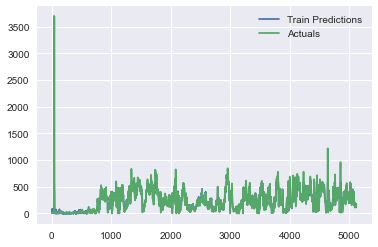

In [18]:
model = load_model('1H_Forecast/1H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(1,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 2 hours forecast

In [19]:
%%time

Trainer(2,6,12)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 10ms/step - loss: 111290.2188 - mean_absolute_error: 248.4019 - val_loss: 150769.8125 - val_mean_absolute_error: 334.0959
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 6ms/step - loss: 110382.7266 - mean_absolute_error: 246.5475 - val_loss: 149066.8438 - val_mean_absolute_error: 331.2978
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 6ms/step - loss: 108783.1250 - mean_absolute_error: 243.4547 - val_loss: 146725.4375 - val_mean_absolute_error: 327.8825
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 6ms/step - loss: 107146.5312 - mean_absolute_error: 240.4227 - val_loss: 144450.8438 - val_mean_absolute_error: 324.4276
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 6ms/step - loss: 105369.6406 - mean_absolute_error: 237.1407 - val_loss: 141932.2969 - val_mean_absolute_error: 320.7219
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 6ms/step - loss: 103466.6875 - mean_absolute_error: 233.6669 - val_loss: 138827.5469 - val_mean_absolute_error: 315.9440
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 6ms/step - loss: 101091.7891 - mean_absolute_error: 229.4950 - val_loss: 135598.1250 - val_mean_absolute_error: 310.9461
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 6ms/step - loss: 98959.6172 - mean_absolute_error: 225.7759 - val_loss: 132821.7031 - val_mean_absolute_error: 306.5327
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 7ms/step - loss: 97075.7109 - mean_absolute_error: 222.3017 - val_loss: 130367.9062 - val_mean_absolute_error: 302.5600
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 6ms/step - loss: 95321.1953 - mean_absolute_error: 219.1489 - val_loss: 127879.7266 - val_mean_absolute_error: 298.4498
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 6ms/step - loss: 93440.7656 - mean_absolute_error: 215.7746 - val_loss: 125269.7109 - val_mean_absolute_error: 294.1571
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 6ms/step - loss: 91612.5938 - mean_absolute_error: 212.4602 - val_loss: 122492.3438 - val_mean_absolute_error: 289.4836
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 6ms/step - loss: 89630.0391 - mean_absolute_error: 208.9391 - val_loss: 119874.1250 - val_mean_absolute_error: 285.0302
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 6ms/step - loss: 87781.9219 - mean_absolute_error: 205.6080 - val_loss: 117282.5078 - val_mean_absolute_error: 280.5999
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 6ms/step - loss: 85958.9062 - mean_absolute_error: 202.3325 - val_loss: 114693.9844 - val_mean_absolute_error: 276.1612
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 6ms/step - loss: 84161.3125 - mean_absolute_error: 199.1361 - val_loss: 112103.9531 - val_mean_absolute_error: 271.6956
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 6ms/step - loss: 82331.7500 - mean_absolute_error: 195.7441 - val_loss: 109511.1953 - val_mean_absolute_error: 267.1913
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 6ms/step - loss: 80511.2031 - mean_absolute_error: 192.4267 - val_loss: 106903.1016 - val_mean_absolute_error: 262.6615
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 6ms/step - loss: 78707.0078 - mean_absolute_error: 189.0329 - val_loss: 104304.2969 - val_mean_absolute_error: 258.1627
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 6ms/step - loss: 76912.7578 - mean_absolute_error: 185.7236 - val_loss: 101720.0156 - val_mean_absolute_error: 253.6988
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 6ms/step - loss: 75099.9062 - mean_absolute_error: 182.4298 - val_loss: 99004.5156 - val_mean_absolute_error: 249.0801
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 6ms/step - loss: 73228.3750 - mean_absolute_error: 178.9262 - val_loss: 96362.0312 - val_mean_absolute_error: 244.5902
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 6ms/step - loss: 71433.6562 - mean_absolute_error: 175.4636 - val_loss: 93762.2734 - val_mean_absolute_error: 240.1965
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 6ms/step - loss: 69682.6875 - mean_absolute_error: 172.0737 - val_loss: 91206.1484 - val_mean_absolute_error: 235.8587
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 6ms/step - loss: 67926.8906 - mean_absolute_error: 168.5696 - val_loss: 88975.5781 - val_mean_absolute_error: 232.0255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 7ms/step - loss: 66213.5312 - mean_absolute_error: 165.3401 - val_loss: 86205.3047 - val_mean_absolute_error: 227.2319
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 6ms/step - loss: 64535.0742 - mean_absolute_error: 161.7550 - val_loss: 83596.3906 - val_mean_absolute_error: 222.7483
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 6ms/step - loss: 62777.4805 - mean_absolute_error: 158.9188 - val_loss: 80993.3203 - val_mean_absolute_error: 218.0189
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 61033.3320 - mean_absolute_error: 155.1443 - val_loss: 78406.9219 - val_mean_absolute_error: 213.2284
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 59381.7656 - mean_absolute_error: 151.6436 - val_loss: 75929.9688 - val_mean_absolute_error: 208.7149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 57763.6328 - mean_absolute_error: 148.4718 - val_loss: 73499.0312 - val_mean_absolute_error: 204.2870
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 56195.8398 - mean_absolute_error: 145.3265 - val_loss: 71148.4531 - val_mean_absolute_error: 199.9586
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 6ms/step - loss: 54665.3633 - mean_absolute_error: 142.3865 - val_loss: 68844.3203 - val_mean_absolute_error: 195.6698
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 53164.8906 - mean_absolute_error: 139.1006 - val_loss: 66547.5000 - val_mean_absolute_error: 191.2741
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 6ms/step - loss: 51599.5820 - mean_absolute_error: 135.4432 - val_loss: 64148.3789 - val_mean_absolute_error: 186.7649
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 6ms/step - loss: 50165.2578 - mean_absolute_error: 132.3882 - val_loss: 61935.3320 - val_mean_absolute_error: 182.6362
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 6ms/step - loss: 48749.2070 - mean_absolute_error: 129.2411 - val_loss: 59467.2227 - val_mean_absolute_error: 178.0757
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 6ms/step - loss: 47218.6719 - mean_absolute_error: 126.0253 - val_loss: 57300.1680 - val_mean_absolute_error: 173.9803
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 6ms/step - loss: 45881.5352 - mean_absolute_error: 122.8339 - val_loss: 55382.5508 - val_mean_absolute_error: 170.5217
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 6ms/step - loss: 44504.8828 - mean_absolute_error: 118.9788 - val_loss: 53147.5977 - val_mean_absolute_error: 165.7509
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 5ms/step - loss: 43211.2734 - mean_absolute_error: 115.8152 - val_loss: 51116.0039 - val_mean_absolute_error: 161.2733
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 6ms/step - loss: 41956.6016 - mean_absolute_error: 112.5948 - val_loss: 49148.6094 - val_mean_absolute_error: 157.5522
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 6ms/step - loss: 40788.1719 - mean_absolute_error: 109.9266 - val_loss: 47357.9570 - val_mean_absolute_error: 154.2297
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - ETA: 0s - loss: 40217.1289 - mean_absolute_error: 107.539 - 1s 7ms/step - loss: 39663.7031 - mean_absolute_error: 107.2455 - val_loss: 45494.0469 - val_mean_absolute_error: 150.3894
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 6ms/step - loss: 38554.8555 - mean_absolute_error: 104.7812 - val_loss: 43715.4844 - val_mean_absolute_error: 146.9465
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 6ms/step - loss: 37536.0352 - mean_absolute_error: 101.9758 - val_loss: 41988.9961 - val_mean_absolute_error: 143.4184
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 36500.2891 - mean_absolute_error: 99.5553 - val_loss: 40299.7188 - val_mean_absolute_error: 140.1213
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 35509.7812 - mean_absolute_error: 97.5300 - val_loss: 38710.7344 - val_mean_absolute_error: 136.3866
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 34572.9609 - mean_absolute_error: 95.0398 - val_loss: 37163.0469 - val_mean_absolute_error: 133.3396
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 33672.5273 - mean_absolute_error: 93.0993 - val_loss: 35682.8555 - val_mean_absolute_error: 130.0717
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 6ms/step - loss: 32832.2578 - mean_absolute_error: 91.0020 - val_loss: 34235.1250 - val_mean_absolute_error: 127.0213
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 32019.2383 - mean_absolute_error: 88.6805 - val_loss: 32820.6094 - val_mean_absolute_error: 124.0977
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 6ms/step - loss: 31217.0645 - mean_absolute_error: 87.0909 - val_loss: 31512.4590 - val_mean_absolute_error: 121.0199
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 6ms/step - loss: 30451.4668 - mean_absolute_error: 84.9464 - val_loss: 30178.5527 - val_mean_absolute_error: 117.9374
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 6ms/step - loss: 29710.1992 - mean_absolute_error: 83.2084 - val_loss: 28967.6543 - val_mean_absolute_error: 115.1362
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 6ms/step - loss: 29039.6602 - mean_absolute_error: 81.2755 - val_loss: 27762.5762 - val_mean_absolute_error: 112.4079
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 28364.4688 - mean_absolute_error: 79.5877 - val_loss: 26619.6426 - val_mean_absolute_error: 109.4496
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 6ms/step - loss: 27728.3906 - mean_absolute_error: 77.6369 - val_loss: 25541.0430 - val_mean_absolute_error: 106.9667
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 27118.1992 - mean_absolute_error: 76.0851 - val_loss: 24491.8730 - val_mean_absolute_error: 104.2384
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 6ms/step - loss: 26527.5723 - mean_absolute_error: 74.1266 - val_loss: 23463.3730 - val_mean_absolute_error: 101.9663
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 25956.2461 - mean_absolute_error: 72.8021 - val_loss: 22457.5195 - val_mean_absolute_error: 99.0222
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 25413.2559 - mean_absolute_error: 71.1102 - val_loss: 21447.3926 - val_mean_absolute_error: 96.2685
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 6ms/step - loss: 24991.0312 - mean_absolute_error: 69.9449 - val_loss: 20639.8965 - val_mean_absolute_error: 94.1224
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 6ms/step - loss: 24474.0352 - mean_absolute_error: 68.5270 - val_loss: 19834.3340 - val_mean_absolute_error: 92.2563
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 6ms/step - loss: 24023.5176 - mean_absolute_error: 66.6750 - val_loss: 19115.8828 - val_mean_absolute_error: 91.0321
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 6ms/step - loss: 23554.0039 - mean_absolute_error: 65.8828 - val_loss: 18584.1914 - val_mean_absolute_error: 89.6667
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 23091.3594 - mean_absolute_error: 64.1115 - val_loss: 17797.0938 - val_mean_absolute_error: 87.3231
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 22694.8984 - mean_absolute_error: 62.8644 - val_loss: 16918.0137 - val_mean_absolute_error: 84.5607
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 22334.2383 - mean_absolute_error: 61.7499 - val_loss: 16303.2842 - val_mean_absolute_error: 83.0087
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 22055.6211 - mean_absolute_error: 60.8675 - val_loss: 15611.1035 - val_mean_absolute_error: 81.0335
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 21703.7852 - mean_absolute_error: 60.0834 - val_loss: 15364.0947 - val_mean_absolute_error: 81.1393
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 6ms/step - loss: 21380.5996 - mean_absolute_error: 58.8671 - val_loss: 14851.8828 - val_mean_absolute_error: 79.8508
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 7ms/step - loss: 21068.4199 - mean_absolute_error: 58.1102 - val_loss: 14159.3047 - val_mean_absolute_error: 77.0519
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 20845.0879 - mean_absolute_error: 56.9562 - val_loss: 13855.9580 - val_mean_absolute_error: 76.7428
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 7ms/step - loss: 20566.4941 - mean_absolute_error: 56.7191 - val_loss: 13597.4189 - val_mean_absolute_error: 75.8938
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 20318.8438 - mean_absolute_error: 55.6329 - val_loss: 12645.8037 - val_mean_absolute_error: 72.2688
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 6ms/step - loss: 20125.2754 - mean_absolute_error: 54.9907 - val_loss: 12302.8906 - val_mean_absolute_error: 71.1832
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 6ms/step - loss: 19891.1875 - mean_absolute_error: 54.2155 - val_loss: 12207.8457 - val_mean_absolute_error: 71.2328
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 6ms/step - loss: 19711.2793 - mean_absolute_error: 53.6599 - val_loss: 11566.2764 - val_mean_absolute_error: 69.0574
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 6ms/step - loss: 19529.0977 - mean_absolute_error: 52.9684 - val_loss: 11249.6904 - val_mean_absolute_error: 68.4552
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 19381.7852 - mean_absolute_error: 52.2991 - val_loss: 10707.7002 - val_mean_absolute_error: 66.2330
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 6ms/step - loss: 19246.1543 - mean_absolute_error: 52.3599 - val_loss: 10828.6064 - val_mean_absolute_error: 67.2228
Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 19094.9609 - mean_absolute_error: 51.2312 - val_loss: 10194.9512 - val_mean_absolute_error: 64.7897
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 7ms/step - loss: 18925.9844 - mean_absolute_error: 50.7855 - val_loss: 10033.7529 - val_mean_absolute_error: 64.5786
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 6ms/step - loss: 18782.8965 - mean_absolute_error: 50.8268 - val_loss: 9954.3291 - val_mean_absolute_error: 64.3838
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 6ms/step - loss: 18663.6074 - mean_absolute_error: 49.9639 - val_loss: 9715.8252 - val_mean_absolute_error: 63.9566
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 6ms/step - loss: 18610.3496 - mean_absolute_error: 49.9872 - val_loss: 9506.9971 - val_mean_absolute_error: 62.8738
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 18465.5137 - mean_absolute_error: 49.4068 - val_loss: 9233.2412 - val_mean_absolute_error: 62.2246
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 7ms/step - loss: 18349.6543 - mean_absolute_error: 49.0629 - val_loss: 9264.0557 - val_mean_absolute_error: 62.2990
Epoch 90/100
161/161 [==============================] - 1s 6ms/step - loss: 18228.3027 - mean_absolute_error: 48.5604 - val_loss: 8941.1055 - val_mean_absolute_error: 61.1010
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 6ms/step - loss: 18186.6133 - mean_absolute_error: 48.2272 - val_loss: 9048.6885 - val_mean_absolute_error: 61.9488
Epoch 92/100
161/161 [==============================] - 1s 6ms/step - loss: 18071.7461 - mean_absolute_error: 48.1308 - val_loss: 8638.7656 - val_mean_absolute_error: 60.3612
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 6ms/step - loss: 18023.4590 - mean_absolute_error: 47.7884 - val_loss: 8544.7441 - val_mean_absolute_error: 60.2009
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 6ms/step - loss: 18032.8398 - mean_absolute_error: 47.7011 - val_loss: 8780.9639 - val_mean_absolute_error: 61.1488
Epoch 95/100
161/161 [==============================] - 1s 6ms/step - loss: 17904.9219 - mean_absolute_error: 47.4587 - val_loss: 8307.9639 - val_mean_absolute_error: 59.9223
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 17795.2793 - mean_absolute_error: 47.0311 - val_loss: 8473.5918 - val_mean_absolute_error: 60.2536
Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 17725.4570 - mean_absolute_error: 46.7127 - val_loss: 8377.1836 - val_mean_absolute_error: 60.4606
Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 17622.1934 - mean_absolute_error: 46.5348 - val_loss: 8668.0498 - val_mean_absolute_error: 61.5124
Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 17534.9238 - mean_absolute_error: 46.2335 - val_loss: 8180.0747 - val_mean_absolute_error: 59.7065
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 6ms/step - loss: 17533.4746 - mean_absolute_error: 45.9773 - val_loss: 8240.8984 - val_mean_absolute_error: 59.8549

-----------------------------------------------------------------------------------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 15ms/step - loss: 111453.8438 - mea

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110509.5859 - mean_absolute_error: 247.1380 - val_loss: 149499.8438 - val_mean_absolute_error: 332.4375
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 7ms/step - loss: 109662.4688 - mean_absolute_error: 245.4494 - val_loss: 148325.1406 - val_mean_absolute_error: 330.5722
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 7ms/step - loss: 108516.0625 - mean_absolute_error: 243.1233 - val_loss: 146183.1719 - val_mean_absolute_error: 327.1691
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 106530.2812 - mean_absolute_error: 239.2825 - val_loss: 143164.0625 - val_mean_absolute_error: 322.6219
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 104377.0156 - mean_absolute_error: 235.4641 - val_loss: 140472.3906 - val_mean_absolute_error: 318.5416
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 6ms/step - loss: 102673.3359 - mean_absolute_error: 232.4258 - val_loss: 138162.9375 - val_mean_absolute_error: 314.9740
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 101082.3438 - mean_absolute_error: 229.6337 - val_loss: 136202.0000 - val_mean_absolute_error: 311.9312
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 6ms/step - loss: 99627.7344 - mean_absolute_error: 227.0343 - val_loss: 134115.6250 - val_mean_absolute_error: 308.5954
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 7ms/step - loss: 98219.9609 - mean_absolute_error: 224.5059 - val_loss: 132199.7344 - val_mean_absolute_error: 305.5150
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 6ms/step - loss: 96816.2109 - mean_absolute_error: 221.9169 - val_loss: 130269.3984 - val_mean_absolute_error: 302.3915
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - ETA: 0s - loss: 95989.6406 - mean_absolute_error: 219.926 - 1s 6ms/step - loss: 95437.7734 - mean_absolute_error: 219.5178 - val_loss: 128354.2422 - val_mean_absolute_error: 299.2661
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 6ms/step - loss: 93991.6719 - mean_absolute_error: 216.8076 - val_loss: 126096.6641 - val_mean_absolute_error: 295.4267
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 92107.6250 - mean_absolute_error: 213.4192 - val_loss: 123453.7031 - val_mean_absolute_error: 291.1320
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 6ms/step - loss: 90487.6172 - mean_absolute_error: 210.4091 - val_loss: 121295.9375 - val_mean_absolute_error: 287.4600
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 7ms/step - loss: 88980.1953 - mean_absolute_error: 207.4064 - val_loss: 119125.1484 - val_mean_absolute_error: 283.6693
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 7ms/step - loss: 87335.9531 - mean_absolute_error: 204.6551 - val_loss: 116791.9141 - val_mean_absolute_error: 279.7479
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 6ms/step - loss: 85762.7031 - mean_absolute_error: 201.7794 - val_loss: 114616.6250 - val_mean_absolute_error: 276.0236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 6ms/step - loss: 84248.0547 - mean_absolute_error: 199.0156 - val_loss: 112490.6172 - val_mean_absolute_error: 272.3595
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 7ms/step - loss: 82752.1797 - mean_absolute_error: 196.2299 - val_loss: 110347.2031 - val_mean_absolute_error: 268.6506
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 7ms/step - loss: 81271.7891 - mean_absolute_error: 193.4791 - val_loss: 108246.7266 - val_mean_absolute_error: 264.9928
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 7ms/step - loss: 79800.5547 - mean_absolute_error: 190.8494 - val_loss: 106130.7734 - val_mean_absolute_error: 261.3140
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 6ms/step - loss: 78344.3828 - mean_absolute_error: 188.0889 - val_loss: 104043.9219 - val_mean_absolute_error: 257.7029
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 7ms/step - loss: 76877.9922 - mean_absolute_error: 185.3043 - val_loss: 101948.7891 - val_mean_absolute_error: 254.0988
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 7ms/step - loss: 75452.7031 - mean_absolute_error: 182.4119 - val_loss: 99863.7188 - val_mean_absolute_error: 250.5056
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 6ms/step - loss: 74002.4297 - mean_absolute_error: 179.8109 - val_loss: 97787.2578 - val_mean_absolute_error: 246.9623
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 72570.5625 - mean_absolute_error: 177.1121 - val_loss: 95715.7109 - val_mean_absolute_error: 243.4380
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 71158.8594 - mean_absolute_error: 174.2308 - val_loss: 93663.0938 - val_mean_absolute_error: 239.9512
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 69753.5547 - mean_absolute_error: 171.7750 - val_loss: 91615.9219 - val_mean_absolute_error: 236.4064
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 68360.4922 - mean_absolute_error: 168.7010 - val_loss: 89576.1719 - val_mean_absolute_error: 232.9105
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 66974.5859 - mean_absolute_error: 165.8557 - val_loss: 87558.5938 - val_mean_absolute_error: 229.4590
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 7ms/step - loss: 65607.5391 - mean_absolute_error: 163.2829 - val_loss: 85555.6875 - val_mean_absolute_error: 225.9925
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 7ms/step - loss: 64248.4531 - mean_absolute_error: 160.7898 - val_loss: 83556.5703 - val_mean_absolute_error: 222.3976
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 62926.0352 - mean_absolute_error: 157.9162 - val_loss: 81611.5938 - val_mean_absolute_error: 218.9502
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 61635.8047 - mean_absolute_error: 155.2584 - val_loss: 79667.9844 - val_mean_absolute_error: 215.4629
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 60325.1797 - mean_absolute_error: 152.6173 - val_loss: 77713.2031 - val_mean_absolute_error: 211.8531
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 59048.5586 - mean_absolute_error: 149.8114 - val_loss: 75796.5391 - val_mean_absolute_error: 208.1932
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 57770.7266 - mean_absolute_error: 147.5568 - val_loss: 73916.3203 - val_mean_absolute_error: 204.7720
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 7ms/step - loss: 56560.4727 - mean_absolute_error: 144.7812 - val_loss: 72038.3438 - val_mean_absolute_error: 201.0802
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 6ms/step - loss: 55334.5352 - mean_absolute_error: 141.9059 - val_loss: 70151.0234 - val_mean_absolute_error: 197.7536
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 54059.4570 - mean_absolute_error: 139.1568 - val_loss: 68207.6094 - val_mean_absolute_error: 193.9361
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 52851.1211 - mean_absolute_error: 137.1239 - val_loss: 66381.3984 - val_mean_absolute_error: 190.3711
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 51667.7305 - mean_absolute_error: 134.1470 - val_loss: 64583.5781 - val_mean_absolute_error: 187.0899
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 6ms/step - loss: 50515.1094 - mean_absolute_error: 131.5363 - val_loss: 62819.9961 - val_mean_absolute_error: 183.7749
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 49410.1250 - mean_absolute_error: 129.2257 - val_loss: 61118.2148 - val_mean_absolute_error: 180.6101
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 7ms/step - loss: 48289.0703 - mean_absolute_error: 126.3330 - val_loss: 59375.8359 - val_mean_absolute_error: 177.2236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 47192.3242 - mean_absolute_error: 123.7708 - val_loss: 57704.1953 - val_mean_absolute_error: 173.9036
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 46134.4102 - mean_absolute_error: 121.5242 - val_loss: 56034.5859 - val_mean_absolute_error: 170.5306
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 45121.8516 - mean_absolute_error: 119.1789 - val_loss: 54448.8906 - val_mean_absolute_error: 167.8039
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 44095.1055 - mean_absolute_error: 116.9678 - val_loss: 52861.9531 - val_mean_absolute_error: 164.5984
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 7ms/step - loss: 43159.2031 - mean_absolute_error: 114.4247 - val_loss: 51297.8281 - val_mean_absolute_error: 162.1080
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 42166.6523 - mean_absolute_error: 112.7422 - val_loss: 49753.9609 - val_mean_absolute_error: 158.5809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 41200.8203 - mean_absolute_error: 110.1507 - val_loss: 48248.8984 - val_mean_absolute_error: 155.7279
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 7ms/step - loss: 40276.8594 - mean_absolute_error: 107.9865 - val_loss: 46759.4727 - val_mean_absolute_error: 152.5428
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 39387.8828 - mean_absolute_error: 106.2375 - val_loss: 45360.1797 - val_mean_absolute_error: 149.7426
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 38538.6719 - mean_absolute_error: 103.9049 - val_loss: 43911.8125 - val_mean_absolute_error: 147.1580
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 8ms/step - loss: 37688.0234 - mean_absolute_error: 102.2263 - val_loss: 42571.9297 - val_mean_absolute_error: 144.5665
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 36862.9570 - mean_absolute_error: 99.9873 - val_loss: 41142.2578 - val_mean_absolute_error: 141.5801
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 35977.7812 - mean_absolute_error: 97.4311 - val_loss: 39739.6250 - val_mean_absolute_error: 138.9320
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 6ms/step - loss: 35040.3477 - mean_absolute_error: 95.3669 - val_loss: 38211.2773 - val_mean_absolute_error: 135.8394
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 34240.8945 - mean_absolute_error: 93.3182 - val_loss: 36915.7969 - val_mean_absolute_error: 132.9031
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 33506.2695 - mean_absolute_error: 91.5282 - val_loss: 35760.9844 - val_mean_absolute_error: 130.4604
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 6ms/step - loss: 32800.6172 - mean_absolute_error: 89.9567 - val_loss: 34619.7109 - val_mean_absolute_error: 127.9933
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 7ms/step - loss: 32157.5078 - mean_absolute_error: 88.1559 - val_loss: 33464.6289 - val_mean_absolute_error: 125.4580s - loss: 34884.4375 - mean_absolute_error: 8
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 6ms/step - loss: 31492.4746 - mean_absolute_error: 86.4697 - val_loss: 32453.4473 - val_mean_absolute_error: 123.0826
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 6ms/step - loss: 30832.4375 - mean_absolute_error: 84.8436 - val_loss: 31277.1094 - val_mean_absolute_error: 120.5534
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 30210.2422 - mean_absolute_error: 83.2047 - val_loss: 30262.8594 - val_mean_absolute_error: 118.3147
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 29640.0664 - mean_absolute_error: 81.6171 - val_loss: 29146.1152 - val_mean_absolute_error: 115.4126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 29000.1367 - mean_absolute_error: 80.1107 - val_loss: 28187.6094 - val_mean_absolute_error: 113.0632
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 28439.7266 - mean_absolute_error: 78.5065 - val_loss: 27205.3750 - val_mean_absolute_error: 110.9234
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 27884.0391 - mean_absolute_error: 77.1614 - val_loss: 26266.5293 - val_mean_absolute_error: 108.7129
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 27352.7051 - mean_absolute_error: 75.7342 - val_loss: 25373.5078 - val_mean_absolute_error: 106.3758
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 26841.4922 - mean_absolute_error: 74.1658 - val_loss: 24445.5488 - val_mean_absolute_error: 103.7567
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 26380.9766 - mean_absolute_error: 72.8317 - val_loss: 23534.0547 - val_mean_absolute_error: 101.0518
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 7ms/step - loss: 25933.5938 - mean_absolute_error: 71.7120 - val_loss: 22724.5039 - val_mean_absolute_error: 99.1226
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 8ms/step - loss: 25395.1914 - mean_absolute_error: 70.2818 - val_loss: 22114.6699 - val_mean_absolute_error: 97.9159
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 24939.0352 - mean_absolute_error: 68.9035 - val_loss: 21316.6113 - val_mean_absolute_error: 95.7533
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 24509.4395 - mean_absolute_error: 67.5711 - val_loss: 20471.2266 - val_mean_absolute_error: 93.4389
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 24126.7539 - mean_absolute_error: 66.3610 - val_loss: 19801.6582 - val_mean_absolute_error: 91.6959
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 23712.3828 - mean_absolute_error: 65.1968 - val_loss: 19169.9141 - val_mean_absolute_error: 90.1694
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 6ms/step - loss: 23322.1543 - mean_absolute_error: 64.0830 - val_loss: 18379.6562 - val_mean_absolute_error: 87.6767
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 6ms/step - loss: 23005.3320 - mean_absolute_error: 63.3417 - val_loss: 17912.4102 - val_mean_absolute_error: 86.8121
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 22740.7168 - mean_absolute_error: 62.6886 - val_loss: 17529.5137 - val_mean_absolute_error: 85.8868
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 7ms/step - loss: 22426.6406 - mean_absolute_error: 61.3106 - val_loss: 16879.8516 - val_mean_absolute_error: 83.9961
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 7ms/step - loss: 22053.2852 - mean_absolute_error: 60.6109 - val_loss: 16312.2988 - val_mean_absolute_error: 82.2702
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 7ms/step - loss: 21788.1875 - mean_absolute_error: 59.4591 - val_loss: 15770.4111 - val_mean_absolute_error: 80.4435
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 7ms/step - loss: 21504.2773 - mean_absolute_error: 58.4041 - val_loss: 15178.2764 - val_mean_absolute_error: 78.9636
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 21286.3359 - mean_absolute_error: 58.2877 - val_loss: 14739.0762 - val_mean_absolute_error: 77.6011
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 21008.2227 - mean_absolute_error: 57.1626 - val_loss: 14392.0332 - val_mean_absolute_error: 76.7094
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 20740.4062 - mean_absolute_error: 56.1340 - val_loss: 13872.8408 - val_mean_absolute_error: 75.1275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 7ms/step - loss: 20516.0605 - mean_absolute_error: 55.5181 - val_loss: 13459.6904 - val_mean_absolute_error: 73.9418
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 7ms/step - loss: 20325.3047 - mean_absolute_error: 54.9381 - val_loss: 13171.3643 - val_mean_absolute_error: 73.0297
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 7ms/step - loss: 20091.7676 - mean_absolute_error: 54.1815 - val_loss: 12736.2422 - val_mean_absolute_error: 71.6054
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 7ms/step - loss: 19947.0117 - mean_absolute_error: 53.8597 - val_loss: 12456.1758 - val_mean_absolute_error: 70.6208
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 19796.2852 - mean_absolute_error: 52.8501 - val_loss: 12003.4277 - val_mean_absolute_error: 69.1861
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 19549.5469 - mean_absolute_error: 52.0972 - val_loss: 12077.6670 - val_mean_absolute_error: 69.3383
Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 19343.7891 - mean_absolute_error: 51.5430 - val_loss: 11639.9648 - val_mean_absolute_error: 68.1908
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 19214.4473 - mean_absolute_error: 50.9611 - val_loss: 11208.0664 - val_mean_absolute_error: 66.7351
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 19088.5195 - mean_absolute_error: 50.7696 - val_loss: 11159.5430 - val_mean_absolute_error: 66.8947
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 18947.2383 - mean_absolute_error: 50.2760 - val_loss: 10788.1602 - val_mean_absolute_error: 65.7193
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 7s 11ms/step - loss: 111613.5000 - mean_absolute_error: 249.4519 - val_loss: 151085.1250 - val_mean_absolute_error: 334.9091
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110827.1953 - mean_absolute_error: 247.8900 - val_loss: 149836.7656 - val_mean_absolute_error: 332.9865
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 9ms/step - loss: 109870.8438 - mean_absolute_error: 245.9619 - val_loss: 148569.1250 - val_mean_absolute_error: 330.9819
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 8ms/step - loss: 108854.9141 - mean_absolute_error: 244.0559 - val_loss: 147089.7031 - val_mean_absolute_error: 328.8922
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 107930.7500 - mean_absolute_error: 242.3047 - val_loss: 145929.3906 - val_mean_absolute_error: 327.1389
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 107146.9219 - mean_absolute_error: 240.7592 - val_loss: 144865.9844 - val_mean_absolute_error: 325.4355
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 106288.2188 - mean_absolute_error: 239.0896 - val_loss: 143604.3125 - val_mean_absolute_error: 323.5172
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 105404.1641 - mean_absolute_error: 237.4760 - val_loss: 142484.7500 - val_mean_absolute_error: 321.8111
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 104620.7500 - mean_absolute_error: 236.0070 - val_loss: 141429.0000 - val_mean_absolute_error: 320.1154
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 103741.8750 - mean_absolute_error: 234.3696 - val_loss: 140094.8125 - val_mean_absolute_error: 318.0809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 102841.3281 - mean_absolute_error: 232.8007 - val_loss: 138969.0625 - val_mean_absolute_error: 316.3175
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 7ms/step - loss: 102030.0781 - mean_absolute_error: 231.3239 - val_loss: 137853.9844 - val_mean_absolute_error: 314.5572
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 101212.5703 - mean_absolute_error: 229.8592 - val_loss: 136713.9688 - val_mean_absolute_error: 312.7450
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 100376.4688 - mean_absolute_error: 228.3642 - val_loss: 135529.8281 - val_mean_absolute_error: 310.8126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 8ms/step - loss: 99386.8438 - mean_absolute_error: 226.5350 - val_loss: 134028.6094 - val_mean_absolute_error: 308.4416
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 7ms/step - loss: 98348.1406 - mean_absolute_error: 224.7215 - val_loss: 132648.0312 - val_mean_absolute_error: 306.2426
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 7ms/step - loss: 97243.7656 - mean_absolute_error: 222.7203 - val_loss: 131088.7500 - val_mean_absolute_error: 303.7279
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 7ms/step - loss: 96195.5391 - mean_absolute_error: 220.7423 - val_loss: 129603.5781 - val_mean_absolute_error: 301.3059
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 95154.4453 - mean_absolute_error: 218.9954 - val_loss: 128192.8828 - val_mean_absolute_error: 298.9942
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 7ms/step - loss: 94135.2266 - mean_absolute_error: 217.1461 - val_loss: 126774.2031 - val_mean_absolute_error: 296.6489
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 8ms/step - loss: 93128.3438 - mean_absolute_error: 215.3544 - val_loss: 125364.9062 - val_mean_absolute_error: 294.2988
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 92101.5703 - mean_absolute_error: 213.4230 - val_loss: 123934.9297 - val_mean_absolute_error: 291.8991
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 91094.5859 - mean_absolute_error: 211.5506 - val_loss: 122512.9453 - val_mean_absolute_error: 289.4958
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 9ms/step - loss: 90057.1875 - mean_absolute_error: 209.8827 - val_loss: 121066.2500 - val_mean_absolute_error: 287.0688
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 89020.8516 - mean_absolute_error: 207.8987 - val_loss: 119592.4375 - val_mean_absolute_error: 284.5190
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 11ms/step - loss: 87990.5000 - mean_absolute_error: 206.2076 - val_loss: 118122.0547 - val_mean_absolute_error: 282.0016
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 86934.7812 - mean_absolute_error: 204.2293 - val_loss: 116651.6172 - val_mean_absolute_error: 279.5232
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 85876.0078 - mean_absolute_error: 202.1804 - val_loss: 115148.5234 - val_mean_absolute_error: 276.9300
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 8ms/step - loss: 84827.0859 - mean_absolute_error: 200.2990 - val_loss: 113641.9688 - val_mean_absolute_error: 274.3336
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 83772.8594 - mean_absolute_error: 198.6504 - val_loss: 112134.1094 - val_mean_absolute_error: 271.7485
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 82693.2656 - mean_absolute_error: 196.4498 - val_loss: 110612.7188 - val_mean_absolute_error: 269.0911
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 81649.4531 - mean_absolute_error: 194.4948 - val_loss: 109096.1016 - val_mean_absolute_error: 266.4345
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 80381.8828 - mean_absolute_error: 192.0949 - val_loss: 107027.4688 - val_mean_absolute_error: 262.8236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 79044.0547 - mean_absolute_error: 189.5146 - val_loss: 105234.7812 - val_mean_absolute_error: 259.7455
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 77852.9688 - mean_absolute_error: 187.7120 - val_loss: 103565.1484 - val_mean_absolute_error: 256.8699
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 76706.5625 - mean_absolute_error: 185.2640 - val_loss: 101936.0391 - val_mean_absolute_error: 254.0578
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 75579.7734 - mean_absolute_error: 183.3134 - val_loss: 100317.6484 - val_mean_absolute_error: 251.3159
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 2s 10ms/step - loss: 74434.7266 - mean_absolute_error: 181.0342 - val_loss: 98477.9609 - val_mean_absolute_error: 248.2118
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 73209.6875 - mean_absolute_error: 178.7774 - val_loss: 96795.3516 - val_mean_absolute_error: 245.3333
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 11ms/step - loss: 72087.8594 - mean_absolute_error: 176.4728 - val_loss: 95138.8672 - val_mean_absolute_error: 242.4966
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 9ms/step - loss: 70946.4844 - mean_absolute_error: 174.7272 - val_loss: 93442.2969 - val_mean_absolute_error: 239.6304
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 69765.5938 - mean_absolute_error: 172.0412 - val_loss: 91764.0859 - val_mean_absolute_error: 236.7872
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 68627.5391 - mean_absolute_error: 169.7966 - val_loss: 90103.1562 - val_mean_absolute_error: 233.8919
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 67499.5859 - mean_absolute_error: 167.7021 - val_loss: 88459.7344 - val_mean_absolute_error: 231.0281
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 66392.4297 - mean_absolute_error: 165.4290 - val_loss: 86817.5859 - val_mean_absolute_error: 228.1747
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 7ms/step - loss: 65253.0430 - mean_absolute_error: 163.2686 - val_loss: 85131.0625 - val_mean_absolute_error: 225.2436
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 64151.3828 - mean_absolute_error: 160.8629 - val_loss: 83474.6641 - val_mean_absolute_error: 222.2784
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 63042.8125 - mean_absolute_error: 158.6351 - val_loss: 81852.4062 - val_mean_absolute_error: 219.4357
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 61956.3555 - mean_absolute_error: 156.6188 - val_loss: 80248.5000 - val_mean_absolute_error: 216.4538
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 60876.7812 - mean_absolute_error: 154.1575 - val_loss: 78654.4531 - val_mean_absolute_error: 213.6601
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 59835.5625 - mean_absolute_error: 152.0858 - val_loss: 77064.2344 - val_mean_absolute_error: 210.7109
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 58781.6328 - mean_absolute_error: 150.0261 - val_loss: 75523.4453 - val_mean_absolute_error: 207.8078
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 57741.9570 - mean_absolute_error: 147.7088 - val_loss: 73954.4922 - val_mean_absolute_error: 204.8562
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 7ms/step - loss: 56716.3711 - mean_absolute_error: 145.3041 - val_loss: 72421.8906 - val_mean_absolute_error: 202.0521
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 55678.8633 - mean_absolute_error: 143.4048 - val_loss: 70878.6406 - val_mean_absolute_error: 199.0798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 54670.9336 - mean_absolute_error: 140.6308 - val_loss: 69268.5078 - val_mean_absolute_error: 196.0163
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 53599.1484 - mean_absolute_error: 138.6403 - val_loss: 67725.6875 - val_mean_absolute_error: 193.0633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 52567.4102 - mean_absolute_error: 136.0908 - val_loss: 66206.6172 - val_mean_absolute_error: 190.0973
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 51634.1641 - mean_absolute_error: 134.1559 - val_loss: 64706.6836 - val_mean_absolute_error: 187.2363
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 7ms/step - loss: 50634.4570 - mean_absolute_error: 131.7581 - val_loss: 63257.2070 - val_mean_absolute_error: 184.6126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 49693.6680 - mean_absolute_error: 129.4891 - val_loss: 61787.8984 - val_mean_absolute_error: 181.7894
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 48738.4102 - mean_absolute_error: 127.4318 - val_loss: 60392.9727 - val_mean_absolute_error: 179.1239
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 7ms/step - loss: 47829.0000 - mean_absolute_error: 125.2118 - val_loss: 58949.4766 - val_mean_absolute_error: 176.3826
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 7ms/step - loss: 46925.1523 - mean_absolute_error: 123.0658 - val_loss: 57541.3398 - val_mean_absolute_error: 173.6216
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 46026.3398 - mean_absolute_error: 121.0287 - val_loss: 56166.5352 - val_mean_absolute_error: 170.9120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 7ms/step - loss: 45127.5703 - mean_absolute_error: 119.0044 - val_loss: 54723.8633 - val_mean_absolute_error: 167.9844
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 44260.7500 - mean_absolute_error: 116.9945 - val_loss: 53364.0391 - val_mean_absolute_error: 165.3742
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 43431.4609 - mean_absolute_error: 114.9003 - val_loss: 51991.9141 - val_mean_absolute_error: 162.7153
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 42570.3320 - mean_absolute_error: 113.0979 - val_loss: 50681.6680 - val_mean_absolute_error: 160.0872
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 41705.2383 - mean_absolute_error: 111.0194 - val_loss: 49318.0391 - val_mean_absolute_error: 157.5007
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 40823.8633 - mean_absolute_error: 108.8762 - val_loss: 47874.6055 - val_mean_absolute_error: 154.9592
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 40018.6523 - mean_absolute_error: 107.0139 - val_loss: 46592.9219 - val_mean_absolute_error: 152.6907
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 39223.3945 - mean_absolute_error: 105.6237 - val_loss: 45350.0273 - val_mean_absolute_error: 149.9816
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 38473.5156 - mean_absolute_error: 103.4783 - val_loss: 44163.7734 - val_mean_absolute_error: 147.5561
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 37743.3672 - mean_absolute_error: 101.2415 - val_loss: 42933.0977 - val_mean_absolute_error: 145.0968
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 37025.6250 - mean_absolute_error: 99.9211 - val_loss: 41753.0742 - val_mean_absolute_error: 142.2365
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 8ms/step - loss: 36309.1055 - mean_absolute_error: 98.0537 - val_loss: 40609.7227 - val_mean_absolute_error: 139.9566
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 35661.7148 - mean_absolute_error: 96.4975 - val_loss: 39487.4258 - val_mean_absolute_error: 137.4456
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 35008.3750 - mean_absolute_error: 94.5541 - val_loss: 38373.4219 - val_mean_absolute_error: 135.3109
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 7ms/step - loss: 34329.1133 - mean_absolute_error: 93.2942 - val_loss: 37359.4492 - val_mean_absolute_error: 133.0631
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 33679.9766 - mean_absolute_error: 91.4375 - val_loss: 36322.7266 - val_mean_absolute_error: 130.6939
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 7ms/step - loss: 33107.0391 - mean_absolute_error: 90.1665 - val_loss: 35276.3828 - val_mean_absolute_error: 128.2126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 32489.2031 - mean_absolute_error: 88.0776 - val_loss: 34260.8789 - val_mean_absolute_error: 126.2652
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 7ms/step - loss: 31884.7754 - mean_absolute_error: 86.9271 - val_loss: 33267.5859 - val_mean_absolute_error: 123.9706
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 31341.7695 - mean_absolute_error: 85.4602 - val_loss: 32366.3027 - val_mean_absolute_error: 122.1860
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 30809.7969 - mean_absolute_error: 84.2118 - val_loss: 31396.8438 - val_mean_absolute_error: 119.5817
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 30257.2148 - mean_absolute_error: 82.6485 - val_loss: 30459.9609 - val_mean_absolute_error: 117.3490
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 8ms/step - loss: 29753.7188 - mean_absolute_error: 81.5519 - val_loss: 29642.6309 - val_mean_absolute_error: 115.6425
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 29234.8867 - mean_absolute_error: 80.0084 - val_loss: 28762.3398 - val_mean_absolute_error: 113.5285
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 28729.3398 - mean_absolute_error: 78.5982 - val_loss: 27998.7266 - val_mean_absolute_error: 111.8306
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 28245.0254 - mean_absolute_error: 77.4177 - val_loss: 27322.0781 - val_mean_absolute_error: 110.3282
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 27781.0859 - mean_absolute_error: 75.9029 - val_loss: 26242.8633 - val_mean_absolute_error: 107.4355
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 7ms/step - loss: 27379.5977 - mean_absolute_error: 75.3957 - val_loss: 25553.4375 - val_mean_absolute_error: 105.8255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 26902.2695 - mean_absolute_error: 73.7331 - val_loss: 24735.2559 - val_mean_absolute_error: 103.7321
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 7ms/step - loss: 26454.9219 - mean_absolute_error: 72.5795 - val_loss: 24029.6211 - val_mean_absolute_error: 102.0015
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 26043.4980 - mean_absolute_error: 71.3974 - val_loss: 23282.4609 - val_mean_absolute_error: 99.9577
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 25643.7852 - mean_absolute_error: 70.3784 - val_loss: 22788.9844 - val_mean_absolute_error: 98.9793
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 25455.2715 - mean_absolute_error: 70.3058 - val_loss: 21991.4590 - val_mean_absolute_error: 96.6065
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 24938.7520 - mean_absolute_error: 68.4224 - val_loss: 21399.4238 - val_mean_absolute_error: 95.3621
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 24545.2695 - mean_absolute_error: 67.2681 - val_loss: 20754.8008 - val_mean_absolute_error: 93.4675
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 12ms/step - loss: 111612.7031 - mean_absolute_error: 249.0397 - val_loss: 150914.4688 - val_mean_absolute_error: 334.2547
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110530.7656 - mean_absolute_error: 246.9489 - val_loss: 149304.2031 - val_mean_absolute_error: 331.6253
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 8ms/step - loss: 108917.4141 - mean_absolute_error: 243.8206 - val_loss: 146813.6875 - val_mean_absolute_error: 328.0219
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 107374.4688 - mean_absolute_error: 240.9473 - val_loss: 144825.8594 - val_mean_absolute_error: 325.1190
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 105775.7500 - mean_absolute_error: 237.9614 - val_loss: 142341.0781 - val_mean_absolute_error: 321.2533
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 103577.7109 - mean_absolute_error: 233.9286 - val_loss: 138725.0469 - val_mean_absolute_error: 315.6919
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 101069.0000 - mean_absolute_error: 229.4131 - val_loss: 135459.3281 - val_mean_absolute_error: 310.6949
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 98963.0156 - mean_absolute_error: 225.7997 - val_loss: 132760.2500 - val_mean_absolute_error: 306.4189
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 97082.2734 - mean_absolute_error: 222.3773 - val_loss: 130261.6797 - val_mean_absolute_error: 302.3529
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 9ms/step - loss: 95229.4766 - mean_absolute_error: 219.0829 - val_loss: 127472.8828 - val_mean_absolute_error: 297.6982
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 11ms/step - loss: 93134.2109 - mean_absolute_error: 215.2397 - val_loss: 124603.7344 - val_mean_absolute_error: 293.0505
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 91056.0312 - mean_absolute_error: 211.3857 - val_loss: 121605.4688 - val_mean_absolute_error: 287.8011
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 88954.6797 - mean_absolute_error: 207.8278 - val_loss: 118689.2812 - val_mean_absolute_error: 282.8964
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 86920.9766 - mean_absolute_error: 204.1393 - val_loss: 115870.1641 - val_mean_absolute_error: 278.1604
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 85009.5000 - mean_absolute_error: 200.7368 - val_loss: 113168.9062 - val_mean_absolute_error: 273.4802
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 12ms/step - loss: 83067.6094 - mean_absolute_error: 197.0379 - val_loss: 110335.0000 - val_mean_absolute_error: 268.6102
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 81129.8281 - mean_absolute_error: 193.7803 - val_loss: 107629.0547 - val_mean_absolute_error: 263.9272
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 10ms/step - loss: 79274.6250 - mean_absolute_error: 190.3215 - val_loss: 104977.2266 - val_mean_absolute_error: 259.3273
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 77464.0391 - mean_absolute_error: 186.5156 - val_loss: 102335.6875 - val_mean_absolute_error: 254.7718
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 75619.4453 - mean_absolute_error: 183.3335 - val_loss: 99732.5000 - val_mean_absolute_error: 250.2738
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 73816.9766 - mean_absolute_error: 179.3391 - val_loss: 97079.8750 - val_mean_absolute_error: 245.7748
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 10ms/step - loss: 71934.3281 - mean_absolute_error: 176.0711 - val_loss: 94307.0078 - val_mean_absolute_error: 241.0310
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 70106.8750 - mean_absolute_error: 172.3163 - val_loss: 91652.7344 - val_mean_absolute_error: 236.5385
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 68294.1641 - mean_absolute_error: 168.8319 - val_loss: 89029.9609 - val_mean_absolute_error: 232.0676
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 66554.8438 - mean_absolute_error: 165.6734 - val_loss: 86497.5938 - val_mean_absolute_error: 227.6208
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 64882.3320 - mean_absolute_error: 161.8519 - val_loss: 83979.1484 - val_mean_absolute_error: 223.1243
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 63165.7500 - mean_absolute_error: 158.6195 - val_loss: 81490.0859 - val_mean_absolute_error: 218.6372
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 61526.0000 - mean_absolute_error: 155.2269 - val_loss: 79045.8516 - val_mean_absolute_error: 214.1080
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 59908.3125 - mean_absolute_error: 151.6753 - val_loss: 76621.4844 - val_mean_absolute_error: 209.5851
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 10ms/step - loss: 58311.9727 - mean_absolute_error: 148.3860 - val_loss: 74248.5156 - val_mean_absolute_error: 205.2536
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 56755.3828 - mean_absolute_error: 145.2419 - val_loss: 71915.2578 - val_mean_absolute_error: 200.8588
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 9ms/step - loss: 55221.9883 - mean_absolute_error: 141.9598 - val_loss: 69611.6406 - val_mean_absolute_error: 196.5689
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 53724.8555 - mean_absolute_error: 138.5086 - val_loss: 67343.5859 - val_mean_absolute_error: 192.1378
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 52246.5117 - mean_absolute_error: 135.4729 - val_loss: 65096.2344 - val_mean_absolute_error: 187.9078
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 50830.9141 - mean_absolute_error: 132.3600 - val_loss: 62922.2266 - val_mean_absolute_error: 183.6777
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 9ms/step - loss: 49423.8516 - mean_absolute_error: 128.8026 - val_loss: 60521.1914 - val_mean_absolute_error: 179.2110
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 47865.4844 - mean_absolute_error: 125.5911 - val_loss: 58288.9023 - val_mean_absolute_error: 175.1024
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 46557.1641 - mean_absolute_error: 122.7832 - val_loss: 56246.0234 - val_mean_absolute_error: 171.3594
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 45255.0508 - mean_absolute_error: 120.0492 - val_loss: 54229.1133 - val_mean_absolute_error: 167.4945
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 44076.7891 - mean_absolute_error: 117.0263 - val_loss: 52336.0547 - val_mean_absolute_error: 163.8980
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 10ms/step - loss: 42845.2539 - mean_absolute_error: 113.9901 - val_loss: 50434.5898 - val_mean_absolute_error: 160.4536
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 41686.3438 - mean_absolute_error: 111.6405 - val_loss: 48619.4766 - val_mean_absolute_error: 156.6784
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 40581.3125 - mean_absolute_error: 108.9696 - val_loss: 46728.8008 - val_mean_absolute_error: 152.9550
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 9ms/step - loss: 39420.6016 - mean_absolute_error: 106.3470 - val_loss: 44861.3945 - val_mean_absolute_error: 149.4923
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 13ms/step - loss: 38306.0195 - mean_absolute_error: 103.4447 - val_loss: 42752.1953 - val_mean_absolute_error: 144.9122
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 37019.2578 - mean_absolute_error: 100.0104 - val_loss: 40871.1094 - val_mean_absolute_error: 141.5320
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 11ms/step - loss: 35994.5039 - mean_absolute_error: 97.9601 - val_loss: 39235.5703 - val_mean_absolute_error: 138.0771
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 35073.2578 - mean_absolute_error: 95.7297 - val_loss: 37734.2852 - val_mean_absolute_error: 134.8717
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 8ms/step - loss: 34163.5469 - mean_absolute_error: 93.4254 - val_loss: 36259.7969 - val_mean_absolute_error: 131.7633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 33329.1445 - mean_absolute_error: 91.3387 - val_loss: 34767.2773 - val_mean_absolute_error: 128.6560
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 9ms/step - loss: 32476.8789 - mean_absolute_error: 89.4362 - val_loss: 33406.1055 - val_mean_absolute_error: 125.5846
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 9ms/step - loss: 31689.6973 - mean_absolute_error: 87.1401 - val_loss: 32136.7070 - val_mean_absolute_error: 123.0718
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 30956.7227 - mean_absolute_error: 85.5453 - val_loss: 30820.3203 - val_mean_absolute_error: 120.0110
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 30251.8438 - mean_absolute_error: 84.0347 - val_loss: 29675.4824 - val_mean_absolute_error: 117.3435
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 29508.7090 - mean_absolute_error: 81.6933 - val_loss: 28414.9023 - val_mean_absolute_error: 114.3049
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 28833.0430 - mean_absolute_error: 79.6077 - val_loss: 27154.1855 - val_mean_absolute_error: 111.5698
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 28188.9824 - mean_absolute_error: 78.4337 - val_loss: 26157.4863 - val_mean_absolute_error: 108.9474
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 27610.2324 - mean_absolute_error: 76.6418 - val_loss: 25093.6309 - val_mean_absolute_error: 106.5535
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 9ms/step - loss: 27078.5547 - mean_absolute_error: 75.0307 - val_loss: 24054.6309 - val_mean_absolute_error: 103.7189
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 10ms/step - loss: 26511.9277 - mean_absolute_error: 74.1603 - val_loss: 23102.1172 - val_mean_absolute_error: 101.2191
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 25980.4297 - mean_absolute_error: 72.0230 - val_loss: 22237.6953 - val_mean_absolute_error: 99.3503
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 12ms/step - loss: 25483.8242 - mean_absolute_error: 71.0269 - val_loss: 21315.3906 - val_mean_absolute_error: 96.7829
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 10ms/step - loss: 25000.3320 - mean_absolute_error: 69.6724 - val_loss: 20488.2578 - val_mean_absolute_error: 94.6917
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 24556.4023 - mean_absolute_error: 68.2698 - val_loss: 19835.7070 - val_mean_absolute_error: 93.3363
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 9ms/step - loss: 24139.0820 - mean_absolute_error: 67.2427 - val_loss: 18977.1660 - val_mean_absolute_error: 91.0635
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 9ms/step - loss: 23738.4473 - mean_absolute_error: 66.0720 - val_loss: 18317.3184 - val_mean_absolute_error: 89.3734
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 23379.3672 - mean_absolute_error: 65.1377 - val_loss: 17715.8125 - val_mean_absolute_error: 87.6496
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 23024.8906 - mean_absolute_error: 64.1716 - val_loss: 16972.7168 - val_mean_absolute_error: 85.6591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 9ms/step - loss: 22682.8516 - mean_absolute_error: 62.8327 - val_loss: 16350.8750 - val_mean_absolute_error: 84.0448
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 9ms/step - loss: 22319.6133 - mean_absolute_error: 61.8535 - val_loss: 15673.3691 - val_mean_absolute_error: 81.8824
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 21998.9902 - mean_absolute_error: 60.9844 - val_loss: 15243.6318 - val_mean_absolute_error: 80.9843
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 21739.3047 - mean_absolute_error: 60.1046 - val_loss: 14709.8809 - val_mean_absolute_error: 79.2417
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 9ms/step - loss: 21448.3945 - mean_absolute_error: 59.1060 - val_loss: 14144.1982 - val_mean_absolute_error: 77.5215
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 21148.4297 - mean_absolute_error: 57.8220 - val_loss: 13723.3398 - val_mean_absolute_error: 76.5030
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 10ms/step - loss: 20907.4941 - mean_absolute_error: 57.0003 - val_loss: 13246.6592 - val_mean_absolute_error: 75.1531
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 20689.9434 - mean_absolute_error: 56.3696 - val_loss: 12978.9316 - val_mean_absolute_error: 74.6215
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 10ms/step - loss: 20455.8965 - mean_absolute_error: 55.8404 - val_loss: 12577.6279 - val_mean_absolute_error: 73.4211
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 20317.4453 - mean_absolute_error: 55.3100 - val_loss: 12224.9258 - val_mean_absolute_error: 72.3236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 9ms/step - loss: 20065.1953 - mean_absolute_error: 54.4318 - val_loss: 11681.3125 - val_mean_absolute_error: 70.2463
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 9ms/step - loss: 19853.6465 - mean_absolute_error: 53.3307 - val_loss: 11422.7021 - val_mean_absolute_error: 69.1971
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 11ms/step - loss: 19680.4141 - mean_absolute_error: 52.5987 - val_loss: 11091.4570 - val_mean_absolute_error: 68.2049
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 11ms/step - loss: 19525.6953 - mean_absolute_error: 52.1375 - val_loss: 11056.0391 - val_mean_absolute_error: 68.5316
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 2s 10ms/step - loss: 19380.1562 - mean_absolute_error: 51.4202 - val_loss: 10701.8848 - val_mean_absolute_error: 67.0984
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 19326.9434 - mean_absolute_error: 51.7167 - val_loss: 10352.2832 - val_mean_absolute_error: 65.9040
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 19130.6191 - mean_absolute_error: 50.7270 - val_loss: 10341.8701 - val_mean_absolute_error: 66.0643
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 19068.5488 - mean_absolute_error: 50.4442 - val_loss: 9894.3164 - val_mean_absolute_error: 64.7922
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 18844.6406 - mean_absolute_error: 49.7554 - val_loss: 9382.7656 - val_mean_absolute_error: 62.4405
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 18762.2891 - mean_absolute_error: 49.4172 - val_loss: 9406.7686 - val_mean_absolute_error: 62.7744
Epoch 89/100
161/161 [==============================] - 2s 10ms/step - loss: 18756.3457 - mean_absolute_error: 49.3275 - val_loss: 9371.8076 - val_mean_absolute_error: 62.8838
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 18651.6484 - mean_absolute_error: 49.1594 - val_loss: 9108.5020 - val_mean_absolute_error: 61.8195
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 9ms/step - loss: 18464.8633 - mean_absolute_error: 48.1768 - val_loss: 9075.3594 - val_mean_absolute_error: 62.0529
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 18401.7266 - mean_absolute_error: 48.1104 - val_loss: 8673.8408 - val_mean_absolute_error: 60.1488
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 9ms/step - loss: 18334.8301 - mean_absolute_error: 47.7830 - val_loss: 8380.4814 - val_mean_absolute_error: 58.8784
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 18177.6543 - mean_absolute_error: 47.4074 - val_loss: 8332.9541 - val_mean_absolute_error: 58.8926
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 18249.9844 - mean_absolute_error: 47.8844 - val_loss: 8203.4717 - val_mean_absolute_error: 58.2868
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 18145.1895 - mean_absolute_error: 46.8980 - val_loss: 8095.7466 - val_mean_absolute_error: 58.0832
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 8ms/step - loss: 18066.5020 - mean_absolute_error: 46.9580 - val_loss: 7870.4326 - val_mean_absolute_error: 57.2715
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 18016.8477 - mean_absolute_error: 46.7363 - val_loss: 7782.8623 - val_mean_absolute_error: 56.9618
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 17937.3203 - mean_absolute_error: 46.5400 - val_loss: 7724.1606 - val_mean_absolute_error: 56.8230
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 10ms/step - loss: 17851.2188 - mean_absolute_error: 46.2537 - val_loss: 7562.5806 - val_mean_absolute_error: 56.2006
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 13ms/step - loss: 111783.3281 - mean_absolute_error: 249.6050 - val_loss: 151391.0469 - val_mean_absolute_error: 335.2338
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 11ms/step - loss: 111030.7500 - mean_absolute_error: 248.2478 - val_loss: 150183.5156 - val_mean_absolute_error: 333.4099
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 10ms/step - loss: 110175.8828 - mean_absolute_error: 246.6217 - val_loss: 149025.0781 - val_mean_absolute_error: 331.6471
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 10ms/step - loss: 109394.8984 - mean_absolute_error: 245.1355 - val_loss: 148056.3281 - val_mean_absolute_error: 330.2203
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 11ms/step - loss: 108568.5469 - mean_absolute_error: 243.5335 - val_loss: 146743.2812 - val_mean_absolute_error: 328.2720
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 10ms/step - loss: 107693.0000 - mean_absolute_error: 241.8485 - val_loss: 145698.5625 - val_mean_absolute_error: 326.7298
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 11ms/step - loss: 106995.6641 - mean_absolute_error: 240.4585 - val_loss: 144818.7188 - val_mean_absolute_error: 325.3952
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 106261.3047 - mean_absolute_error: 239.0464 - val_loss: 143688.4219 - val_mean_absolute_error: 323.6373
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 105418.4844 - mean_absolute_error: 237.4874 - val_loss: 142400.4062 - val_mean_absolute_error: 321.6599
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 9ms/step - loss: 104524.2969 - mean_absolute_error: 235.8869 - val_loss: 141396.1562 - val_mean_absolute_error: 320.1061
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 103792.0312 - mean_absolute_error: 234.5536 - val_loss: 140353.8438 - val_mean_absolute_error: 318.4499
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 2s 10ms/step - loss: 102848.7344 - mean_absolute_error: 232.8288 - val_loss: 138786.1406 - val_mean_absolute_error: 315.9526
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 8ms/step - loss: 101677.9141 - mean_absolute_error: 230.7222 - val_loss: 137298.8281 - val_mean_absolute_error: 313.6417
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 10ms/step - loss: 100645.2266 - mean_absolute_error: 228.8708 - val_loss: 135761.0625 - val_mean_absolute_error: 311.2007
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 99561.6172 - mean_absolute_error: 227.0410 - val_loss: 134415.4531 - val_mean_absolute_error: 309.0778
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 98605.6562 - mean_absolute_error: 225.3491 - val_loss: 133051.4844 - val_mean_absolute_error: 306.9104
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 97580.8672 - mean_absolute_error: 223.5308 - val_loss: 131560.5156 - val_mean_absolute_error: 304.4460
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 96415.4531 - mean_absolute_error: 221.3803 - val_loss: 129949.1328 - val_mean_absolute_error: 301.8549
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 9ms/step - loss: 95298.1797 - mean_absolute_error: 219.3745 - val_loss: 128368.1797 - val_mean_absolute_error: 299.2621
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 94201.9453 - mean_absolute_error: 217.4722 - val_loss: 126912.1094 - val_mean_absolute_error: 296.8603
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 9ms/step - loss: 93158.8984 - mean_absolute_error: 215.6270 - val_loss: 125446.6562 - val_mean_absolute_error: 294.4232
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 10ms/step - loss: 92114.3438 - mean_absolute_error: 213.7495 - val_loss: 123991.2266 - val_mean_absolute_error: 291.9824
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 10ms/step - loss: 91075.8828 - mean_absolute_error: 211.8141 - val_loss: 122514.0156 - val_mean_absolute_error: 289.4922
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 11ms/step - loss: 90015.5312 - mean_absolute_error: 209.9600 - val_loss: 121022.5859 - val_mean_absolute_error: 286.9590
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 9ms/step - loss: 88968.0078 - mean_absolute_error: 207.9590 - val_loss: 119550.2188 - val_mean_absolute_error: 284.4428
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 10ms/step - loss: 87903.0469 - mean_absolute_error: 206.1301 - val_loss: 118039.7578 - val_mean_absolute_error: 281.8569
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 9ms/step - loss: 86843.4375 - mean_absolute_error: 204.1844 - val_loss: 116541.5703 - val_mean_absolute_error: 279.2899
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 85775.1953 - mean_absolute_error: 202.3354 - val_loss: 115026.8281 - val_mean_absolute_error: 276.6857
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 84711.4219 - mean_absolute_error: 200.3423 - val_loss: 113509.5000 - val_mean_absolute_error: 274.0805
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 9ms/step - loss: 83650.8125 - mean_absolute_error: 198.2676 - val_loss: 111975.5469 - val_mean_absolute_error: 271.4311
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 10ms/step - loss: 82569.4453 - mean_absolute_error: 196.6132 - val_loss: 110444.4688 - val_mean_absolute_error: 268.7767
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 11ms/step - loss: 81496.0938 - mean_absolute_error: 194.4185 - val_loss: 108895.4766 - val_mean_absolute_error: 266.0825
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 80428.2656 - mean_absolute_error: 192.6270 - val_loss: 107362.4844 - val_mean_absolute_error: 263.4172
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 2s 10ms/step - loss: 79351.0000 - mean_absolute_error: 190.6021 - val_loss: 105813.0234 - val_mean_absolute_error: 260.7338
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 78284.2422 - mean_absolute_error: 188.6467 - val_loss: 104280.3203 - val_mean_absolute_error: 258.0776
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 9ms/step - loss: 77122.3438 - mean_absolute_error: 186.3902 - val_loss: 102565.6406 - val_mean_absolute_error: 255.1187
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 13ms/step - loss: 76015.7500 - mean_absolute_error: 183.9159 - val_loss: 100974.9062 - val_mean_absolute_error: 252.3701
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 74910.2812 - mean_absolute_error: 182.2896 - val_loss: 99411.1875 - val_mean_absolute_error: 249.6760
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 73829.2734 - mean_absolute_error: 179.9565 - val_loss: 97831.6953 - val_mean_absolute_error: 246.9942
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 11ms/step - loss: 72738.6953 - mean_absolute_error: 178.1619 - val_loss: 96258.0234 - val_mean_absolute_error: 244.2969
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 10ms/step - loss: 71679.8281 - mean_absolute_error: 176.0406 - val_loss: 94698.6641 - val_mean_absolute_error: 241.6149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 70602.0938 - mean_absolute_error: 173.6414 - val_loss: 93135.0078 - val_mean_absolute_error: 238.9363
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 69535.3750 - mean_absolute_error: 171.8302 - val_loss: 91586.6172 - val_mean_absolute_error: 236.2249
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 68388.6953 - mean_absolute_error: 169.4588 - val_loss: 89638.8516 - val_mean_absolute_error: 232.9895
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 67122.5938 - mean_absolute_error: 167.1516 - val_loss: 87954.2109 - val_mean_absolute_error: 229.8745
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 65980.8516 - mean_absolute_error: 164.3762 - val_loss: 86160.7812 - val_mean_absolute_error: 226.6174
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 9ms/step - loss: 64811.6484 - mean_absolute_error: 162.1569 - val_loss: 84535.0938 - val_mean_absolute_error: 223.7951
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 63712.6562 - mean_absolute_error: 159.6177 - val_loss: 82910.2656 - val_mean_absolute_error: 220.8724
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 62628.2188 - mean_absolute_error: 157.5040 - val_loss: 81313.9766 - val_mean_absolute_error: 217.8705
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 61568.2070 - mean_absolute_error: 155.4415 - val_loss: 79721.3906 - val_mean_absolute_error: 215.0276
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 60505.5000 - mean_absolute_error: 153.3666 - val_loss: 78163.4297 - val_mean_absolute_error: 212.1370
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 59507.7539 - mean_absolute_error: 151.0130 - val_loss: 76626.5156 - val_mean_absolute_error: 209.2289
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 2s 11ms/step - loss: 58476.9102 - mean_absolute_error: 148.9982 - val_loss: 75107.4766 - val_mean_absolute_error: 206.3091
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 10ms/step - loss: 57465.8320 - mean_absolute_error: 146.6183 - val_loss: 73604.1484 - val_mean_absolute_error: 203.3922
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 9ms/step - loss: 56465.7891 - mean_absolute_error: 144.4080 - val_loss: 72113.2891 - val_mean_absolute_error: 200.5511
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 55506.8906 - mean_absolute_error: 142.2619 - val_loss: 70620.7734 - val_mean_absolute_error: 197.7048
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 54518.0703 - mean_absolute_error: 140.3803 - val_loss: 69152.5625 - val_mean_absolute_error: 194.9107
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 53549.2734 - mean_absolute_error: 138.0786 - val_loss: 67669.1719 - val_mean_absolute_error: 192.1619
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 9ms/step - loss: 52582.9297 - mean_absolute_error: 136.0478 - val_loss: 66222.3438 - val_mean_absolute_error: 189.4045
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 10ms/step - loss: 51650.8203 - mean_absolute_error: 133.9655 - val_loss: 64799.2188 - val_mean_absolute_error: 186.7202
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 50743.6562 - mean_absolute_error: 131.9125 - val_loss: 63391.0391 - val_mean_absolute_error: 184.0531
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 9ms/step - loss: 49800.7930 - mean_absolute_error: 129.8580 - val_loss: 61989.3008 - val_mean_absolute_error: 181.4096
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 48930.3203 - mean_absolute_error: 127.9172 - val_loss: 60620.5273 - val_mean_absolute_error: 178.8480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 9ms/step - loss: 48074.8750 - mean_absolute_error: 125.8344 - val_loss: 59297.9180 - val_mean_absolute_error: 176.3798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 47232.3828 - mean_absolute_error: 123.7663 - val_loss: 57987.7461 - val_mean_absolute_error: 174.0953
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 12ms/step - loss: 46381.6445 - mean_absolute_error: 122.5198 - val_loss: 56551.3711 - val_mean_absolute_error: 171.0814
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 11ms/step - loss: 45387.5234 - mean_absolute_error: 120.0300 - val_loss: 55135.7969 - val_mean_absolute_error: 168.4887
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 10ms/step - loss: 44554.9609 - mean_absolute_error: 118.1743 - val_loss: 53828.7422 - val_mean_absolute_error: 165.9758
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 43768.3086 - mean_absolute_error: 116.1414 - val_loss: 52573.7266 - val_mean_absolute_error: 163.7084
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 9ms/step - loss: 43001.5703 - mean_absolute_error: 114.4135 - val_loss: 51331.1172 - val_mean_absolute_error: 161.1273
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 42208.2188 - mean_absolute_error: 112.2928 - val_loss: 50076.8125 - val_mean_absolute_error: 158.7588
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 41440.4961 - mean_absolute_error: 110.6605 - val_loss: 48874.1133 - val_mean_absolute_error: 156.3062
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 40672.1289 - mean_absolute_error: 108.6092 - val_loss: 47638.5312 - val_mean_absolute_error: 154.0172
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 2s 10ms/step - loss: 39929.6484 - mean_absolute_error: 106.9636 - val_loss: 46486.3203 - val_mean_absolute_error: 151.6131
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 39222.1094 - mean_absolute_error: 104.7964 - val_loss: 45284.4766 - val_mean_absolute_error: 149.1684
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 38509.2578 - mean_absolute_error: 103.5653 - val_loss: 44149.2266 - val_mean_absolute_error: 146.9560
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 37822.7930 - mean_absolute_error: 101.9993 - val_loss: 43043.4648 - val_mean_absolute_error: 144.7768
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 9ms/step - loss: 37160.0312 - mean_absolute_error: 100.4869 - val_loss: 41950.2109 - val_mean_absolute_error: 142.4903
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 9ms/step - loss: 36496.1328 - mean_absolute_error: 98.6208 - val_loss: 40816.8164 - val_mean_absolute_error: 140.2762
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 35846.9609 - mean_absolute_error: 97.1811 - val_loss: 39787.4531 - val_mean_absolute_error: 138.1367
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 12ms/step - loss: 35186.8242 - mean_absolute_error: 95.2178 - val_loss: 38726.9414 - val_mean_absolute_error: 135.8591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 34583.9648 - mean_absolute_error: 94.0268 - val_loss: 37692.6328 - val_mean_absolute_error: 133.5276
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 33956.5742 - mean_absolute_error: 91.8844 - val_loss: 36686.4648 - val_mean_absolute_error: 131.3027
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 33372.3633 - mean_absolute_error: 90.8342 - val_loss: 35664.7930 - val_mean_absolute_error: 129.0498
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 32794.6055 - mean_absolute_error: 89.4821 - val_loss: 34791.4805 - val_mean_absolute_error: 127.1362
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 9ms/step - loss: 32263.0078 - mean_absolute_error: 87.9098 - val_loss: 33825.8555 - val_mean_absolute_error: 125.0238
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 31710.3066 - mean_absolute_error: 86.6540 - val_loss: 32901.0977 - val_mean_absolute_error: 122.9825
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 31195.7422 - mean_absolute_error: 85.2222 - val_loss: 32057.3184 - val_mean_absolute_error: 121.1480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 10ms/step - loss: 30681.6133 - mean_absolute_error: 83.7311 - val_loss: 31096.7402 - val_mean_absolute_error: 119.0134
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 9ms/step - loss: 30207.9375 - mean_absolute_error: 82.8906 - val_loss: 30285.2246 - val_mean_absolute_error: 117.2012
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 29700.0938 - mean_absolute_error: 81.6410 - val_loss: 29402.5527 - val_mean_absolute_error: 115.0210
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 29208.5020 - mean_absolute_error: 80.2070 - val_loss: 28607.7305 - val_mean_absolute_error: 113.2543
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 11ms/step - loss: 28750.4316 - mean_absolute_error: 79.1269 - val_loss: 27746.1680 - val_mean_absolute_error: 111.1958
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 2s 11ms/step - loss: 28309.9141 - mean_absolute_error: 78.1089 - val_loss: 27041.3652 - val_mean_absolute_error: 109.4435
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 27870.6465 - mean_absolute_error: 76.7187 - val_loss: 26305.4766 - val_mean_absolute_error: 107.7056
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 27451.3730 - mean_absolute_error: 76.0606 - val_loss: 25627.2012 - val_mean_absolute_error: 105.9139
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 27058.2246 - mean_absolute_error: 74.8567 - val_loss: 24894.0977 - val_mean_absolute_error: 104.4267
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 9ms/step - loss: 26684.7500 - mean_absolute_error: 73.7359 - val_loss: 24178.5645 - val_mean_absolute_error: 102.4317
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 26300.4297 - mean_absolute_error: 72.9592 - val_loss: 23588.5254 - val_mean_absolute_error: 100.9452
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 25922.6016 - mean_absolute_error: 71.6642 - val_loss: 22876.1250 - val_mean_absolute_error: 99.2947
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 13ms/step - loss: 111451.7734 - mean_absolute_error: 248.9814 - val_loss: 150885.9844 - val_mean_absolute_error: 334.5410
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 110908.8125 - mean_absolute_error: 247.9233 - val_loss: 150143.6562 - val_mean_absolute_error: 333.4049
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 12ms/step - loss: 110084.4766 - mean_absolute_error: 246.2786 - val_loss: 148575.9844 - val_mean_absolute_error: 330.8883
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 12ms/step - loss: 108805.5000 - mean_absolute_error: 243.7897 - val_loss: 146878.0469 - val_mean_absolute_error: 328.2804
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 107368.4766 - mean_absolute_error: 241.0952 - val_loss: 144740.6250 - val_mean_absolute_error: 325.1071
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 9ms/step - loss: 105871.1250 - mean_absolute_error: 238.3575 - val_loss: 142719.8125 - val_mean_absolute_error: 322.0725
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 104343.8359 - mean_absolute_error: 235.6112 - val_loss: 140583.9531 - val_mean_absolute_error: 318.7639
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 102909.4531 - mean_absolute_error: 232.9943 - val_loss: 138724.1094 - val_mean_absolute_error: 315.8086
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 14ms/step - loss: 101437.6406 - mean_absolute_error: 230.3968 - val_loss: 136510.9375 - val_mean_absolute_error: 312.3636
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 9ms/step - loss: 99916.4688 - mean_absolute_error: 227.7759 - val_loss: 134621.7969 - val_mean_absolute_error: 309.3854
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 11ms/step - loss: 98640.5938 - mean_absolute_error: 225.5236 - val_loss: 132758.9219 - val_mean_absolute_error: 306.3845
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 97048.9219 - mean_absolute_error: 222.5594 - val_loss: 130477.1328 - val_mean_absolute_error: 302.6700
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 10ms/step - loss: 95539.4141 - mean_absolute_error: 219.8305 - val_loss: 128427.6797 - val_mean_absolute_error: 299.3439
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 9ms/step - loss: 94117.5547 - mean_absolute_error: 217.2556 - val_loss: 126491.1641 - val_mean_absolute_error: 296.1447
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 92746.1016 - mean_absolute_error: 214.7506 - val_loss: 124566.3516 - val_mean_absolute_error: 292.9309
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 11ms/step - loss: 91349.0625 - mean_absolute_error: 212.2480 - val_loss: 122617.5625 - val_mean_absolute_error: 289.6485
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 89970.2266 - mean_absolute_error: 209.5409 - val_loss: 120659.5781 - val_mean_absolute_error: 286.3226
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 11ms/step - loss: 88578.9219 - mean_absolute_error: 207.1796 - val_loss: 118700.0703 - val_mean_absolute_error: 282.9740
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 87189.3906 - mean_absolute_error: 204.5311 - val_loss: 116735.1562 - val_mean_absolute_error: 279.5897
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 10ms/step - loss: 85687.1328 - mean_absolute_error: 201.8281 - val_loss: 114561.0703 - val_mean_absolute_error: 275.8851
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 84238.8672 - mean_absolute_error: 199.1447 - val_loss: 112535.1953 - val_mean_absolute_error: 272.3976
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 10ms/step - loss: 82830.1094 - mean_absolute_error: 196.4963 - val_loss: 110527.5938 - val_mean_absolute_error: 268.9209
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 81430.2344 - mean_absolute_error: 193.6849 - val_loss: 108522.4922 - val_mean_absolute_error: 265.4421
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 9ms/step - loss: 80019.4766 - mean_absolute_error: 191.5702 - val_loss: 106500.1328 - val_mean_absolute_error: 261.9352
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 10ms/step - loss: 78611.0703 - mean_absolute_error: 188.8064 - val_loss: 104477.6484 - val_mean_absolute_error: 258.4439
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 11ms/step - loss: 77197.7344 - mean_absolute_error: 186.1624 - val_loss: 102457.0469 - val_mean_absolute_error: 254.9506
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 11ms/step - loss: 75722.1016 - mean_absolute_error: 182.7981 - val_loss: 100267.3047 - val_mean_absolute_error: 251.1705
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 2s 10ms/step - loss: 74288.2734 - mean_absolute_error: 180.7387 - val_loss: 98248.8203 - val_mean_absolute_error: 247.7246
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 72896.3125 - mean_absolute_error: 177.6791 - val_loss: 96220.0547 - val_mean_absolute_error: 244.2812
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 15ms/step - loss: 71537.4219 - mean_absolute_error: 175.2045 - val_loss: 94243.6641 - val_mean_absolute_error: 240.9098
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 10ms/step - loss: 70156.5703 - mean_absolute_error: 172.5902 - val_loss: 92241.7812 - val_mean_absolute_error: 237.4867
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 11ms/step - loss: 68816.0625 - mean_absolute_error: 169.8474 - val_loss: 90254.8359 - val_mean_absolute_error: 234.0658
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 67440.0312 - mean_absolute_error: 167.2736 - val_loss: 88233.9922 - val_mean_absolute_error: 230.5713
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 66041.8828 - mean_absolute_error: 164.3151 - val_loss: 86187.1094 - val_mean_absolute_error: 227.0480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 2s 10ms/step - loss: 64670.1797 - mean_absolute_error: 161.6433 - val_loss: 84186.4688 - val_mean_absolute_error: 223.4829
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 63311.4961 - mean_absolute_error: 158.0798 - val_loss: 82186.3750 - val_mean_absolute_error: 219.8535
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 10ms/step - loss: 61976.5820 - mean_absolute_error: 155.7376 - val_loss: 80237.8906 - val_mean_absolute_error: 216.2737
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 60657.8203 - mean_absolute_error: 152.7722 - val_loss: 78276.7578 - val_mean_absolute_error: 212.5896
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 59365.0430 - mean_absolute_error: 150.1931 - val_loss: 76358.1406 - val_mean_absolute_error: 209.0066
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 9ms/step - loss: 58120.9492 - mean_absolute_error: 147.2985 - val_loss: 74479.3984 - val_mean_absolute_error: 205.6307
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 10ms/step - loss: 56878.7852 - mean_absolute_error: 144.9317 - val_loss: 72596.1250 - val_mean_absolute_error: 202.0042
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 2s 10ms/step - loss: 55662.1211 - mean_absolute_error: 142.1247 - val_loss: 70759.2109 - val_mean_absolute_error: 198.5156
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 2s 10ms/step - loss: 54453.9531 - mean_absolute_error: 139.4256 - val_loss: 68943.4922 - val_mean_absolute_error: 195.0439
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 11ms/step - loss: 53246.5000 - mean_absolute_error: 136.8201 - val_loss: 67102.9922 - val_mean_absolute_error: 191.6602
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 11ms/step - loss: 51963.9727 - mean_absolute_error: 133.9041 - val_loss: 65033.9727 - val_mean_absolute_error: 187.7575
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 12ms/step - loss: 50633.5312 - mean_absolute_error: 131.0135 - val_loss: 63031.6289 - val_mean_absolute_error: 183.7663
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 11ms/step - loss: 49392.3242 - mean_absolute_error: 128.0334 - val_loss: 61125.4609 - val_mean_absolute_error: 180.1543
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 11ms/step - loss: 48160.8906 - mean_absolute_error: 125.3104 - val_loss: 59213.0703 - val_mean_absolute_error: 176.5829
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 10ms/step - loss: 46981.7148 - mean_absolute_error: 122.6585 - val_loss: 57403.6680 - val_mean_absolute_error: 173.1914
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 10ms/step - loss: 45824.7734 - mean_absolute_error: 120.2050 - val_loss: 55606.4766 - val_mean_absolute_error: 169.7542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 10ms/step - loss: 44705.6406 - mean_absolute_error: 117.5080 - val_loss: 53838.8242 - val_mean_absolute_error: 166.6393
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 43617.6250 - mean_absolute_error: 114.8440 - val_loss: 52097.8477 - val_mean_absolute_error: 163.3334
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 42560.5859 - mean_absolute_error: 113.3005 - val_loss: 50457.0547 - val_mean_absolute_error: 160.2218
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 10ms/step - loss: 41517.3086 - mean_absolute_error: 110.7570 - val_loss: 48835.8008 - val_mean_absolute_error: 157.2343
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 9ms/step - loss: 40517.7344 - mean_absolute_error: 108.3480 - val_loss: 47197.4844 - val_mean_absolute_error: 153.7525
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 9ms/step - loss: 39528.3008 - mean_absolute_error: 106.0252 - val_loss: 45625.8281 - val_mean_absolute_error: 150.8494
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 38586.9688 - mean_absolute_error: 103.6163 - val_loss: 44080.3438 - val_mean_absolute_error: 148.0051
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 10ms/step - loss: 37664.7344 - mean_absolute_error: 101.6467 - val_loss: 42640.1445 - val_mean_absolute_error: 145.1172
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 11ms/step - loss: 36790.2812 - mean_absolute_error: 99.7046 - val_loss: 41168.1367 - val_mean_absolute_error: 142.1481
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 10ms/step - loss: 35934.5000 - mean_absolute_error: 97.5634 - val_loss: 39901.1836 - val_mean_absolute_error: 139.9971
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 10ms/step - loss: 35116.9570 - mean_absolute_error: 95.8937 - val_loss: 38468.9219 - val_mean_absolute_error: 136.5514
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 11ms/step - loss: 34308.6992 - mean_absolute_error: 93.8093 - val_loss: 37092.6367 - val_mean_absolute_error: 133.7722
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 11ms/step - loss: 33514.8711 - mean_absolute_error: 91.8366 - val_loss: 35776.4805 - val_mean_absolute_error: 131.2354
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 9ms/step - loss: 32784.5234 - mean_absolute_error: 90.3842 - val_loss: 34607.1562 - val_mean_absolute_error: 128.9180
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 11ms/step - loss: 32053.9141 - mean_absolute_error: 88.3853 - val_loss: 33761.3281 - val_mean_absolute_error: 126.9016
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 9ms/step - loss: 31312.1523 - mean_absolute_error: 86.7770 - val_loss: 32674.3711 - val_mean_absolute_error: 124.3966
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 9ms/step - loss: 30637.5137 - mean_absolute_error: 84.9396 - val_loss: 30949.2402 - val_mean_absolute_error: 120.4621
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 9ms/step - loss: 29980.9355 - mean_absolute_error: 83.3380 - val_loss: 29779.5332 - val_mean_absolute_error: 117.8089
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 2s 10ms/step - loss: 29322.2051 - mean_absolute_error: 81.7357 - val_loss: 28628.4453 - val_mean_absolute_error: 114.9616
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 2s 11ms/step - loss: 28686.9160 - mean_absolute_error: 80.0357 - val_loss: 27593.1250 - val_mean_absolute_error: 112.6757
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 2s 10ms/step - loss: 28078.1309 - mean_absolute_error: 78.4255 - val_loss: 26590.1074 - val_mean_absolute_error: 110.1388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 10ms/step - loss: 27603.6777 - mean_absolute_error: 76.8602 - val_loss: 25599.7969 - val_mean_absolute_error: 108.0104
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 10ms/step - loss: 26956.2812 - mean_absolute_error: 75.2773 - val_loss: 24626.7344 - val_mean_absolute_error: 105.4967
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 2s 11ms/step - loss: 26468.6680 - mean_absolute_error: 74.0143 - val_loss: 23649.8652 - val_mean_absolute_error: 102.8603
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 10ms/step - loss: 25900.9102 - mean_absolute_error: 72.3330 - val_loss: 22833.2363 - val_mean_absolute_error: 100.8245
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 25433.7500 - mean_absolute_error: 70.9528 - val_loss: 21972.3418 - val_mean_absolute_error: 98.5886
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 11ms/step - loss: 24930.6543 - mean_absolute_error: 69.8004 - val_loss: 21197.9746 - val_mean_absolute_error: 96.5215
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 10ms/step - loss: 24541.6445 - mean_absolute_error: 68.5074 - val_loss: 20421.0723 - val_mean_absolute_error: 94.6828
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 10ms/step - loss: 24104.2520 - mean_absolute_error: 67.4090 - val_loss: 19887.5664 - val_mean_absolute_error: 93.3021
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 23708.6172 - mean_absolute_error: 66.2527 - val_loss: 19339.3633 - val_mean_absolute_error: 92.0045
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 10ms/step - loss: 23315.2266 - mean_absolute_error: 64.9959 - val_loss: 18852.1035 - val_mean_absolute_error: 90.3595
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 22980.3164 - mean_absolute_error: 64.2908 - val_loss: 17831.8203 - val_mean_absolute_error: 87.4770
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 22612.0449 - mean_absolute_error: 62.9581 - val_loss: 17467.7676 - val_mean_absolute_error: 86.6819
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 22265.9805 - mean_absolute_error: 61.7486 - val_loss: 16360.3564 - val_mean_absolute_error: 83.2612
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 21972.7812 - mean_absolute_error: 61.1930 - val_loss: 15814.5713 - val_mean_absolute_error: 81.6256
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 11ms/step - loss: 21690.4375 - mean_absolute_error: 59.9276 - val_loss: 15326.1152 - val_mean_absolute_error: 80.3674
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 10ms/step - loss: 21391.6094 - mean_absolute_error: 59.5248 - val_loss: 14876.6436 - val_mean_absolute_error: 79.2349
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 21157.3965 - mean_absolute_error: 58.0169 - val_loss: 14326.3730 - val_mean_absolute_error: 77.5686
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 11ms/step - loss: 20880.3418 - mean_absolute_error: 57.6980 - val_loss: 14049.4707 - val_mean_absolute_error: 76.9644
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 11ms/step - loss: 20632.6758 - mean_absolute_error: 56.7745 - val_loss: 13463.6377 - val_mean_absolute_error: 75.1066
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 20424.8555 - mean_absolute_error: 55.9342 - val_loss: 12994.7148 - val_mean_absolute_error: 73.6987
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 20211.4902 - mean_absolute_error: 55.2353 - val_loss: 12722.1426 - val_mean_absolute_error: 73.1710
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 9ms/step - loss: 20010.6914 - mean_absolute_error: 54.6793 - val_loss: 12351.6797 - val_mean_absolute_error: 72.0160
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 2s 11ms/step - loss: 19826.1582 - mean_absolute_error: 53.9523 - val_loss: 11981.7256 - val_mean_absolute_error: 70.7054
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 19653.0234 - mean_absolute_error: 53.4926 - val_loss: 11663.8438 - val_mean_absolute_error: 69.7338
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 10ms/step - loss: 19445.8223 - mean_absolute_error: 52.7625 - val_loss: 11358.6553 - val_mean_absolute_error: 68.6790
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 2s 11ms/step - loss: 19325.7891 - mean_absolute_error: 52.2615 - val_loss: 11329.9893 - val_mean_absolute_error: 69.0522
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 10ms/step - loss: 19437.5645 - mean_absolute_error: 52.0575 - val_loss: 10748.2578 - val_mean_absolute_error: 66.3726
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 2s 10ms/step - loss: 19211.7715 - mean_absolute_error: 51.6598 - val_loss: 10585.5674 - val_mean_absolute_error: 66.2596
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 12ms/step - loss: 18979.7031 - mean_absolute_error: 50.8469 - val_loss: 10242.0361 - val_mean_absolute_error: 64.9063
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 13ms/step - loss: 111645.2031 - mean_absolute_error: 249.4935 - val_loss: 151256.7344 - val_mean_absolute_error: 335.1385
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 10ms/step - loss: 111159.7500 - mean_absolute_error: 248.5291 - val_loss: 150178.0469 - val_mean_absolute_error: 333.4901
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 10ms/step - loss: 110200.2109 - mean_absolute_error: 246.7200 - val_loss: 149035.4219 - val_mean_absolute_error: 331.6841
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 12ms/step - loss: 109193.5156 - mean_absolute_error: 244.7392 - val_loss: 147146.2031 - val_mean_absolute_error: 328.7844
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 107672.3281 - mean_absolute_error: 241.7975 - val_loss: 145016.4844 - val_mean_absolute_error: 325.4691
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 1s 9ms/step - loss: 105873.7891 - mean_absolute_error: 238.3032 - val_loss: 142428.4688 - val_mean_absolute_error: 321.4554
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 1s 9ms/step - loss: 103831.4453 - mean_absolute_error: 234.5670 - val_loss: 139753.4219 - val_mean_absolute_error: 317.4898
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 1s 9ms/step - loss: 102271.6719 - mean_absolute_error: 231.8282 - val_loss: 137727.3906 - val_mean_absolute_error: 314.3430
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 1s 8ms/step - loss: 100856.7656 - mean_absolute_error: 229.2984 - val_loss: 135852.3125 - val_mean_absolute_error: 311.3069
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 1s 9ms/step - loss: 99347.9531 - mean_absolute_error: 226.6167 - val_loss: 133642.6250 - val_mean_absolute_error: 307.7923
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 9ms/step - loss: 97734.9609 - mean_absolute_error: 223.7186 - val_loss: 131332.1875 - val_mean_absolute_error: 303.9662
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 10ms/step - loss: 95945.4219 - mean_absolute_error: 220.4178 - val_loss: 128575.1719 - val_mean_absolute_error: 299.5448
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 1s 9ms/step - loss: 94069.8594 - mean_absolute_error: 217.2263 - val_loss: 126195.6719 - val_mean_absolute_error: 295.5684
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 11ms/step - loss: 92294.4922 - mean_absolute_error: 214.0662 - val_loss: 123668.3516 - val_mean_absolute_error: 291.4129
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 14ms/step - loss: 90609.5078 - mean_absolute_error: 210.9477 - val_loss: 121346.9141 - val_mean_absolute_error: 287.4910
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 11ms/step - loss: 88936.2422 - mean_absolute_error: 208.1599 - val_loss: 118993.8594 - val_mean_absolute_error: 283.4672
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 1s 8ms/step - loss: 87225.2656 - mean_absolute_error: 204.8374 - val_loss: 116536.5078 - val_mean_absolute_error: 279.2661
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 9ms/step - loss: 85514.4844 - mean_absolute_error: 201.7891 - val_loss: 114122.8516 - val_mean_absolute_error: 275.1227
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 1s 9ms/step - loss: 83832.5781 - mean_absolute_error: 198.5846 - val_loss: 111693.4766 - val_mean_absolute_error: 270.9230
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 1s 8ms/step - loss: 82131.1094 - mean_absolute_error: 195.7372 - val_loss: 109299.2344 - val_mean_absolute_error: 266.7692
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 1s 9ms/step - loss: 80472.0469 - mean_absolute_error: 192.6342 - val_loss: 106886.3750 - val_mean_absolute_error: 262.5818
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 10ms/step - loss: 78795.5781 - mean_absolute_error: 189.8138 - val_loss: 104493.2031 - val_mean_absolute_error: 258.4545
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 1s 9ms/step - loss: 77129.8047 - mean_absolute_error: 186.7788 - val_loss: 102135.3281 - val_mean_absolute_error: 254.4003
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 1s 9ms/step - loss: 75509.4219 - mean_absolute_error: 183.6769 - val_loss: 99750.8438 - val_mean_absolute_error: 250.3332
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 1s 8ms/step - loss: 73851.3672 - mean_absolute_error: 180.5956 - val_loss: 97391.5156 - val_mean_absolute_error: 246.3603
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 12ms/step - loss: 72257.8672 - mean_absolute_error: 177.3856 - val_loss: 95030.4297 - val_mean_absolute_error: 242.3314
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 10ms/step - loss: 70622.5234 - mean_absolute_error: 174.4103 - val_loss: 92670.2969 - val_mean_absolute_error: 238.3324
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 11ms/step - loss: 69024.7031 - mean_absolute_error: 171.2036 - val_loss: 90315.8359 - val_mean_absolute_error: 234.2809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 11ms/step - loss: 67356.9609 - mean_absolute_error: 168.0483 - val_loss: 87778.1406 - val_mean_absolute_error: 229.9385
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 1s 8ms/step - loss: 65670.4844 - mean_absolute_error: 164.6450 - val_loss: 85352.2891 - val_mean_absolute_error: 225.7307
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 8ms/step - loss: 64064.4688 - mean_absolute_error: 161.5129 - val_loss: 82979.6250 - val_mean_absolute_error: 221.6042
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 9ms/step - loss: 62474.9180 - mean_absolute_error: 158.3531 - val_loss: 80671.0469 - val_mean_absolute_error: 217.3326
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 1s 9ms/step - loss: 60928.9297 - mean_absolute_error: 154.4764 - val_loss: 78338.1172 - val_mean_absolute_error: 213.0733
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 9ms/step - loss: 59380.7305 - mean_absolute_error: 151.5801 - val_loss: 76051.6875 - val_mean_absolute_error: 208.6644
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 8ms/step - loss: 57884.6992 - mean_absolute_error: 148.1719 - val_loss: 73829.3516 - val_mean_absolute_error: 204.6265
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 1s 9ms/step - loss: 56426.0078 - mean_absolute_error: 145.4553 - val_loss: 71624.1016 - val_mean_absolute_error: 200.5744
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 1s 9ms/step - loss: 54997.2578 - mean_absolute_error: 142.4974 - val_loss: 69494.4844 - val_mean_absolute_error: 196.6295
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 1s 9ms/step - loss: 53610.9570 - mean_absolute_error: 138.9915 - val_loss: 67318.1562 - val_mean_absolute_error: 192.2953
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 10ms/step - loss: 52225.0547 - mean_absolute_error: 136.3721 - val_loss: 65238.3594 - val_mean_absolute_error: 188.5243
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 8ms/step - loss: 50893.8633 - mean_absolute_error: 133.5085 - val_loss: 63201.3164 - val_mean_absolute_error: 184.6405
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 10ms/step - loss: 49633.9297 - mean_absolute_error: 130.6512 - val_loss: 61200.6484 - val_mean_absolute_error: 180.9723
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 48375.0234 - mean_absolute_error: 127.6803 - val_loss: 59268.1602 - val_mean_absolute_error: 177.6278
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 10ms/step - loss: 47122.7148 - mean_absolute_error: 125.4836 - val_loss: 57311.0352 - val_mean_absolute_error: 173.7491
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 8ms/step - loss: 45912.0547 - mean_absolute_error: 122.3415 - val_loss: 55447.2305 - val_mean_absolute_error: 170.1908
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 44732.1484 - mean_absolute_error: 119.9133 - val_loss: 53592.7109 - val_mean_absolute_error: 166.6130
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 1s 8ms/step - loss: 43580.4023 - mean_absolute_error: 116.9365 - val_loss: 51808.1250 - val_mean_absolute_error: 163.2585
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 1s 9ms/step - loss: 42470.2383 - mean_absolute_error: 114.5384 - val_loss: 50029.8906 - val_mean_absolute_error: 159.7630
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 9ms/step - loss: 41367.6602 - mean_absolute_error: 111.7359 - val_loss: 48268.8594 - val_mean_absolute_error: 156.0026
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 1s 8ms/step - loss: 40317.2188 - mean_absolute_error: 108.9050 - val_loss: 46577.3281 - val_mean_absolute_error: 152.6072
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 9ms/step - loss: 39303.1328 - mean_absolute_error: 106.3807 - val_loss: 44964.1484 - val_mean_absolute_error: 149.6450
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 38316.8516 - mean_absolute_error: 104.6704 - val_loss: 43353.6914 - val_mean_absolute_error: 146.3723
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 37373.8086 - mean_absolute_error: 102.1448 - val_loss: 41842.4922 - val_mean_absolute_error: 143.4873
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 9ms/step - loss: 36445.4570 - mean_absolute_error: 100.1099 - val_loss: 40262.7773 - val_mean_absolute_error: 140.0437
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 12ms/step - loss: 35626.2109 - mean_absolute_error: 97.9641 - val_loss: 38832.2539 - val_mean_absolute_error: 137.2922
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 11ms/step - loss: 34748.8789 - mean_absolute_error: 96.1819 - val_loss: 37478.7031 - val_mean_absolute_error: 134.4107
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 10ms/step - loss: 33889.9219 - mean_absolute_error: 93.5224 - val_loss: 36045.3984 - val_mean_absolute_error: 131.3277
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 9ms/step - loss: 33118.6406 - mean_absolute_error: 91.7512 - val_loss: 34684.4570 - val_mean_absolute_error: 128.4888
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 32316.9590 - mean_absolute_error: 89.3947 - val_loss: 33451.6562 - val_mean_absolute_error: 125.7993
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 8ms/step - loss: 31576.6680 - mean_absolute_error: 88.1893 - val_loss: 32242.2734 - val_mean_absolute_error: 123.2055
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 1s 8ms/step - loss: 30881.3164 - mean_absolute_error: 85.9174 - val_loss: 31006.1816 - val_mean_absolute_error: 120.4308
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 1s 9ms/step - loss: 30202.4844 - mean_absolute_error: 84.4147 - val_loss: 29764.6797 - val_mean_absolute_error: 117.3212
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 9ms/step - loss: 29546.2285 - mean_absolute_error: 82.7812 - val_loss: 28753.0566 - val_mean_absolute_error: 115.3713
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 1s 9ms/step - loss: 28939.3320 - mean_absolute_error: 81.2465 - val_loss: 27622.9766 - val_mean_absolute_error: 112.5879
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 1s 9ms/step - loss: 28299.9180 - mean_absolute_error: 79.7659 - val_loss: 26565.4336 - val_mean_absolute_error: 110.0906
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 11ms/step - loss: 27769.6621 - mean_absolute_error: 78.1439 - val_loss: 25557.4395 - val_mean_absolute_error: 107.2983
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 1s 9ms/step - loss: 27141.9648 - mean_absolute_error: 76.3673 - val_loss: 24616.3984 - val_mean_absolute_error: 105.2769
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 1s 8ms/step - loss: 26610.4062 - mean_absolute_error: 74.7425 - val_loss: 23665.9980 - val_mean_absolute_error: 103.1002
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 1s 8ms/step - loss: 26086.9336 - mean_absolute_error: 73.3216 - val_loss: 22668.3066 - val_mean_absolute_error: 100.0144
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 1s 9ms/step - loss: 25585.8379 - mean_absolute_error: 71.8461 - val_loss: 21836.7109 - val_mean_absolute_error: 97.9093
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 1s 9ms/step - loss: 25115.4570 - mean_absolute_error: 70.3443 - val_loss: 21062.8164 - val_mean_absolute_error: 96.0170
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 11ms/step - loss: 24639.2773 - mean_absolute_error: 69.3490 - val_loss: 20203.4570 - val_mean_absolute_error: 93.5423
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 9ms/step - loss: 24176.4453 - mean_absolute_error: 67.6069 - val_loss: 19414.1973 - val_mean_absolute_error: 91.3149
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 1s 9ms/step - loss: 23728.5430 - mean_absolute_error: 66.3388 - val_loss: 18540.7949 - val_mean_absolute_error: 88.6153
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 23384.3145 - mean_absolute_error: 65.4505 - val_loss: 17927.0664 - val_mean_absolute_error: 87.1867
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 1s 9ms/step - loss: 22955.5195 - mean_absolute_error: 63.9855 - val_loss: 17227.5449 - val_mean_absolute_error: 85.1386
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 22589.3242 - mean_absolute_error: 62.8152 - val_loss: 16547.0312 - val_mean_absolute_error: 83.3045
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 1s 8ms/step - loss: 22238.2051 - mean_absolute_error: 62.0219 - val_loss: 16072.7852 - val_mean_absolute_error: 82.2830
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 10ms/step - loss: 21907.9629 - mean_absolute_error: 60.5702 - val_loss: 15502.1123 - val_mean_absolute_error: 80.8465
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 9ms/step - loss: 21615.3555 - mean_absolute_error: 60.0742 - val_loss: 14916.4971 - val_mean_absolute_error: 79.1548
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 1s 9ms/step - loss: 21311.3027 - mean_absolute_error: 59.3436 - val_loss: 14313.7822 - val_mean_absolute_error: 77.1145
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 1s 9ms/step - loss: 21179.4180 - mean_absolute_error: 58.7208 - val_loss: 13936.7637 - val_mean_absolute_error: 76.2327
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 10ms/step - loss: 20849.0586 - mean_absolute_error: 58.1653 - val_loss: 13565.1572 - val_mean_absolute_error: 75.3052
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 1s 9ms/step - loss: 20550.5977 - mean_absolute_error: 56.5420 - val_loss: 13154.8018 - val_mean_absolute_error: 74.2411
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 1s 9ms/step - loss: 20346.8535 - mean_absolute_error: 55.8679 - val_loss: 12677.9902 - val_mean_absolute_error: 72.5060
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 10ms/step - loss: 20118.1211 - mean_absolute_error: 54.9527 - val_loss: 12143.3672 - val_mean_absolute_error: 70.6630
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 11ms/step - loss: 19939.4590 - mean_absolute_error: 54.2433 - val_loss: 11940.5439 - val_mean_absolute_error: 70.2242
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 1s 9ms/step - loss: 19695.2344 - mean_absolute_error: 53.8831 - val_loss: 11563.5273 - val_mean_absolute_error: 69.0097
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 11ms/step - loss: 19526.8809 - mean_absolute_error: 53.1593 - val_loss: 11231.1572 - val_mean_absolute_error: 67.8271
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 19329.7559 - mean_absolute_error: 52.2679 - val_loss: 10923.0654 - val_mean_absolute_error: 66.8151
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 1s 9ms/step - loss: 19197.4160 - mean_absolute_error: 51.7560 - val_loss: 10574.8750 - val_mean_absolute_error: 65.7661
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 9ms/step - loss: 19105.8262 - mean_absolute_error: 51.6867 - val_loss: 10341.2217 - val_mean_absolute_error: 65.0298
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 10ms/step - loss: 18928.4434 - mean_absolute_error: 50.8138 - val_loss: 10102.9902 - val_mean_absolute_error: 64.3133
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 1s 9ms/step - loss: 18802.7891 - mean_absolute_error: 50.3075 - val_loss: 9710.0127 - val_mean_absolute_error: 62.5858
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 1s 9ms/step - loss: 18676.7344 - mean_absolute_error: 50.0202 - val_loss: 9605.9238 - val_mean_absolute_error: 62.6347
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 1s 8ms/step - loss: 18780.1230 - mean_absolute_error: 49.9639 - val_loss: 9520.0566 - val_mean_absolute_error: 62.4438
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 10ms/step - loss: 18482.4727 - mean_absolute_error: 49.0267 - val_loss: 9227.1543 - val_mean_absolute_error: 61.3413
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 1s 9ms/step - loss: 18344.5957 - mean_absolute_error: 48.6335 - val_loss: 8962.3330 - val_mean_absolute_error: 60.3061
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 11ms/step - loss: 18247.8281 - mean_absolute_error: 48.3327 - val_loss: 8848.6416 - val_mean_absolute_error: 60.1231
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 1s 9ms/step - loss: 18212.1035 - mean_absolute_error: 48.3988 - val_loss: 8792.7881 - val_mean_absolute_error: 59.9578
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 10ms/step - loss: 18085.8633 - mean_absolute_error: 47.9376 - val_loss: 8563.7646 - val_mean_absolute_error: 59.1192
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 2h 54min 53s
Wall time: 2h 14min 48s


In [20]:
%%time

modelsEvaluator(2,6,12)

(5124, 6, 5) (5124,) (1708, 6, 5) (1708,) (1708, 6, 5) (1708,)
Loading: 2H_Forecast/2H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 9425.9971 - mean_absolute_error: 55.8033
(5123, 7, 5) (5123,) (1708, 7, 5) (1708,) (1708, 7, 5) (1708,)
Loading: 2H_Forecast/2H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 9571.8369 - mean_absolute_error: 56.6046
(5122, 8, 5) (5122,) (1708, 8, 5) (1708,) (1708, 8, 5) (1708,)
Loading: 2H_Forecast/2H_ForecastModel_8_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 11708.4160 - mean_absolute_error: 64.7110
(5121, 9, 5) (5121,) (1708, 9, 5) (1708,) (1708, 9, 5) (1708,)
Loading: 2H_Forecast/2H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 8648.5498 - mean_absolute_error: 56.2241
(5121, 10, 5) (5121,) (1707, 10, 5) (1707,) (1708, 10, 5) (1708,)
Loading: 2H_Forecast/2H_ForecastModel_10_SizeWindow/
54/54 [=====

54/54 [==============================] - 1s 3ms/step - loss: 7832.8247 - mean_absolute_error: 55.6313


,Test Predictions,Actuals
0,505.385010,68.766000
1,276.128204,79.580000
2,205.614838,69.918333
3,168.893585,78.193333
4,147.529999,99.771667
5,147.867584,110.829091
6,146.305084,94.683333
7,137.960114,104.376667
8,131.080078,134.989091
9,134.689880,157.801667


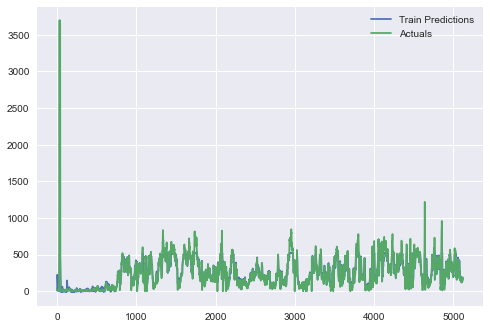

In [21]:
model = load_model('2H_Forecast/2H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(2,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 3 hours forecast

In [22]:
%%time

Trainer(3,6,12)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 9ms/step - loss: 111200.8906 - mean_absolute_error: 248.5366 - val_loss: 150474.5156 - val_mean_absolute_error: 333.9982
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 6ms/step - loss: 110320.9453 - mean_absolute_error: 246.9042 - val_loss: 149023.4062 - val_mean_absolute_error: 331.7747
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 6ms/step - loss: 109007.3438 - mean_absolute_error: 244.3277 - val_loss: 146935.5469 - val_mean_absolute_error: 328.4332
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 6ms/step - loss: 107331.0859 - mean_absolute_error: 241.1480 - val_loss: 144559.8281 - val_mean_absolute_error: 324.8723
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 105278.2422 - mean_absolute_error: 237.2219 - val_loss: 141227.1875 - val_mean_absolute_error: 319.7807
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 6ms/step - loss: 103000.6328 - mean_absolute_error: 233.0846 - val_loss: 138418.4375 - val_mean_absolute_error: 315.4021
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 6ms/step - loss: 100970.5547 - mean_absolute_error: 229.5691 - val_loss: 135709.5156 - val_mean_absolute_error: 311.1688
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 99070.1484 - mean_absolute_error: 226.3244 - val_loss: 133061.8906 - val_mean_absolute_error: 306.9249
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 97183.8906 - mean_absolute_error: 222.9973 - val_loss: 130468.1250 - val_mean_absolute_error: 302.7213
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 7ms/step - loss: 95286.4531 - mean_absolute_error: 219.5223 - val_loss: 127696.0000 - val_mean_absolute_error: 298.1343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 93142.5703 - mean_absolute_error: 215.7390 - val_loss: 124591.3828 - val_mean_absolute_error: 292.9871
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 91033.6484 - mean_absolute_error: 211.9413 - val_loss: 121772.8828 - val_mean_absolute_error: 288.2612
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 8ms/step - loss: 89036.9453 - mean_absolute_error: 208.4782 - val_loss: 118967.2344 - val_mean_absolute_error: 283.4882
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 87080.6328 - mean_absolute_error: 204.6324 - val_loss: 116158.2500 - val_mean_absolute_error: 278.6736
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 7ms/step - loss: 85105.2344 - mean_absolute_error: 201.1360 - val_loss: 113367.4688 - val_mean_absolute_error: 273.8824
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 7ms/step - loss: 83140.8750 - mean_absolute_error: 197.3883 - val_loss: 110538.8672 - val_mean_absolute_error: 268.9634
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 8ms/step - loss: 80971.9766 - mean_absolute_error: 193.5420 - val_loss: 107277.1016 - val_mean_absolute_error: 263.3441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 78860.5156 - mean_absolute_error: 189.7204 - val_loss: 104360.1953 - val_mean_absolute_error: 258.2954
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 7ms/step - loss: 76846.6016 - mean_absolute_error: 186.0930 - val_loss: 101488.2812 - val_mean_absolute_error: 253.3445
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 6ms/step - loss: 74899.5000 - mean_absolute_error: 182.4174 - val_loss: 98612.0391 - val_mean_absolute_error: 248.4511
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 6ms/step - loss: 72884.9141 - mean_absolute_error: 178.8799 - val_loss: 95613.8438 - val_mean_absolute_error: 243.3775
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 6ms/step - loss: 70867.2500 - mean_absolute_error: 174.7640 - val_loss: 92697.8828 - val_mean_absolute_error: 238.4963
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 7ms/step - loss: 68891.3984 - mean_absolute_error: 171.4994 - val_loss: 89854.8828 - val_mean_absolute_error: 233.6046
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 7ms/step - loss: 66977.1562 - mean_absolute_error: 167.6582 - val_loss: 87050.2969 - val_mean_absolute_error: 228.8014
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 7ms/step - loss: 65053.2266 - mean_absolute_error: 163.7884 - val_loss: 84082.9688 - val_mean_absolute_error: 223.6677
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 7ms/step - loss: 63116.7227 - mean_absolute_error: 160.2035 - val_loss: 81279.8203 - val_mean_absolute_error: 218.6358
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 6ms/step - loss: 61262.1836 - mean_absolute_error: 156.3222 - val_loss: 78564.5625 - val_mean_absolute_error: 213.8493
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 6ms/step - loss: 59505.3477 - mean_absolute_error: 152.4257 - val_loss: 75850.4375 - val_mean_absolute_error: 208.6535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 6ms/step - loss: 57707.6484 - mean_absolute_error: 148.8094 - val_loss: 73244.7500 - val_mean_absolute_error: 204.0799
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 6ms/step - loss: 56013.9062 - mean_absolute_error: 145.1806 - val_loss: 70647.7969 - val_mean_absolute_error: 199.1380
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 54356.1250 - mean_absolute_error: 141.6204 - val_loss: 68153.3125 - val_mean_absolute_error: 194.6320
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 7ms/step - loss: 52773.9922 - mean_absolute_error: 138.2092 - val_loss: 65729.3516 - val_mean_absolute_error: 190.1203
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 6ms/step - loss: 51201.8008 - mean_absolute_error: 134.9825 - val_loss: 63361.6914 - val_mean_absolute_error: 185.8475
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 49718.4492 - mean_absolute_error: 131.5868 - val_loss: 61006.2969 - val_mean_absolute_error: 181.3410
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 48281.7539 - mean_absolute_error: 128.6741 - val_loss: 58799.6523 - val_mean_absolute_error: 177.1573
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 46882.7500 - mean_absolute_error: 125.3795 - val_loss: 56595.8984 - val_mean_absolute_error: 173.5812
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 45519.8945 - mean_absolute_error: 123.2390 - val_loss: 54444.4141 - val_mean_absolute_error: 169.3523
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 44243.4180 - mean_absolute_error: 119.7065 - val_loss: 52391.7227 - val_mean_absolute_error: 165.5447
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 42957.6250 - mean_absolute_error: 117.0886 - val_loss: 50330.0742 - val_mean_absolute_error: 161.7023
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 41745.4531 - mean_absolute_error: 114.3011 - val_loss: 48369.4766 - val_mean_absolute_error: 158.1082
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 40529.8828 - mean_absolute_error: 111.7766 - val_loss: 46560.2188 - val_mean_absolute_error: 154.5717
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 39428.7930 - mean_absolute_error: 109.2440 - val_loss: 44644.7344 - val_mean_absolute_error: 150.8461
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 38342.7383 - mean_absolute_error: 106.4192 - val_loss: 42915.0312 - val_mean_absolute_error: 147.7440
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 37303.0117 - mean_absolute_error: 103.8584 - val_loss: 41206.4883 - val_mean_absolute_error: 144.2431
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 6ms/step - loss: 36263.7070 - mean_absolute_error: 101.4983 - val_loss: 39515.6172 - val_mean_absolute_error: 140.4654
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 7ms/step - loss: 35322.6680 - mean_absolute_error: 98.7457 - val_loss: 37936.3164 - val_mean_absolute_error: 137.5524
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 6ms/step - loss: 34419.8242 - mean_absolute_error: 97.6083 - val_loss: 36428.9414 - val_mean_absolute_error: 134.0179
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 6ms/step - loss: 33513.0977 - mean_absolute_error: 94.7549 - val_loss: 34946.3125 - val_mean_absolute_error: 131.2747
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 6ms/step - loss: 32692.0547 - mean_absolute_error: 93.0738 - val_loss: 33485.6758 - val_mean_absolute_error: 127.6365
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 31849.2578 - mean_absolute_error: 91.0888 - val_loss: 32146.0664 - val_mean_absolute_error: 124.7026
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 6ms/step - loss: 31103.0664 - mean_absolute_error: 89.1215 - val_loss: 30750.9414 - val_mean_absolute_error: 121.5239
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 6ms/step - loss: 30409.3887 - mean_absolute_error: 87.2962 - val_loss: 29528.3047 - val_mean_absolute_error: 118.9004
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 7ms/step - loss: 29685.2871 - mean_absolute_error: 85.6926 - val_loss: 28351.5156 - val_mean_absolute_error: 115.9091
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 6ms/step - loss: 28980.0000 - mean_absolute_error: 83.6539 - val_loss: 27097.9180 - val_mean_absolute_error: 112.6497
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 6ms/step - loss: 28353.3457 - mean_absolute_error: 81.8187 - val_loss: 26002.1484 - val_mean_absolute_error: 110.1600
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 27710.5938 - mean_absolute_error: 79.9282 - val_loss: 24939.4238 - val_mean_absolute_error: 107.3704
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 6ms/step - loss: 27126.2051 - mean_absolute_error: 78.5553 - val_loss: 23940.5840 - val_mean_absolute_error: 105.0393
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 26580.9629 - mean_absolute_error: 76.7896 - val_loss: 22977.0703 - val_mean_absolute_error: 102.6745
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 26102.4473 - mean_absolute_error: 75.9032 - val_loss: 21975.4902 - val_mean_absolute_error: 99.7026
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 7ms/step - loss: 25613.7090 - mean_absolute_error: 74.4509 - val_loss: 21210.7539 - val_mean_absolute_error: 98.0316
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 25169.9531 - mean_absolute_error: 73.1544 - val_loss: 20330.8984 - val_mean_absolute_error: 95.4541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 24737.2656 - mean_absolute_error: 72.1771 - val_loss: 19554.9844 - val_mean_absolute_error: 93.3744
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 24322.7070 - mean_absolute_error: 71.0125 - val_loss: 18886.2578 - val_mean_absolute_error: 91.6195
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 7ms/step - loss: 23953.1973 - mean_absolute_error: 69.8796 - val_loss: 18118.9141 - val_mean_absolute_error: 89.6320
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 23596.8848 - mean_absolute_error: 68.6292 - val_loss: 17437.7070 - val_mean_absolute_error: 87.7637
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 9ms/step - loss: 23334.6465 - mean_absolute_error: 68.0810 - val_loss: 16911.2305 - val_mean_absolute_error: 86.4736
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 22915.5469 - mean_absolute_error: 67.0070 - val_loss: 16349.8965 - val_mean_absolute_error: 85.2013
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 22613.3633 - mean_absolute_error: 66.1093 - val_loss: 15736.6943 - val_mean_absolute_error: 83.1656
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 22324.4414 - mean_absolute_error: 64.7432 - val_loss: 15296.3467 - val_mean_absolute_error: 81.9994
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 6ms/step - loss: 22095.8008 - mean_absolute_error: 64.8485 - val_loss: 14829.0010 - val_mean_absolute_error: 80.3501
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 21833.8750 - mean_absolute_error: 63.4401 - val_loss: 14320.3652 - val_mean_absolute_error: 79.0805
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 6ms/step - loss: 21584.1934 - mean_absolute_error: 62.8838 - val_loss: 13860.9922 - val_mean_absolute_error: 77.5254
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 6ms/step - loss: 21347.6660 - mean_absolute_error: 62.0442 - val_loss: 13525.3789 - val_mean_absolute_error: 76.6874
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 21117.6309 - mean_absolute_error: 61.3353 - val_loss: 13143.0420 - val_mean_absolute_error: 75.6523
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 6ms/step - loss: 20938.5039 - mean_absolute_error: 60.6603 - val_loss: 12761.4453 - val_mean_absolute_error: 74.7191
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 20884.9453 - mean_absolute_error: 60.4896 - val_loss: 12532.6367 - val_mean_absolute_error: 74.1856
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 7ms/step - loss: 20630.6719 - mean_absolute_error: 59.9101 - val_loss: 12298.6689 - val_mean_absolute_error: 73.5188
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 6ms/step - loss: 20477.1367 - mean_absolute_error: 59.2964 - val_loss: 11870.3945 - val_mean_absolute_error: 72.2752
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 6ms/step - loss: 20354.5508 - mean_absolute_error: 58.9829 - val_loss: 11648.9990 - val_mean_absolute_error: 71.6206
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 20202.3086 - mean_absolute_error: 58.4678 - val_loss: 11517.9531 - val_mean_absolute_error: 70.9529
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 20113.4043 - mean_absolute_error: 57.8866 - val_loss: 11220.3252 - val_mean_absolute_error: 70.1475
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 8ms/step - loss: 19960.0801 - mean_absolute_error: 57.4787 - val_loss: 10911.3301 - val_mean_absolute_error: 69.3777
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 19816.8242 - mean_absolute_error: 57.3481 - val_loss: 10855.0693 - val_mean_absolute_error: 69.2665
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 6ms/step - loss: 19768.5078 - mean_absolute_error: 56.8691 - val_loss: 10426.1953 - val_mean_absolute_error: 67.5999
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 6ms/step - loss: 19656.8691 - mean_absolute_error: 56.5996 - val_loss: 10270.9062 - val_mean_absolute_error: 67.0249
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 19553.8730 - mean_absolute_error: 56.4199 - val_loss: 10197.9414 - val_mean_absolute_error: 66.8753
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 6ms/step - loss: 19513.5273 - mean_absolute_error: 56.2025 - val_loss: 10129.2188 - val_mean_absolute_error: 66.5695
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 19477.7734 - mean_absolute_error: 56.0570 - val_loss: 9899.5459 - val_mean_absolute_error: 65.9502
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 7ms/step - loss: 19328.0859 - mean_absolute_error: 55.2627 - val_loss: 9717.9111 - val_mean_absolute_error: 65.4677
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 19183.6289 - mean_absolute_error: 55.2038 - val_loss: 9580.0576 - val_mean_absolute_error: 64.8750
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 7ms/step - loss: 19128.1797 - mean_absolute_error: 54.6817 - val_loss: 9489.8828 - val_mean_absolute_error: 64.5234
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 6ms/step - loss: 19079.6348 - mean_absolute_error: 54.4931 - val_loss: 9364.2695 - val_mean_absolute_error: 64.1572
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 7ms/step - loss: 19084.3066 - mean_absolute_error: 54.8125 - val_loss: 9368.3027 - val_mean_absolute_error: 64.0691
Epoch 94/100
161/161 [==============================] - 1s 7ms/step - loss: 18929.5547 - mean_absolute_error: 54.1447 - val_loss: 9241.0840 - val_mean_absolute_error: 63.7370
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 7ms/step - loss: 18867.3203 - mean_absolute_error: 53.8924 - val_loss: 9191.1572 - val_mean_absolute_error: 63.5842
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 6ms/step - loss: 18780.1484 - mean_absolute_error: 54.2019 - val_loss: 9124.7520 - val_mean_absolute_error: 63.6803
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 6ms/step - loss: 18739.9902 - mean_absolute_error: 53.7176 - val_loss: 8973.9082 - val_mean_absolute_error: 62.5531
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 6ms/step - loss: 18635.9863 - mean_absolute_error: 53.5148 - val_loss: 8875.7783 - val_mean_absolute_error: 62.1325
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 6ms/step - loss: 18851.4395 - mean_absolute_error: 54.2957 - val_loss: 8785.2344 - val_mean_absolute_error: 62.0032
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 6ms/step - loss: 18565.8203 - mean_absolute_error: 53.0800 - val_loss: 8696.0371 - val_mean_absolute_error: 61.3932
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 15ms/step - loss: 111451.0859 - mean_absolute_error: 248.8748 - val_loss: 150758.5781 - val_mean_absolute_error: 334.3755
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 7ms/step - loss: 110700.3594 - mean_absolute_error: 247.5668 - val_loss: 149801.4375 - val_mean_absolute_error: 332.9551
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 7ms/step - loss: 109933.9844 - mean_absolute_error: 246.0923 - val_loss: 148612.9688 - val_mean_absolute_error: 331.0919
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 7ms/step - loss: 108955.3125 - mean_absolute_error: 244.2274 - val_loss: 147172.8438 - val_mean_absolute_error: 329.0213
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 107908.8984 - mean_absolute_error: 242.2866 - val_loss: 145813.3281 - val_mean_absolute_error: 326.9820
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 7ms/step - loss: 106985.2109 - mean_absolute_error: 240.5120 - val_loss: 144494.2188 - val_mean_absolute_error: 324.8895
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 7ms/step - loss: 105808.0156 - mean_absolute_error: 238.2568 - val_loss: 142555.0625 - val_mean_absolute_error: 321.9231
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 104394.6172 - mean_absolute_error: 235.7401 - val_loss: 140838.1094 - val_mean_absolute_error: 319.3103
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 103148.2266 - mean_absolute_error: 233.4766 - val_loss: 138975.8281 - val_mean_absolute_error: 316.3738
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 101751.3359 - mean_absolute_error: 230.9319 - val_loss: 137066.3750 - val_mean_absolute_error: 313.3119
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 100414.8125 - mean_absolute_error: 228.5191 - val_loss: 135348.6406 - val_mean_absolute_error: 310.5851
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 99011.8047 - mean_absolute_error: 225.9434 - val_loss: 133290.2969 - val_mean_absolute_error: 307.2772
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 7ms/step - loss: 97659.3203 - mean_absolute_error: 223.6014 - val_loss: 131501.7188 - val_mean_absolute_error: 304.4030
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 96386.2812 - mean_absolute_error: 221.3730 - val_loss: 129747.8203 - val_mean_absolute_error: 301.5503
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 8ms/step - loss: 95116.4141 - mean_absolute_error: 219.1467 - val_loss: 127979.1016 - val_mean_absolute_error: 298.6514
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 8ms/step - loss: 93804.7891 - mean_absolute_error: 216.7232 - val_loss: 126003.1016 - val_mean_absolute_error: 295.3850
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 7ms/step - loss: 92403.7734 - mean_absolute_error: 214.2282 - val_loss: 124141.4297 - val_mean_absolute_error: 292.2674
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 91077.6328 - mean_absolute_error: 211.7652 - val_loss: 122259.4688 - val_mean_absolute_error: 289.0823
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 89638.9688 - mean_absolute_error: 208.9978 - val_loss: 120168.9766 - val_mean_absolute_error: 285.5417
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 88261.3672 - mean_absolute_error: 206.6052 - val_loss: 118262.8516 - val_mean_absolute_error: 282.2752
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - ETA: 0s - loss: 87546.1953 - mean_absolute_error: 204.555 - 1s 9ms/step - loss: 86891.4531 - mean_absolute_error: 204.0799 - val_loss: 116320.6484 - val_mean_absolute_error: 278.9493
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 85519.1328 - mean_absolute_error: 201.3938 - val_loss: 114266.9609 - val_mean_absolute_error: 275.4242
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 84048.7109 - mean_absolute_error: 198.9350 - val_loss: 112255.9375 - val_mean_absolute_error: 271.9619
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 82660.7500 - mean_absolute_error: 196.3866 - val_loss: 110276.8750 - val_mean_absolute_error: 268.5342
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 81274.9375 - mean_absolute_error: 193.8572 - val_loss: 108306.6797 - val_mean_absolute_error: 265.1113
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 79922.9844 - mean_absolute_error: 191.2475 - val_loss: 106327.9844 - val_mean_absolute_error: 261.6870
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 78529.5391 - mean_absolute_error: 188.8647 - val_loss: 104337.6875 - val_mean_absolute_error: 258.2576
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 77160.1406 - mean_absolute_error: 186.4823 - val_loss: 102348.7578 - val_mean_absolute_error: 254.8376
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 75787.5703 - mean_absolute_error: 183.9035 - val_loss: 100488.0391 - val_mean_absolute_error: 251.7032
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 74450.5391 - mean_absolute_error: 181.4534 - val_loss: 98460.3281 - val_mean_absolute_error: 248.2710
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 73091.8203 - mean_absolute_error: 179.0087 - val_loss: 96581.8828 - val_mean_absolute_error: 245.1207
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 7ms/step - loss: 71745.5781 - mean_absolute_error: 176.2973 - val_loss: 94960.8594 - val_mean_absolute_error: 242.3275
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 7ms/step - loss: 70381.0703 - mean_absolute_error: 173.6336 - val_loss: 92669.3125 - val_mean_absolute_error: 238.5829
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 69055.2734 - mean_absolute_error: 170.7478 - val_loss: 91069.7969 - val_mean_absolute_error: 235.7559
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 67680.8438 - mean_absolute_error: 168.5782 - val_loss: 88467.1406 - val_mean_absolute_error: 231.4407
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 66212.3906 - mean_absolute_error: 165.8641 - val_loss: 86472.3438 - val_mean_absolute_error: 228.0690
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 64883.8438 - mean_absolute_error: 163.0702 - val_loss: 84483.0234 - val_mean_absolute_error: 224.6633
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 63615.4883 - mean_absolute_error: 160.5977 - val_loss: 82559.5469 - val_mean_absolute_error: 221.2980
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 62349.9180 - mean_absolute_error: 158.5477 - val_loss: 80710.9609 - val_mean_absolute_error: 218.0276
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 61102.8828 - mean_absolute_error: 155.6838 - val_loss: 78817.4688 - val_mean_absolute_error: 214.6554
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 59875.2500 - mean_absolute_error: 153.4154 - val_loss: 77104.7422 - val_mean_absolute_error: 211.4640
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 58650.6641 - mean_absolute_error: 150.7760 - val_loss: 75260.1719 - val_mean_absolute_error: 208.1491
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 57454.9180 - mean_absolute_error: 148.3476 - val_loss: 73365.4844 - val_mean_absolute_error: 204.7007
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 56274.1289 - mean_absolute_error: 145.6869 - val_loss: 71498.3906 - val_mean_absolute_error: 201.2957
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 55107.9492 - mean_absolute_error: 143.2449 - val_loss: 69783.0781 - val_mean_absolute_error: 198.1712
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 8ms/step - loss: 53977.0078 - mean_absolute_error: 140.9748 - val_loss: 67986.9688 - val_mean_absolute_error: 194.7802
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 52816.8320 - mean_absolute_error: 138.3461 - val_loss: 66183.9219 - val_mean_absolute_error: 191.6569
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 51621.9141 - mean_absolute_error: 135.9505 - val_loss: 64476.5742 - val_mean_absolute_error: 188.6257
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 8ms/step - loss: 50514.0195 - mean_absolute_error: 133.4178 - val_loss: 62748.3945 - val_mean_absolute_error: 185.2798
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 49411.6250 - mean_absolute_error: 130.7524 - val_loss: 61135.0586 - val_mean_absolute_error: 182.3215
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 48368.4805 - mean_absolute_error: 128.3253 - val_loss: 59465.0859 - val_mean_absolute_error: 179.2575
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 47328.0391 - mean_absolute_error: 126.4657 - val_loss: 57781.3828 - val_mean_absolute_error: 176.2287
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 46309.9375 - mean_absolute_error: 124.0791 - val_loss: 56272.8555 - val_mean_absolute_error: 173.4162
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 7ms/step - loss: 45347.8047 - mean_absolute_error: 121.9170 - val_loss: 54715.4102 - val_mean_absolute_error: 170.6461
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 7ms/step - loss: 44372.5547 - mean_absolute_error: 119.9477 - val_loss: 53190.7930 - val_mean_absolute_error: 168.1101
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 7ms/step - loss: 43528.7148 - mean_absolute_error: 118.2598 - val_loss: 51949.1328 - val_mean_absolute_error: 165.7189
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 42717.4375 - mean_absolute_error: 116.2246 - val_loss: 50524.8555 - val_mean_absolute_error: 163.4005
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 41922.7539 - mean_absolute_error: 114.4896 - val_loss: 49271.4297 - val_mean_absolute_error: 161.0316
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 41150.6992 - mean_absolute_error: 113.0975 - val_loss: 47991.4727 - val_mean_absolute_error: 158.6038
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 40303.8477 - mean_absolute_error: 110.6213 - val_loss: 46678.4023 - val_mean_absolute_error: 155.9368
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 39508.8516 - mean_absolute_error: 108.6790 - val_loss: 45370.3086 - val_mean_absolute_error: 153.3943
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 38737.1211 - mean_absolute_error: 106.8819 - val_loss: 44012.2617 - val_mean_absolute_error: 150.6261
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 7ms/step - loss: 37961.9883 - mean_absolute_error: 104.8355 - val_loss: 42774.7500 - val_mean_absolute_error: 148.2792
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 37191.7148 - mean_absolute_error: 103.2675 - val_loss: 41559.3164 - val_mean_absolute_error: 145.6941
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 36495.8008 - mean_absolute_error: 101.5975 - val_loss: 40244.6289 - val_mean_absolute_error: 143.0594
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 35749.1992 - mean_absolute_error: 99.5661 - val_loss: 39070.5039 - val_mean_absolute_error: 140.5786
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 35032.5195 - mean_absolute_error: 97.9045 - val_loss: 37959.5078 - val_mean_absolute_error: 138.0889
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 34340.1133 - mean_absolute_error: 96.1128 - val_loss: 36780.2031 - val_mean_absolute_error: 135.6296
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 33688.8789 - mean_absolute_error: 94.9529 - val_loss: 35690.8203 - val_mean_absolute_error: 133.2216
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 33002.9609 - mean_absolute_error: 92.8518 - val_loss: 34554.3281 - val_mean_absolute_error: 130.7765
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 32392.9004 - mean_absolute_error: 91.1415 - val_loss: 33287.1406 - val_mean_absolute_error: 128.0887
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 7ms/step - loss: 31756.6230 - mean_absolute_error: 90.1364 - val_loss: 32290.3613 - val_mean_absolute_error: 125.6363
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 31173.9844 - mean_absolute_error: 88.4507 - val_loss: 31362.3145 - val_mean_absolute_error: 123.7486
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 30698.9668 - mean_absolute_error: 87.5056 - val_loss: 30263.5781 - val_mean_absolute_error: 121.3487
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 30088.2227 - mean_absolute_error: 85.9471 - val_loss: 29358.4160 - val_mean_absolute_error: 119.1283
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 11ms/step - loss: 29565.6406 - mean_absolute_error: 84.4145 - val_loss: 28434.4512 - val_mean_absolute_error: 117.0575
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 8ms/step - loss: 29043.0332 - mean_absolute_error: 82.8227 - val_loss: 27424.4824 - val_mean_absolute_error: 114.9611
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 28635.6953 - mean_absolute_error: 83.8260 - val_loss: 26660.9961 - val_mean_absolute_error: 113.1057
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 7ms/step - loss: 28193.4492 - mean_absolute_error: 81.3096 - val_loss: 25914.8633 - val_mean_absolute_error: 111.0725
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 7ms/step - loss: 27816.2539 - mean_absolute_error: 80.5740 - val_loss: 25315.3574 - val_mean_absolute_error: 109.6040
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 27384.1934 - mean_absolute_error: 79.1724 - val_loss: 24496.8203 - val_mean_absolute_error: 107.3119
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 7ms/step - loss: 26972.2617 - mean_absolute_error: 77.9429 - val_loss: 23862.6836 - val_mean_absolute_error: 105.7463
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 26614.5938 - mean_absolute_error: 76.7587 - val_loss: 23347.1621 - val_mean_absolute_error: 104.3214
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 26220.0391 - mean_absolute_error: 75.5271 - val_loss: 22693.4473 - val_mean_absolute_error: 102.6181
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 7ms/step - loss: 25874.2207 - mean_absolute_error: 74.9717 - val_loss: 22179.0000 - val_mean_absolute_error: 101.4006
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 25522.1504 - mean_absolute_error: 73.7110 - val_loss: 21582.7207 - val_mean_absolute_error: 100.0934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 8ms/step - loss: 25168.4004 - mean_absolute_error: 72.9076 - val_loss: 21010.1445 - val_mean_absolute_error: 98.4791
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 24860.1133 - mean_absolute_error: 71.9172 - val_loss: 20351.6348 - val_mean_absolute_error: 96.7278
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 24536.3730 - mean_absolute_error: 71.1159 - val_loss: 19837.7637 - val_mean_absolute_error: 95.4403
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 24268.4258 - mean_absolute_error: 70.5948 - val_loss: 19301.2852 - val_mean_absolute_error: 93.9613
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 9ms/step - loss: 23968.6934 - mean_absolute_error: 69.4583 - val_loss: 18859.2129 - val_mean_absolute_error: 92.9965
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 23674.4219 - mean_absolute_error: 68.5527 - val_loss: 18329.3457 - val_mean_absolute_error: 91.4072
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 23395.6855 - mean_absolute_error: 67.8639 - val_loss: 17748.8047 - val_mean_absolute_error: 89.4985
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 23124.3477 - mean_absolute_error: 66.9407 - val_loss: 17195.7539 - val_mean_absolute_error: 88.1884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 7ms/step - loss: 22884.5234 - mean_absolute_error: 66.5205 - val_loss: 16778.2051 - val_mean_absolute_error: 86.8307
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 22917.6602 - mean_absolute_error: 66.7637 - val_loss: 16338.2979 - val_mean_absolute_error: 85.6658
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 22471.6133 - mean_absolute_error: 65.0420 - val_loss: 16147.4199 - val_mean_absolute_error: 85.1986
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 22227.9648 - mean_absolute_error: 64.2107 - val_loss: 15626.5176 - val_mean_absolute_error: 83.7410
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 22023.3047 - mean_absolute_error: 63.6931 - val_loss: 15178.5234 - val_mean_absolute_error: 82.4932
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 21833.1738 - mean_absolute_error: 63.2016 - val_loss: 14757.1221 - val_mean_absolute_error: 81.1960
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 12ms/step - loss: 111189.4688 - mean_absolute_error: 248.3525 - val_loss: 150405.7812 - val_mean_absolute_error: 333.6664
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110279.4844 - mean_absolute_error: 246.4819 - val_loss: 148857.5156 - val_mean_absolute_error: 331.1727
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 9ms/step - loss: 108939.2344 - mean_absolute_error: 243.8645 - val_loss: 147039.2344 - val_mean_absolute_error: 328.3697
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 8ms/step - loss: 107526.2266 - mean_absolute_error: 241.1482 - val_loss: 144996.5625 - val_mean_absolute_error: 325.3219
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 105889.6328 - mean_absolute_error: 238.1442 - val_loss: 142396.6719 - val_mean_absolute_error: 321.4533
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 103984.7500 - mean_absolute_error: 234.8521 - val_loss: 139903.7500 - val_mean_absolute_error: 317.7074
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 102200.1484 - mean_absolute_error: 231.7002 - val_loss: 137363.3750 - val_mean_absolute_error: 313.7099
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 100325.5078 - mean_absolute_error: 228.4295 - val_loss: 134743.3438 - val_mean_absolute_error: 309.6237
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 98505.8594 - mean_absolute_error: 225.2785 - val_loss: 132280.4375 - val_mean_absolute_error: 305.6668
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 9ms/step - loss: 96603.4141 - mean_absolute_error: 221.8391 - val_loss: 129589.9844 - val_mean_absolute_error: 301.2753
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 94641.8750 - mean_absolute_error: 218.3862 - val_loss: 126669.5078 - val_mean_absolute_error: 296.4964
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 92610.3672 - mean_absolute_error: 214.7445 - val_loss: 123972.1016 - val_mean_absolute_error: 291.9792
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 90639.0000 - mean_absolute_error: 211.3125 - val_loss: 120969.7344 - val_mean_absolute_error: 286.8974
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 88555.1484 - mean_absolute_error: 207.3626 - val_loss: 118231.5312 - val_mean_absolute_error: 282.2210
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 86639.2109 - mean_absolute_error: 203.8048 - val_loss: 115502.3594 - val_mean_absolute_error: 277.5406
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 84692.7422 - mean_absolute_error: 200.4930 - val_loss: 112773.1250 - val_mean_absolute_error: 272.8408
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 8ms/step - loss: 82777.9766 - mean_absolute_error: 196.9540 - val_loss: 110029.5156 - val_mean_absolute_error: 268.0839
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 11ms/step - loss: 80870.5234 - mean_absolute_error: 193.3233 - val_loss: 107284.2188 - val_mean_absolute_error: 263.3180
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 9ms/step - loss: 78927.1484 - mean_absolute_error: 190.0830 - val_loss: 104542.6719 - val_mean_absolute_error: 258.5925
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 77063.7891 - mean_absolute_error: 186.5884 - val_loss: 101843.8203 - val_mean_absolute_error: 253.9452
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 8ms/step - loss: 75235.8594 - mean_absolute_error: 183.0724 - val_loss: 99154.8594 - val_mean_absolute_error: 249.3751
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 73371.3047 - mean_absolute_error: 179.6320 - val_loss: 96458.8984 - val_mean_absolute_error: 244.8392
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 71538.6719 - mean_absolute_error: 176.4991 - val_loss: 93811.4688 - val_mean_absolute_error: 240.3868
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 69724.7109 - mean_absolute_error: 172.8844 - val_loss: 91140.1484 - val_mean_absolute_error: 235.8784
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 67946.1328 - mean_absolute_error: 169.7516 - val_loss: 88531.9922 - val_mean_absolute_error: 231.4291
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 66177.6094 - mean_absolute_error: 166.3044 - val_loss: 85931.3984 - val_mean_absolute_error: 227.0557
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 64434.1328 - mean_absolute_error: 162.8970 - val_loss: 83378.7656 - val_mean_absolute_error: 222.6457
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 8ms/step - loss: 62758.4375 - mean_absolute_error: 159.8817 - val_loss: 80935.4062 - val_mean_absolute_error: 218.5157
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 8ms/step - loss: 61037.5273 - mean_absolute_error: 156.2899 - val_loss: 78256.7812 - val_mean_absolute_error: 213.6940
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 8ms/step - loss: 59364.1602 - mean_absolute_error: 152.4712 - val_loss: 75773.2109 - val_mean_absolute_error: 209.2290
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 57717.9414 - mean_absolute_error: 149.4225 - val_loss: 73312.4531 - val_mean_absolute_error: 204.6912
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 56131.9922 - mean_absolute_error: 146.2711 - val_loss: 70899.9844 - val_mean_absolute_error: 200.2619
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 54593.3242 - mean_absolute_error: 142.9600 - val_loss: 68569.2188 - val_mean_absolute_error: 195.9993
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 53082.1367 - mean_absolute_error: 139.7172 - val_loss: 66311.1953 - val_mean_absolute_error: 191.7724
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 51631.0469 - mean_absolute_error: 136.6506 - val_loss: 64038.0625 - val_mean_absolute_error: 187.5873
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 50208.8359 - mean_absolute_error: 133.2683 - val_loss: 61825.8906 - val_mean_absolute_error: 183.4514
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 48830.6875 - mean_absolute_error: 130.5536 - val_loss: 59688.2852 - val_mean_absolute_error: 179.4466
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 2s 10ms/step - loss: 47510.7383 - mean_absolute_error: 127.3155 - val_loss: 57608.5352 - val_mean_absolute_error: 175.8041
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 46221.2969 - mean_absolute_error: 124.8784 - val_loss: 55616.5938 - val_mean_absolute_error: 172.1923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 44993.2500 - mean_absolute_error: 121.7222 - val_loss: 53609.0781 - val_mean_absolute_error: 168.4126
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 43766.7344 - mean_absolute_error: 119.2545 - val_loss: 51690.0000 - val_mean_absolute_error: 164.8422
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 42599.7617 - mean_absolute_error: 116.6355 - val_loss: 49791.9297 - val_mean_absolute_error: 161.4054
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 41455.6953 - mean_absolute_error: 114.2139 - val_loss: 47974.4258 - val_mean_absolute_error: 158.0546
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 9ms/step - loss: 40397.1328 - mean_absolute_error: 111.3970 - val_loss: 46174.8398 - val_mean_absolute_error: 154.5819
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 9ms/step - loss: 39325.2266 - mean_absolute_error: 109.5564 - val_loss: 44475.9922 - val_mean_absolute_error: 151.3982
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 38340.5117 - mean_absolute_error: 107.2046 - val_loss: 42915.8789 - val_mean_absolute_error: 148.3900
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 37408.9180 - mean_absolute_error: 104.9642 - val_loss: 41083.9766 - val_mean_absolute_error: 144.8877
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 36372.9102 - mean_absolute_error: 102.5059 - val_loss: 39548.5234 - val_mean_absolute_error: 141.8099
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 35444.6797 - mean_absolute_error: 100.6155 - val_loss: 38070.2148 - val_mean_absolute_error: 139.0338
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 34619.9453 - mean_absolute_error: 98.5866 - val_loss: 36620.3789 - val_mean_absolute_error: 136.1709
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 11ms/step - loss: 33832.0234 - mean_absolute_error: 96.6906 - val_loss: 35290.7109 - val_mean_absolute_error: 133.4034
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 33060.9453 - mean_absolute_error: 95.3284 - val_loss: 34111.3086 - val_mean_absolute_error: 130.9315
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 32348.0859 - mean_absolute_error: 93.3288 - val_loss: 32806.0898 - val_mean_absolute_error: 128.2232
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 31642.2012 - mean_absolute_error: 91.7659 - val_loss: 31629.6191 - val_mean_absolute_error: 125.5722
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 12ms/step - loss: 30996.8496 - mean_absolute_error: 90.2945 - val_loss: 30602.5312 - val_mean_absolute_error: 123.3424
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 9ms/step - loss: 30358.9668 - mean_absolute_error: 88.7638 - val_loss: 29464.3750 - val_mean_absolute_error: 121.1648
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 9ms/step - loss: 29731.6152 - mean_absolute_error: 86.8835 - val_loss: 28293.4395 - val_mean_absolute_error: 118.1527
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 29110.4336 - mean_absolute_error: 85.2436 - val_loss: 27378.8047 - val_mean_absolute_error: 115.6552
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 28534.4141 - mean_absolute_error: 83.5735 - val_loss: 26247.7520 - val_mean_absolute_error: 112.8056
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 27989.5605 - mean_absolute_error: 81.9388 - val_loss: 25295.0801 - val_mean_absolute_error: 110.2089
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 27434.0566 - mean_absolute_error: 80.2020 - val_loss: 24259.0801 - val_mean_absolute_error: 107.4238
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 26917.3828 - mean_absolute_error: 78.6438 - val_loss: 23426.3555 - val_mean_absolute_error: 105.1384
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 26430.2754 - mean_absolute_error: 77.4259 - val_loss: 22682.7383 - val_mean_absolute_error: 103.4214
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 25981.8809 - mean_absolute_error: 75.9159 - val_loss: 21975.3418 - val_mean_absolute_error: 101.2782
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 9ms/step - loss: 25552.3223 - mean_absolute_error: 75.0496 - val_loss: 20872.1953 - val_mean_absolute_error: 98.7623
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 25154.9902 - mean_absolute_error: 73.6979 - val_loss: 20265.1426 - val_mean_absolute_error: 97.1096
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 24792.8809 - mean_absolute_error: 72.5379 - val_loss: 19645.0254 - val_mean_absolute_error: 95.4045
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 9ms/step - loss: 24451.8789 - mean_absolute_error: 71.9091 - val_loss: 18902.1797 - val_mean_absolute_error: 93.6156
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 24132.0645 - mean_absolute_error: 70.8274 - val_loss: 18605.7793 - val_mean_absolute_error: 92.9850
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 23812.6094 - mean_absolute_error: 69.7332 - val_loss: 17905.7578 - val_mean_absolute_error: 91.2593
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 23534.6816 - mean_absolute_error: 69.1532 - val_loss: 17312.1055 - val_mean_absolute_error: 89.4712
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 23247.1309 - mean_absolute_error: 68.3461 - val_loss: 16968.9922 - val_mean_absolute_error: 88.6240
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 22983.4238 - mean_absolute_error: 67.1474 - val_loss: 16354.5156 - val_mean_absolute_error: 86.7831
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 22733.3418 - mean_absolute_error: 66.7820 - val_loss: 15862.1055 - val_mean_absolute_error: 85.0476
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 10ms/step - loss: 22506.6504 - mean_absolute_error: 65.9678 - val_loss: 15689.7607 - val_mean_absolute_error: 84.8938
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 8ms/step - loss: 22309.4805 - mean_absolute_error: 65.0987 - val_loss: 15253.6045 - val_mean_absolute_error: 83.4259
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 8ms/step - loss: 22072.3574 - mean_absolute_error: 64.6502 - val_loss: 14958.1748 - val_mean_absolute_error: 82.5621
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 21879.3125 - mean_absolute_error: 63.7680 - val_loss: 15024.7451 - val_mean_absolute_error: 82.6984
Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 21716.1465 - mean_absolute_error: 63.3298 - val_loss: 14376.6865 - val_mean_absolute_error: 80.9614
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 21544.3477 - mean_absolute_error: 62.5889 - val_loss: 13486.9424 - val_mean_absolute_error: 77.9311
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 21384.6992 - mean_absolute_error: 62.2784 - val_loss: 13867.9316 - val_mean_absolute_error: 79.8398
Epoch 82/100
161/161 [==============================] - 1s 8ms/step - loss: 21263.0195 - mean_absolute_error: 61.6702 - val_loss: 13451.2471 - val_mean_absolute_error: 77.9282
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 21158.4277 - mean_absolute_error: 61.3385 - val_loss: 13436.7764 - val_mean_absolute_error: 78.1954
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 21069.5801 - mean_absolute_error: 61.3886 - val_loss: 12710.8076 - val_mean_absolute_error: 76.0788
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 20889.7715 - mean_absolute_error: 60.5486 - val_loss: 12616.8525 - val_mean_absolute_error: 75.7624
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 20763.4668 - mean_absolute_error: 59.9042 - val_loss: 12545.5576 - val_mean_absolute_error: 75.3002
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 20631.3223 - mean_absolute_error: 59.8255 - val_loss: 12520.3096 - val_mean_absolute_error: 75.5744
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 20587.8516 - mean_absolute_error: 59.4998 - val_loss: 12252.5312 - val_mean_absolute_error: 75.1413
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 9ms/step - loss: 20541.9844 - mean_absolute_error: 59.0131 - val_loss: 11758.5957 - val_mean_absolute_error: 73.1328
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 10ms/step - loss: 20355.5859 - mean_absolute_error: 58.9016 - val_loss: 11917.5879 - val_mean_absolute_error: 73.6551
Epoch 91/100
161/161 [==============================] - 2s 12ms/step - loss: 20283.5723 - mean_absolute_error: 58.2449 - val_loss: 11506.3535 - val_mean_absolute_error: 72.2808
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 20227.2188 - mean_absolute_error: 58.0322 - val_loss: 11252.8193 - val_mean_absolute_error: 71.3715
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - ETA: 0s - loss: 20128.5449 - mean_absolute_error: 57.81 - 1s 9ms/step - loss: 20128.5449 - mean_absolute_error: 57.8164 - val_loss: 11201.3037 - val_mean_absolute_error: 71.2610
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 20042.7324 - mean_absolute_error: 57.4534 - val_loss: 11454.3398 - val_mean_absolute_error: 71.9137
Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 20001.9883 - mean_absolute_error: 57.1758 - val_loss: 10980.9395 - val_mean_absolute_error: 70.2370
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 8ms/step - loss: 19954.0879 - mean_absolute_error: 57.6562 - val_loss: 11147.3369 - val_mean_absolute_error: 70.7861
Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 19849.7168 - mean_absolute_error: 56.9167 - val_loss: 10836.4551 - val_mean_absolute_error: 69.9989
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 19779.1445 - mean_absolute_error: 56.6952 - val_loss: 10434.8418 - val_mean_absolute_error: 68.9193
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 19784.5371 - mean_absolute_error: 56.7263 - val_loss: 10450.7773 - val_mean_absolute_error: 68.4702
Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 19687.6055 - mean_absolute_error: 56.4563 - val_loss: 10470.3838 - val_mean_absolute_error: 68.6990

-----------------------------------------------------------------------------------------------------------

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-tr

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 110201.1172 - mean_absolute_error: 246.8785 - val_loss: 148766.5781 - val_mean_absolute_error: 331.4444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 11ms/step - loss: 108946.9453 - mean_absolute_error: 244.5721 - val_loss: 146834.8750 - val_mean_absolute_error: 328.4529
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 10ms/step - loss: 107202.5391 - mean_absolute_error: 241.0627 - val_loss: 144180.8906 - val_mean_absolute_error: 324.2343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 105015.7891 - mean_absolute_error: 236.7945 - val_loss: 141151.1406 - val_mean_absolute_error: 319.3371
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 102538.8438 - mean_absolute_error: 232.1880 - val_loss: 137366.6406 - val_mean_absolute_error: 313.6710
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 100163.4453 - mean_absolute_error: 227.9763 - val_loss: 134467.6875 - val_mean_absolute_error: 309.0723
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 9ms/step - loss: 97873.1094 - mean_absolute_error: 223.9166 - val_loss: 131150.0781 - val_mean_absolute_error: 303.8035
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 95779.9297 - mean_absolute_error: 220.1865 - val_loss: 128377.0547 - val_mean_absolute_error: 299.2831
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 93816.0938 - mean_absolute_error: 216.8017 - val_loss: 125717.2969 - val_mean_absolute_error: 294.8878
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 91893.1562 - mean_absolute_error: 213.2565 - val_loss: 123079.0234 - val_mean_absolute_error: 290.4573
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 90049.5312 - mean_absolute_error: 210.0134 - val_loss: 120463.2188 - val_mean_absolute_error: 286.0172
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 8ms/step - loss: 88059.1875 - mean_absolute_error: 206.3469 - val_loss: 117517.3672 - val_mean_absolute_error: 280.9711
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 85965.5625 - mean_absolute_error: 202.4596 - val_loss: 114487.3125 - val_mean_absolute_error: 275.8023
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 83960.7812 - mean_absolute_error: 199.0558 - val_loss: 111738.0000 - val_mean_absolute_error: 271.0603
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 10ms/step - loss: 82044.0938 - mean_absolute_error: 195.5936 - val_loss: 109024.7109 - val_mean_absolute_error: 266.3479
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 9ms/step - loss: 80165.4141 - mean_absolute_error: 192.3352 - val_loss: 106328.0703 - val_mean_absolute_error: 261.6831
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 10ms/step - loss: 78320.3438 - mean_absolute_error: 188.9891 - val_loss: 103665.6719 - val_mean_absolute_error: 257.1078
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 76484.2266 - mean_absolute_error: 185.5879 - val_loss: 101003.6953 - val_mean_absolute_error: 252.5474
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - ETA: 0s - loss: 75162.2578 - mean_absolute_error: 182.495 - 2s 10ms/step - loss: 74644.3125 - mean_absolute_error: 182.0554 - val_loss: 98326.0234 - val_mean_absolute_error: 248.0177
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 72855.5859 - mean_absolute_error: 178.8518 - val_loss: 95734.4844 - val_mean_absolute_error: 243.6733
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 71075.8438 - mean_absolute_error: 175.5069 - val_loss: 93109.0547 - val_mean_absolute_error: 239.1981
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 69328.3828 - mean_absolute_error: 172.2915 - val_loss: 90557.9844 - val_mean_absolute_error: 234.8701
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 67625.6562 - mean_absolute_error: 169.0660 - val_loss: 88025.4609 - val_mean_absolute_error: 230.5362
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 9ms/step - loss: 65923.0469 - mean_absolute_error: 165.6831 - val_loss: 85519.8438 - val_mean_absolute_error: 226.2398
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 64254.7578 - mean_absolute_error: 162.3725 - val_loss: 83027.2422 - val_mean_absolute_error: 221.9189
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 62618.1562 - mean_absolute_error: 159.0815 - val_loss: 80620.6719 - val_mean_absolute_error: 217.7233
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 2s 10ms/step - loss: 61017.3828 - mean_absolute_error: 155.6153 - val_loss: 78212.5469 - val_mean_absolute_error: 213.3103
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 59434.8281 - mean_absolute_error: 152.6147 - val_loss: 75857.2500 - val_mean_absolute_error: 209.0403
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 9ms/step - loss: 57884.4805 - mean_absolute_error: 149.3897 - val_loss: 73514.3125 - val_mean_absolute_error: 204.8195
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 56403.5977 - mean_absolute_error: 146.4786 - val_loss: 71205.0859 - val_mean_absolute_error: 200.4880
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 10ms/step - loss: 54946.4258 - mean_absolute_error: 143.1528 - val_loss: 68997.4297 - val_mean_absolute_error: 196.4208
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 53504.0430 - mean_absolute_error: 140.1656 - val_loss: 66811.2812 - val_mean_absolute_error: 192.4729
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 52085.6914 - mean_absolute_error: 136.8630 - val_loss: 64649.6445 - val_mean_absolute_error: 188.2892
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 50716.1836 - mean_absolute_error: 133.8577 - val_loss: 62555.1953 - val_mean_absolute_error: 184.7541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 49427.5586 - mean_absolute_error: 131.0257 - val_loss: 60508.7070 - val_mean_absolute_error: 181.0436
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 13ms/step - loss: 48119.8438 - mean_absolute_error: 128.4257 - val_loss: 58536.3750 - val_mean_absolute_error: 177.5180
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 2s 10ms/step - loss: 46855.9141 - mean_absolute_error: 125.6638 - val_loss: 56572.1289 - val_mean_absolute_error: 174.0214
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 2s 10ms/step - loss: 45595.9219 - mean_absolute_error: 123.2137 - val_loss: 54663.8086 - val_mean_absolute_error: 170.4213
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 44422.6289 - mean_absolute_error: 120.1315 - val_loss: 52784.2266 - val_mean_absolute_error: 167.1490
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 43278.3828 - mean_absolute_error: 117.2112 - val_loss: 50940.5312 - val_mean_absolute_error: 163.5748
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 42178.7227 - mean_absolute_error: 115.2036 - val_loss: 49200.4062 - val_mean_absolute_error: 160.3709
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 41126.4688 - mean_absolute_error: 112.5798 - val_loss: 47510.9219 - val_mean_absolute_error: 157.2963
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 40173.9062 - mean_absolute_error: 110.2609 - val_loss: 45805.2461 - val_mean_absolute_error: 154.2351
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 39142.5391 - mean_absolute_error: 107.9711 - val_loss: 44251.0586 - val_mean_absolute_error: 151.1717
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 38196.8477 - mean_absolute_error: 105.8435 - val_loss: 42557.6523 - val_mean_absolute_error: 147.5587
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 12ms/step - loss: 37235.0469 - mean_absolute_error: 103.8084 - val_loss: 41143.7930 - val_mean_absolute_error: 144.8506
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 10ms/step - loss: 36357.3203 - mean_absolute_error: 101.2446 - val_loss: 39637.8906 - val_mean_absolute_error: 141.9278
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 8ms/step - loss: 35509.2266 - mean_absolute_error: 99.5049 - val_loss: 38258.0938 - val_mean_absolute_error: 139.1017
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 34695.1797 - mean_absolute_error: 97.7171 - val_loss: 36937.1641 - val_mean_absolute_error: 136.1540
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 2s 10ms/step - loss: 33881.7422 - mean_absolute_error: 95.5609 - val_loss: 35607.3164 - val_mean_absolute_error: 133.4973
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 11ms/step - loss: 33124.4844 - mean_absolute_error: 93.6154 - val_loss: 34208.0508 - val_mean_absolute_error: 130.3400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 32365.0781 - mean_absolute_error: 91.8895 - val_loss: 33037.2383 - val_mean_absolute_error: 127.5046
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 31668.6523 - mean_absolute_error: 90.0650 - val_loss: 31834.2715 - val_mean_absolute_error: 125.1253
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 31006.5098 - mean_absolute_error: 87.9891 - val_loss: 30587.8730 - val_mean_absolute_error: 122.2343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 9ms/step - loss: 30402.9238 - mean_absolute_error: 87.0865 - val_loss: 29582.8242 - val_mean_absolute_error: 119.9418
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 29779.8203 - mean_absolute_error: 85.4038 - val_loss: 28450.4629 - val_mean_absolute_error: 117.4180
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 10ms/step - loss: 29229.3027 - mean_absolute_error: 84.1884 - val_loss: 27445.5918 - val_mean_absolute_error: 115.0531
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 10ms/step - loss: 28698.0918 - mean_absolute_error: 82.8428 - val_loss: 26537.2637 - val_mean_absolute_error: 112.7281
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 28160.7754 - mean_absolute_error: 81.8604 - val_loss: 25502.9629 - val_mean_absolute_error: 110.2405
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 27678.7383 - mean_absolute_error: 80.2164 - val_loss: 24667.3887 - val_mean_absolute_error: 108.2280
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 10ms/step - loss: 27195.1133 - mean_absolute_error: 78.9537 - val_loss: 23866.6113 - val_mean_absolute_error: 106.4734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 26734.2852 - mean_absolute_error: 78.0347 - val_loss: 23203.3477 - val_mean_absolute_error: 105.1163
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 11ms/step - loss: 26327.7324 - mean_absolute_error: 76.7678 - val_loss: 22228.1035 - val_mean_absolute_error: 102.2942
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 25914.7188 - mean_absolute_error: 75.7293 - val_loss: 21460.2246 - val_mean_absolute_error: 100.3836
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 25575.1055 - mean_absolute_error: 74.6670 - val_loss: 20790.1719 - val_mean_absolute_error: 98.7963
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 9ms/step - loss: 25258.4180 - mean_absolute_error: 73.7642 - val_loss: 20053.2539 - val_mean_absolute_error: 96.6625
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 24842.9492 - mean_absolute_error: 72.9349 - val_loss: 19328.1191 - val_mean_absolute_error: 94.7382
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 24503.7031 - mean_absolute_error: 71.6662 - val_loss: 18848.3555 - val_mean_absolute_error: 93.6301
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 24239.9883 - mean_absolute_error: 70.8855 - val_loss: 18274.8008 - val_mean_absolute_error: 91.9505
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 8ms/step - loss: 23907.8516 - mean_absolute_error: 70.2564 - val_loss: 17910.2852 - val_mean_absolute_error: 90.9354
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 23622.5195 - mean_absolute_error: 69.1252 - val_loss: 17114.9434 - val_mean_absolute_error: 88.7255
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 23373.0781 - mean_absolute_error: 68.4055 - val_loss: 16611.8164 - val_mean_absolute_error: 87.2184
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 23134.4766 - mean_absolute_error: 67.4422 - val_loss: 16324.6592 - val_mean_absolute_error: 86.8148
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 22905.1641 - mean_absolute_error: 66.9082 - val_loss: 15947.7441 - val_mean_absolute_error: 85.8332
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 22662.6367 - mean_absolute_error: 66.1362 - val_loss: 15367.1680 - val_mean_absolute_error: 84.0800
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 9ms/step - loss: 22404.9453 - mean_absolute_error: 65.6291 - val_loss: 15152.6240 - val_mean_absolute_error: 83.7684
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 10ms/step - loss: 22266.9219 - mean_absolute_error: 64.8456 - val_loss: 14559.1504 - val_mean_absolute_error: 81.6662
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 14ms/step - loss: 22085.7441 - mean_absolute_error: 64.1947 - val_loss: 14303.8594 - val_mean_absolute_error: 81.0638
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 21883.3359 - mean_absolute_error: 63.6969 - val_loss: 13871.0957 - val_mean_absolute_error: 79.6995
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 21702.1875 - mean_absolute_error: 63.2061 - val_loss: 13653.8428 - val_mean_absolute_error: 79.1036
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 8ms/step - loss: 21557.8652 - mean_absolute_error: 62.7996 - val_loss: 13432.1914 - val_mean_absolute_error: 78.7074
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 21424.9355 - mean_absolute_error: 62.2804 - val_loss: 13211.7598 - val_mean_absolute_error: 78.1311
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 21259.9961 - mean_absolute_error: 61.7634 - val_loss: 12703.4600 - val_mean_absolute_error: 76.2529
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 21174.9180 - mean_absolute_error: 61.0786 - val_loss: 12449.9248 - val_mean_absolute_error: 75.5526
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 21094.3809 - mean_absolute_error: 61.3948 - val_loss: 12364.0049 - val_mean_absolute_error: 75.4923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 20882.1504 - mean_absolute_error: 60.3750 - val_loss: 12117.5410 - val_mean_absolute_error: 74.6264
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 20846.1230 - mean_absolute_error: 60.1891 - val_loss: 11902.9727 - val_mean_absolute_error: 74.0213
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 9ms/step - loss: 20734.5605 - mean_absolute_error: 59.8144 - val_loss: 11733.7246 - val_mean_absolute_error: 73.4495
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 10ms/step - loss: 20553.7051 - mean_absolute_error: 59.4741 - val_loss: 11865.3193 - val_mean_absolute_error: 74.3829
Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 20504.5918 - mean_absolute_error: 58.9849 - val_loss: 11617.1377 - val_mean_absolute_error: 73.4686
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 20420.2480 - mean_absolute_error: 58.9299 - val_loss: 11392.4053 - val_mean_absolute_error: 72.6563
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 10ms/step - loss: 20312.8320 - mean_absolute_error: 58.0666 - val_loss: 11081.8691 - val_mean_absolute_error: 71.4192
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 20232.1973 - mean_absolute_error: 58.0092 - val_loss: 11003.2676 - val_mean_absolute_error: 71.1385
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 20151.1914 - mean_absolute_error: 57.4496 - val_loss: 10670.7686 - val_mean_absolute_error: 69.8133
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 10ms/step - loss: 20203.7461 - mean_absolute_error: 57.6055 - val_loss: 10628.1113 - val_mean_absolute_error: 69.9475
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 20033.8047 - mean_absolute_error: 57.5596 - val_loss: 10454.2412 - val_mean_absolute_error: 69.1795
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 10ms/step - loss: 19933.4082 - mean_absolute_error: 56.6603 - val_loss: 10599.1299 - val_mean_absolute_error: 69.7264
Epoch 99/100
161/161 [==============================] - 2s 11ms/step - loss: 19832.1914 - mean_absolute_error: 56.2389 - val_loss: 10227.7607 - val_mean_absolute_error: 68.0583
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 9ms/step - loss: 19777.8711 - mean_absolute_error: 56.0488 - val_loss: 10201.1943 - val_mean_absolute_error: 67.9780
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 6s 15ms/step - loss: 111305.9453 - mean_absolute_error: 248.5739 - val_loss: 150693.2344 - val_mean_absolute_error: 334.0424
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 110341.1719 - mean_absolute_error: 246.7026 - val_loss: 148751.1406 - val_mean_absolute_error: 331.1273
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 10ms/step - loss: 108563.6250 - mean_absolute_error: 243.3772 - val_loss: 146362.8281 - val_mean_absolute_error: 327.4986
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 9ms/step - loss: 106885.5859 - mean_absolute_error: 240.2393 - val_loss: 143986.4062 - val_mean_absolute_error: 323.9736
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 8ms/step - loss: 105143.7031 - mean_absolute_error: 237.0579 - val_loss: 141546.3438 - val_mean_absolute_error: 320.2405
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 9ms/step - loss: 103367.0703 - mean_absolute_error: 233.8546 - val_loss: 139150.8906 - val_mean_absolute_error: 316.5436
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 101686.9297 - mean_absolute_error: 230.9046 - val_loss: 136778.4844 - val_mean_absolute_error: 312.8734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 99948.1719 - mean_absolute_error: 227.7725 - val_loss: 134206.7812 - val_mean_absolute_error: 308.5920
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 10ms/step - loss: 97886.3281 - mean_absolute_error: 224.0791 - val_loss: 131282.7969 - val_mean_absolute_error: 303.9470
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 10ms/step - loss: 95808.3359 - mean_absolute_error: 220.5543 - val_loss: 128353.1172 - val_mean_absolute_error: 299.1099
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 9ms/step - loss: 93353.3906 - mean_absolute_error: 216.1673 - val_loss: 124598.9375 - val_mean_absolute_error: 292.9884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 2s 10ms/step - loss: 90897.0781 - mean_absolute_error: 211.8042 - val_loss: 121316.8203 - val_mean_absolute_error: 287.4302
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 10ms/step - loss: 88584.5312 - mean_absolute_error: 207.6488 - val_loss: 118157.8984 - val_mean_absolute_error: 282.0447
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 10ms/step - loss: 86473.8203 - mean_absolute_error: 203.1940 - val_loss: 115114.5703 - val_mean_absolute_error: 276.8251
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 84314.9141 - mean_absolute_error: 199.7639 - val_loss: 112089.8516 - val_mean_absolute_error: 271.6237
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 82184.6875 - mean_absolute_error: 195.7396 - val_loss: 109040.4844 - val_mean_absolute_error: 266.2969
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 79967.6328 - mean_absolute_error: 191.8144 - val_loss: 105764.3281 - val_mean_absolute_error: 260.6638
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 10ms/step - loss: 77763.8125 - mean_absolute_error: 187.7861 - val_loss: 102580.1641 - val_mean_absolute_error: 255.1948
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 12ms/step - loss: 75552.1719 - mean_absolute_error: 183.8631 - val_loss: 99450.3828 - val_mean_absolute_error: 249.8585
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 11ms/step - loss: 73430.4922 - mean_absolute_error: 179.9684 - val_loss: 96394.6328 - val_mean_absolute_error: 244.6967
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 71342.7422 - mean_absolute_error: 175.6193 - val_loss: 93365.0391 - val_mean_absolute_error: 239.5444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 10ms/step - loss: 69289.6953 - mean_absolute_error: 172.1139 - val_loss: 90357.7656 - val_mean_absolute_error: 234.4724
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 67279.7656 - mean_absolute_error: 168.1538 - val_loss: 87407.7188 - val_mean_absolute_error: 229.3921
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 9ms/step - loss: 65301.3281 - mean_absolute_error: 164.2100 - val_loss: 84493.8906 - val_mean_absolute_error: 224.3187
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 10ms/step - loss: 63383.9961 - mean_absolute_error: 160.5152 - val_loss: 81666.3125 - val_mean_absolute_error: 219.3776
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 10ms/step - loss: 61494.5469 - mean_absolute_error: 156.5842 - val_loss: 78837.8516 - val_mean_absolute_error: 214.3765
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 9ms/step - loss: 59652.1133 - mean_absolute_error: 153.0619 - val_loss: 76126.9688 - val_mean_absolute_error: 209.4380
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 57881.4961 - mean_absolute_error: 149.5722 - val_loss: 73474.2266 - val_mean_absolute_error: 204.4474
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 10ms/step - loss: 56129.9180 - mean_absolute_error: 145.8683 - val_loss: 71071.7812 - val_mean_absolute_error: 200.1325
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 9ms/step - loss: 54463.1133 - mean_absolute_error: 143.4135 - val_loss: 68582.2344 - val_mean_absolute_error: 195.6154
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 53081.0469 - mean_absolute_error: 140.0469 - val_loss: 66555.0859 - val_mean_absolute_error: 191.9355
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 13ms/step - loss: 51716.2070 - mean_absolute_error: 137.1982 - val_loss: 64435.3281 - val_mean_absolute_error: 188.0948
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 11ms/step - loss: 50391.0312 - mean_absolute_error: 134.0787 - val_loss: 62322.7422 - val_mean_absolute_error: 183.9121
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 2s 11ms/step - loss: 49052.1484 - mean_absolute_error: 131.0078 - val_loss: 60197.0000 - val_mean_absolute_error: 180.1805
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 2s 10ms/step - loss: 47722.8320 - mean_absolute_error: 127.7508 - val_loss: 58101.4727 - val_mean_absolute_error: 176.4541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 46437.4375 - mean_absolute_error: 125.0899 - val_loss: 55922.9297 - val_mean_absolute_error: 172.3543
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 45010.9258 - mean_absolute_error: 121.7590 - val_loss: 53635.5000 - val_mean_absolute_error: 168.3536
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 43650.9180 - mean_absolute_error: 119.2444 - val_loss: 51539.1641 - val_mean_absolute_error: 164.5565
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 42407.3125 - mean_absolute_error: 116.1445 - val_loss: 49489.2148 - val_mean_absolute_error: 160.7070
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 2s 10ms/step - loss: 41232.0156 - mean_absolute_error: 113.7650 - val_loss: 47639.0781 - val_mean_absolute_error: 157.2535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 10ms/step - loss: 40104.4961 - mean_absolute_error: 111.3022 - val_loss: 45799.1758 - val_mean_absolute_error: 153.8689
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 39022.9023 - mean_absolute_error: 108.4855 - val_loss: 43969.9492 - val_mean_absolute_error: 150.6209
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 37983.5508 - mean_absolute_error: 106.7914 - val_loss: 42393.1914 - val_mean_absolute_error: 147.5422
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 12ms/step - loss: 37002.4336 - mean_absolute_error: 103.9360 - val_loss: 40683.7695 - val_mean_absolute_error: 144.0436
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 9ms/step - loss: 36026.8672 - mean_absolute_error: 102.1315 - val_loss: 39138.6016 - val_mean_absolute_error: 141.0557
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 11ms/step - loss: 35100.1836 - mean_absolute_error: 99.6099 - val_loss: 37510.6992 - val_mean_absolute_error: 137.8151
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 11ms/step - loss: 34226.7461 - mean_absolute_error: 98.1119 - val_loss: 35991.9414 - val_mean_absolute_error: 134.7116
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 33394.1211 - mean_absolute_error: 95.5958 - val_loss: 34686.0156 - val_mean_absolute_error: 131.7453
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 32586.2891 - mean_absolute_error: 94.0871 - val_loss: 33197.1172 - val_mean_absolute_error: 128.6717
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 11ms/step - loss: 31814.6953 - mean_absolute_error: 92.0326 - val_loss: 31811.8438 - val_mean_absolute_error: 125.7075
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 9ms/step - loss: 31052.5566 - mean_absolute_error: 90.3470 - val_loss: 30571.5527 - val_mean_absolute_error: 122.8535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 30296.4258 - mean_absolute_error: 88.6477 - val_loss: 29340.8477 - val_mean_absolute_error: 119.6548
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 2s 11ms/step - loss: 29690.0039 - mean_absolute_error: 85.9573 - val_loss: 28063.6602 - val_mean_absolute_error: 116.6911
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 10ms/step - loss: 28979.4023 - mean_absolute_error: 84.9714 - val_loss: 26972.0000 - val_mean_absolute_error: 114.1890
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 11ms/step - loss: 28389.8809 - mean_absolute_error: 83.1555 - val_loss: 25883.8223 - val_mean_absolute_error: 111.5771
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 11ms/step - loss: 27799.7539 - mean_absolute_error: 81.7640 - val_loss: 24894.9043 - val_mean_absolute_error: 109.2610
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 27243.8828 - mean_absolute_error: 79.9985 - val_loss: 23862.8418 - val_mean_absolute_error: 106.9760
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 26739.8770 - mean_absolute_error: 79.2057 - val_loss: 23053.4355 - val_mean_absolute_error: 105.2853
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 9ms/step - loss: 26287.8398 - mean_absolute_error: 78.0263 - val_loss: 22137.8848 - val_mean_absolute_error: 102.8986
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 9ms/step - loss: 25875.9980 - mean_absolute_error: 76.4622 - val_loss: 21142.9160 - val_mean_absolute_error: 100.1924
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 25455.4688 - mean_absolute_error: 75.5402 - val_loss: 20631.3926 - val_mean_absolute_error: 99.3040
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 9ms/step - loss: 25037.2637 - mean_absolute_error: 73.9728 - val_loss: 19702.3320 - val_mean_absolute_error: 96.3871
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 9ms/step - loss: 24601.6152 - mean_absolute_error: 72.8735 - val_loss: 19112.2988 - val_mean_absolute_error: 94.9131
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 24218.0254 - mean_absolute_error: 71.4787 - val_loss: 18376.4316 - val_mean_absolute_error: 92.7067
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 9ms/step - loss: 23862.1406 - mean_absolute_error: 70.3606 - val_loss: 17614.5000 - val_mean_absolute_error: 90.3657
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 9ms/step - loss: 23576.8086 - mean_absolute_error: 69.1414 - val_loss: 17142.8145 - val_mean_absolute_error: 89.0809
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 10ms/step - loss: 23230.8730 - mean_absolute_error: 68.2312 - val_loss: 16616.3086 - val_mean_absolute_error: 87.7207
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 9ms/step - loss: 22949.7168 - mean_absolute_error: 67.5314 - val_loss: 16068.8809 - val_mean_absolute_error: 86.1401
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 2s 11ms/step - loss: 22669.9805 - mean_absolute_error: 66.4039 - val_loss: 15683.1074 - val_mean_absolute_error: 85.2413
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 2s 13ms/step - loss: 22413.6738 - mean_absolute_error: 65.5275 - val_loss: 15153.1455 - val_mean_absolute_error: 83.4787
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 2s 10ms/step - loss: 22202.5352 - mean_absolute_error: 64.7739 - val_loss: 14908.3613 - val_mean_absolute_error: 82.9947
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 10ms/step - loss: 21952.1934 - mean_absolute_error: 63.9659 - val_loss: 14334.5400 - val_mean_absolute_error: 81.1973s - loss: 24916.4043 - mean
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 21776.2363 - mean_absolute_error: 63.3545 - val_loss: 14057.2031 - val_mean_absolute_error: 80.1938
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 2s 9ms/step - loss: 21541.6699 - mean_absolute_error: 62.5144 - val_loss: 13665.5820 - val_mean_absolute_error: 79.2582
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 21395.4082 - mean_absolute_error: 62.0178 - val_loss: 13532.7559 - val_mean_absolute_error: 79.1090
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 21196.5449 - mean_absolute_error: 61.2959 - val_loss: 13046.7812 - val_mean_absolute_error: 77.4373
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 21039.5215 - mean_absolute_error: 60.9216 - val_loss: 12696.9482 - val_mean_absolute_error: 76.1107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 9ms/step - loss: 20882.8047 - mean_absolute_error: 60.4958 - val_loss: 12487.4658 - val_mean_absolute_error: 75.5856
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 10ms/step - loss: 20762.0664 - mean_absolute_error: 59.8819 - val_loss: 12320.7119 - val_mean_absolute_error: 74.7457
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 9ms/step - loss: 20737.5059 - mean_absolute_error: 60.4215 - val_loss: 12135.2891 - val_mean_absolute_error: 74.4084
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 20508.7109 - mean_absolute_error: 59.1641 - val_loss: 11712.1416 - val_mean_absolute_error: 73.1518
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 20437.5645 - mean_absolute_error: 58.9508 - val_loss: 11656.2109 - val_mean_absolute_error: 73.2353
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 2s 10ms/step - loss: 20310.7246 - mean_absolute_error: 58.4623 - val_loss: 11446.8027 - val_mean_absolute_error: 71.8885
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 2s 10ms/step - loss: 20205.1953 - mean_absolute_error: 58.1717 - val_loss: 11170.3350 - val_mean_absolute_error: 71.1642
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 2s 11ms/step - loss: 20157.6699 - mean_absolute_error: 57.8954 - val_loss: 11102.1592 - val_mean_absolute_error: 71.1721
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 11ms/step - loss: 20084.2988 - mean_absolute_error: 57.6816 - val_loss: 10879.8086 - val_mean_absolute_error: 70.1535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 10ms/step - loss: 19947.5977 - mean_absolute_error: 56.9261 - val_loss: 10727.1270 - val_mean_absolute_error: 69.6260
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 2s 10ms/step - loss: 19927.9863 - mean_absolute_error: 56.7368 - val_loss: 10541.1602 - val_mean_absolute_error: 69.4513
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 9ms/step - loss: 19806.8145 - mean_absolute_error: 56.5658 - val_loss: 10352.5068 - val_mean_absolute_error: 68.2956
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 9ms/step - loss: 19752.3711 - mean_absolute_error: 56.4086 - val_loss: 10246.8867 - val_mean_absolute_error: 68.2271
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 9ms/step - loss: 19650.1270 - mean_absolute_error: 56.0133 - val_loss: 10270.8164 - val_mean_absolute_error: 68.3936
Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 19587.8984 - mean_absolute_error: 55.9039 - val_loss: 10068.8750 - val_mean_absolute_error: 67.4069
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 9ms/step - loss: 19536.5605 - mean_absolute_error: 55.7495 - val_loss: 9846.4551 - val_mean_absolute_error: 67.0228
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 19499.0469 - mean_absolute_error: 55.5460 - val_loss: 9809.6074 - val_mean_absolute_error: 66.3049
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 19405.2578 - mean_absolute_error: 55.3057 - val_loss: 9795.2754 - val_mean_absolute_error: 66.5353
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 19417.7676 - mean_absolute_error: 55.0624 - val_loss: 9637.9893 - val_mean_absolute_error: 65.9606
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 2s 10ms/step - loss: 19377.2109 - mean_absolute_error: 55.2897 - val_loss: 9531.0635 - val_mean_absolute_error: 65.5043
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 10ms/step - loss: 19289.9668 - mean_absolute_error: 55.1316 - val_loss: 9417.3730 - val_mean_absolute_error: 65.1750
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 19223.0586 - mean_absolute_error: 54.5169 - val_loss: 9347.2314 - val_mean_absolute_error: 64.9758
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 11ms/step - loss: 19147.8516 - mean_absolute_error: 54.4562 - val_loss: 9368.3350 - val_mean_absolute_error: 64.8815

-----------------------------------------------------------------------------------------------------------

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 5s 12ms/step - loss: 111002.5391 - me

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 109913.3984 - mean_absolute_error: 246.3342 - val_loss: 148252.5156 - val_mean_absolute_error: 330.7016
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 1s 9ms/step - loss: 108618.4609 - mean_absolute_error: 243.8368 - val_loss: 146573.0312 - val_mean_absolute_error: 327.9917
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 10ms/step - loss: 107257.0625 - mean_absolute_error: 241.0835 - val_loss: 144559.3125 - val_mean_absolute_error: 324.7586
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 10ms/step - loss: 105531.8516 - mean_absolute_error: 237.7749 - val_loss: 141974.9062 - val_mean_absolute_error: 320.9384
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 1s 8ms/step - loss: 103885.4922 - mean_absolute_error: 234.8082 - val_loss: 139919.7188 - val_mean_absolute_error: 317.7396
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 1s 8ms/step - loss: 102402.3750 - mean_absolute_error: 232.1618 - val_loss: 137929.1406 - val_mean_absolute_error: 314.6210
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 1s 8ms/step - loss: 100879.6172 - mean_absolute_error: 229.5232 - val_loss: 135731.3594 - val_mean_absolute_error: 311.1464
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 1s 8ms/step - loss: 99322.0469 - mean_absolute_error: 226.7802 - val_loss: 133532.2344 - val_mean_absolute_error: 307.6313
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 10ms/step - loss: 97571.6562 - mean_absolute_error: 223.6877 - val_loss: 131083.6875 - val_mean_absolute_error: 303.6815
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 1s 8ms/step - loss: 95909.6719 - mean_absolute_error: 220.7635 - val_loss: 128714.3594 - val_mean_absolute_error: 299.8054
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 1s 8ms/step - loss: 94177.6250 - mean_absolute_error: 217.5133 - val_loss: 126392.5781 - val_mean_absolute_error: 295.9780
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 1s 9ms/step - loss: 92543.3516 - mean_absolute_error: 214.7332 - val_loss: 124121.1641 - val_mean_absolute_error: 292.1875
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 1s 9ms/step - loss: 90886.4375 - mean_absolute_error: 211.7618 - val_loss: 121752.7422 - val_mean_absolute_error: 288.1819
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 1s 9ms/step - loss: 89222.6250 - mean_absolute_error: 208.7830 - val_loss: 119445.5703 - val_mean_absolute_error: 284.2487
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 87586.5938 - mean_absolute_error: 205.9976 - val_loss: 117137.7891 - val_mean_absolute_error: 280.2989
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 85946.1406 - mean_absolute_error: 202.9148 - val_loss: 114679.8359 - val_mean_absolute_error: 276.0981
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 9ms/step - loss: 84197.9375 - mean_absolute_error: 199.9966 - val_loss: 112265.4297 - val_mean_absolute_error: 271.9208
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 10ms/step - loss: 82528.8594 - mean_absolute_error: 197.0369 - val_loss: 109797.7812 - val_mean_absolute_error: 267.6826
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 10ms/step - loss: 80731.3984 - mean_absolute_error: 193.7616 - val_loss: 107253.7656 - val_mean_absolute_error: 263.2344
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 1s 9ms/step - loss: 79028.6484 - mean_absolute_error: 190.5111 - val_loss: 104829.6875 - val_mean_absolute_error: 259.0741
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 1s 9ms/step - loss: 77339.5859 - mean_absolute_error: 187.5354 - val_loss: 102393.8359 - val_mean_absolute_error: 254.8840
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 1s 9ms/step - loss: 75677.3750 - mean_absolute_error: 184.2740 - val_loss: 100006.6484 - val_mean_absolute_error: 250.8127
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 11ms/step - loss: 74031.4609 - mean_absolute_error: 181.2788 - val_loss: 97591.4609 - val_mean_absolute_error: 246.6846
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 1s 9ms/step - loss: 72356.5781 - mean_absolute_error: 178.2797 - val_loss: 95086.8750 - val_mean_absolute_error: 242.4361
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 10ms/step - loss: 70582.9531 - mean_absolute_error: 175.1264 - val_loss: 92471.4219 - val_mean_absolute_error: 238.0182
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 9ms/step - loss: 68884.3906 - mean_absolute_error: 171.7670 - val_loss: 90010.1172 - val_mean_absolute_error: 233.8216
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 11ms/step - loss: 67221.3359 - mean_absolute_error: 168.3586 - val_loss: 87610.2266 - val_mean_absolute_error: 229.7064
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 1s 9ms/step - loss: 65618.7812 - mean_absolute_error: 165.4296 - val_loss: 85231.9141 - val_mean_absolute_error: 225.5551
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 11ms/step - loss: 64031.9883 - mean_absolute_error: 162.3136 - val_loss: 82874.2734 - val_mean_absolute_error: 221.4638
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 9ms/step - loss: 62487.1367 - mean_absolute_error: 159.2319 - val_loss: 80570.5859 - val_mean_absolute_error: 217.3438
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 9ms/step - loss: 60973.5117 - mean_absolute_error: 156.0666 - val_loss: 78280.8984 - val_mean_absolute_error: 213.2738
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 10ms/step - loss: 59466.7188 - mean_absolute_error: 153.0732 - val_loss: 76028.4062 - val_mean_absolute_error: 209.1613
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 11ms/step - loss: 57928.9766 - mean_absolute_error: 150.1147 - val_loss: 73685.1250 - val_mean_absolute_error: 204.8916
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 9ms/step - loss: 56451.4258 - mean_absolute_error: 146.7135 - val_loss: 71448.7891 - val_mean_absolute_error: 200.6862
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 1s 9ms/step - loss: 54997.4688 - mean_absolute_error: 143.9394 - val_loss: 69275.8984 - val_mean_absolute_error: 196.6441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 1s 9ms/step - loss: 53615.3047 - mean_absolute_error: 140.4555 - val_loss: 67180.5312 - val_mean_absolute_error: 192.8443
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 1s 9ms/step - loss: 52242.8359 - mean_absolute_error: 137.8589 - val_loss: 65091.2188 - val_mean_absolute_error: 188.9235
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 1s 9ms/step - loss: 50927.8828 - mean_absolute_error: 134.9579 - val_loss: 63052.5000 - val_mean_absolute_error: 185.0941
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 9ms/step - loss: 49664.0781 - mean_absolute_error: 131.8720 - val_loss: 61054.3633 - val_mean_absolute_error: 181.5573
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 1s 9ms/step - loss: 48366.5547 - mean_absolute_error: 129.4512 - val_loss: 59088.0273 - val_mean_absolute_error: 177.7388
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 1s 9ms/step - loss: 47153.0000 - mean_absolute_error: 126.5696 - val_loss: 57187.3516 - val_mean_absolute_error: 174.2102
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 1s 9ms/step - loss: 45967.6172 - mean_absolute_error: 123.7681 - val_loss: 55325.2461 - val_mean_absolute_error: 170.8151
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 9ms/step - loss: 44841.4922 - mean_absolute_error: 121.7644 - val_loss: 53504.8594 - val_mean_absolute_error: 167.6923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 43704.5898 - mean_absolute_error: 119.2058 - val_loss: 51748.5273 - val_mean_absolute_error: 164.4512
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 42708.4648 - mean_absolute_error: 116.6003 - val_loss: 50045.0859 - val_mean_absolute_error: 161.3408
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 1s 9ms/step - loss: 41628.5352 - mean_absolute_error: 114.6391 - val_loss: 48375.5117 - val_mean_absolute_error: 158.3665
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 9ms/step - loss: 40594.6328 - mean_absolute_error: 112.3270 - val_loss: 46751.5508 - val_mean_absolute_error: 155.0297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 1s 9ms/step - loss: 39629.1719 - mean_absolute_error: 109.7791 - val_loss: 45185.6445 - val_mean_absolute_error: 152.1472
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 1s 9ms/step - loss: 38683.5430 - mean_absolute_error: 107.8099 - val_loss: 43656.9141 - val_mean_absolute_error: 149.2423
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 37763.9492 - mean_absolute_error: 105.4582 - val_loss: 42163.1523 - val_mean_absolute_error: 146.1982
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 1s 9ms/step - loss: 36873.8086 - mean_absolute_error: 102.8218 - val_loss: 40610.8867 - val_mean_absolute_error: 142.8913
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 1s 9ms/step - loss: 35983.7266 - mean_absolute_error: 101.2239 - val_loss: 39151.8398 - val_mean_absolute_error: 139.8022
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 1s 9ms/step - loss: 35170.6992 - mean_absolute_error: 99.0469 - val_loss: 37774.3516 - val_mean_absolute_error: 137.1689
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 11ms/step - loss: 34400.6328 - mean_absolute_error: 97.2793 - val_loss: 36460.1523 - val_mean_absolute_error: 134.4274
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 10ms/step - loss: 33661.9492 - mean_absolute_error: 95.5504 - val_loss: 35176.4336 - val_mean_absolute_error: 131.8748
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 9ms/step - loss: 32926.6797 - mean_absolute_error: 94.1142 - val_loss: 33991.6719 - val_mean_absolute_error: 129.3156
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 32268.5684 - mean_absolute_error: 92.0384 - val_loss: 32828.7422 - val_mean_absolute_error: 126.9782
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 9ms/step - loss: 31571.7305 - mean_absolute_error: 90.9184 - val_loss: 31682.7188 - val_mean_absolute_error: 124.4838
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 1s 9ms/step - loss: 30989.5879 - mean_absolute_error: 89.1518 - val_loss: 30539.6582 - val_mean_absolute_error: 121.9000
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 1s 9ms/step - loss: 30358.9629 - mean_absolute_error: 87.9819 - val_loss: 29524.5371 - val_mean_absolute_error: 119.7239
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 9ms/step - loss: 29768.2246 - mean_absolute_error: 86.4386 - val_loss: 28491.0996 - val_mean_absolute_error: 117.3630
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 1s 9ms/step - loss: 29192.3281 - mean_absolute_error: 84.9869 - val_loss: 27468.2930 - val_mean_absolute_error: 115.0869
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 10ms/step - loss: 28685.9941 - mean_absolute_error: 83.6072 - val_loss: 26581.0078 - val_mean_absolute_error: 113.0284
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 1s 9ms/step - loss: 28150.5996 - mean_absolute_error: 82.6308 - val_loss: 25653.5449 - val_mean_absolute_error: 110.6353
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 1s 9ms/step - loss: 27672.9414 - mean_absolute_error: 81.0749 - val_loss: 24748.8438 - val_mean_absolute_error: 108.4033
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 10ms/step - loss: 27144.3789 - mean_absolute_error: 79.9175 - val_loss: 23917.5117 - val_mean_absolute_error: 106.3667
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 10ms/step - loss: 26713.4629 - mean_absolute_error: 78.7653 - val_loss: 23126.1035 - val_mean_absolute_error: 104.2228
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 1s 9ms/step - loss: 26265.7695 - mean_absolute_error: 77.1931 - val_loss: 22450.4824 - val_mean_absolute_error: 102.7141
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 1s 9ms/step - loss: 25892.0195 - mean_absolute_error: 76.6227 - val_loss: 21661.6191 - val_mean_absolute_error: 100.4876
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 1s 9ms/step - loss: 25451.5723 - mean_absolute_error: 75.2040 - val_loss: 21040.9492 - val_mean_absolute_error: 99.0077
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 9ms/step - loss: 25071.4824 - mean_absolute_error: 74.2184 - val_loss: 20271.4180 - val_mean_absolute_error: 97.0367
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 1s 9ms/step - loss: 24736.5039 - mean_absolute_error: 73.3605 - val_loss: 19496.9512 - val_mean_absolute_error: 94.7959
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 24357.8789 - mean_absolute_error: 71.8441 - val_loss: 19098.7812 - val_mean_absolute_error: 93.9020
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 24092.0039 - mean_absolute_error: 71.6900 - val_loss: 18657.8301 - val_mean_absolute_error: 92.8532
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 23808.3184 - mean_absolute_error: 70.2531 - val_loss: 17924.1035 - val_mean_absolute_error: 90.7434
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 1s 9ms/step - loss: 23505.1250 - mean_absolute_error: 69.5259 - val_loss: 17901.2422 - val_mean_absolute_error: 91.3168
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 9ms/step - loss: 23236.8711 - mean_absolute_error: 68.5957 - val_loss: 17031.3184 - val_mean_absolute_error: 88.3109
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 9ms/step - loss: 22994.9648 - mean_absolute_error: 67.7915 - val_loss: 16581.2441 - val_mean_absolute_error: 87.2570
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 1s 9ms/step - loss: 22771.4375 - mean_absolute_error: 67.1866 - val_loss: 16122.8613 - val_mean_absolute_error: 85.9265
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 1s 9ms/step - loss: 22541.2598 - mean_absolute_error: 66.8667 - val_loss: 15744.9082 - val_mean_absolute_error: 84.8865
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 22256.6699 - mean_absolute_error: 65.7812 - val_loss: 15289.7012 - val_mean_absolute_error: 83.6734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 1s 9ms/step - loss: 22077.8613 - mean_absolute_error: 65.0668 - val_loss: 14965.2373 - val_mean_absolute_error: 82.8709
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 1s 9ms/step - loss: 21860.2090 - mean_absolute_error: 64.8312 - val_loss: 14631.2119 - val_mean_absolute_error: 81.8935
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 1s 9ms/step - loss: 21675.4805 - mean_absolute_error: 64.0432 - val_loss: 14384.9199 - val_mean_absolute_error: 81.3858
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 1s 9ms/step - loss: 21552.0000 - mean_absolute_error: 63.5316 - val_loss: 13912.0234 - val_mean_absolute_error: 79.8599
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 11ms/step - loss: 21345.3613 - mean_absolute_error: 62.9527 - val_loss: 13558.5303 - val_mean_absolute_error: 78.8887
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 1s 9ms/step - loss: 21403.4258 - mean_absolute_error: 63.1250 - val_loss: 13280.7148 - val_mean_absolute_error: 77.9416
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 10ms/step - loss: 21156.7305 - mean_absolute_error: 62.3484 - val_loss: 13104.3564 - val_mean_absolute_error: 77.7750
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 10ms/step - loss: 20988.5469 - mean_absolute_error: 61.7502 - val_loss: 12861.2266 - val_mean_absolute_error: 76.9535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 1s 9ms/step - loss: 20856.2383 - mean_absolute_error: 61.0688 - val_loss: 12677.4590 - val_mean_absolute_error: 76.5462
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 1s 9ms/step - loss: 20714.8223 - mean_absolute_error: 60.6431 - val_loss: 12223.9961 - val_mean_absolute_error: 74.8169
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 10ms/step - loss: 20616.0996 - mean_absolute_error: 60.4932 - val_loss: 12137.5439 - val_mean_absolute_error: 74.6809
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 9ms/step - loss: 20504.3867 - mean_absolute_error: 59.8864 - val_loss: 11944.2334 - val_mean_absolute_error: 73.9825
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 10ms/step - loss: 20395.9766 - mean_absolute_error: 59.4109 - val_loss: 11826.4883 - val_mean_absolute_error: 73.8254
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 1s 9ms/step - loss: 20271.0176 - mean_absolute_error: 59.2156 - val_loss: 11543.1191 - val_mean_absolute_error: 72.6506
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 1s 9ms/step - loss: 20187.2051 - mean_absolute_error: 58.5909 - val_loss: 11319.6953 - val_mean_absolute_error: 71.8270
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 10ms/step - loss: 20130.9785 - mean_absolute_error: 58.6058 - val_loss: 11138.7695 - val_mean_absolute_error: 71.2419
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 20076.9648 - mean_absolute_error: 58.0822 - val_loss: 11278.8379 - val_mean_absolute_error: 72.0407
Epoch 100/100
160/160 [==============================] - 2s 10ms/step - loss: 20062.8145 - mean_absolute_error: 58.3967 - val_loss: 10980.7275 - val_mean_absolute_error: 70.9437
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 9s 15ms/step - loss: 111738.4375 - mean_absolute_error: 249.5228 - val_loss: 151176.5781 - val_mean_absolute_error: 334.9078
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 12ms/step - loss: 110929.5156 - mean_absolute_error: 247.8849 - val_loss: 149885.9688 - val_mean_absolute_error: 332.7727
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 109781.2656 - mean_absolute_error: 245.6681 - val_loss: 148175.9844 - val_mean_absolute_error: 330.3186
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 13ms/step - loss: 108361.3906 - mean_absolute_error: 243.0741 - val_loss: 146211.3594 - val_mean_absolute_error: 327.4215
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 12ms/step - loss: 107173.1172 - mean_absolute_error: 240.8933 - val_loss: 144683.3281 - val_mean_absolute_error: 325.1542
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 13ms/step - loss: 106115.2656 - mean_absolute_error: 238.9188 - val_loss: 143273.0312 - val_mean_absolute_error: 322.9833
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 13ms/step - loss: 104865.3281 - mean_absolute_error: 236.5399 - val_loss: 141174.2969 - val_mean_absolute_error: 319.6594
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 11ms/step - loss: 103348.9922 - mean_absolute_error: 233.7975 - val_loss: 139289.9688 - val_mean_absolute_error: 316.7644
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 11ms/step - loss: 102042.5469 - mean_absolute_error: 231.4847 - val_loss: 137578.3438 - val_mean_absolute_error: 314.0775
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 11ms/step - loss: 100753.9844 - mean_absolute_error: 229.2306 - val_loss: 135694.4688 - val_mean_absolute_error: 311.1297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 12ms/step - loss: 99372.0469 - mean_absolute_error: 226.7887 - val_loss: 133844.5625 - val_mean_absolute_error: 308.1345
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 12ms/step - loss: 98091.9844 - mean_absolute_error: 224.4327 - val_loss: 132114.7969 - val_mean_absolute_error: 305.3313
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 11ms/step - loss: 96830.9062 - mean_absolute_error: 222.1618 - val_loss: 130380.8438 - val_mean_absolute_error: 302.5077
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 11ms/step - loss: 95560.3359 - mean_absolute_error: 219.8903 - val_loss: 128643.0312 - val_mean_absolute_error: 299.6505
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 12ms/step - loss: 94280.9141 - mean_absolute_error: 217.5724 - val_loss: 126861.4609 - val_mean_absolute_error: 296.6934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 12ms/step - loss: 92911.1250 - mean_absolute_error: 215.1410 - val_loss: 124810.1484 - val_mean_absolute_error: 293.3335
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 91540.7734 - mean_absolute_error: 212.8004 - val_loss: 122934.9062 - val_mean_absolute_error: 290.1816
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 11ms/step - loss: 90200.9844 - mean_absolute_error: 210.3399 - val_loss: 121062.6797 - val_mean_absolute_error: 287.0011
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 11ms/step - loss: 88821.6250 - mean_absolute_error: 207.8863 - val_loss: 119028.2656 - val_mean_absolute_error: 283.5306
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 11ms/step - loss: 87424.0000 - mean_absolute_error: 205.4158 - val_loss: 117089.8906 - val_mean_absolute_error: 280.1971
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 11ms/step - loss: 86057.5312 - mean_absolute_error: 202.9825 - val_loss: 115180.7578 - val_mean_absolute_error: 276.9088
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 84690.7188 - mean_absolute_error: 200.5956 - val_loss: 113219.2344 - val_mean_absolute_error: 273.5115
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 11ms/step - loss: 83285.9141 - mean_absolute_error: 197.9696 - val_loss: 111196.5938 - val_mean_absolute_error: 270.0317
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 11ms/step - loss: 81908.6641 - mean_absolute_error: 195.4751 - val_loss: 109235.1250 - val_mean_absolute_error: 266.6184
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 11ms/step - loss: 80505.7344 - mean_absolute_error: 193.0575 - val_loss: 107264.1875 - val_mean_absolute_error: 263.2079
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 11ms/step - loss: 79136.8516 - mean_absolute_error: 190.6089 - val_loss: 105352.4141 - val_mean_absolute_error: 259.8585
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 12ms/step - loss: 77784.0625 - mean_absolute_error: 188.1341 - val_loss: 103276.2188 - val_mean_absolute_error: 256.3638
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 11ms/step - loss: 76411.8828 - mean_absolute_error: 185.6442 - val_loss: 101417.8203 - val_mean_absolute_error: 253.1434
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 12ms/step - loss: 75065.2188 - mean_absolute_error: 183.1830 - val_loss: 99414.9141 - val_mean_absolute_error: 249.7298
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 11ms/step - loss: 73726.6719 - mean_absolute_error: 180.8411 - val_loss: 97494.5156 - val_mean_absolute_error: 246.4742
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 11ms/step - loss: 72403.6953 - mean_absolute_error: 178.3250 - val_loss: 95552.3359 - val_mean_absolute_error: 243.2008
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 11ms/step - loss: 71091.7656 - mean_absolute_error: 176.0427 - val_loss: 93643.0312 - val_mean_absolute_error: 239.9651
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 11ms/step - loss: 69748.9141 - mean_absolute_error: 173.4720 - val_loss: 91532.3438 - val_mean_absolute_error: 236.5674
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 11ms/step - loss: 68428.9453 - mean_absolute_error: 170.8440 - val_loss: 89612.0000 - val_mean_absolute_error: 233.3445
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 11ms/step - loss: 67115.8203 - mean_absolute_error: 168.1869 - val_loss: 87715.6406 - val_mean_absolute_error: 230.1096
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 11ms/step - loss: 65829.0078 - mean_absolute_error: 165.5938 - val_loss: 85850.8203 - val_mean_absolute_error: 226.9198
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 11ms/step - loss: 64554.9336 - mean_absolute_error: 163.2058 - val_loss: 83980.8594 - val_mean_absolute_error: 223.6484
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 11ms/step - loss: 63269.1875 - mean_absolute_error: 160.6897 - val_loss: 81968.3281 - val_mean_absolute_error: 220.1391
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 11ms/step - loss: 61869.3008 - mean_absolute_error: 157.7055 - val_loss: 79969.9375 - val_mean_absolute_error: 216.5406
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 11ms/step - loss: 60577.1445 - mean_absolute_error: 155.3944 - val_loss: 78302.0938 - val_mean_absolute_error: 213.5035
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 11ms/step - loss: 59369.3633 - mean_absolute_error: 152.7361 - val_loss: 76112.1250 - val_mean_absolute_error: 209.5332
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 11ms/step - loss: 58110.4570 - mean_absolute_error: 149.9460 - val_loss: 74311.0703 - val_mean_absolute_error: 206.2887
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 11ms/step - loss: 56895.5430 - mean_absolute_error: 147.7177 - val_loss: 72491.8984 - val_mean_absolute_error: 202.9276
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 11ms/step - loss: 55732.2852 - mean_absolute_error: 144.7522 - val_loss: 70710.9531 - val_mean_absolute_error: 199.6891
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 11ms/step - loss: 54562.1680 - mean_absolute_error: 142.5306 - val_loss: 68973.6016 - val_mean_absolute_error: 196.3866
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 11ms/step - loss: 53418.1641 - mean_absolute_error: 140.1729 - val_loss: 67234.3750 - val_mean_absolute_error: 193.2884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 11ms/step - loss: 52310.2344 - mean_absolute_error: 137.7555 - val_loss: 65548.0859 - val_mean_absolute_error: 190.1750
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 11ms/step - loss: 51205.4609 - mean_absolute_error: 135.1324 - val_loss: 63890.4336 - val_mean_absolute_error: 187.1441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 11ms/step - loss: 50171.3320 - mean_absolute_error: 132.5963 - val_loss: 62250.0664 - val_mean_absolute_error: 183.9307
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 11ms/step - loss: 49097.2422 - mean_absolute_error: 131.0966 - val_loss: 60932.7656 - val_mean_absolute_error: 181.1833
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 11ms/step - loss: 48064.4297 - mean_absolute_error: 128.4438 - val_loss: 58828.8789 - val_mean_absolute_error: 177.5382
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 47057.7305 - mean_absolute_error: 126.1264 - val_loss: 57218.4336 - val_mean_absolute_error: 174.6396
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 11ms/step - loss: 46084.8594 - mean_absolute_error: 123.8758 - val_loss: 55651.2891 - val_mean_absolute_error: 171.8016
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 11ms/step - loss: 45118.3047 - mean_absolute_error: 122.0157 - val_loss: 54187.6797 - val_mean_absolute_error: 169.1650
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 12ms/step - loss: 44200.0938 - mean_absolute_error: 119.8797 - val_loss: 52685.2148 - val_mean_absolute_error: 166.5341
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 11ms/step - loss: 43272.7539 - mean_absolute_error: 117.7070 - val_loss: 51227.3750 - val_mean_absolute_error: 163.8432
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 11ms/step - loss: 42371.5469 - mean_absolute_error: 115.5131 - val_loss: 49816.0508 - val_mean_absolute_error: 161.0722
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 11ms/step - loss: 41479.4102 - mean_absolute_error: 113.1988 - val_loss: 48403.4922 - val_mean_absolute_error: 158.5613
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 11ms/step - loss: 40609.1094 - mean_absolute_error: 110.9226 - val_loss: 46989.9844 - val_mean_absolute_error: 155.6767
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 11ms/step - loss: 39767.5938 - mean_absolute_error: 108.9786 - val_loss: 45624.2969 - val_mean_absolute_error: 152.9242
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 11ms/step - loss: 38946.7383 - mean_absolute_error: 107.0098 - val_loss: 44299.6914 - val_mean_absolute_error: 150.5457
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 11ms/step - loss: 38154.3945 - mean_absolute_error: 105.3873 - val_loss: 42970.7773 - val_mean_absolute_error: 148.0330
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 11ms/step - loss: 37396.9609 - mean_absolute_error: 103.5538 - val_loss: 41755.9609 - val_mean_absolute_error: 145.6246
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 36665.7812 - mean_absolute_error: 101.7947 - val_loss: 40537.9219 - val_mean_absolute_error: 143.1761
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 11ms/step - loss: 35947.7539 - mean_absolute_error: 100.1546 - val_loss: 39332.1680 - val_mean_absolute_error: 141.1494
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 12ms/step - loss: 35265.5430 - mean_absolute_error: 99.0333 - val_loss: 38323.8164 - val_mean_absolute_error: 138.7781
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 11ms/step - loss: 34633.3203 - mean_absolute_error: 97.1961 - val_loss: 37163.8867 - val_mean_absolute_error: 136.4707
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 11ms/step - loss: 33972.8789 - mean_absolute_error: 95.5414 - val_loss: 36031.7695 - val_mean_absolute_error: 134.2101
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 11ms/step - loss: 33336.6719 - mean_absolute_error: 94.2574 - val_loss: 35008.0117 - val_mean_absolute_error: 131.9798
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 11ms/step - loss: 32751.3496 - mean_absolute_error: 92.8592 - val_loss: 34037.8867 - val_mean_absolute_error: 129.8018
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 11ms/step - loss: 32141.2305 - mean_absolute_error: 91.0881 - val_loss: 32918.8828 - val_mean_absolute_error: 127.4484
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 11ms/step - loss: 31583.8633 - mean_absolute_error: 89.8140 - val_loss: 31977.5625 - val_mean_absolute_error: 125.1832
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 31084.1992 - mean_absolute_error: 88.0345 - val_loss: 30917.9199 - val_mean_absolute_error: 123.1569
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 11ms/step - loss: 30567.5117 - mean_absolute_error: 87.1986 - val_loss: 29971.5684 - val_mean_absolute_error: 121.1281
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 30064.9316 - mean_absolute_error: 86.5358 - val_loss: 29303.3477 - val_mean_absolute_error: 119.3893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 29529.9922 - mean_absolute_error: 84.5977 - val_loss: 28407.0312 - val_mean_absolute_error: 117.5002
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 12ms/step - loss: 29043.3828 - mean_absolute_error: 83.7064 - val_loss: 27673.0762 - val_mean_absolute_error: 115.6521
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 11ms/step - loss: 28584.9453 - mean_absolute_error: 82.3633 - val_loss: 26872.7031 - val_mean_absolute_error: 113.7688
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 12ms/step - loss: 28143.0039 - mean_absolute_error: 81.2571 - val_loss: 26244.5781 - val_mean_absolute_error: 112.6680
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 11ms/step - loss: 27724.1406 - mean_absolute_error: 80.2050 - val_loss: 25463.8809 - val_mean_absolute_error: 110.7598
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 11ms/step - loss: 27309.8652 - mean_absolute_error: 79.1813 - val_loss: 24764.5059 - val_mean_absolute_error: 109.0572
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 26900.9316 - mean_absolute_error: 77.9308 - val_loss: 23947.2012 - val_mean_absolute_error: 106.8010
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 12ms/step - loss: 26508.7402 - mean_absolute_error: 76.9923 - val_loss: 23231.9961 - val_mean_absolute_error: 104.8011
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 11ms/step - loss: 26151.6113 - mean_absolute_error: 76.0747 - val_loss: 22711.5176 - val_mean_absolute_error: 103.7544
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 11ms/step - loss: 25796.7422 - mean_absolute_error: 75.2178 - val_loss: 22117.6797 - val_mean_absolute_error: 102.3203
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 12ms/step - loss: 25523.1758 - mean_absolute_error: 74.3297 - val_loss: 21290.0801 - val_mean_absolute_error: 99.9377
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 11ms/step - loss: 25157.7832 - mean_absolute_error: 73.6650 - val_loss: 20909.5762 - val_mean_absolute_error: 99.0270
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 11ms/step - loss: 24854.4199 - mean_absolute_error: 72.4509 - val_loss: 20474.1250 - val_mean_absolute_error: 98.2397
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 12ms/step - loss: 24571.1719 - mean_absolute_error: 72.0370 - val_loss: 19792.3730 - val_mean_absolute_error: 96.1811
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 12ms/step - loss: 24290.7500 - mean_absolute_error: 71.1817 - val_loss: 19297.7266 - val_mean_absolute_error: 95.2192
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 11ms/step - loss: 24038.3535 - mean_absolute_error: 70.4737 - val_loss: 18888.9414 - val_mean_absolute_error: 94.0767
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 11ms/step - loss: 23777.9980 - mean_absolute_error: 70.1452 - val_loss: 18739.6875 - val_mean_absolute_error: 93.8861
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 11ms/step - loss: 23558.5293 - mean_absolute_error: 69.2147 - val_loss: 18272.1680 - val_mean_absolute_error: 92.4240
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 12ms/step - loss: 23359.1230 - mean_absolute_error: 68.4842 - val_loss: 17579.6836 - val_mean_absolute_error: 90.5186
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 11ms/step - loss: 23173.8145 - mean_absolute_error: 67.8167 - val_loss: 17253.5938 - val_mean_absolute_error: 89.7928
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 11ms/step - loss: 22994.9707 - mean_absolute_error: 67.8611 - val_loss: 17016.5586 - val_mean_absolute_error: 89.1152
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 11ms/step - loss: 22792.9375 - mean_absolute_error: 67.2689 - val_loss: 16700.8691 - val_mean_absolute_error: 88.5487
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 11ms/step - loss: 22531.1758 - mean_absolute_error: 66.2999 - val_loss: 16128.5088 - val_mean_absolute_error: 86.6667
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 11ms/step - loss: 22361.2695 - mean_absolute_error: 65.3615 - val_loss: 15718.8223 - val_mean_absolute_error: 85.4222
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 11ms/step - loss: 22171.9883 - mean_absolute_error: 64.9805 - val_loss: 15440.2646 - val_mean_absolute_error: 84.9325
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 3h 1min 1s
Wall time: 2h 16min 56s


In [23]:
%%time

modelsEvaluator(3,6,12)

(5123, 6, 5) (5123,) (1708, 6, 5) (1708,) (1708, 6, 5) (1708,)
Loading: 3H_Forecast/3H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 12083.5039 - mean_absolute_error: 68.1138
(5122, 7, 5) (5122,) (1708, 7, 5) (1708,) (1708, 7, 5) (1708,)
Loading: 3H_Forecast/3H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 12876.4277 - mean_absolute_error: 74.1567
(5121, 8, 5) (5121,) (1708, 8, 5) (1708,) (1708, 8, 5) (1708,)
Loading: 3H_Forecast/3H_ForecastModel_8_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 12097.7930 - mean_absolute_error: 73.4895
(5121, 9, 5) (5121,) (1707, 9, 5) (1707,) (1708, 9, 5) (1708,)
Loading: 3H_Forecast/3H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 10995.7480 - mean_absolute_error: 69.7078
(5121, 10, 5) (5121,) (1707, 10, 5) (1707,) (1707, 10, 5) (1707,)
Loading: 3H_Forecast/3H_ForecastModel_10_SizeWindow/
54/54 [==

54/54 [==============================] - 1s 3ms/step - loss: 13304.8027 - mean_absolute_error: 79.2848


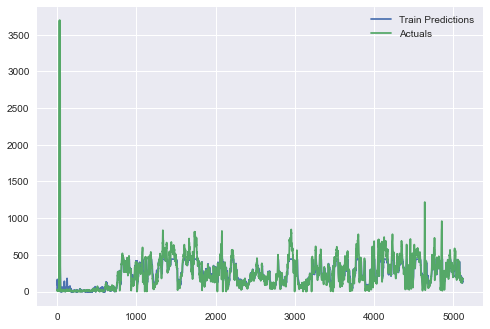

In [24]:
model = load_model('3H_Forecast/3H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(3,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

### 4 hours forecast

In [25]:
%%time

Trainer(4,6,12)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 10ms/step - loss: 111335.9062 - mean_absolute_error: 248.5871 - val_loss: 150433.4219 - val_mean_absolute_error: 333.8028
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 7ms/step - loss: 109862.9453 - mean_absolute_error: 245.9532 - val_loss: 147785.1406 - val_mean_absolute_error: 329.6610
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 7ms/step - loss: 107668.1641 - mean_absolute_error: 241.7352 - val_loss: 144548.2344 - val_mean_absolute_error: 324.7377
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 7ms/step - loss: 105146.6875 - mean_absolute_error: 236.8875 - val_loss: 140982.2344 - val_mean_absolute_error: 319.1893
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 102548.6484 - mean_absolute_error: 232.2318 - val_loss: 137037.0469 - val_mean_absolute_error: 313.2811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 7ms/step - loss: 99648.1719 - mean_absolute_error: 227.2300 - val_loss: 133550.6094 - val_mean_absolute_error: 307.7770
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 7ms/step - loss: 97203.7109 - mean_absolute_error: 222.8065 - val_loss: 130017.0469 - val_mean_absolute_error: 302.0474
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 94762.6953 - mean_absolute_error: 218.5106 - val_loss: 126694.3984 - val_mean_absolute_error: 296.4988
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 92437.4766 - mean_absolute_error: 214.3877 - val_loss: 123642.1719 - val_mean_absolute_error: 291.4331
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 7ms/step - loss: 90340.9844 - mean_absolute_error: 210.6763 - val_loss: 120735.9453 - val_mean_absolute_error: 286.4992
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 88307.3672 - mean_absolute_error: 206.9482 - val_loss: 117888.4297 - val_mean_absolute_error: 281.6305
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 7ms/step - loss: 86281.3281 - mean_absolute_error: 203.2139 - val_loss: 115025.4141 - val_mean_absolute_error: 276.7185
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 7ms/step - loss: 84267.7891 - mean_absolute_error: 199.6856 - val_loss: 112183.4297 - val_mean_absolute_error: 271.8252
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 82303.7188 - mean_absolute_error: 196.2520 - val_loss: 109360.3750 - val_mean_absolute_error: 266.9256
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 7ms/step - loss: 80335.2109 - mean_absolute_error: 192.5515 - val_loss: 106554.2031 - val_mean_absolute_error: 262.0722
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 7ms/step - loss: 78366.9609 - mean_absolute_error: 188.9307 - val_loss: 103742.8203 - val_mean_absolute_error: 257.2387
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 7ms/step - loss: 76479.1094 - mean_absolute_error: 184.9798 - val_loss: 100953.0469 - val_mean_absolute_error: 252.4505
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 7ms/step - loss: 74496.3125 - mean_absolute_error: 181.9786 - val_loss: 98045.5625 - val_mean_absolute_error: 247.5909
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 72495.2031 - mean_absolute_error: 178.3756 - val_loss: 95052.3359 - val_mean_absolute_error: 242.5441
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 70361.5938 - mean_absolute_error: 174.1949 - val_loss: 91921.1172 - val_mean_absolute_error: 237.2759
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 7ms/step - loss: 68352.7734 - mean_absolute_error: 169.9527 - val_loss: 89072.8281 - val_mean_absolute_error: 232.4713
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 7ms/step - loss: 66449.2734 - mean_absolute_error: 166.8108 - val_loss: 86298.0078 - val_mean_absolute_error: 227.7317
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 7ms/step - loss: 64281.4258 - mean_absolute_error: 162.5839 - val_loss: 82936.1094 - val_mean_absolute_error: 221.9481
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 7ms/step - loss: 62358.4922 - mean_absolute_error: 158.7340 - val_loss: 80212.3672 - val_mean_absolute_error: 217.0803
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 7ms/step - loss: 60569.6523 - mean_absolute_error: 155.3446 - val_loss: 77532.0625 - val_mean_absolute_error: 212.3077
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 7ms/step - loss: 58590.5000 - mean_absolute_error: 151.3482 - val_loss: 74436.3359 - val_mean_absolute_error: 206.7113
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 56842.9102 - mean_absolute_error: 147.5417 - val_loss: 71857.3281 - val_mean_absolute_error: 202.0782
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 55186.2188 - mean_absolute_error: 144.3013 - val_loss: 69358.8906 - val_mean_absolute_error: 197.4417
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 53580.5078 - mean_absolute_error: 141.0084 - val_loss: 66931.8672 - val_mean_absolute_error: 193.0482
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 52043.8594 - mean_absolute_error: 137.8707 - val_loss: 64549.3086 - val_mean_absolute_error: 188.7379
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 7ms/step - loss: 50535.4414 - mean_absolute_error: 134.6842 - val_loss: 62266.6172 - val_mean_absolute_error: 184.5071
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 7ms/step - loss: 49195.5391 - mean_absolute_error: 130.9179 - val_loss: 60025.3945 - val_mean_absolute_error: 180.4559
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 7ms/step - loss: 47807.0195 - mean_absolute_error: 129.3555 - val_loss: 57888.7617 - val_mean_absolute_error: 176.5143
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 46461.5078 - mean_absolute_error: 125.7119 - val_loss: 55794.5156 - val_mean_absolute_error: 172.9171
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 45154.8633 - mean_absolute_error: 123.1654 - val_loss: 53748.3281 - val_mean_absolute_error: 169.2705
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 7ms/step - loss: 43932.4883 - mean_absolute_error: 120.2265 - val_loss: 51812.1797 - val_mean_absolute_error: 165.7859
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 42727.7070 - mean_absolute_error: 117.7286 - val_loss: 49904.3906 - val_mean_absolute_error: 162.3394
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 41597.5820 - mean_absolute_error: 115.3052 - val_loss: 48049.4570 - val_mean_absolute_error: 158.8484
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 7ms/step - loss: 40494.3711 - mean_absolute_error: 112.9925 - val_loss: 46134.5898 - val_mean_absolute_error: 155.8425
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 39350.8398 - mean_absolute_error: 110.6735 - val_loss: 44254.1680 - val_mean_absolute_error: 152.0593
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 38270.6094 - mean_absolute_error: 108.4029 - val_loss: 42528.2148 - val_mean_absolute_error: 149.0415
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 7ms/step - loss: 37322.8203 - mean_absolute_error: 106.0469 - val_loss: 41003.2305 - val_mean_absolute_error: 145.8134
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 7ms/step - loss: 36408.3906 - mean_absolute_error: 104.4012 - val_loss: 39416.7969 - val_mean_absolute_error: 142.8187
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 7ms/step - loss: 35598.2617 - mean_absolute_error: 101.8047 - val_loss: 37892.6367 - val_mean_absolute_error: 140.0877
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 34764.0273 - mean_absolute_error: 101.1211 - val_loss: 36488.2031 - val_mean_absolute_error: 137.1044
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 7ms/step - loss: 33945.5859 - mean_absolute_error: 98.6427 - val_loss: 35189.2891 - val_mean_absolute_error: 134.3081
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 33205.0430 - mean_absolute_error: 96.9147 - val_loss: 33780.4258 - val_mean_absolute_error: 131.6087
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 32512.1680 - mean_absolute_error: 95.5047 - val_loss: 32587.6328 - val_mean_absolute_error: 128.8870
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 8ms/step - loss: 31858.5078 - mean_absolute_error: 93.7053 - val_loss: 31425.8516 - val_mean_absolute_error: 126.6581
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 7ms/step - loss: 31213.0195 - mean_absolute_error: 92.6080 - val_loss: 30373.7402 - val_mean_absolute_error: 124.0715
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 7ms/step - loss: 30631.6250 - mean_absolute_error: 91.0200 - val_loss: 29392.2344 - val_mean_absolute_error: 121.7730
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 7ms/step - loss: 30071.5664 - mean_absolute_error: 89.8419 - val_loss: 28234.7988 - val_mean_absolute_error: 119.3919
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 7ms/step - loss: 29514.6211 - mean_absolute_error: 88.8733 - val_loss: 27529.9062 - val_mean_absolute_error: 117.8981
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 7ms/step - loss: 29087.6504 - mean_absolute_error: 87.5886 - val_loss: 26405.6895 - val_mean_absolute_error: 115.1107
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 7ms/step - loss: 28571.8730 - mean_absolute_error: 86.1181 - val_loss: 25648.4707 - val_mean_absolute_error: 113.2398
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 7ms/step - loss: 28125.1387 - mean_absolute_error: 84.9029 - val_loss: 24880.5273 - val_mean_absolute_error: 111.4402
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 27666.3965 - mean_absolute_error: 83.7637 - val_loss: 24125.5977 - val_mean_absolute_error: 109.3242
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 27218.0312 - mean_absolute_error: 82.1977 - val_loss: 23173.0566 - val_mean_absolute_error: 106.9092
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 7ms/step - loss: 26778.3809 - mean_absolute_error: 81.4607 - val_loss: 22650.3047 - val_mean_absolute_error: 105.1863
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 7ms/step - loss: 26462.2168 - mean_absolute_error: 80.0959 - val_loss: 21754.1562 - val_mean_absolute_error: 103.0754
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 7ms/step - loss: 26100.8613 - mean_absolute_error: 79.7036 - val_loss: 21180.7852 - val_mean_absolute_error: 101.6975
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 7ms/step - loss: 25764.6328 - mean_absolute_error: 78.6323 - val_loss: 20480.6152 - val_mean_absolute_error: 99.9706
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 7ms/step - loss: 25448.8594 - mean_absolute_error: 77.8412 - val_loss: 19874.2715 - val_mean_absolute_error: 98.3649
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 7ms/step - loss: 25172.1680 - mean_absolute_error: 77.0597 - val_loss: 19357.1719 - val_mean_absolute_error: 97.0018
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 8ms/step - loss: 24927.6172 - mean_absolute_error: 75.9048 - val_loss: 18676.7090 - val_mean_absolute_error: 95.3496
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 24695.4668 - mean_absolute_error: 76.1071 - val_loss: 18624.2422 - val_mean_absolute_error: 95.4740
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 7ms/step - loss: 24466.7090 - mean_absolute_error: 75.0517 - val_loss: 18165.6406 - val_mean_absolute_error: 94.2959
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 24255.6289 - mean_absolute_error: 74.7504 - val_loss: 17689.6133 - val_mean_absolute_error: 92.9909
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 24046.9883 - mean_absolute_error: 74.0206 - val_loss: 17424.1035 - val_mean_absolute_error: 92.4543
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 23867.2500 - mean_absolute_error: 73.3236 - val_loss: 16965.5859 - val_mean_absolute_error: 91.0229
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 23671.6836 - mean_absolute_error: 72.9808 - val_loss: 16790.1836 - val_mean_absolute_error: 90.6170
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 7ms/step - loss: 23484.4922 - mean_absolute_error: 72.3675 - val_loss: 16450.6191 - val_mean_absolute_error: 89.6354
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 7ms/step - loss: 23443.8320 - mean_absolute_error: 72.2255 - val_loss: 15893.4238 - val_mean_absolute_error: 87.9635
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 7ms/step - loss: 23219.7461 - mean_absolute_error: 71.5246 - val_loss: 15732.8887 - val_mean_absolute_error: 87.7868
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 7ms/step - loss: 23076.6953 - mean_absolute_error: 70.9132 - val_loss: 15478.9131 - val_mean_absolute_error: 86.9524
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 7ms/step - loss: 22943.9727 - mean_absolute_error: 70.4636 - val_loss: 15127.4609 - val_mean_absolute_error: 85.7770
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 8ms/step - loss: 22802.8320 - mean_absolute_error: 69.9875 - val_loss: 14902.3779 - val_mean_absolute_error: 84.9965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 7ms/step - loss: 22707.9805 - mean_absolute_error: 69.5174 - val_loss: 14609.8848 - val_mean_absolute_error: 84.1914
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 7ms/step - loss: 22580.2539 - mean_absolute_error: 68.9990 - val_loss: 14702.0898 - val_mean_absolute_error: 84.7236
Epoch 80/100
161/161 [==============================] - 1s 7ms/step - loss: 22448.1641 - mean_absolute_error: 68.8574 - val_loss: 14294.8018 - val_mean_absolute_error: 83.1199
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 7ms/step - loss: 22411.3496 - mean_absolute_error: 68.7125 - val_loss: 14151.2246 - val_mean_absolute_error: 82.7451
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 7ms/step - loss: 22261.4004 - mean_absolute_error: 67.7977 - val_loss: 13936.5020 - val_mean_absolute_error: 82.3348
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 7ms/step - loss: 22175.5020 - mean_absolute_error: 67.7119 - val_loss: 13595.1631 - val_mean_absolute_error: 81.2855
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 7ms/step - loss: 22085.3555 - mean_absolute_error: 67.6738 - val_loss: 13606.1514 - val_mean_absolute_error: 81.2502
Epoch 85/100
161/161 [==============================] - 1s 7ms/step - loss: 22049.3926 - mean_absolute_error: 67.1660 - val_loss: 13313.8008 - val_mean_absolute_error: 80.3076
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 7ms/step - loss: 22047.2266 - mean_absolute_error: 67.4606 - val_loss: 13401.4365 - val_mean_absolute_error: 80.4053
Epoch 87/100
161/161 [==============================] - 1s 7ms/step - loss: 21872.5488 - mean_absolute_error: 66.7109 - val_loss: 13181.8164 - val_mean_absolute_error: 79.6255
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 21831.0137 - mean_absolute_error: 66.5174 - val_loss: 13243.1826 - val_mean_absolute_error: 79.8617
Epoch 89/100
161/161 [==============================] - 1s 7ms/step - loss: 21744.6504 - mean_absolute_error: 66.2447 - val_loss: 13481.8516 - val_mean_absolute_error: 80.6998
Epoch 90/100
161/161 [==============================] - 1s 7ms/step - loss: 21686.9629 - mean_absolute_error: 65.9672 - val_loss: 12938.0010 - val_mean_absolute_error: 78.9398
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 7ms/step - loss: 21584.0137 - mean_absolute_error: 65.7153 - val_loss: 13052.4297 - val_mean_absolute_error: 79.1575
Epoch 92/100
161/161 [==============================] - 1s 7ms/step - loss: 21564.1309 - mean_absolute_error: 65.6799 - val_loss: 13003.0098 - val_mean_absolute_error: 79.0763
Epoch 93/100
161/161 [==============================] - 1s 7ms/step - loss: 21494.3984 - mean_absolute_error: 65.3933 - val_loss: 12805.4873 - val_mean_absolute_error: 78.3507
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 21423.9258 - mean_absolute_error: 64.9875 - val_loss: 12600.4648 - val_mean_absolute_error: 77.4463
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 7ms/step - loss: 21338.0566 - mean_absolute_error: 64.5936 - val_loss: 12567.4082 - val_mean_absolute_error: 77.2697
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 7ms/step - loss: 21301.4082 - mean_absolute_error: 64.5308 - val_loss: 12457.3271 - val_mean_absolute_error: 77.1107
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 7ms/step - loss: 21234.9844 - mean_absolute_error: 64.4598 - val_loss: 12158.9062 - val_mean_absolute_error: 75.9520
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 21206.6289 - mean_absolute_error: 64.3653 - val_loss: 12219.2803 - val_mean_absolute_error: 76.3010
Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 21106.6621 - mean_absolute_error: 63.9127 - val_loss: 12431.8809 - val_mean_absolute_error: 77.0827
Epoch 100/100
161/161 [==============================] - 1s 7ms/step - loss: 21075.7227 - mean_absolute_error: 63.8918 - val_loss: 12144.2891 - val_mean_absolute_error: 75.8146
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 11ms/step - loss: 111672.2500 - mean_absolute_error: 249.2629 - val_loss: 151072.4688 - val_mean_absolute_error: 334.6336
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110789.1719 - mean_absolute_error: 247.4409 - val_loss: 149709.0625 - val_mean_absolute_error: 332.5288
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 8ms/step - loss: 109473.7188 - mean_absolute_error: 245.0237 - val_loss: 147735.0625 - val_mean_absolute_error: 329.6070
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 8ms/step - loss: 107776.3359 - mean_absolute_error: 241.8280 - val_loss: 144976.2812 - val_mean_absolute_error: 325.2826
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 105386.0078 - mean_absolute_error: 237.3217 - val_loss: 141512.5156 - val_mean_absolute_error: 320.0903
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 9ms/step - loss: 102857.7969 - mean_absolute_error: 232.8754 - val_loss: 138064.8125 - val_mean_absolute_error: 314.8333
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 100623.1953 - mean_absolute_error: 228.9501 - val_loss: 135163.2500 - val_mean_absolute_error: 310.3013
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 98558.7656 - mean_absolute_error: 225.3062 - val_loss: 132518.4062 - val_mean_absolute_error: 305.9778
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 96790.6016 - mean_absolute_error: 222.2482 - val_loss: 130189.0938 - val_mean_absolute_error: 302.1910
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 8ms/step - loss: 95130.0156 - mean_absolute_error: 219.2449 - val_loss: 127905.9453 - val_mean_absolute_error: 298.4429
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 8ms/step - loss: 93438.8906 - mean_absolute_error: 216.4123 - val_loss: 125424.4297 - val_mean_absolute_error: 294.3220
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 91701.8828 - mean_absolute_error: 213.2936 - val_loss: 123070.1641 - val_mean_absolute_error: 290.3478
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 89998.3359 - mean_absolute_error: 210.3304 - val_loss: 120611.5156 - val_mean_absolute_error: 286.1798
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 88233.2578 - mean_absolute_error: 207.2086 - val_loss: 118175.7031 - val_mean_absolute_error: 281.9932
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 8ms/step - loss: 86491.5547 - mean_absolute_error: 204.0509 - val_loss: 115645.0938 - val_mean_absolute_error: 277.6537
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 8ms/step - loss: 84545.1250 - mean_absolute_error: 200.6029 - val_loss: 112846.9062 - val_mean_absolute_error: 272.8555
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 8ms/step - loss: 82734.6719 - mean_absolute_error: 197.7294 - val_loss: 110331.1875 - val_mean_absolute_error: 268.4993
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 80988.4609 - mean_absolute_error: 194.3189 - val_loss: 107859.7031 - val_mean_absolute_error: 264.2201
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 79284.2109 - mean_absolute_error: 191.4482 - val_loss: 105451.7656 - val_mean_absolute_error: 260.0763
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 8ms/step - loss: 77590.1172 - mean_absolute_error: 188.1759 - val_loss: 102868.5781 - val_mean_absolute_error: 255.6122
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 8ms/step - loss: 75862.5781 - mean_absolute_error: 185.1529 - val_loss: 100474.3438 - val_mean_absolute_error: 251.5458
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 8ms/step - loss: 74212.8828 - mean_absolute_error: 182.2927 - val_loss: 98079.1641 - val_mean_absolute_error: 247.5255
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 72579.6484 - mean_absolute_error: 178.9274 - val_loss: 95718.0703 - val_mean_absolute_error: 243.5730
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 70961.8672 - mean_absolute_error: 175.7548 - val_loss: 93334.3047 - val_mean_absolute_error: 239.6186
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 69383.5703 - mean_absolute_error: 172.8321 - val_loss: 91019.3828 - val_mean_absolute_error: 235.6934
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 67801.0469 - mean_absolute_error: 170.2534 - val_loss: 88721.2344 - val_mean_absolute_error: 231.8680
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 9ms/step - loss: 66266.7734 - mean_absolute_error: 166.9452 - val_loss: 86424.8281 - val_mean_absolute_error: 227.9495
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 8ms/step - loss: 64725.0195 - mean_absolute_error: 163.8248 - val_loss: 84160.0547 - val_mean_absolute_error: 224.1310
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 8ms/step - loss: 63213.9414 - mean_absolute_error: 161.0143 - val_loss: 81928.5000 - val_mean_absolute_error: 220.3286
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 8ms/step - loss: 61743.3711 - mean_absolute_error: 157.6978 - val_loss: 79729.9219 - val_mean_absolute_error: 216.4811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 60313.1016 - mean_absolute_error: 154.7463 - val_loss: 77569.0547 - val_mean_absolute_error: 212.5827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 58877.8008 - mean_absolute_error: 152.0593 - val_loss: 75437.4922 - val_mean_absolute_error: 208.9713
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 57478.8672 - mean_absolute_error: 149.2760 - val_loss: 73280.3125 - val_mean_absolute_error: 205.0695
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 8ms/step - loss: 56126.9570 - mean_absolute_error: 146.6421 - val_loss: 71205.1094 - val_mean_absolute_error: 201.2488
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 54815.7734 - mean_absolute_error: 144.1248 - val_loss: 69180.3594 - val_mean_absolute_error: 197.6741
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 53499.8242 - mean_absolute_error: 141.3910 - val_loss: 67170.7109 - val_mean_absolute_error: 194.0389
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 52266.3867 - mean_absolute_error: 138.7356 - val_loss: 65225.1797 - val_mean_absolute_error: 190.5866
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 51013.9727 - mean_absolute_error: 136.3324 - val_loss: 63304.3945 - val_mean_absolute_error: 187.1517
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 49819.0273 - mean_absolute_error: 133.5752 - val_loss: 61404.4688 - val_mean_absolute_error: 183.6428
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 48650.9688 - mean_absolute_error: 130.2914 - val_loss: 59502.9883 - val_mean_absolute_error: 179.9728
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 9ms/step - loss: 47417.8242 - mean_absolute_error: 128.3825 - val_loss: 57294.7148 - val_mean_absolute_error: 176.1118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 46113.8828 - mean_absolute_error: 125.3287 - val_loss: 55370.9922 - val_mean_absolute_error: 172.6169
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 44999.7383 - mean_absolute_error: 122.9054 - val_loss: 53609.4180 - val_mean_absolute_error: 169.1824
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 43902.8516 - mean_absolute_error: 120.4842 - val_loss: 51926.9727 - val_mean_absolute_error: 166.3019
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 7ms/step - loss: 42962.1328 - mean_absolute_error: 119.1353 - val_loss: 50297.1562 - val_mean_absolute_error: 163.3893
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 8ms/step - loss: 41955.0000 - mean_absolute_error: 116.4004 - val_loss: 48710.0195 - val_mean_absolute_error: 160.5926
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 40975.5391 - mean_absolute_error: 114.4254 - val_loss: 47090.8281 - val_mean_absolute_error: 157.7188
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 40038.6406 - mean_absolute_error: 112.3934 - val_loss: 45510.6211 - val_mean_absolute_error: 154.7381
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 8ms/step - loss: 39117.4258 - mean_absolute_error: 110.2485 - val_loss: 44009.1328 - val_mean_absolute_error: 151.9255
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 38252.3516 - mean_absolute_error: 108.3486 - val_loss: 42557.1367 - val_mean_absolute_error: 149.1118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 37426.1289 - mean_absolute_error: 106.4827 - val_loss: 41166.3906 - val_mean_absolute_error: 146.6967
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 36669.3008 - mean_absolute_error: 105.0646 - val_loss: 39830.3945 - val_mean_absolute_error: 143.8203
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 35914.4023 - mean_absolute_error: 102.8108 - val_loss: 38512.2891 - val_mean_absolute_error: 140.9703
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 35153.9844 - mean_absolute_error: 100.7929 - val_loss: 37231.6250 - val_mean_absolute_error: 138.3964
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 34468.7734 - mean_absolute_error: 99.6223 - val_loss: 36019.3906 - val_mean_absolute_error: 135.8152
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 9ms/step - loss: 33818.3242 - mean_absolute_error: 98.1373 - val_loss: 34909.3008 - val_mean_absolute_error: 133.4847
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 8ms/step - loss: 33159.7656 - mean_absolute_error: 96.3218 - val_loss: 33694.1484 - val_mean_absolute_error: 130.8986
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 32499.2402 - mean_absolute_error: 94.6180 - val_loss: 32631.2676 - val_mean_absolute_error: 128.5404
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 31855.5508 - mean_absolute_error: 93.2187 - val_loss: 31551.1543 - val_mean_absolute_error: 125.9287
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 31260.3535 - mean_absolute_error: 91.6630 - val_loss: 30474.1543 - val_mean_absolute_error: 123.4087
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 30731.5391 - mean_absolute_error: 90.9145 - val_loss: 29374.3887 - val_mean_absolute_error: 120.9965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 30150.8457 - mean_absolute_error: 89.0322 - val_loss: 28505.8477 - val_mean_absolute_error: 118.8766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 29611.7422 - mean_absolute_error: 87.8551 - val_loss: 27376.1621 - val_mean_absolute_error: 116.2281
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 29065.0195 - mean_absolute_error: 86.4846 - val_loss: 26396.0234 - val_mean_absolute_error: 113.7594
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 8ms/step - loss: 28612.8457 - mean_absolute_error: 85.1399 - val_loss: 25644.6211 - val_mean_absolute_error: 112.2206
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 28212.6875 - mean_absolute_error: 84.4912 - val_loss: 24764.8750 - val_mean_absolute_error: 110.1485
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 27760.3633 - mean_absolute_error: 83.4545 - val_loss: 24077.1211 - val_mean_absolute_error: 108.3265
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 27340.3359 - mean_absolute_error: 82.0587 - val_loss: 23265.7637 - val_mean_absolute_error: 106.2495
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 26981.4121 - mean_absolute_error: 81.0478 - val_loss: 22570.0352 - val_mean_absolute_error: 104.6367
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 26613.0898 - mean_absolute_error: 80.6049 - val_loss: 21836.1172 - val_mean_absolute_error: 102.7712
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 26309.0078 - mean_absolute_error: 79.7935 - val_loss: 21170.7539 - val_mean_absolute_error: 101.1480
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 25937.0020 - mean_absolute_error: 78.5904 - val_loss: 20649.4824 - val_mean_absolute_error: 99.9110
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 25676.8770 - mean_absolute_error: 77.8932 - val_loss: 20271.0215 - val_mean_absolute_error: 99.2284
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 25400.9395 - mean_absolute_error: 77.4917 - val_loss: 19604.4844 - val_mean_absolute_error: 97.0695
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 8ms/step - loss: 25086.8965 - mean_absolute_error: 76.3307 - val_loss: 19099.6680 - val_mean_absolute_error: 95.8285
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 8ms/step - loss: 24920.7656 - mean_absolute_error: 76.0399 - val_loss: 18683.2500 - val_mean_absolute_error: 94.7447
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 8ms/step - loss: 24657.0664 - mean_absolute_error: 75.1412 - val_loss: 18218.0859 - val_mean_absolute_error: 93.5588
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 24388.2207 - mean_absolute_error: 74.2056 - val_loss: 18201.9551 - val_mean_absolute_error: 93.8042
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 24161.3691 - mean_absolute_error: 73.7397 - val_loss: 17751.2500 - val_mean_absolute_error: 92.5388
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 23943.4961 - mean_absolute_error: 72.8803 - val_loss: 17401.0156 - val_mean_absolute_error: 91.6807
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 23748.7324 - mean_absolute_error: 72.5508 - val_loss: 16914.3926 - val_mean_absolute_error: 90.1800
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 23613.3535 - mean_absolute_error: 72.2565 - val_loss: 16755.7402 - val_mean_absolute_error: 89.8327
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 23433.5898 - mean_absolute_error: 71.5197 - val_loss: 16690.1445 - val_mean_absolute_error: 90.0518
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 23274.2129 - mean_absolute_error: 70.8729 - val_loss: 15770.0195 - val_mean_absolute_error: 86.8338
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 23068.8281 - mean_absolute_error: 70.6011 - val_loss: 15668.6709 - val_mean_absolute_error: 86.3375
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 22919.4062 - mean_absolute_error: 69.7015 - val_loss: 15331.1963 - val_mean_absolute_error: 85.8849
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 8ms/step - loss: 22808.6699 - mean_absolute_error: 69.6442 - val_loss: 15075.7471 - val_mean_absolute_error: 84.9064
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 22654.1816 - mean_absolute_error: 69.1978 - val_loss: 14918.0488 - val_mean_absolute_error: 84.4896
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 22655.1855 - mean_absolute_error: 69.3083 - val_loss: 14703.6553 - val_mean_absolute_error: 83.8296
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 22436.3672 - mean_absolute_error: 68.1187 - val_loss: 14239.2100 - val_mean_absolute_error: 82.4533
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 8ms/step - loss: 22332.5547 - mean_absolute_error: 68.3321 - val_loss: 14039.8301 - val_mean_absolute_error: 81.7592
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 22292.9922 - mean_absolute_error: 68.0614 - val_loss: 14063.5625 - val_mean_absolute_error: 81.8951
Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 22128.5488 - mean_absolute_error: 67.2496 - val_loss: 14091.7568 - val_mean_absolute_error: 81.6462
Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 22064.9121 - mean_absolute_error: 66.9898 - val_loss: 13523.5342 - val_mean_absolute_error: 80.1289
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 21962.6426 - mean_absolute_error: 66.8875 - val_loss: 13381.8701 - val_mean_absolute_error: 79.6237
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 8ms/step - loss: 21855.0312 - mean_absolute_error: 66.1122 - val_loss: 13234.5449 - val_mean_absolute_error: 79.2658
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 21837.9277 - mean_absolute_error: 66.5854 - val_loss: 13117.2861 - val_mean_absolute_error: 78.7135
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 9ms/step - loss: 21756.1250 - mean_absolute_error: 66.0814 - val_loss: 12966.0000 - val_mean_absolute_error: 78.1743
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 21651.2578 - mean_absolute_error: 65.6836 - val_loss: 12899.9688 - val_mean_absolute_error: 78.1419
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 21669.5117 - mean_absolute_error: 66.3654 - val_loss: 12760.2422 - val_mean_absolute_error: 77.4151
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 6s 14ms/step - loss: 111296.0000 - mean_absolute_error: 248.7858 - val_loss: 150783.1406 - val_mean_absolute_error: 334.4564
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 9ms/step - loss: 110784.1094 - mean_absolute_error: 247.8499 - val_loss: 149891.6719 - val_mean_absolute_error: 333.1800
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 10ms/step - loss: 109965.1719 - mean_absolute_error: 246.3409 - val_loss: 148612.7188 - val_mean_absolute_error: 331.2055
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 108974.6250 - mean_absolute_error: 244.3873 - val_loss: 147216.0781 - val_mean_absolute_error: 328.9826
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 8ms/step - loss: 107568.1250 - mean_absolute_error: 241.5825 - val_loss: 144899.7656 - val_mean_absolute_error: 325.4624
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 9ms/step - loss: 106017.8203 - mean_absolute_error: 238.6498 - val_loss: 142796.0156 - val_mean_absolute_error: 322.2215
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 8ms/step - loss: 104421.3359 - mean_absolute_error: 235.7211 - val_loss: 140734.1406 - val_mean_absolute_error: 319.0482
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 8ms/step - loss: 102970.6875 - mean_absolute_error: 233.1545 - val_loss: 138786.2188 - val_mean_absolute_error: 315.9797
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 101525.8984 - mean_absolute_error: 230.5922 - val_loss: 136797.6875 - val_mean_absolute_error: 312.8609
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 9ms/step - loss: 99974.1719 - mean_absolute_error: 227.9189 - val_loss: 134428.5469 - val_mean_absolute_error: 309.0570
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 8ms/step - loss: 98282.8125 - mean_absolute_error: 224.9677 - val_loss: 132234.8281 - val_mean_absolute_error: 305.5710
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 96759.3750 - mean_absolute_error: 222.2740 - val_loss: 130136.0547 - val_mean_absolute_error: 302.1666
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 8ms/step - loss: 95240.1953 - mean_absolute_error: 219.5844 - val_loss: 127993.8203 - val_mean_absolute_error: 298.6585
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 8ms/step - loss: 93696.6719 - mean_absolute_error: 216.9350 - val_loss: 125837.2500 - val_mean_absolute_error: 295.0868
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 92152.2969 - mean_absolute_error: 214.1550 - val_loss: 123661.1328 - val_mean_absolute_error: 291.4426
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 90586.7422 - mean_absolute_error: 211.4035 - val_loss: 121443.5547 - val_mean_absolute_error: 287.6898
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 89011.9922 - mean_absolute_error: 208.6322 - val_loss: 119215.4531 - val_mean_absolute_error: 283.8897
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 87453.7891 - mean_absolute_error: 205.6945 - val_loss: 116977.3750 - val_mean_absolute_error: 280.0582
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 85838.6562 - mean_absolute_error: 203.1332 - val_loss: 114681.9141 - val_mean_absolute_error: 276.1183
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 84178.3203 - mean_absolute_error: 199.7945 - val_loss: 112241.7422 - val_mean_absolute_error: 271.9190
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 9ms/step - loss: 82488.0000 - mean_absolute_error: 196.8002 - val_loss: 109777.1328 - val_mean_absolute_error: 267.6451
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 80773.2578 - mean_absolute_error: 193.8307 - val_loss: 107361.9141 - val_mean_absolute_error: 263.4597
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 79091.1797 - mean_absolute_error: 190.6441 - val_loss: 104880.4219 - val_mean_absolute_error: 259.1866
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 77404.8594 - mean_absolute_error: 187.8620 - val_loss: 102482.2812 - val_mean_absolute_error: 255.0707
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 75758.2109 - mean_absolute_error: 184.6208 - val_loss: 100115.3828 - val_mean_absolute_error: 251.0283
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 74134.7656 - mean_absolute_error: 181.6259 - val_loss: 97748.9766 - val_mean_absolute_error: 247.0498
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 8ms/step - loss: 72499.1875 - mean_absolute_error: 178.6415 - val_loss: 95404.4453 - val_mean_absolute_error: 243.0987
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 70947.9844 - mean_absolute_error: 175.5265 - val_loss: 93026.9609 - val_mean_absolute_error: 239.0960
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 69273.9375 - mean_absolute_error: 172.1224 - val_loss: 90566.1484 - val_mean_absolute_error: 235.0135
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 8ms/step - loss: 67664.7422 - mean_absolute_error: 169.6192 - val_loss: 88221.8828 - val_mean_absolute_error: 231.0345
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 9ms/step - loss: 66097.2344 - mean_absolute_error: 166.4430 - val_loss: 85906.2969 - val_mean_absolute_error: 227.1470
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 10ms/step - loss: 64523.7305 - mean_absolute_error: 163.5477 - val_loss: 83612.7734 - val_mean_absolute_error: 223.1608
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 63006.7266 - mean_absolute_error: 160.4356 - val_loss: 81308.4766 - val_mean_absolute_error: 219.1768
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 61476.0117 - mean_absolute_error: 157.2869 - val_loss: 79062.4141 - val_mean_absolute_error: 215.1911
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 8ms/step - loss: 60034.7422 - mean_absolute_error: 154.4309 - val_loss: 76879.8438 - val_mean_absolute_error: 211.3098
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 58479.8398 - mean_absolute_error: 151.6006 - val_loss: 74451.8984 - val_mean_absolute_error: 206.8713
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 56996.7852 - mean_absolute_error: 148.4193 - val_loss: 72265.4531 - val_mean_absolute_error: 202.9506
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 55594.8359 - mean_absolute_error: 145.4882 - val_loss: 70128.9062 - val_mean_absolute_error: 199.1709
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 8ms/step - loss: 54242.4688 - mean_absolute_error: 142.8702 - val_loss: 68062.4609 - val_mean_absolute_error: 195.3780
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 8ms/step - loss: 52940.1406 - mean_absolute_error: 140.0941 - val_loss: 66045.4375 - val_mean_absolute_error: 191.5970
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 51649.0156 - mean_absolute_error: 137.5027 - val_loss: 64071.9062 - val_mean_absolute_error: 188.0374
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 50426.5430 - mean_absolute_error: 134.7525 - val_loss: 62113.9844 - val_mean_absolute_error: 184.6423
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 49176.7344 - mean_absolute_error: 132.2064 - val_loss: 60189.6367 - val_mean_absolute_error: 181.0381
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 9ms/step - loss: 47994.0117 - mean_absolute_error: 129.3767 - val_loss: 58296.9531 - val_mean_absolute_error: 177.7842
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 10ms/step - loss: 46808.9375 - mean_absolute_error: 126.7506 - val_loss: 56459.2344 - val_mean_absolute_error: 174.0714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 45729.8711 - mean_absolute_error: 123.9607 - val_loss: 54697.5938 - val_mean_absolute_error: 171.1286
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 44658.5117 - mean_absolute_error: 122.2102 - val_loss: 53000.8672 - val_mean_absolute_error: 168.2664
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 43596.5469 - mean_absolute_error: 120.0036 - val_loss: 51345.8438 - val_mean_absolute_error: 164.6776
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 42570.0000 - mean_absolute_error: 117.1694 - val_loss: 49653.6719 - val_mean_absolute_error: 161.7034
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 41578.4688 - mean_absolute_error: 115.2713 - val_loss: 48010.4688 - val_mean_absolute_error: 159.4085
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 40674.5039 - mean_absolute_error: 113.4986 - val_loss: 46575.2812 - val_mean_absolute_error: 156.0365
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 39766.9375 - mean_absolute_error: 111.3662 - val_loss: 44982.9766 - val_mean_absolute_error: 153.5608
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 38858.6602 - mean_absolute_error: 109.3185 - val_loss: 43589.1797 - val_mean_absolute_error: 150.3785
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 38029.0547 - mean_absolute_error: 107.3765 - val_loss: 42121.1289 - val_mean_absolute_error: 147.8619
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 8ms/step - loss: 37214.3359 - mean_absolute_error: 105.6647 - val_loss: 40755.3164 - val_mean_absolute_error: 145.2610
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 10ms/step - loss: 36482.8633 - mean_absolute_error: 103.8607 - val_loss: 39420.8516 - val_mean_absolute_error: 142.7196
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 35735.4961 - mean_absolute_error: 102.5011 - val_loss: 38203.5859 - val_mean_absolute_error: 140.3346
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 35013.4570 - mean_absolute_error: 101.0814 - val_loss: 37005.1328 - val_mean_absolute_error: 137.9975
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 34349.1914 - mean_absolute_error: 99.4732 - val_loss: 35764.2148 - val_mean_absolute_error: 135.4829
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 8ms/step - loss: 33662.2500 - mean_absolute_error: 97.2279 - val_loss: 34522.2422 - val_mean_absolute_error: 132.8471
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 33031.3320 - mean_absolute_error: 96.5246 - val_loss: 33530.4766 - val_mean_absolute_error: 130.7228
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 32503.9648 - mean_absolute_error: 95.2149 - val_loss: 32387.8496 - val_mean_absolute_error: 128.3753
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 31934.0527 - mean_absolute_error: 93.8654 - val_loss: 31360.8086 - val_mean_absolute_error: 126.3937
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 9ms/step - loss: 31366.6797 - mean_absolute_error: 92.3849 - val_loss: 30404.2031 - val_mean_absolute_error: 124.2637
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 9ms/step - loss: 30857.6738 - mean_absolute_error: 91.9032 - val_loss: 29472.1152 - val_mean_absolute_error: 122.2877
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 30407.1484 - mean_absolute_error: 90.0583 - val_loss: 28559.8867 - val_mean_absolute_error: 120.4048
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 9ms/step - loss: 29931.1074 - mean_absolute_error: 89.7627 - val_loss: 27717.2129 - val_mean_absolute_error: 118.4540
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 29456.2461 - mean_absolute_error: 88.2858 - val_loss: 26879.2266 - val_mean_absolute_error: 116.7541
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 28986.9414 - mean_absolute_error: 86.9584 - val_loss: 26041.1504 - val_mean_absolute_error: 114.4509
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 28590.7441 - mean_absolute_error: 86.3233 - val_loss: 25288.1719 - val_mean_absolute_error: 112.5397
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 28212.0273 - mean_absolute_error: 84.6355 - val_loss: 24396.9941 - val_mean_absolute_error: 110.3213
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 10ms/step - loss: 27788.4414 - mean_absolute_error: 83.5786 - val_loss: 23758.1328 - val_mean_absolute_error: 108.7932
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 9ms/step - loss: 27413.4141 - mean_absolute_error: 82.2334 - val_loss: 23039.6758 - val_mean_absolute_error: 107.1599
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 27045.0918 - mean_absolute_error: 81.6860 - val_loss: 22664.1562 - val_mean_absolute_error: 106.0097
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 10ms/step - loss: 26707.4453 - mean_absolute_error: 80.7268 - val_loss: 21971.3086 - val_mean_absolute_error: 104.4467
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 26431.0742 - mean_absolute_error: 79.9967 - val_loss: 21232.3672 - val_mean_absolute_error: 102.4541
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 9ms/step - loss: 26106.6191 - mean_absolute_error: 79.3375 - val_loss: 20668.0039 - val_mean_absolute_error: 101.2040
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 25872.4863 - mean_absolute_error: 78.6615 - val_loss: 20186.1035 - val_mean_absolute_error: 99.7454
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 10ms/step - loss: 25575.1953 - mean_absolute_error: 77.2723 - val_loss: 19595.9551 - val_mean_absolute_error: 98.2359
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 11ms/step - loss: 25308.4727 - mean_absolute_error: 76.7650 - val_loss: 18995.8125 - val_mean_absolute_error: 96.3054
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 9ms/step - loss: 25040.6680 - mean_absolute_error: 76.0867 - val_loss: 18822.5410 - val_mean_absolute_error: 96.1125
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 24825.7676 - mean_absolute_error: 75.3457 - val_loss: 18094.4863 - val_mean_absolute_error: 93.9284
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 24624.0820 - mean_absolute_error: 74.7194 - val_loss: 17758.6035 - val_mean_absolute_error: 93.1192
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 24447.5430 - mean_absolute_error: 74.0756 - val_loss: 17467.3242 - val_mean_absolute_error: 92.4112
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 24230.8047 - mean_absolute_error: 73.5372 - val_loss: 16998.7090 - val_mean_absolute_error: 90.9147
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 24041.6914 - mean_absolute_error: 73.0365 - val_loss: 16678.2656 - val_mean_absolute_error: 90.1620
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 23889.4297 - mean_absolute_error: 72.4616 - val_loss: 16344.8340 - val_mean_absolute_error: 89.2664
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 23771.9336 - mean_absolute_error: 72.0519 - val_loss: 16317.0615 - val_mean_absolute_error: 89.4003
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 10ms/step - loss: 23580.1602 - mean_absolute_error: 71.8252 - val_loss: 16047.2100 - val_mean_absolute_error: 88.7394
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 9ms/step - loss: 23480.8223 - mean_absolute_error: 71.3544 - val_loss: 15667.7021 - val_mean_absolute_error: 87.4746
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 9ms/step - loss: 23339.2598 - mean_absolute_error: 70.5719 - val_loss: 15598.9971 - val_mean_absolute_error: 87.5663
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 23258.9570 - mean_absolute_error: 70.6057 - val_loss: 15259.7969 - val_mean_absolute_error: 86.5846
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 23101.3809 - mean_absolute_error: 70.4849 - val_loss: 14887.6504 - val_mean_absolute_error: 85.0894
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 23005.2344 - mean_absolute_error: 69.5095 - val_loss: 14672.0752 - val_mean_absolute_error: 84.2841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 22865.3027 - mean_absolute_error: 69.2954 - val_loss: 14499.0195 - val_mean_absolute_error: 83.7145
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 22734.3516 - mean_absolute_error: 68.3752 - val_loss: 14188.4863 - val_mean_absolute_error: 82.8852
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 22651.2734 - mean_absolute_error: 68.5249 - val_loss: 14283.0273 - val_mean_absolute_error: 83.5692
Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 22568.4570 - mean_absolute_error: 68.3912 - val_loss: 13929.8418 - val_mean_absolute_error: 82.2065
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 22518.8730 - mean_absolute_error: 67.9547 - val_loss: 13640.6973 - val_mean_absolute_error: 81.0526
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 22388.0723 - mean_absolute_error: 67.7365 - val_loss: 13609.1094 - val_mean_absolute_error: 81.1233
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 4s 13ms/step - loss: 111494.2969 - mean_absolute_error: 249.0497 - val_loss: 150904.9219 - val_mean_absolute_error: 334.5111
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 9ms/step - loss: 110746.7734 - mean_absolute_error: 247.5999 - val_loss: 149682.4219 - val_mean_absolute_error: 332.4812
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 9ms/step - loss: 109098.9922 - mean_absolute_error: 244.5244 - val_loss: 146623.8906 - val_mean_absolute_error: 327.9929
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 10ms/step - loss: 106698.1094 - mean_absolute_error: 240.0025 - val_loss: 143293.2031 - val_mean_absolute_error: 322.9560
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 9ms/step - loss: 104722.2578 - mean_absolute_error: 236.3776 - val_loss: 141067.2500 - val_mean_absolute_error: 319.5922
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 9ms/step - loss: 103221.7422 - mean_absolute_error: 233.7221 - val_loss: 139058.0781 - val_mean_absolute_error: 316.4187
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 9ms/step - loss: 101578.0391 - mean_absolute_error: 230.7700 - val_loss: 136184.1406 - val_mean_absolute_error: 311.8513
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 99512.4297 - mean_absolute_error: 227.1972 - val_loss: 133801.7812 - val_mean_absolute_error: 308.0294
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 9ms/step - loss: 97665.9219 - mean_absolute_error: 223.8839 - val_loss: 130695.8984 - val_mean_absolute_error: 303.0165
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 10ms/step - loss: 95098.8672 - mean_absolute_error: 219.2056 - val_loss: 127335.8203 - val_mean_absolute_error: 297.5412
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 11ms/step - loss: 93063.4766 - mean_absolute_error: 215.6736 - val_loss: 124685.3125 - val_mean_absolute_error: 293.1558
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 91013.8906 - mean_absolute_error: 212.0564 - val_loss: 121695.4219 - val_mean_absolute_error: 288.0930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 89074.4531 - mean_absolute_error: 208.5314 - val_loss: 119101.4688 - val_mean_absolute_error: 283.6530
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 9ms/step - loss: 87175.2422 - mean_absolute_error: 205.1417 - val_loss: 116224.8750 - val_mean_absolute_error: 278.7278
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 9ms/step - loss: 85145.9453 - mean_absolute_error: 201.5122 - val_loss: 113431.9141 - val_mean_absolute_error: 273.9254
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 83155.4297 - mean_absolute_error: 197.8643 - val_loss: 110560.1953 - val_mean_absolute_error: 268.9242
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 81155.4844 - mean_absolute_error: 194.5260 - val_loss: 107685.1172 - val_mean_absolute_error: 263.9934
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 79227.4531 - mean_absolute_error: 190.9141 - val_loss: 104969.3906 - val_mean_absolute_error: 259.3079
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 77272.4844 - mean_absolute_error: 187.2798 - val_loss: 101979.3125 - val_mean_absolute_error: 254.1594
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 75303.7031 - mean_absolute_error: 183.9234 - val_loss: 99284.7344 - val_mean_absolute_error: 249.5783
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 9ms/step - loss: 73475.5469 - mean_absolute_error: 180.5781 - val_loss: 96636.6094 - val_mean_absolute_error: 245.1105
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 71723.6328 - mean_absolute_error: 177.0982 - val_loss: 94058.4922 - val_mean_absolute_error: 240.7747
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 11ms/step - loss: 69969.3672 - mean_absolute_error: 174.2986 - val_loss: 91516.3594 - val_mean_absolute_error: 236.5244
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 10ms/step - loss: 68266.1641 - mean_absolute_error: 170.9183 - val_loss: 88989.4375 - val_mean_absolute_error: 232.2260
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 11ms/step - loss: 66549.5000 - mean_absolute_error: 167.8053 - val_loss: 86470.9531 - val_mean_absolute_error: 228.0002
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 64950.3711 - mean_absolute_error: 163.8657 - val_loss: 84006.0938 - val_mean_absolute_error: 223.7109
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 9ms/step - loss: 63258.8750 - mean_absolute_error: 161.0775 - val_loss: 81584.4062 - val_mean_absolute_error: 219.5214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 61658.2930 - mean_absolute_error: 157.6270 - val_loss: 79178.2891 - val_mean_absolute_error: 215.2223
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 60089.5195 - mean_absolute_error: 154.7282 - val_loss: 76859.2656 - val_mean_absolute_error: 210.9703
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 10ms/step - loss: 58569.3438 - mean_absolute_error: 151.7729 - val_loss: 74531.3672 - val_mean_absolute_error: 206.8176
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 9ms/step - loss: 57118.7695 - mean_absolute_error: 148.8240 - val_loss: 72249.5391 - val_mean_absolute_error: 202.7038
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 9ms/step - loss: 55604.4414 - mean_absolute_error: 145.7810 - val_loss: 70051.4609 - val_mean_absolute_error: 198.5841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 54208.6758 - mean_absolute_error: 142.1067 - val_loss: 67867.1016 - val_mean_absolute_error: 194.3942
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 52813.6172 - mean_absolute_error: 140.0733 - val_loss: 65733.4375 - val_mean_absolute_error: 190.5562
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 51456.7461 - mean_absolute_error: 136.8983 - val_loss: 63651.6836 - val_mean_absolute_error: 186.7355
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 11ms/step - loss: 50142.2070 - mean_absolute_error: 133.8103 - val_loss: 61598.8203 - val_mean_absolute_error: 183.1000
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 2s 11ms/step - loss: 48833.6758 - mean_absolute_error: 130.9592 - val_loss: 59446.1445 - val_mean_absolute_error: 179.3236
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 9ms/step - loss: 47450.3789 - mean_absolute_error: 128.0849 - val_loss: 57326.9883 - val_mean_absolute_error: 175.2669
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 46256.0742 - mean_absolute_error: 125.4913 - val_loss: 55389.1094 - val_mean_absolute_error: 171.9813
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 9ms/step - loss: 45027.4609 - mean_absolute_error: 122.6153 - val_loss: 53523.7695 - val_mean_absolute_error: 168.3058
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 9ms/step - loss: 43871.5469 - mean_absolute_error: 120.1315 - val_loss: 51674.1758 - val_mean_absolute_error: 165.0194
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 42773.8477 - mean_absolute_error: 117.0087 - val_loss: 49885.0586 - val_mean_absolute_error: 161.7142
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 41679.1953 - mean_absolute_error: 114.8628 - val_loss: 48140.1367 - val_mean_absolute_error: 158.4715
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 9ms/step - loss: 40672.1641 - mean_absolute_error: 112.6475 - val_loss: 46507.6055 - val_mean_absolute_error: 155.6680
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 9ms/step - loss: 39705.9062 - mean_absolute_error: 110.3400 - val_loss: 44885.5117 - val_mean_absolute_error: 152.4494
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 38772.2031 - mean_absolute_error: 108.6673 - val_loss: 43343.5312 - val_mean_absolute_error: 149.4261
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 2s 9ms/step - loss: 37879.9375 - mean_absolute_error: 106.5164 - val_loss: 41847.5273 - val_mean_absolute_error: 146.5296
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 37036.7070 - mean_absolute_error: 104.5268 - val_loss: 40404.8711 - val_mean_absolute_error: 143.8593
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 10ms/step - loss: 36219.1328 - mean_absolute_error: 102.7030 - val_loss: 38994.0859 - val_mean_absolute_error: 141.1358
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 35425.4375 - mean_absolute_error: 101.1993 - val_loss: 37682.8711 - val_mean_absolute_error: 138.3910
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 9ms/step - loss: 34655.3398 - mean_absolute_error: 99.1769 - val_loss: 36351.3359 - val_mean_absolute_error: 135.6882
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 2s 10ms/step - loss: 33945.0469 - mean_absolute_error: 97.4618 - val_loss: 35072.8008 - val_mean_absolute_error: 132.9489
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 33230.1562 - mean_absolute_error: 96.0871 - val_loss: 33941.7852 - val_mean_absolute_error: 130.3535
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 32553.8828 - mean_absolute_error: 94.3728 - val_loss: 32656.4102 - val_mean_absolute_error: 127.6307
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 9ms/step - loss: 31976.0430 - mean_absolute_error: 93.0905 - val_loss: 31563.7402 - val_mean_absolute_error: 125.2479
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 10ms/step - loss: 31336.0918 - mean_absolute_error: 91.0051 - val_loss: 30540.2656 - val_mean_absolute_error: 122.8200
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 30725.8145 - mean_absolute_error: 89.4808 - val_loss: 29473.8184 - val_mean_absolute_error: 120.5402
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 9ms/step - loss: 30154.3633 - mean_absolute_error: 88.1368 - val_loss: 28390.3203 - val_mean_absolute_error: 118.1236
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 9ms/step - loss: 29626.7207 - mean_absolute_error: 87.1968 - val_loss: 27425.8633 - val_mean_absolute_error: 115.7600
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 2s 10ms/step - loss: 29140.4551 - mean_absolute_error: 85.9000 - val_loss: 26561.3047 - val_mean_absolute_error: 113.6316
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 28641.1973 - mean_absolute_error: 84.3145 - val_loss: 25683.0645 - val_mean_absolute_error: 111.3921
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 10ms/step - loss: 28159.9316 - mean_absolute_error: 83.2573 - val_loss: 24763.8965 - val_mean_absolute_error: 108.9779
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 10ms/step - loss: 27720.1797 - mean_absolute_error: 81.9263 - val_loss: 23947.0723 - val_mean_absolute_error: 107.1556
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 9ms/step - loss: 27348.4961 - mean_absolute_error: 80.9543 - val_loss: 23215.0371 - val_mean_absolute_error: 105.4136
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 9ms/step - loss: 26955.1289 - mean_absolute_error: 80.4970 - val_loss: 22509.9590 - val_mean_absolute_error: 103.6080
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 10ms/step - loss: 26547.4961 - mean_absolute_error: 79.0553 - val_loss: 21841.5293 - val_mean_absolute_error: 101.9909
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 9ms/step - loss: 26229.4766 - mean_absolute_error: 77.6799 - val_loss: 21113.9004 - val_mean_absolute_error: 100.2278
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 9ms/step - loss: 25955.3594 - mean_absolute_error: 78.4676 - val_loss: 20609.8984 - val_mean_absolute_error: 98.9302
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 9ms/step - loss: 25564.9707 - mean_absolute_error: 76.3697 - val_loss: 20289.9551 - val_mean_absolute_error: 98.3496
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 9ms/step - loss: 25254.4395 - mean_absolute_error: 75.6184 - val_loss: 19553.2012 - val_mean_absolute_error: 96.3383
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 9ms/step - loss: 24972.4121 - mean_absolute_error: 74.9530 - val_loss: 18919.9199 - val_mean_absolute_error: 94.6135
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 24804.2227 - mean_absolute_error: 74.6079 - val_loss: 18387.3770 - val_mean_absolute_error: 93.0184
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 10ms/step - loss: 24474.7988 - mean_absolute_error: 73.3881 - val_loss: 17715.0723 - val_mean_absolute_error: 91.3556
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 24185.0449 - mean_absolute_error: 72.6406 - val_loss: 17515.0137 - val_mean_absolute_error: 90.9084
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 24002.5449 - mean_absolute_error: 72.0436 - val_loss: 17035.5488 - val_mean_absolute_error: 89.4590
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 23745.7363 - mean_absolute_error: 71.1702 - val_loss: 16648.8945 - val_mean_absolute_error: 88.5598
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 12ms/step - loss: 23564.7441 - mean_absolute_error: 70.7484 - val_loss: 16351.2266 - val_mean_absolute_error: 87.7216
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 23392.4961 - mean_absolute_error: 69.9708 - val_loss: 15730.3672 - val_mean_absolute_error: 85.8444
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 9ms/step - loss: 23220.3691 - mean_absolute_error: 69.8506 - val_loss: 15630.6748 - val_mean_absolute_error: 85.8735
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 9ms/step - loss: 23062.8027 - mean_absolute_error: 69.1468 - val_loss: 15573.5791 - val_mean_absolute_error: 86.1008
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 22926.0957 - mean_absolute_error: 68.8878 - val_loss: 15063.0781 - val_mean_absolute_error: 84.4494
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 22777.2910 - mean_absolute_error: 68.5739 - val_loss: 14894.6348 - val_mean_absolute_error: 84.0824
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 22628.3945 - mean_absolute_error: 68.0314 - val_loss: 14614.7500 - val_mean_absolute_error: 83.2363
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 22602.5117 - mean_absolute_error: 67.8957 - val_loss: 14241.7793 - val_mean_absolute_error: 81.9825
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 22384.3555 - mean_absolute_error: 67.2766 - val_loss: 14537.1201 - val_mean_absolute_error: 83.3863
Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 22455.9785 - mean_absolute_error: 67.5237 - val_loss: 13850.7061 - val_mean_absolute_error: 81.0107
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 9ms/step - loss: 22358.4355 - mean_absolute_error: 67.2458 - val_loss: 13805.0166 - val_mean_absolute_error: 81.0335
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 22144.0938 - mean_absolute_error: 66.2876 - val_loss: 13462.8271 - val_mean_absolute_error: 79.7156
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 9ms/step - loss: 22059.4688 - mean_absolute_error: 66.1672 - val_loss: 13585.6377 - val_mean_absolute_error: 80.4417
Epoch 90/100
161/161 [==============================] - 1s 9ms/step - loss: 21985.9062 - mean_absolute_error: 65.7326 - val_loss: 13327.5713 - val_mean_absolute_error: 79.5559
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 9ms/step - loss: 21959.7129 - mean_absolute_error: 65.7654 - val_loss: 13046.3447 - val_mean_absolute_error: 78.6636
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 21807.0742 - mean_absolute_error: 65.2625 - val_loss: 12878.6670 - val_mean_absolute_error: 77.9907
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 10ms/step - loss: 21777.5215 - mean_absolute_error: 64.6173 - val_loss: 12813.3096 - val_mean_absolute_error: 77.9599
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 21813.7227 - mean_absolute_error: 65.8962 - val_loss: 12749.5068 - val_mean_absolute_error: 77.8596
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 9ms/step - loss: 21646.8613 - mean_absolute_error: 64.5350 - val_loss: 12563.4619 - val_mean_absolute_error: 77.1195
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 21554.2012 - mean_absolute_error: 64.4508 - val_loss: 12476.3564 - val_mean_absolute_error: 76.9253
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 21525.3887 - mean_absolute_error: 64.2792 - val_loss: 12325.9053 - val_mean_absolute_error: 76.4074
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 9ms/step - loss: 21449.9082 - mean_absolute_error: 64.0719 - val_loss: 12306.0986 - val_mean_absolute_error: 76.5381
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 21442.7871 - mean_absolute_error: 64.0010 - val_loss: 12475.2412 - val_mean_absolute_error: 77.2359
Epoch 100/100
161/161 [==============================] - 1s 9ms/step - loss: 21460.7656 - mean_absolute_error: 64.4619 - val_loss: 12030.8320 - val_mean_absolute_error: 75.2636
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 12ms/step - loss: 111302.8984 - mean_absolute_error: 248.7237 - val_loss: 150364.5156 - val_mean_absolute_error: 333.7949
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 110218.6016 - mean_absolute_error: 246.7059 - val_loss: 148775.0625 - val_mean_absolute_error: 331.3854
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 1s 9ms/step - loss: 108723.2109 - mean_absolute_error: 243.9403 - val_loss: 146451.5156 - val_mean_absolute_error: 327.9305
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 106939.4219 - mean_absolute_error: 240.4890 - val_loss: 143964.5938 - val_mean_absolute_error: 323.8244
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 1s 9ms/step - loss: 104537.3828 - mean_absolute_error: 236.0065 - val_loss: 139923.3125 - val_mean_absolute_error: 317.7946
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 1s 9ms/step - loss: 102014.2656 - mean_absolute_error: 231.5388 - val_loss: 136865.3906 - val_mean_absolute_error: 312.8937
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 9ms/step - loss: 99926.0078 - mean_absolute_error: 227.8078 - val_loss: 134272.2656 - val_mean_absolute_error: 308.7566
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 1s 9ms/step - loss: 98034.0469 - mean_absolute_error: 224.5042 - val_loss: 131595.0938 - val_mean_absolute_error: 304.4630
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 10ms/step - loss: 96151.4688 - mean_absolute_error: 221.1634 - val_loss: 129006.4531 - val_mean_absolute_error: 300.2602
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 11ms/step - loss: 94168.7578 - mean_absolute_error: 217.5292 - val_loss: 125953.7500 - val_mean_absolute_error: 295.2444
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 1s 9ms/step - loss: 92080.6328 - mean_absolute_error: 213.9527 - val_loss: 123290.2656 - val_mean_absolute_error: 290.7807
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 1s 9ms/step - loss: 90068.0625 - mean_absolute_error: 210.1195 - val_loss: 120087.7266 - val_mean_absolute_error: 285.2505
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 1s 9ms/step - loss: 87700.5469 - mean_absolute_error: 206.0751 - val_loss: 116954.7031 - val_mean_absolute_error: 279.9800
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 1s 9ms/step - loss: 85655.5156 - mean_absolute_error: 202.3090 - val_loss: 114103.1953 - val_mean_absolute_error: 275.0864
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 1s 9ms/step - loss: 83662.1875 - mean_absolute_error: 198.9353 - val_loss: 111346.6719 - val_mean_absolute_error: 270.2811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 81681.7812 - mean_absolute_error: 195.4271 - val_loss: 108560.1250 - val_mean_absolute_error: 265.4409
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 1s 9ms/step - loss: 79776.3906 - mean_absolute_error: 191.4368 - val_loss: 105781.7422 - val_mean_absolute_error: 260.6380
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 9ms/step - loss: 77839.5781 - mean_absolute_error: 188.4295 - val_loss: 103034.0703 - val_mean_absolute_error: 255.9131
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 1s 9ms/step - loss: 75940.2891 - mean_absolute_error: 184.6746 - val_loss: 100283.2422 - val_mean_absolute_error: 251.2302
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 1s 9ms/step - loss: 73986.8594 - mean_absolute_error: 181.1735 - val_loss: 97400.3203 - val_mean_absolute_error: 246.3827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 10ms/step - loss: 72054.6797 - mean_absolute_error: 177.7541 - val_loss: 94656.6562 - val_mean_absolute_error: 241.8072
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 70189.0938 - mean_absolute_error: 174.1844 - val_loss: 91914.5625 - val_mean_absolute_error: 237.2922
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 10ms/step - loss: 68351.6797 - mean_absolute_error: 170.6234 - val_loss: 89301.0547 - val_mean_absolute_error: 232.8653
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 1s 9ms/step - loss: 66547.0703 - mean_absolute_error: 167.0467 - val_loss: 86531.0078 - val_mean_absolute_error: 228.2811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 1s 9ms/step - loss: 64779.5938 - mean_absolute_error: 163.9546 - val_loss: 83921.9844 - val_mean_absolute_error: 223.7831
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 1s 9ms/step - loss: 63050.6133 - mean_absolute_error: 160.2405 - val_loss: 81368.2656 - val_mean_absolute_error: 219.4314
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 9ms/step - loss: 61367.4766 - mean_absolute_error: 157.1899 - val_loss: 78855.2188 - val_mean_absolute_error: 214.9789
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 1s 9ms/step - loss: 59722.3828 - mean_absolute_error: 153.9540 - val_loss: 76448.3906 - val_mean_absolute_error: 210.6520
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 10ms/step - loss: 58118.9805 - mean_absolute_error: 150.7093 - val_loss: 73979.0625 - val_mean_absolute_error: 206.1418
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 1s 9ms/step - loss: 56523.3867 - mean_absolute_error: 147.5209 - val_loss: 71643.4453 - val_mean_absolute_error: 201.8770
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 9ms/step - loss: 55002.0000 - mean_absolute_error: 144.1005 - val_loss: 69218.2344 - val_mean_absolute_error: 197.5016
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 9ms/step - loss: 53509.0820 - mean_absolute_error: 140.9332 - val_loss: 66958.4844 - val_mean_absolute_error: 193.4929
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 1s 9ms/step - loss: 52044.2109 - mean_absolute_error: 138.0008 - val_loss: 64862.3203 - val_mean_absolute_error: 189.7437
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 10ms/step - loss: 50627.8281 - mean_absolute_error: 134.6498 - val_loss: 62496.8008 - val_mean_absolute_error: 185.3920
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 9ms/step - loss: 49092.3828 - mean_absolute_error: 131.4041 - val_loss: 60140.3320 - val_mean_absolute_error: 181.2319
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 10ms/step - loss: 47739.5430 - mean_absolute_error: 128.8224 - val_loss: 58068.0352 - val_mean_absolute_error: 177.5100
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 11ms/step - loss: 46419.2383 - mean_absolute_error: 125.9808 - val_loss: 55993.8281 - val_mean_absolute_error: 173.8987
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 1s 9ms/step - loss: 45234.7344 - mean_absolute_error: 123.4760 - val_loss: 54061.8242 - val_mean_absolute_error: 170.3365
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 10ms/step - loss: 44006.9492 - mean_absolute_error: 120.6529 - val_loss: 52175.2422 - val_mean_absolute_error: 166.9968
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 9ms/step - loss: 42869.4141 - mean_absolute_error: 118.4440 - val_loss: 50287.1367 - val_mean_absolute_error: 163.6019
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 11ms/step - loss: 41767.3320 - mean_absolute_error: 116.0863 - val_loss: 48584.2383 - val_mean_absolute_error: 160.7725
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 11ms/step - loss: 40704.3672 - mean_absolute_error: 113.9274 - val_loss: 46849.9531 - val_mean_absolute_error: 157.7518
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 11ms/step - loss: 39702.6758 - mean_absolute_error: 111.5806 - val_loss: 45290.0664 - val_mean_absolute_error: 155.1049
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 9ms/step - loss: 38748.6016 - mean_absolute_error: 109.7790 - val_loss: 43887.6484 - val_mean_absolute_error: 152.1863
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 1s 9ms/step - loss: 37827.9297 - mean_absolute_error: 107.4364 - val_loss: 42362.4688 - val_mean_absolute_error: 149.6116
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 11ms/step - loss: 36872.9180 - mean_absolute_error: 105.6340 - val_loss: 40749.5391 - val_mean_absolute_error: 146.2269
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 1s 9ms/step - loss: 36005.5508 - mean_absolute_error: 103.5224 - val_loss: 39257.9453 - val_mean_absolute_error: 143.4068
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 10ms/step - loss: 35165.5898 - mean_absolute_error: 101.5322 - val_loss: 38010.7891 - val_mean_absolute_error: 140.7468
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 11ms/step - loss: 34414.0078 - mean_absolute_error: 100.2942 - val_loss: 36623.1328 - val_mean_absolute_error: 138.0118
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 3s 19ms/step - loss: 33713.7734 - mean_absolute_error: 98.0335 - val_loss: 35392.9688 - val_mean_absolute_error: 135.7612
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 10ms/step - loss: 33001.6719 - mean_absolute_error: 96.9493 - val_loss: 34240.5742 - val_mean_absolute_error: 133.0631
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 12ms/step - loss: 32328.6406 - mean_absolute_error: 95.6708 - val_loss: 33066.5547 - val_mean_absolute_error: 130.4637
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 11ms/step - loss: 31699.5527 - mean_absolute_error: 94.0642 - val_loss: 31809.3516 - val_mean_absolute_error: 127.7987
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 10ms/step - loss: 31053.9414 - mean_absolute_error: 91.9453 - val_loss: 30762.8418 - val_mean_absolute_error: 125.3639
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 9ms/step - loss: 30458.2773 - mean_absolute_error: 90.6179 - val_loss: 29733.9219 - val_mean_absolute_error: 123.4465
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 1s 8ms/step - loss: 29939.9004 - mean_absolute_error: 89.7103 - val_loss: 28798.1621 - val_mean_absolute_error: 121.1829
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 8ms/step - loss: 29489.8555 - mean_absolute_error: 88.5879 - val_loss: 27816.4688 - val_mean_absolute_error: 118.8626
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 29005.1621 - mean_absolute_error: 87.7657 - val_loss: 27134.5137 - val_mean_absolute_error: 117.2766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 9ms/step - loss: 28543.1348 - mean_absolute_error: 86.3815 - val_loss: 26268.0723 - val_mean_absolute_error: 115.2907
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 1s 8ms/step - loss: 28048.6934 - mean_absolute_error: 84.8274 - val_loss: 25457.0449 - val_mean_absolute_error: 113.0358
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 1s 9ms/step - loss: 27605.8652 - mean_absolute_error: 83.5914 - val_loss: 24606.2441 - val_mean_absolute_error: 111.0026
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 9ms/step - loss: 27199.3242 - mean_absolute_error: 82.8273 - val_loss: 23713.8320 - val_mean_absolute_error: 108.6437
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 26822.0898 - mean_absolute_error: 81.7596 - val_loss: 23546.3203 - val_mean_absolute_error: 108.6773
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 10ms/step - loss: 26447.5410 - mean_absolute_error: 80.9513 - val_loss: 22560.0723 - val_mean_absolute_error: 106.0444
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 1s 8ms/step - loss: 26108.1836 - mean_absolute_error: 79.8535 - val_loss: 21931.2227 - val_mean_absolute_error: 104.1185
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 1s 8ms/step - loss: 25777.4766 - mean_absolute_error: 78.6904 - val_loss: 21241.6855 - val_mean_absolute_error: 102.5787
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 1s 8ms/step - loss: 25455.4648 - mean_absolute_error: 78.4575 - val_loss: 21050.4238 - val_mean_absolute_error: 101.8750
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 1s 9ms/step - loss: 25249.6074 - mean_absolute_error: 77.5928 - val_loss: 20170.2305 - val_mean_absolute_error: 99.5285
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 1s 8ms/step - loss: 24930.4883 - mean_absolute_error: 76.5032 - val_loss: 19541.7695 - val_mean_absolute_error: 98.0334
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 1s 9ms/step - loss: 24672.7012 - mean_absolute_error: 75.9799 - val_loss: 19262.5527 - val_mean_absolute_error: 97.4936
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 1s 9ms/step - loss: 24419.4258 - mean_absolute_error: 75.3677 - val_loss: 19310.9160 - val_mean_absolute_error: 97.7218
Epoch 72/100
160/160 [==============================] - 1s 9ms/step - loss: 24295.8223 - mean_absolute_error: 74.9571 - val_loss: 18572.1855 - val_mean_absolute_error: 95.6164
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 24047.5625 - mean_absolute_error: 74.3848 - val_loss: 18032.7773 - val_mean_absolute_error: 94.1237
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 23947.4492 - mean_absolute_error: 73.5425 - val_loss: 17574.9238 - val_mean_absolute_error: 92.8437
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 1s 9ms/step - loss: 23707.2617 - mean_absolute_error: 73.0358 - val_loss: 17597.4961 - val_mean_absolute_error: 92.9134
Epoch 76/100
160/160 [==============================] - 1s 8ms/step - loss: 23433.4160 - mean_absolute_error: 72.5227 - val_loss: 17289.7168 - val_mean_absolute_error: 91.8623
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 11ms/step - loss: 23271.6543 - mean_absolute_error: 71.6661 - val_loss: 16915.4492 - val_mean_absolute_error: 90.7189
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 9ms/step - loss: 23103.4668 - mean_absolute_error: 71.0759 - val_loss: 16412.7168 - val_mean_absolute_error: 89.3874
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 8ms/step - loss: 22984.2344 - mean_absolute_error: 70.6155 - val_loss: 16448.7324 - val_mean_absolute_error: 89.6338
Epoch 80/100
160/160 [==============================] - 1s 9ms/step - loss: 22768.8008 - mean_absolute_error: 69.9211 - val_loss: 16061.7266 - val_mean_absolute_error: 88.5101
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 1s 8ms/step - loss: 22644.8965 - mean_absolute_error: 69.2644 - val_loss: 16015.0381 - val_mean_absolute_error: 88.8564
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 1s 8ms/step - loss: 22477.7070 - mean_absolute_error: 68.8741 - val_loss: 15293.1768 - val_mean_absolute_error: 85.6816
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 1s 8ms/step - loss: 22337.5039 - mean_absolute_error: 68.2515 - val_loss: 15100.2881 - val_mean_absolute_error: 85.4200
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 1s 9ms/step - loss: 22200.1953 - mean_absolute_error: 67.4335 - val_loss: 15059.1963 - val_mean_absolute_error: 85.2828
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 1s 8ms/step - loss: 22137.7324 - mean_absolute_error: 67.6709 - val_loss: 14879.6709 - val_mean_absolute_error: 84.6926
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 9ms/step - loss: 22051.0195 - mean_absolute_error: 67.1178 - val_loss: 14801.1660 - val_mean_absolute_error: 84.7511
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 1s 8ms/step - loss: 21940.8789 - mean_absolute_error: 66.6003 - val_loss: 14314.3809 - val_mean_absolute_error: 83.1387
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 13ms/step - loss: 21896.7852 - mean_absolute_error: 66.7607 - val_loss: 14365.2852 - val_mean_absolute_error: 83.4773
Epoch 89/100
160/160 [==============================] - 2s 10ms/step - loss: 21784.7578 - mean_absolute_error: 66.5920 - val_loss: 14365.2354 - val_mean_absolute_error: 83.2551
Epoch 90/100
160/160 [==============================] - 2s 10ms/step - loss: 21652.5039 - mean_absolute_error: 65.8775 - val_loss: 13925.1006 - val_mean_absolute_error: 81.9593
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 11ms/step - loss: 21663.7461 - mean_absolute_error: 65.9752 - val_loss: 14004.2646 - val_mean_absolute_error: 82.0530
Epoch 92/100
160/160 [==============================] - 1s 9ms/step - loss: 21516.1367 - mean_absolute_error: 65.4020 - val_loss: 13685.6650 - val_mean_absolute_error: 81.3965
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 10ms/step - loss: 21480.6191 - mean_absolute_error: 65.4347 - val_loss: 14148.3154 - val_mean_absolute_error: 82.8004
Epoch 94/100
160/160 [==============================] - 1s 8ms/step - loss: 21370.7852 - mean_absolute_error: 65.1468 - val_loss: 13687.8125 - val_mean_absolute_error: 81.3522
Epoch 95/100
160/160 [==============================] - 1s 8ms/step - loss: 21329.0605 - mean_absolute_error: 64.5234 - val_loss: 13376.0469 - val_mean_absolute_error: 80.8039
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 10ms/step - loss: 21232.8789 - mean_absolute_error: 64.5198 - val_loss: 13351.8887 - val_mean_absolute_error: 80.0175
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 11ms/step - loss: 21211.9082 - mean_absolute_error: 64.5157 - val_loss: 13440.9736 - val_mean_absolute_error: 80.3045
Epoch 98/100
160/160 [==============================] - 2s 12ms/step - loss: 21204.1387 - mean_absolute_error: 64.4128 - val_loss: 13848.8555 - val_mean_absolute_error: 81.5791
Epoch 99/100
160/160 [==============================] - 2s 11ms/step - loss: 21095.3789 - mean_absolute_error: 63.9808 - val_loss: 13434.6494 - val_mean_absolute_error: 80.5311
Epoch 100/100
160/160 [==============================] - 2s 10ms/step - loss: 21010.4336 - mean_absolute_error: 63.6876 - val_loss: 12697.4424 - val_mean_absolute_error: 78.0063
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 5s 14ms/step - loss: 110952.0234 - mean_absolute_error: 248.2923 - val_loss: 149986.8594 - val_mean_absolute_error: 333.2516
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 10ms/step - loss: 109968.9531 - mean_absolute_error: 246.4813 - val_loss: 148305.9531 - val_mean_absolute_error: 330.6422
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 108545.7500 - mean_absolute_error: 243.7145 - val_loss: 146293.2500 - val_mean_absolute_error: 327.4352
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 11ms/step - loss: 107005.7734 - mean_absolute_error: 240.6564 - val_loss: 144275.7500 - val_mean_absolute_error: 324.3441
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 105540.6484 - mean_absolute_error: 237.8327 - val_loss: 142208.3438 - val_mean_absolute_error: 321.2529
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 103795.4297 - mean_absolute_error: 234.5846 - val_loss: 139549.3906 - val_mean_absolute_error: 317.1649
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 16ms/step - loss: 102117.4453 - mean_absolute_error: 231.5632 - val_loss: 137638.1562 - val_mean_absolute_error: 314.1496
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 10ms/step - loss: 100784.0312 - mean_absolute_error: 229.2116 - val_loss: 135790.9844 - val_mean_absolute_error: 311.2237
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 10ms/step - loss: 99444.3047 - mean_absolute_error: 226.8241 - val_loss: 133913.2656 - val_mean_absolute_error: 308.2183
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 10ms/step - loss: 98056.6094 - mean_absolute_error: 224.2518 - val_loss: 131966.9062 - val_mean_absolute_error: 305.1001
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 10ms/step - loss: 96693.0312 - mean_absolute_error: 221.8728 - val_loss: 130157.3828 - val_mean_absolute_error: 302.1626
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 11ms/step - loss: 95392.2422 - mean_absolute_error: 219.5250 - val_loss: 128343.7969 - val_mean_absolute_error: 299.1906
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 11ms/step - loss: 94037.1172 - mean_absolute_error: 217.2200 - val_loss: 126430.2734 - val_mean_absolute_error: 296.0297
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 12ms/step - loss: 92686.2578 - mean_absolute_error: 214.8000 - val_loss: 124495.0625 - val_mean_absolute_error: 292.7074
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 12ms/step - loss: 91230.4844 - mean_absolute_error: 212.1440 - val_loss: 122425.1797 - val_mean_absolute_error: 289.2616
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 10ms/step - loss: 89767.8281 - mean_absolute_error: 209.4590 - val_loss: 120309.3594 - val_mean_absolute_error: 285.6234
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 10ms/step - loss: 88182.1016 - mean_absolute_error: 206.7136 - val_loss: 118136.7812 - val_mean_absolute_error: 281.9896
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 9ms/step - loss: 86686.7266 - mean_absolute_error: 203.9628 - val_loss: 116016.9688 - val_mean_absolute_error: 278.3584
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 11ms/step - loss: 85271.6953 - mean_absolute_error: 201.3029 - val_loss: 114007.1328 - val_mean_absolute_error: 274.9067
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 10ms/step - loss: 83831.5156 - mean_absolute_error: 199.1559 - val_loss: 112002.4531 - val_mean_absolute_error: 271.4455
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 12ms/step - loss: 82432.3125 - mean_absolute_error: 196.5709 - val_loss: 110007.5703 - val_mean_absolute_error: 267.9836
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 81011.3594 - mean_absolute_error: 193.8614 - val_loss: 107964.6797 - val_mean_absolute_error: 264.3883
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 10ms/step - loss: 79608.2266 - mean_absolute_error: 191.3714 - val_loss: 105723.1250 - val_mean_absolute_error: 260.5358
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 10ms/step - loss: 78026.0547 - mean_absolute_error: 188.2978 - val_loss: 103532.3281 - val_mean_absolute_error: 256.8254
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 10ms/step - loss: 76473.7266 - mean_absolute_error: 185.6751 - val_loss: 101327.9219 - val_mean_absolute_error: 253.0656
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 12ms/step - loss: 75040.3125 - mean_absolute_error: 182.8526 - val_loss: 99263.9609 - val_mean_absolute_error: 249.5976
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 12ms/step - loss: 73632.5391 - mean_absolute_error: 180.5040 - val_loss: 97241.2812 - val_mean_absolute_error: 246.2199
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 12ms/step - loss: 72245.3203 - mean_absolute_error: 177.8333 - val_loss: 95218.5000 - val_mean_absolute_error: 242.8587
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 10ms/step - loss: 70879.6172 - mean_absolute_error: 175.1067 - val_loss: 93203.9531 - val_mean_absolute_error: 239.5428
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 12ms/step - loss: 69546.7734 - mean_absolute_error: 172.9688 - val_loss: 91225.6328 - val_mean_absolute_error: 236.2555
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 10ms/step - loss: 68176.2422 - mean_absolute_error: 170.3688 - val_loss: 89267.1406 - val_mean_absolute_error: 232.9936
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 11ms/step - loss: 66867.6719 - mean_absolute_error: 167.6700 - val_loss: 87301.3047 - val_mean_absolute_error: 229.6746
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 11ms/step - loss: 65545.8672 - mean_absolute_error: 165.1502 - val_loss: 85365.2266 - val_mean_absolute_error: 226.4033
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 12ms/step - loss: 64248.5039 - mean_absolute_error: 162.6540 - val_loss: 83438.5781 - val_mean_absolute_error: 223.1887
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 10ms/step - loss: 62974.2383 - mean_absolute_error: 160.4070 - val_loss: 81546.5938 - val_mean_absolute_error: 219.9411
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 10ms/step - loss: 61695.0742 - mean_absolute_error: 157.6407 - val_loss: 79651.0078 - val_mean_absolute_error: 216.5447
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 12ms/step - loss: 60432.9961 - mean_absolute_error: 155.0900 - val_loss: 77804.8516 - val_mean_absolute_error: 213.1730
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 10ms/step - loss: 59211.8320 - mean_absolute_error: 152.5803 - val_loss: 75929.5391 - val_mean_absolute_error: 209.8122
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 10ms/step - loss: 57888.1562 - mean_absolute_error: 149.6448 - val_loss: 73842.5469 - val_mean_absolute_error: 206.0216
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 10ms/step - loss: 56600.3281 - mean_absolute_error: 147.0650 - val_loss: 71992.4219 - val_mean_absolute_error: 202.7478
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 10ms/step - loss: 55405.3711 - mean_absolute_error: 144.5023 - val_loss: 70174.3047 - val_mean_absolute_error: 199.3129
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 54250.8711 - mean_absolute_error: 141.9861 - val_loss: 68383.0938 - val_mean_absolute_error: 196.0628
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 10ms/step - loss: 53092.4375 - mean_absolute_error: 139.4668 - val_loss: 66623.9453 - val_mean_absolute_error: 193.1719
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 10ms/step - loss: 51967.1641 - mean_absolute_error: 137.5883 - val_loss: 65029.2266 - val_mean_absolute_error: 190.2879
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 50922.7383 - mean_absolute_error: 135.3624 - val_loss: 63267.8711 - val_mean_absolute_error: 186.9389
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 49861.7461 - mean_absolute_error: 132.8071 - val_loss: 61585.1797 - val_mean_absolute_error: 183.9727
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 11ms/step - loss: 48842.1094 - mean_absolute_error: 131.2781 - val_loss: 59980.7070 - val_mean_absolute_error: 181.2048
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 10ms/step - loss: 47799.3203 - mean_absolute_error: 128.9832 - val_loss: 58455.7500 - val_mean_absolute_error: 178.4165
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 10ms/step - loss: 46782.9297 - mean_absolute_error: 126.5056 - val_loss: 56762.5352 - val_mean_absolute_error: 175.3285
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 10ms/step - loss: 45764.1758 - mean_absolute_error: 124.0155 - val_loss: 55205.9609 - val_mean_absolute_error: 172.6582
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 11ms/step - loss: 44805.1094 - mean_absolute_error: 122.3281 - val_loss: 53702.0508 - val_mean_absolute_error: 169.9465
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 43891.9336 - mean_absolute_error: 120.2091 - val_loss: 52168.9336 - val_mean_absolute_error: 167.2793
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 10ms/step - loss: 42988.7773 - mean_absolute_error: 118.4390 - val_loss: 50819.4805 - val_mean_absolute_error: 164.6642
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 10ms/step - loss: 42137.6562 - mean_absolute_error: 116.5543 - val_loss: 49359.7148 - val_mean_absolute_error: 161.9733
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 41303.0547 - mean_absolute_error: 114.8377 - val_loss: 48004.0508 - val_mean_absolute_error: 159.5194
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 11ms/step - loss: 40472.0547 - mean_absolute_error: 112.8431 - val_loss: 46637.0156 - val_mean_absolute_error: 156.8241
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 10ms/step - loss: 39659.7109 - mean_absolute_error: 110.7031 - val_loss: 45314.8086 - val_mean_absolute_error: 154.6030
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 10ms/step - loss: 38911.9219 - mean_absolute_error: 109.0080 - val_loss: 44033.0234 - val_mean_absolute_error: 152.1737
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 11ms/step - loss: 38263.7695 - mean_absolute_error: 107.6516 - val_loss: 42790.8672 - val_mean_absolute_error: 149.8988
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 37501.5195 - mean_absolute_error: 106.0881 - val_loss: 41564.5312 - val_mean_absolute_error: 147.5299
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 10ms/step - loss: 36784.0117 - mean_absolute_error: 104.6960 - val_loss: 40405.7656 - val_mean_absolute_error: 145.4016
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 10ms/step - loss: 36088.8984 - mean_absolute_error: 102.5306 - val_loss: 39250.9961 - val_mean_absolute_error: 143.1635
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 11ms/step - loss: 35408.7305 - mean_absolute_error: 101.2861 - val_loss: 38132.5977 - val_mean_absolute_error: 141.0418
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 34735.2305 - mean_absolute_error: 99.5269 - val_loss: 36971.1367 - val_mean_absolute_error: 138.4392
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 11ms/step - loss: 34135.2070 - mean_absolute_error: 98.0640 - val_loss: 35900.3594 - val_mean_absolute_error: 136.0841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 11ms/step - loss: 33553.7852 - mean_absolute_error: 97.2254 - val_loss: 35039.4922 - val_mean_absolute_error: 134.3045
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 12ms/step - loss: 32962.3008 - mean_absolute_error: 95.2803 - val_loss: 33784.5117 - val_mean_absolute_error: 131.5613
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 11ms/step - loss: 32436.4473 - mean_absolute_error: 94.3309 - val_loss: 32857.3125 - val_mean_absolute_error: 129.6578
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 11ms/step - loss: 31879.1230 - mean_absolute_error: 92.7565 - val_loss: 31829.3242 - val_mean_absolute_error: 126.9922
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 10ms/step - loss: 31346.6855 - mean_absolute_error: 91.4211 - val_loss: 31215.5547 - val_mean_absolute_error: 125.9348
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 10ms/step - loss: 30869.6504 - mean_absolute_error: 90.6879 - val_loss: 30624.3789 - val_mean_absolute_error: 124.5275
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 10ms/step - loss: 30426.2363 - mean_absolute_error: 89.5756 - val_loss: 29650.9746 - val_mean_absolute_error: 122.3978
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 10ms/step - loss: 29927.8008 - mean_absolute_error: 88.4743 - val_loss: 28725.0000 - val_mean_absolute_error: 120.4787
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 11ms/step - loss: 29536.6914 - mean_absolute_error: 87.5458 - val_loss: 27834.8848 - val_mean_absolute_error: 118.2889
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 29133.2988 - mean_absolute_error: 86.3472 - val_loss: 27193.3418 - val_mean_absolute_error: 117.0282
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 10ms/step - loss: 28737.6250 - mean_absolute_error: 85.5225 - val_loss: 26446.0039 - val_mean_absolute_error: 115.2344
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 10ms/step - loss: 28318.9805 - mean_absolute_error: 84.6459 - val_loss: 25583.6113 - val_mean_absolute_error: 113.0844
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 11ms/step - loss: 28002.6074 - mean_absolute_error: 83.7243 - val_loss: 25054.5898 - val_mean_absolute_error: 111.5959
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 11ms/step - loss: 27680.3789 - mean_absolute_error: 82.9906 - val_loss: 24311.7285 - val_mean_absolute_error: 109.7929
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 12ms/step - loss: 27327.6348 - mean_absolute_error: 81.7237 - val_loss: 23877.2676 - val_mean_absolute_error: 108.9270
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 11ms/step - loss: 26995.3125 - mean_absolute_error: 80.7261 - val_loss: 23266.5293 - val_mean_absolute_error: 107.1905
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 26730.5117 - mean_absolute_error: 80.3401 - val_loss: 22659.1875 - val_mean_absolute_error: 105.6663
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 11ms/step - loss: 26452.3418 - mean_absolute_error: 79.4707 - val_loss: 22053.8086 - val_mean_absolute_error: 104.1558
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 12ms/step - loss: 26122.9922 - mean_absolute_error: 78.9156 - val_loss: 21823.7305 - val_mean_absolute_error: 103.7407
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 11ms/step - loss: 25885.8770 - mean_absolute_error: 78.1340 - val_loss: 20946.0664 - val_mean_absolute_error: 101.2538
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 12ms/step - loss: 25634.9863 - mean_absolute_error: 76.9386 - val_loss: 20492.8789 - val_mean_absolute_error: 99.9799
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 12ms/step - loss: 25370.0508 - mean_absolute_error: 76.7873 - val_loss: 20416.1641 - val_mean_absolute_error: 100.2443
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 11ms/step - loss: 25175.2109 - mean_absolute_error: 75.9266 - val_loss: 19744.4082 - val_mean_absolute_error: 98.4969
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 24947.3906 - mean_absolute_error: 75.8838 - val_loss: 19268.0254 - val_mean_absolute_error: 96.7766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 11ms/step - loss: 24710.7988 - mean_absolute_error: 74.6777 - val_loss: 18954.6309 - val_mean_absolute_error: 96.0107
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 11ms/step - loss: 24494.0781 - mean_absolute_error: 73.8890 - val_loss: 18698.0488 - val_mean_absolute_error: 95.4591
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 10ms/step - loss: 24297.6465 - mean_absolute_error: 73.6616 - val_loss: 18266.5488 - val_mean_absolute_error: 94.2853
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 10ms/step - loss: 24129.7559 - mean_absolute_error: 73.0441 - val_loss: 17977.6328 - val_mean_absolute_error: 93.5166
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 10ms/step - loss: 23961.0410 - mean_absolute_error: 72.4653 - val_loss: 17587.8066 - val_mean_absolute_error: 92.3587
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 10ms/step - loss: 23789.5176 - mean_absolute_error: 72.1610 - val_loss: 17144.6035 - val_mean_absolute_error: 91.1570
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 11ms/step - loss: 23667.8965 - mean_absolute_error: 71.7767 - val_loss: 16872.5762 - val_mean_absolute_error: 90.5403
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 10ms/step - loss: 23509.0723 - mean_absolute_error: 71.1914 - val_loss: 17248.4609 - val_mean_absolute_error: 92.5370
Epoch 98/100
160/160 [==============================] - 2s 10ms/step - loss: 23387.5332 - mean_absolute_error: 71.0313 - val_loss: 16642.3340 - val_mean_absolute_error: 90.2175
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 23283.1602 - mean_absolute_error: 70.4828 - val_loss: 16685.2578 - val_mean_absolute_error: 90.8933
Epoch 100/100
160/160 [==============================] - 2s 10ms/step - loss: 23112.9238 - mean_absolute_error: 69.8552 - val_loss: 15735.0840 - val_mean_absolute_error: 87.3918
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 14ms/step - loss: 111139.3359 - mean_absolute_error: 248.5018 - val_loss: 150108.2031 - val_mean_absolute_error: 333.2105
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 11ms/step - loss: 109730.0234 - mean_absolute_error: 245.6851 - val_loss: 147651.5312 - val_mean_absolute_error: 329.4287
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 107745.4141 - mean_absolute_error: 241.7530 - val_loss: 144748.7031 - val_mean_absolute_error: 324.8947
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 11ms/step - loss: 105523.4844 - mean_absolute_error: 237.5249 - val_loss: 141597.9062 - val_mean_absolute_error: 319.7424
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 102903.3125 - mean_absolute_error: 232.8676 - val_loss: 137957.3750 - val_mean_absolute_error: 314.3202
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 11ms/step - loss: 100295.8672 - mean_absolute_error: 228.4200 - val_loss: 134249.5625 - val_mean_absolute_error: 308.4129
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 12ms/step - loss: 97460.8594 - mean_absolute_error: 223.6905 - val_loss: 130593.0469 - val_mean_absolute_error: 302.8354
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 13ms/step - loss: 95395.4219 - mean_absolute_error: 220.0608 - val_loss: 127911.9609 - val_mean_absolute_error: 298.4190
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 12ms/step - loss: 93489.4453 - mean_absolute_error: 216.7390 - val_loss: 125242.4062 - val_mean_absolute_error: 293.9088
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 11ms/step - loss: 91489.2109 - mean_absolute_error: 212.9521 - val_loss: 122099.3203 - val_mean_absolute_error: 288.6985
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 13ms/step - loss: 89175.1797 - mean_absolute_error: 208.6869 - val_loss: 118987.2656 - val_mean_absolute_error: 283.4288
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 12ms/step - loss: 87096.7891 - mean_absolute_error: 204.9602 - val_loss: 116157.2422 - val_mean_absolute_error: 278.5865
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 11ms/step - loss: 85089.2969 - mean_absolute_error: 201.4815 - val_loss: 113306.5391 - val_mean_absolute_error: 273.7202
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 11ms/step - loss: 83096.0469 - mean_absolute_error: 197.4038 - val_loss: 110463.9609 - val_mean_absolute_error: 268.7688
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 13ms/step - loss: 81122.0859 - mean_absolute_error: 194.0271 - val_loss: 107680.9219 - val_mean_absolute_error: 263.9084
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 13ms/step - loss: 79125.0703 - mean_absolute_error: 189.9167 - val_loss: 104516.4609 - val_mean_absolute_error: 258.4726
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 12ms/step - loss: 76958.9922 - mean_absolute_error: 186.3560 - val_loss: 101638.5625 - val_mean_absolute_error: 253.5184
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 11ms/step - loss: 74720.1250 - mean_absolute_error: 182.1963 - val_loss: 98295.9297 - val_mean_absolute_error: 247.8703
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 12ms/step - loss: 72699.6953 - mean_absolute_error: 178.5710 - val_loss: 95479.7266 - val_mean_absolute_error: 243.1293
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 11ms/step - loss: 70790.2188 - mean_absolute_error: 174.7401 - val_loss: 92705.8281 - val_mean_absolute_error: 238.5303
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 12ms/step - loss: 68946.9844 - mean_absolute_error: 171.0026 - val_loss: 89975.2656 - val_mean_absolute_error: 233.9708
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 67094.1328 - mean_absolute_error: 167.4895 - val_loss: 87306.1797 - val_mean_absolute_error: 229.4597
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 12ms/step - loss: 65284.2812 - mean_absolute_error: 163.9583 - val_loss: 84668.8750 - val_mean_absolute_error: 224.9889
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 11ms/step - loss: 63529.0469 - mean_absolute_error: 160.6179 - val_loss: 82077.1484 - val_mean_absolute_error: 220.4489
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 12ms/step - loss: 61804.3125 - mean_absolute_error: 157.3042 - val_loss: 79495.9375 - val_mean_absolute_error: 215.8628
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 12ms/step - loss: 60022.6914 - mean_absolute_error: 153.5723 - val_loss: 76653.1250 - val_mean_absolute_error: 210.9239
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 11ms/step - loss: 58226.8242 - mean_absolute_error: 150.0435 - val_loss: 74143.3516 - val_mean_absolute_error: 206.4214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 12ms/step - loss: 56563.4688 - mean_absolute_error: 146.3373 - val_loss: 71545.7422 - val_mean_absolute_error: 201.6657
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 11ms/step - loss: 54975.5234 - mean_absolute_error: 143.3989 - val_loss: 69176.8516 - val_mean_absolute_error: 197.3999
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 11ms/step - loss: 53436.8359 - mean_absolute_error: 140.6672 - val_loss: 66843.6250 - val_mean_absolute_error: 193.1058
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 12ms/step - loss: 51981.9883 - mean_absolute_error: 136.9763 - val_loss: 64559.1133 - val_mean_absolute_error: 188.8893
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 12ms/step - loss: 50568.0547 - mean_absolute_error: 134.5885 - val_loss: 62371.1836 - val_mean_absolute_error: 184.9755
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 11ms/step - loss: 49182.4648 - mean_absolute_error: 131.3653 - val_loss: 60209.5391 - val_mean_absolute_error: 181.2028
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 12ms/step - loss: 47873.4727 - mean_absolute_error: 128.2335 - val_loss: 58138.1367 - val_mean_absolute_error: 177.3685
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 11ms/step - loss: 46569.5352 - mean_absolute_error: 125.9905 - val_loss: 56134.7500 - val_mean_absolute_error: 173.8083
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 11ms/step - loss: 45324.8477 - mean_absolute_error: 123.1897 - val_loss: 54227.1172 - val_mean_absolute_error: 170.4081
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 12ms/step - loss: 44147.2734 - mean_absolute_error: 120.3548 - val_loss: 52277.0938 - val_mean_absolute_error: 166.9662
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 11ms/step - loss: 43006.0742 - mean_absolute_error: 118.1403 - val_loss: 50476.3008 - val_mean_absolute_error: 163.7094
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 11ms/step - loss: 41887.7930 - mean_absolute_error: 115.7183 - val_loss: 48716.3555 - val_mean_absolute_error: 160.5274
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 11ms/step - loss: 40860.2383 - mean_absolute_error: 113.5474 - val_loss: 46943.5078 - val_mean_absolute_error: 157.4772
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 11ms/step - loss: 39828.7148 - mean_absolute_error: 111.4636 - val_loss: 45352.2383 - val_mean_absolute_error: 154.3781
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 11ms/step - loss: 38868.1875 - mean_absolute_error: 109.1490 - val_loss: 43849.2969 - val_mean_absolute_error: 151.6127
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 11ms/step - loss: 37969.6836 - mean_absolute_error: 107.0544 - val_loss: 42177.2734 - val_mean_absolute_error: 148.6020
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 11ms/step - loss: 37080.8320 - mean_absolute_error: 105.5257 - val_loss: 40731.5234 - val_mean_absolute_error: 145.9363
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 11ms/step - loss: 36233.4258 - mean_absolute_error: 103.0943 - val_loss: 39379.0273 - val_mean_absolute_error: 143.2508
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 11ms/step - loss: 35433.0586 - mean_absolute_error: 101.7291 - val_loss: 37945.2070 - val_mean_absolute_error: 140.3497
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 11ms/step - loss: 34696.6328 - mean_absolute_error: 99.9461 - val_loss: 36661.9297 - val_mean_absolute_error: 137.8078
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 12ms/step - loss: 33948.3750 - mean_absolute_error: 98.4062 - val_loss: 35403.8086 - val_mean_absolute_error: 135.2667
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 12ms/step - loss: 33241.4648 - mean_absolute_error: 96.5196 - val_loss: 34126.7656 - val_mean_absolute_error: 132.6718
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 11ms/step - loss: 32600.3184 - mean_absolute_error: 94.3633 - val_loss: 32919.9844 - val_mean_absolute_error: 129.7963
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 11ms/step - loss: 31901.5273 - mean_absolute_error: 93.3698 - val_loss: 32187.7344 - val_mean_absolute_error: 127.7249
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 12ms/step - loss: 31324.9141 - mean_absolute_error: 91.7286 - val_loss: 30659.3633 - val_mean_absolute_error: 124.8645
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 11ms/step - loss: 30743.7246 - mean_absolute_error: 90.2616 - val_loss: 29576.9453 - val_mean_absolute_error: 122.5979
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 12ms/step - loss: 30183.9023 - mean_absolute_error: 89.3932 - val_loss: 28609.6973 - val_mean_absolute_error: 120.3040
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 12ms/step - loss: 29670.0742 - mean_absolute_error: 88.0681 - val_loss: 27607.1484 - val_mean_absolute_error: 117.9835
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 11ms/step - loss: 29161.5625 - mean_absolute_error: 86.8040 - val_loss: 26847.5742 - val_mean_absolute_error: 116.1553
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 12ms/step - loss: 28657.7188 - mean_absolute_error: 85.4849 - val_loss: 25912.3203 - val_mean_absolute_error: 113.6972
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 11ms/step - loss: 28233.2188 - mean_absolute_error: 84.2077 - val_loss: 25027.5410 - val_mean_absolute_error: 111.3970
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 12ms/step - loss: 27783.7812 - mean_absolute_error: 83.5703 - val_loss: 24411.9531 - val_mean_absolute_error: 110.1945
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 11ms/step - loss: 27364.2305 - mean_absolute_error: 82.2348 - val_loss: 23538.4121 - val_mean_absolute_error: 107.8500
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 11ms/step - loss: 26956.9355 - mean_absolute_error: 81.1738 - val_loss: 22797.9102 - val_mean_absolute_error: 106.3160
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 12ms/step - loss: 26602.9043 - mean_absolute_error: 80.2648 - val_loss: 22016.8691 - val_mean_absolute_error: 104.1385
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 12ms/step - loss: 26262.0742 - mean_absolute_error: 79.7442 - val_loss: 21630.5781 - val_mean_absolute_error: 103.4110
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 25935.3281 - mean_absolute_error: 78.7591 - val_loss: 20961.2324 - val_mean_absolute_error: 101.7280
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 12ms/step - loss: 25658.4727 - mean_absolute_error: 77.8041 - val_loss: 20536.5840 - val_mean_absolute_error: 100.6027
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 14ms/step - loss: 25346.3047 - mean_absolute_error: 77.3029 - val_loss: 19878.0605 - val_mean_absolute_error: 98.9504
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 12ms/step - loss: 25165.0547 - mean_absolute_error: 77.0057 - val_loss: 19398.6133 - val_mean_absolute_error: 97.8065
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 12ms/step - loss: 24846.1289 - mean_absolute_error: 75.7740 - val_loss: 19058.8633 - val_mean_absolute_error: 96.8435
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 12ms/step - loss: 24608.0840 - mean_absolute_error: 74.8102 - val_loss: 18540.9824 - val_mean_absolute_error: 95.2577
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 13ms/step - loss: 24440.3027 - mean_absolute_error: 74.3884 - val_loss: 18019.5703 - val_mean_absolute_error: 93.9381
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 12ms/step - loss: 24224.5762 - mean_absolute_error: 73.8648 - val_loss: 17443.0879 - val_mean_absolute_error: 92.3317
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 11ms/step - loss: 23996.6094 - mean_absolute_error: 72.8396 - val_loss: 17396.7266 - val_mean_absolute_error: 92.4600
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 23789.7734 - mean_absolute_error: 72.2582 - val_loss: 16875.5391 - val_mean_absolute_error: 90.9709
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 11ms/step - loss: 23605.8672 - mean_absolute_error: 71.4971 - val_loss: 16442.9258 - val_mean_absolute_error: 89.9146
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 23473.3652 - mean_absolute_error: 71.3503 - val_loss: 16249.7617 - val_mean_absolute_error: 89.2401
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 23312.4688 - mean_absolute_error: 70.8927 - val_loss: 16383.8311 - val_mean_absolute_error: 89.7338
Epoch 77/100
160/160 [==============================] - 2s 11ms/step - loss: 23153.5137 - mean_absolute_error: 70.0369 - val_loss: 15785.9287 - val_mean_absolute_error: 87.8247
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 11ms/step - loss: 23026.6953 - mean_absolute_error: 69.9762 - val_loss: 15455.8076 - val_mean_absolute_error: 86.7079
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 11ms/step - loss: 22849.7402 - mean_absolute_error: 69.0699 - val_loss: 15202.0801 - val_mean_absolute_error: 85.9665
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 11ms/step - loss: 22743.2285 - mean_absolute_error: 68.7333 - val_loss: 14925.1191 - val_mean_absolute_error: 85.2389
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 11ms/step - loss: 22688.2617 - mean_absolute_error: 69.0927 - val_loss: 14954.6514 - val_mean_absolute_error: 85.2464
Epoch 82/100
160/160 [==============================] - 2s 12ms/step - loss: 22552.3633 - mean_absolute_error: 68.4552 - val_loss: 14860.7168 - val_mean_absolute_error: 85.2259
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 12ms/step - loss: 22364.2930 - mean_absolute_error: 67.8459 - val_loss: 14847.6836 - val_mean_absolute_error: 85.1620
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 4s 26ms/step - loss: 22318.5098 - mean_absolute_error: 67.7049 - val_loss: 14295.4365 - val_mean_absolute_error: 83.1651
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 3s 17ms/step - loss: 22276.4023 - mean_absolute_error: 67.3439 - val_loss: 14142.4922 - val_mean_absolute_error: 82.8282
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 3s 17ms/step - loss: 22169.3105 - mean_absolute_error: 67.3547 - val_loss: 13845.0547 - val_mean_absolute_error: 81.8593
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 13ms/step - loss: 22057.1172 - mean_absolute_error: 66.8613 - val_loss: 13835.3555 - val_mean_absolute_error: 81.7301
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 3s 19ms/step - loss: 21933.9922 - mean_absolute_error: 66.4261 - val_loss: 13988.1641 - val_mean_absolute_error: 82.3723
Epoch 89/100
160/160 [==============================] - 2s 15ms/step - loss: 21824.5996 - mean_absolute_error: 65.9971 - val_loss: 13893.6328 - val_mean_absolute_error: 81.9389
Epoch 90/100
160/160 [==============================] - 2s 14ms/step - loss: 21793.6406 - mean_absolute_error: 65.7600 - val_loss: 13554.0010 - val_mean_absolute_error: 80.9722
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 3s 16ms/step - loss: 21684.6699 - mean_absolute_error: 65.4278 - val_loss: 13637.0732 - val_mean_absolute_error: 81.3897
Epoch 92/100
160/160 [==============================] - 2s 15ms/step - loss: 21599.4570 - mean_absolute_error: 64.9387 - val_loss: 13297.6533 - val_mean_absolute_error: 80.0755
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 14ms/step - loss: 21522.4609 - mean_absolute_error: 65.0237 - val_loss: 12975.4287 - val_mean_absolute_error: 78.5605
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 11ms/step - loss: 21607.9297 - mean_absolute_error: 65.4319 - val_loss: 12909.8604 - val_mean_absolute_error: 78.4559
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 11ms/step - loss: 21668.0742 - mean_absolute_error: 65.3539 - val_loss: 12866.4111 - val_mean_absolute_error: 78.2997
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 13ms/step - loss: 21477.0176 - mean_absolute_error: 64.7682 - val_loss: 12689.8408 - val_mean_absolute_error: 77.8721
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 16ms/step - loss: 21249.5371 - mean_absolute_error: 64.1047 - val_loss: 12513.1553 - val_mean_absolute_error: 76.9237
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 14ms/step - loss: 21168.1367 - mean_absolute_error: 64.0599 - val_loss: 12670.0654 - val_mean_absolute_error: 77.9079
Epoch 99/100
160/160 [==============================] - 2s 12ms/step - loss: 21135.8398 - mean_absolute_error: 64.0642 - val_loss: 12205.0332 - val_mean_absolute_error: 76.3148
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 13ms/step - loss: 21190.3281 - mean_absolute_error: 63.7914 - val_loss: 12317.3916 - val_mean_absolute_error: 76.6781

-----------------------------------------------------------------------------------------------------------

CPU times: total: 3h 3min 56s
Wall time: 2h 17min 19s


In [26]:
%%time

modelsEvaluator(4,6,12)

(5122, 6, 5) (5122,) (1708, 6, 5) (1708,) (1708, 6, 5) (1708,)
Loading: 4H_Forecast/4H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 4ms/step - loss: 15358.0596 - mean_absolute_error: 84.8522
(5121, 7, 5) (5121,) (1708, 7, 5) (1708,) (1708, 7, 5) (1708,)
Loading: 4H_Forecast/4H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 15738.4756 - mean_absolute_error: 86.6703
(5121, 8, 5) (5121,) (1707, 8, 5) (1707,) (1708, 8, 5) (1708,)
Loading: 4H_Forecast/4H_ForecastModel_8_SizeWindow/
54/54 [==============================] - 1s 4ms/step - loss: 15218.4844 - mean_absolute_error: 87.2504
(5121, 9, 5) (5121,) (1707, 9, 5) (1707,) (1707, 9, 5) (1707,)
Loading: 4H_Forecast/4H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 2s 7ms/step - loss: 15082.0898 - mean_absolute_error: 84.9741
(5120, 10, 5) (5120,) (1707, 10, 5) (1707,) (1707, 10, 5) (1707,)
Loading: 4H_Forecast/4H_ForecastModel_10_SizeWindow/
54/54 [==

54/54 [==============================] - 1s 3ms/step - loss: 15341.4346 - mean_absolute_error: 87.8851


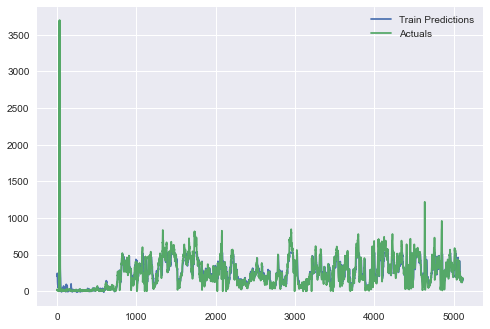

In [27]:
model = load_model('4H_Forecast/4H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(4,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

### 5 hours forecast

In [28]:
%%time

Trainer(5,6,12)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 11ms/step - loss: 111334.3828 - mean_absolute_error: 248.6985 - val_loss: 150834.3906 - val_mean_absolute_error: 334.4867
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110790.0703 - mean_absolute_error: 247.6825 - val_loss: 149580.2969 - val_mean_absolute_error: 332.5558
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 9ms/step - loss: 109527.0938 - mean_absolute_error: 245.2630 - val_loss: 147726.2031 - val_mean_absolute_error: 329.7272
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 2s 11ms/step - loss: 108038.2578 - mean_absolute_error: 242.3432 - val_loss: 145499.9375 - val_mean_absolute_error: 326.2968
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 2s 10ms/step - loss: 106335.5547 - mean_absolute_error: 239.1313 - val_loss: 143206.7344 - val_mean_absolute_error: 322.7475
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 7ms/step - loss: 104576.6094 - mean_absolute_error: 235.8981 - val_loss: 140567.6406 - val_mean_absolute_error: 318.7347
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 7ms/step - loss: 102650.1250 - mean_absolute_error: 232.5183 - val_loss: 138010.5156 - val_mean_absolute_error: 314.7473
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 100859.0547 - mean_absolute_error: 229.3467 - val_loss: 135624.4375 - val_mean_absolute_error: 310.9838
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 7ms/step - loss: 99149.5078 - mean_absolute_error: 226.3693 - val_loss: 133183.1562 - val_mean_absolute_error: 307.0789
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 7ms/step - loss: 97414.4766 - mean_absolute_error: 223.3185 - val_loss: 130894.1250 - val_mean_absolute_error: 303.4118
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 7ms/step - loss: 95807.4922 - mean_absolute_error: 220.4085 - val_loss: 128688.7891 - val_mean_absolute_error: 299.8117
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 94224.5234 - mean_absolute_error: 217.5929 - val_loss: 126470.8281 - val_mean_absolute_error: 296.1518
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 7ms/step - loss: 92652.6797 - mean_absolute_error: 214.7072 - val_loss: 124256.9531 - val_mean_absolute_error: 292.4424
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 1s 7ms/step - loss: 90860.2656 - mean_absolute_error: 211.6078 - val_loss: 121559.3828 - val_mean_absolute_error: 287.8965
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 12ms/step - loss: 89086.9766 - mean_absolute_error: 208.4050 - val_loss: 119172.5234 - val_mean_absolute_error: 283.8262
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 8ms/step - loss: 87404.5078 - mean_absolute_error: 205.4626 - val_loss: 116803.6797 - val_mean_absolute_error: 279.7676
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 85748.7422 - mean_absolute_error: 202.4810 - val_loss: 114460.6016 - val_mean_absolute_error: 275.7510
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 8ms/step - loss: 84108.8516 - mean_absolute_error: 199.5762 - val_loss: 112122.6875 - val_mean_absolute_error: 271.7175
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 8ms/step - loss: 82480.5156 - mean_absolute_error: 196.6387 - val_loss: 109801.8828 - val_mean_absolute_error: 267.6950
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 7ms/step - loss: 80859.2188 - mean_absolute_error: 193.7415 - val_loss: 107457.4453 - val_mean_absolute_error: 263.6296
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 79219.9609 - mean_absolute_error: 190.9739 - val_loss: 105091.6172 - val_mean_absolute_error: 259.5533
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 11ms/step - loss: 77598.7656 - mean_absolute_error: 187.6994 - val_loss: 102643.2969 - val_mean_absolute_error: 255.3454
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 75893.1172 - mean_absolute_error: 185.0311 - val_loss: 100258.8516 - val_mean_absolute_error: 251.2822
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 1s 8ms/step - loss: 74305.0938 - mean_absolute_error: 181.6874 - val_loss: 97888.7344 - val_mean_absolute_error: 247.3093
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 1s 8ms/step - loss: 72686.4688 - mean_absolute_error: 179.2323 - val_loss: 95565.6797 - val_mean_absolute_error: 243.4333
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 8ms/step - loss: 71108.4844 - mean_absolute_error: 176.3161 - val_loss: 93182.7812 - val_mean_absolute_error: 239.4658
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 69351.2031 - mean_absolute_error: 172.9556 - val_loss: 90329.6094 - val_mean_absolute_error: 234.7987
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 67624.0156 - mean_absolute_error: 169.9440 - val_loss: 88018.9531 - val_mean_absolute_error: 230.9583
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 66094.6328 - mean_absolute_error: 167.2777 - val_loss: 85736.5703 - val_mean_absolute_error: 227.1841
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 7ms/step - loss: 64584.0430 - mean_absolute_error: 164.3494 - val_loss: 83510.5312 - val_mean_absolute_error: 223.4478
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 63120.9609 - mean_absolute_error: 160.7744 - val_loss: 81280.9062 - val_mean_absolute_error: 219.6790
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 61613.0664 - mean_absolute_error: 158.7198 - val_loss: 79069.9453 - val_mean_absolute_error: 215.8885
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 8ms/step - loss: 60194.0820 - mean_absolute_error: 155.6817 - val_loss: 76923.8516 - val_mean_absolute_error: 212.1474
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 7ms/step - loss: 58815.5742 - mean_absolute_error: 152.9913 - val_loss: 74821.5156 - val_mean_absolute_error: 208.3930
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 57427.6602 - mean_absolute_error: 150.3169 - val_loss: 72769.7109 - val_mean_absolute_error: 204.9211
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 56122.7266 - mean_absolute_error: 147.3832 - val_loss: 70685.4531 - val_mean_absolute_error: 200.9363
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 7ms/step - loss: 54769.8398 - mean_absolute_error: 144.7308 - val_loss: 68696.5312 - val_mean_absolute_error: 197.3330
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 53472.4766 - mean_absolute_error: 142.0567 - val_loss: 66742.1797 - val_mean_absolute_error: 193.8430
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 7ms/step - loss: 52239.0703 - mean_absolute_error: 139.2793 - val_loss: 64797.0625 - val_mean_absolute_error: 190.4745
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 9ms/step - loss: 51014.6953 - mean_absolute_error: 136.9840 - val_loss: 62913.7617 - val_mean_absolute_error: 187.2479
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 7ms/step - loss: 49837.9023 - mean_absolute_error: 134.6340 - val_loss: 61044.7773 - val_mean_absolute_error: 183.8289
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 48709.4258 - mean_absolute_error: 132.1205 - val_loss: 59184.5664 - val_mean_absolute_error: 180.5706
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 2s 9ms/step - loss: 47587.9883 - mean_absolute_error: 129.6436 - val_loss: 57437.8203 - val_mean_absolute_error: 177.5203
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 11ms/step - loss: 46514.4922 - mean_absolute_error: 127.8201 - val_loss: 55765.1523 - val_mean_absolute_error: 174.6361
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 8ms/step - loss: 45522.6602 - mean_absolute_error: 125.1726 - val_loss: 54060.9961 - val_mean_absolute_error: 171.6166
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 10ms/step - loss: 44511.2891 - mean_absolute_error: 124.4159 - val_loss: 52435.2031 - val_mean_absolute_error: 168.9442
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 9ms/step - loss: 43512.3750 - mean_absolute_error: 121.7311 - val_loss: 50875.5859 - val_mean_absolute_error: 166.2889
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 8ms/step - loss: 42560.6016 - mean_absolute_error: 119.3220 - val_loss: 49330.7734 - val_mean_absolute_error: 163.5392
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 41658.5664 - mean_absolute_error: 117.1195 - val_loss: 47780.0430 - val_mean_absolute_error: 160.7727
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 40784.0547 - mean_absolute_error: 115.4014 - val_loss: 46351.8672 - val_mean_absolute_error: 157.8959
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 39990.6445 - mean_absolute_error: 113.3145 - val_loss: 44884.2109 - val_mean_absolute_error: 155.4409
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 39161.1055 - mean_absolute_error: 111.7334 - val_loss: 43588.6562 - val_mean_absolute_error: 152.7935
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 38362.0195 - mean_absolute_error: 109.6919 - val_loss: 42187.3359 - val_mean_absolute_error: 150.1597
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 11ms/step - loss: 37604.3438 - mean_absolute_error: 108.1747 - val_loss: 40905.2891 - val_mean_absolute_error: 147.9658
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 1s 8ms/step - loss: 36883.5508 - mean_absolute_error: 106.7305 - val_loss: 39645.9492 - val_mean_absolute_error: 145.2259
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 11ms/step - loss: 36225.1797 - mean_absolute_error: 105.1869 - val_loss: 38427.5586 - val_mean_absolute_error: 143.2962
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 10ms/step - loss: 35549.7812 - mean_absolute_error: 103.8758 - val_loss: 37230.5234 - val_mean_absolute_error: 140.5493
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 11ms/step - loss: 34933.9492 - mean_absolute_error: 102.5342 - val_loss: 36146.4766 - val_mean_absolute_error: 138.4934
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 10ms/step - loss: 34349.5000 - mean_absolute_error: 100.9769 - val_loss: 35048.4023 - val_mean_absolute_error: 136.2006
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 33777.3516 - mean_absolute_error: 99.4326 - val_loss: 33970.6562 - val_mean_absolute_error: 134.0928
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 10ms/step - loss: 33216.5977 - mean_absolute_error: 98.6693 - val_loss: 32983.1758 - val_mean_absolute_error: 131.8611
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 32718.1543 - mean_absolute_error: 97.3854 - val_loss: 32027.4824 - val_mean_absolute_error: 129.3691
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 12ms/step - loss: 32195.5273 - mean_absolute_error: 95.5714 - val_loss: 30972.7969 - val_mean_absolute_error: 126.7758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 31677.7695 - mean_absolute_error: 94.4476 - val_loss: 30016.1660 - val_mean_absolute_error: 124.6246
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 9ms/step - loss: 31202.6094 - mean_absolute_error: 93.5396 - val_loss: 29152.3809 - val_mean_absolute_error: 122.6261
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 8ms/step - loss: 30792.9609 - mean_absolute_error: 92.3419 - val_loss: 28246.4355 - val_mean_absolute_error: 120.5108
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 2s 10ms/step - loss: 30353.3457 - mean_absolute_error: 91.6173 - val_loss: 27518.9141 - val_mean_absolute_error: 118.9105
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 29943.1172 - mean_absolute_error: 90.5155 - val_loss: 26760.5059 - val_mean_absolute_error: 117.1450
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 9ms/step - loss: 29567.5371 - mean_absolute_error: 89.6507 - val_loss: 25998.5312 - val_mean_absolute_error: 115.4239
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 2s 10ms/step - loss: 29254.5801 - mean_absolute_error: 88.8082 - val_loss: 25326.7910 - val_mean_absolute_error: 113.8511
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 2s 10ms/step - loss: 28896.8398 - mean_absolute_error: 87.9773 - val_loss: 24670.3184 - val_mean_absolute_error: 112.2893
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 9ms/step - loss: 28630.7930 - mean_absolute_error: 87.1440 - val_loss: 23966.5840 - val_mean_absolute_error: 110.6954
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 11ms/step - loss: 28300.9160 - mean_absolute_error: 86.8614 - val_loss: 23478.8613 - val_mean_absolute_error: 109.3623
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 2s 10ms/step - loss: 27994.8301 - mean_absolute_error: 85.7874 - val_loss: 22967.7422 - val_mean_absolute_error: 108.1627
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 9ms/step - loss: 27692.3848 - mean_absolute_error: 84.9972 - val_loss: 22341.9277 - val_mean_absolute_error: 106.5714
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 1s 9ms/step - loss: 27435.9219 - mean_absolute_error: 84.1084 - val_loss: 21784.5176 - val_mean_absolute_error: 105.1917
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 27187.2051 - mean_absolute_error: 83.6970 - val_loss: 21226.1074 - val_mean_absolute_error: 103.7730
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 8ms/step - loss: 26967.5957 - mean_absolute_error: 83.0439 - val_loss: 20987.6777 - val_mean_absolute_error: 103.0865
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 11ms/step - loss: 26743.1758 - mean_absolute_error: 82.5011 - val_loss: 20673.4727 - val_mean_absolute_error: 102.4758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 9ms/step - loss: 26543.0781 - mean_absolute_error: 81.8200 - val_loss: 19948.4688 - val_mean_absolute_error: 100.5701
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 26323.9551 - mean_absolute_error: 81.3886 - val_loss: 19750.8789 - val_mean_absolute_error: 100.0432
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 9ms/step - loss: 26158.4121 - mean_absolute_error: 80.6567 - val_loss: 19236.7168 - val_mean_absolute_error: 98.7618
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 25976.0410 - mean_absolute_error: 80.4141 - val_loss: 19060.5781 - val_mean_absolute_error: 98.2761
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 25821.8906 - mean_absolute_error: 79.9231 - val_loss: 18747.4883 - val_mean_absolute_error: 97.4232
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 25678.1484 - mean_absolute_error: 79.4388 - val_loss: 18364.9629 - val_mean_absolute_error: 96.4111
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 8ms/step - loss: 25563.7188 - mean_absolute_error: 79.0660 - val_loss: 18295.6543 - val_mean_absolute_error: 96.2227
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 8ms/step - loss: 25471.1152 - mean_absolute_error: 78.7563 - val_loss: 17767.4023 - val_mean_absolute_error: 94.6014
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 7ms/step - loss: 25279.6895 - mean_absolute_error: 78.2442 - val_loss: 17596.6543 - val_mean_absolute_error: 94.1911
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 25172.5527 - mean_absolute_error: 77.5292 - val_loss: 17157.2793 - val_mean_absolute_error: 92.8990
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 25044.4062 - mean_absolute_error: 77.5543 - val_loss: 17199.6504 - val_mean_absolute_error: 93.0820
Epoch 91/100
161/161 [==============================] - 1s 8ms/step - loss: 24959.0723 - mean_absolute_error: 77.0298 - val_loss: 16931.7676 - val_mean_absolute_error: 92.1423
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 24867.8125 - mean_absolute_error: 76.6286 - val_loss: 16583.0020 - val_mean_absolute_error: 91.3466
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 24753.9141 - mean_absolute_error: 76.4931 - val_loss: 16567.4082 - val_mean_absolute_error: 91.2819
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 24705.5098 - mean_absolute_error: 76.2586 - val_loss: 16373.0303 - val_mean_absolute_error: 90.7955
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 24568.8164 - mean_absolute_error: 75.8583 - val_loss: 16169.4482 - val_mean_absolute_error: 90.1367
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 8ms/step - loss: 24495.0527 - mean_absolute_error: 75.4917 - val_loss: 15976.0840 - val_mean_absolute_error: 89.6412
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 8ms/step - loss: 24398.4570 - mean_absolute_error: 75.0225 - val_loss: 15779.4062 - val_mean_absolute_error: 89.0661
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 1s 7ms/step - loss: 24339.5625 - mean_absolute_error: 75.1178 - val_loss: 15795.5586 - val_mean_absolute_error: 89.1628
Epoch 99/100
161/161 [==============================] - 1s 7ms/step - loss: 24308.3340 - mean_absolute_error: 74.6878 - val_loss: 15562.9600 - val_mean_absolute_error: 88.4854
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 7ms/step - loss: 24213.3047 - mean_absolute_error: 74.7068 - val_loss: 15499.0762 - val_mean_absolute_error: 88.4007
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 16ms/step - loss: 111446.8828 - mean_absolute_error: 248.8469 - val_loss: 150948.0469 - val_mean_absolute_error: 334.4874
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 1s 8ms/step - loss: 110527.1719 - mean_absolute_error: 246.9739 - val_loss: 149226.3438 - val_mean_absolute_error: 331.7418
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 9ms/step - loss: 109088.0156 - mean_absolute_error: 244.0766 - val_loss: 146813.0625 - val_mean_absolute_error: 327.9285
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 106635.3359 - mean_absolute_error: 239.5271 - val_loss: 142844.9531 - val_mean_absolute_error: 322.1311
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 103878.3125 - mean_absolute_error: 234.5609 - val_loss: 139354.1094 - val_mean_absolute_error: 316.6979
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 101499.7578 - mean_absolute_error: 230.4072 - val_loss: 136140.6406 - val_mean_absolute_error: 311.7055
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 9ms/step - loss: 99180.4609 - mean_absolute_error: 226.5336 - val_loss: 133041.5312 - val_mean_absolute_error: 306.8564
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 14ms/step - loss: 97133.0469 - mean_absolute_error: 223.0830 - val_loss: 130339.5469 - val_mean_absolute_error: 302.4932: 0s - loss: 97146.5312 - mean_absolute_error: 223.093
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 95217.6719 - mean_absolute_error: 219.6225 - val_loss: 127677.0781 - val_mean_absolute_error: 298.1339
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 1s 9ms/step - loss: 93315.0469 - mean_absolute_error: 216.3578 - val_loss: 125019.4062 - val_mean_absolute_error: 293.7211
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 1s 8ms/step - loss: 91401.4453 - mean_absolute_error: 212.9276 - val_loss: 122350.1719 - val_mean_absolute_error: 289.2262
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 8ms/step - loss: 89508.5391 - mean_absolute_error: 209.5697 - val_loss: 119693.3828 - val_mean_absolute_error: 284.6762
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 9ms/step - loss: 87541.3594 - mean_absolute_error: 205.8182 - val_loss: 116794.7109 - val_mean_absolute_error: 279.6621
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 9ms/step - loss: 85320.1953 - mean_absolute_error: 201.9836 - val_loss: 113465.7656 - val_mean_absolute_error: 274.0173
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 14ms/step - loss: 83149.0156 - mean_absolute_error: 197.9859 - val_loss: 110538.1484 - val_mean_absolute_error: 268.9522
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 10ms/step - loss: 81180.8438 - mean_absolute_error: 194.4012 - val_loss: 107709.2734 - val_mean_absolute_error: 264.0381
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 12ms/step - loss: 79111.2891 - mean_absolute_error: 190.9037 - val_loss: 104622.6562 - val_mean_absolute_error: 258.7096
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 77017.0859 - mean_absolute_error: 186.5974 - val_loss: 101682.7969 - val_mean_absolute_error: 253.6702
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 1s 9ms/step - loss: 75028.4375 - mean_absolute_error: 183.4622 - val_loss: 98736.8984 - val_mean_absolute_error: 248.7067
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - ETA: 0s - loss: 73584.2422 - mean_absolute_error: 180.529 - 1s 9ms/step - loss: 72979.8594 - mean_absolute_error: 179.8777 - val_loss: 95792.7422 - val_mean_absolute_error: 243.7864
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 1s 9ms/step - loss: 71051.7578 - mean_absolute_error: 176.3631 - val_loss: 93036.1953 - val_mean_absolute_error: 239.2544
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 69052.0078 - mean_absolute_error: 172.5998 - val_loss: 89740.6250 - val_mean_absolute_error: 233.7648
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 9ms/step - loss: 66926.9688 - mean_absolute_error: 168.7029 - val_loss: 86755.3281 - val_mean_absolute_error: 228.7584
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 9ms/step - loss: 64980.3008 - mean_absolute_error: 165.5993 - val_loss: 84008.5859 - val_mean_absolute_error: 224.0180
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 11ms/step - loss: 63101.4141 - mean_absolute_error: 161.2673 - val_loss: 81004.3594 - val_mean_absolute_error: 219.0501oss: 63110.0195 - mean_absolute_error: 161.271
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 9ms/step - loss: 61232.4414 - mean_absolute_error: 157.9688 - val_loss: 78312.0703 - val_mean_absolute_error: 214.2918
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 10ms/step - loss: 59514.7578 - mean_absolute_error: 154.2045 - val_loss: 75675.5312 - val_mean_absolute_error: 209.6238
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 4s 22ms/step - loss: 57707.7148 - mean_absolute_error: 150.6966 - val_loss: 72866.7031 - val_mean_absolute_error: 204.68787.7969 - mean_absolute_error: 151.
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 55989.6953 - mean_absolute_error: 147.4487 - val_loss: 70355.1719 - val_mean_absolute_error: 200.1912
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 11ms/step - loss: 54393.6523 - mean_absolute_error: 144.2529 - val_loss: 67926.7578 - val_mean_absolute_error: 195.7816
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 9ms/step - loss: 52686.0586 - mean_absolute_error: 140.8260 - val_loss: 65250.3711 - val_mean_absolute_error: 191.0946
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 9ms/step - loss: 51161.0078 - mean_absolute_error: 137.3785 - val_loss: 62748.2773 - val_mean_absolute_error: 186.4581
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 49648.7617 - mean_absolute_error: 134.2565 - val_loss: 60497.6484 - val_mean_absolute_error: 182.7467
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 48248.2734 - mean_absolute_error: 131.3742 - val_loss: 58598.9766 - val_mean_absolute_error: 179.2385
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 2s 9ms/step - loss: 46937.3203 - mean_absolute_error: 128.3573 - val_loss: 56394.8242 - val_mean_absolute_error: 175.6154
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 45652.2734 - mean_absolute_error: 126.3812 - val_loss: 54258.9844 - val_mean_absolute_error: 172.0058
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 44485.6445 - mean_absolute_error: 123.6657 - val_loss: 52278.8125 - val_mean_absolute_error: 168.6887
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 43334.0742 - mean_absolute_error: 121.3285 - val_loss: 50494.9766 - val_mean_absolute_error: 165.4921
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 2s 9ms/step - loss: 42257.3516 - mean_absolute_error: 119.0609 - val_loss: 48777.7734 - val_mean_absolute_error: 162.7599
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - ETA: 0s - loss: 41337.1406 - mean_absolute_error: 117.186 - 1s 9ms/step - loss: 41232.2109 - mean_absolute_error: 117.1444 - val_loss: 46861.1875 - val_mean_absolute_error: 159.6919
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 2s 11ms/step - loss: 40190.7266 - mean_absolute_error: 115.0308 - val_loss: 45310.7031 - val_mean_absolute_error: 156.8382
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 9ms/step - loss: 39284.3203 - mean_absolute_error: 112.3712 - val_loss: 43820.6211 - val_mean_absolute_error: 153.9392
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 9ms/step - loss: 38350.1133 - mean_absolute_error: 110.7877 - val_loss: 41865.9180 - val_mean_absolute_error: 150.7508
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 37463.6289 - mean_absolute_error: 109.1738 - val_loss: 40369.2031 - val_mean_absolute_error: 147.6878
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 12ms/step - loss: 36674.3867 - mean_absolute_error: 107.3521 - val_loss: 39198.7344 - val_mean_absolute_error: 145.5526
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 35873.7773 - mean_absolute_error: 105.4623 - val_loss: 37774.9141 - val_mean_absolute_error: 142.8097
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 8ms/step - loss: 35113.0859 - mean_absolute_error: 103.9043 - val_loss: 36254.4375 - val_mean_absolute_error: 139.6051
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 34357.6758 - mean_absolute_error: 101.9434 - val_loss: 35066.6172 - val_mean_absolute_error: 137.0654
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 10ms/step - loss: 33688.8320 - mean_absolute_error: 100.5042 - val_loss: 33865.6719 - val_mean_absolute_error: 134.3501
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 9ms/step - loss: 33136.1484 - mean_absolute_error: 99.8983 - val_loss: 32771.6133 - val_mean_absolute_error: 132.6221
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 8ms/step - loss: 32572.0000 - mean_absolute_error: 98.3584 - val_loss: 31779.5391 - val_mean_absolute_error: 130.2660
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 32048.8164 - mean_absolute_error: 97.0543 - val_loss: 30761.3809 - val_mean_absolute_error: 128.0890
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 2s 14ms/step - loss: 31518.2969 - mean_absolute_error: 96.1235 - val_loss: 29952.4551 - val_mean_absolute_error: 126.0009
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 10ms/step - loss: 31017.9258 - mean_absolute_error: 94.2758 - val_loss: 28926.3789 - val_mean_absolute_error: 123.5340
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 10ms/step - loss: 30556.0625 - mean_absolute_error: 93.3551 - val_loss: 28000.1172 - val_mean_absolute_error: 121.4091
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 10ms/step - loss: 30146.3906 - mean_absolute_error: 92.3389 - val_loss: 27096.0371 - val_mean_absolute_error: 119.4057
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 9ms/step - loss: 29749.7578 - mean_absolute_error: 91.6033 - val_loss: 26309.7246 - val_mean_absolute_error: 117.5547
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 8ms/step - loss: 29351.5352 - mean_absolute_error: 90.1394 - val_loss: 25674.1973 - val_mean_absolute_error: 115.9128
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 29008.7715 - mean_absolute_error: 89.8119 - val_loss: 25008.0898 - val_mean_absolute_error: 114.3672
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 28657.9941 - mean_absolute_error: 88.6232 - val_loss: 24100.2480 - val_mean_absolute_error: 111.7978
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 12ms/step - loss: 28270.0938 - mean_absolute_error: 87.4829 - val_loss: 23622.2988 - val_mean_absolute_error: 110.5272
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 9ms/step - loss: 27955.3672 - mean_absolute_error: 86.3711 - val_loss: 22846.4121 - val_mean_absolute_error: 108.5576
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 27666.7500 - mean_absolute_error: 85.6266 - val_loss: 22170.7656 - val_mean_absolute_error: 106.5378
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 11ms/step - loss: 27370.8535 - mean_absolute_error: 84.8620 - val_loss: 21581.7949 - val_mean_absolute_error: 105.1425
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 27077.7480 - mean_absolute_error: 85.1788 - val_loss: 21397.6406 - val_mean_absolute_error: 104.8604
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 10ms/step - loss: 27009.8301 - mean_absolute_error: 84.2050 - val_loss: 21120.6641 - val_mean_absolute_error: 104.0017
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 26791.1270 - mean_absolute_error: 83.6095 - val_loss: 21086.5293 - val_mean_absolute_error: 104.1071
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 10ms/step - loss: 26643.8965 - mean_absolute_error: 83.2290 - val_loss: 20538.1953 - val_mean_absolute_error: 102.6039
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 26507.5938 - mean_absolute_error: 82.3173 - val_loss: 20212.2949 - val_mean_absolute_error: 101.9459
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - ETA: 0s - loss: 26405.2500 - mean_absolute_error: 82.80 - 1s 9ms/step - loss: 26406.1055 - mean_absolute_error: 82.8259 - val_loss: 19955.0312 - val_mean_absolute_error: 101.0578
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 8ms/step - loss: 26252.5723 - mean_absolute_error: 82.0092 - val_loss: 19716.1855 - val_mean_absolute_error: 100.4505
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 11ms/step - loss: 26148.8340 - mean_absolute_error: 81.7164 - val_loss: 19236.1016 - val_mean_absolute_error: 99.1552
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 11ms/step - loss: 25986.6504 - mean_absolute_error: 81.4786 - val_loss: 18967.0000 - val_mean_absolute_error: 98.2484
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 9ms/step - loss: 25881.5078 - mean_absolute_error: 80.9403 - val_loss: 18769.9102 - val_mean_absolute_error: 97.7688
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 25742.2012 - mean_absolute_error: 80.2512 - val_loss: 18467.0430 - val_mean_absolute_error: 97.1162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 12ms/step - loss: 25624.8926 - mean_absolute_error: 80.1352 - val_loss: 18421.0625 - val_mean_absolute_error: 96.8509
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 10ms/step - loss: 25529.5254 - mean_absolute_error: 79.4460 - val_loss: 18096.3613 - val_mean_absolute_error: 95.9433
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 25374.2031 - mean_absolute_error: 79.2010 - val_loss: 17466.0723 - val_mean_absolute_error: 94.4046
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 11ms/step - loss: 25301.5312 - mean_absolute_error: 78.7486 - val_loss: 17528.4570 - val_mean_absolute_error: 94.4818
Epoch 80/100
161/161 [==============================] - 2s 11ms/step - loss: 25174.8711 - mean_absolute_error: 78.5937 - val_loss: 17376.3379 - val_mean_absolute_error: 94.3185
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 9ms/step - loss: 25095.9102 - mean_absolute_error: 78.2157 - val_loss: 16967.0605 - val_mean_absolute_error: 93.0797
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 1s 8ms/step - loss: 24990.8496 - mean_absolute_error: 77.8292 - val_loss: 16959.7500 - val_mean_absolute_error: 93.1594
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 2s 9ms/step - loss: 24906.8770 - mean_absolute_error: 77.4846 - val_loss: 16842.9688 - val_mean_absolute_error: 92.9097
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 8ms/step - loss: 24868.1562 - mean_absolute_error: 77.2591 - val_loss: 16745.6406 - val_mean_absolute_error: 92.6684
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 3s 16ms/step - loss: 24757.7480 - mean_absolute_error: 77.1549 - val_loss: 16438.3184 - val_mean_absolute_error: 91.5329
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 24674.7910 - mean_absolute_error: 76.6672 - val_loss: 16154.3379 - val_mean_absolute_error: 90.7554
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 10ms/step - loss: 24633.8535 - mean_absolute_error: 76.3376 - val_loss: 16167.9512 - val_mean_absolute_error: 90.8645
Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 24513.0234 - mean_absolute_error: 76.0006 - val_loss: 15608.7002 - val_mean_absolute_error: 89.2837
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 9ms/step - loss: 24472.7676 - mean_absolute_error: 75.5685 - val_loss: 15441.8896 - val_mean_absolute_error: 88.6158
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 9ms/step - loss: 24352.7676 - mean_absolute_error: 75.3216 - val_loss: 15183.8721 - val_mean_absolute_error: 87.9219
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 9ms/step - loss: 24378.3691 - mean_absolute_error: 75.1130 - val_loss: 15111.7910 - val_mean_absolute_error: 87.6646
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 11ms/step - loss: 24297.8027 - mean_absolute_error: 75.1925 - val_loss: 14935.1650 - val_mean_absolute_error: 86.9697
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 10ms/step - loss: 24177.3359 - mean_absolute_error: 74.6622 - val_loss: 14863.5508 - val_mean_absolute_error: 86.7747
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 24084.4844 - mean_absolute_error: 74.4343 - val_loss: 15655.2773 - val_mean_absolute_error: 88.9049
Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 24060.4219 - mean_absolute_error: 74.1489 - val_loss: 14933.3291 - val_mean_absolute_error: 86.9560
Epoch 96/100
161/161 [==============================] - 1s 8ms/step - loss: 23992.2734 - mean_absolute_error: 73.9453 - val_loss: 15052.9795 - val_mean_absolute_error: 87.0974
Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 23944.5801 - mean_absolute_error: 73.9492 - val_loss: 15067.6943 - val_mean_absolute_error: 87.2063
Epoch 98/100
161/161 [==============================] - 1s 8ms/step - loss: 23926.7090 - mean_absolute_error: 73.5295 - val_loss: 15171.7285 - val_mean_absolute_error: 87.5408
Epoch 99/100
161/161 [==============================] - 1s 8ms/step - loss: 23919.5391 - mean_absolute_error: 74.0030 - 

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 9ms/step - loss: 23912.1934 - mean_absolute_error: 73.9835 - val_loss: 14965.3975 - val_mean_absolute_error: 86.9076

-----------------------------------------------------------------------------------------------------------

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 6s 14ms/step - loss: 111656.9688 - me

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 11ms/step - loss: 111217.0781 - mean_absolute_error: 248.4478 - val_loss: 150628.2031 - val_mean_absolute_error: 334.0255
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 12ms/step - loss: 110562.2031 - mean_absolute_error: 247.2532 - val_loss: 149547.2344 - val_mean_absolute_error: 332.4197
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 109578.4609 - mean_absolute_error: 245.3343 - val_loss: 148023.0469 - val_mean_absolute_error: 330.1291
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 108338.3516 - mean_absolute_error: 242.9910 - val_loss: 146150.8594 - val_mean_absolute_error: 327.3577
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 2s 10ms/step - loss: 106972.6953 - mean_absolute_error: 240.4162 - val_loss: 144257.2812 - val_mean_absolute_error: 324.4304
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 10ms/step - loss: 105502.4453 - mean_absolute_error: 237.7237 - val_loss: 142200.8594 - val_mean_absolute_error: 321.2908
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 103929.0859 - mean_absolute_error: 234.9016 - val_loss: 139806.3438 - val_mean_absolute_error: 317.5381
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 2s 11ms/step - loss: 102139.5703 - mean_absolute_error: 231.7978 - val_loss: 137402.7500 - val_mean_absolute_error: 313.8008
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 10ms/step - loss: 100432.3672 - mean_absolute_error: 228.8379 - val_loss: 135095.0938 - val_mean_absolute_error: 310.1248
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 11ms/step - loss: 98698.0703 - mean_absolute_error: 225.8728 - val_loss: 132564.8594 - val_mean_absolute_error: 306.0616
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 96879.3750 - mean_absolute_error: 222.6916 - val_loss: 130031.1406 - val_mean_absolute_error: 301.9472
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 1s 9ms/step - loss: 95006.0859 - mean_absolute_error: 219.4468 - val_loss: 127430.1172 - val_mean_absolute_error: 297.7031
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 3s 18ms/step - loss: 93189.4453 - mean_absolute_error: 216.1623 - val_loss: 124839.1484 - val_mean_absolute_error: 293.3561
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 14ms/step - loss: 91273.6953 - mean_absolute_error: 212.9194 - val_loss: 122169.9766 - val_mean_absolute_error: 288.8888
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 14ms/step - loss: 89435.9609 - mean_absolute_error: 209.7345 - val_loss: 119563.5078 - val_mean_absolute_error: 284.4498
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 3s 19ms/step - loss: 87568.9375 - mean_absolute_error: 206.4363 - val_loss: 116910.5781 - val_mean_absolute_error: 279.9086
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 10ms/step - loss: 85729.6328 - mean_absolute_error: 203.0142 - val_loss: 114238.9219 - val_mean_absolute_error: 275.3268
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 11ms/step - loss: 83836.1094 - mean_absolute_error: 199.9340 - val_loss: 111568.9688 - val_mean_absolute_error: 270.7276
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 1s 9ms/step - loss: 81974.2734 - mean_absolute_error: 196.5105 - val_loss: 108863.5156 - val_mean_absolute_error: 266.0276
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 11ms/step - loss: 80097.9219 - mean_absolute_error: 193.2652 - val_loss: 106135.8516 - val_mean_absolute_error: 261.2785
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 1s 9ms/step - loss: 78172.3594 - mean_absolute_error: 189.9687 - val_loss: 103291.6641 - val_mean_absolute_error: 256.4385
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 12ms/step - loss: 76212.4453 - mean_absolute_error: 186.2437 - val_loss: 100483.7188 - val_mean_absolute_error: 251.6225
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 10ms/step - loss: 74316.1641 - mean_absolute_error: 183.1487 - val_loss: 97741.1094 - val_mean_absolute_error: 247.0259
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 10ms/step - loss: 72555.4766 - mean_absolute_error: 180.3395 - val_loss: 95071.0625 - val_mean_absolute_error: 242.5683
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 10ms/step - loss: 70738.4688 - mean_absolute_error: 176.8969 - val_loss: 92431.9609 - val_mean_absolute_error: 238.2123
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 10ms/step - loss: 68936.6719 - mean_absolute_error: 173.3696 - val_loss: 89765.3828 - val_mean_absolute_error: 233.7809
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 9ms/step - loss: 67164.6406 - mean_absolute_error: 169.6388 - val_loss: 87149.7500 - val_mean_absolute_error: 229.4631
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 9ms/step - loss: 65445.1172 - mean_absolute_error: 166.8704 - val_loss: 84610.2656 - val_mean_absolute_error: 225.2202
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 1s 9ms/step - loss: 63774.3203 - mean_absolute_error: 163.3210 - val_loss: 82090.8281 - val_mean_absolute_error: 220.9476
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 14ms/step - loss: 62096.9766 - mean_absolute_error: 160.5067 - val_loss: 79655.3750 - val_mean_absolute_error: 216.7823
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 11ms/step - loss: 60524.3477 - mean_absolute_error: 157.5420 - val_loss: 77236.6172 - val_mean_absolute_error: 212.6122
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 2s 10ms/step - loss: 58891.9102 - mean_absolute_error: 154.1393 - val_loss: 74819.5781 - val_mean_absolute_error: 208.3591
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 2s 10ms/step - loss: 57355.9961 - mean_absolute_error: 151.2212 - val_loss: 72508.9531 - val_mean_absolute_error: 204.2849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 2s 10ms/step - loss: 55875.5000 - mean_absolute_error: 148.1447 - val_loss: 70195.6250 - val_mean_absolute_error: 199.9861
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 2s 10ms/step - loss: 54353.1914 - mean_absolute_error: 144.9129 - val_loss: 68018.2812 - val_mean_absolute_error: 196.2427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 52928.0312 - mean_absolute_error: 140.6965 - val_loss: 65546.0625 - val_mean_absolute_error: 191.4824
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 8ms/step - loss: 51530.6055 - mean_absolute_error: 139.0884 - val_loss: 63467.5000 - val_mean_absolute_error: 187.7997
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 50174.8672 - mean_absolute_error: 135.6369 - val_loss: 61274.0117 - val_mean_absolute_error: 183.8689
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 9ms/step - loss: 48816.2734 - mean_absolute_error: 132.3410 - val_loss: 59114.9883 - val_mean_absolute_error: 180.0012
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 47484.1680 - mean_absolute_error: 129.9852 - val_loss: 57069.0664 - val_mean_absolute_error: 176.3228
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 2s 13ms/step - loss: 46226.3789 - mean_absolute_error: 127.2765 - val_loss: 55126.4844 - val_mean_absolute_error: 172.9768
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 2s 12ms/step - loss: 45041.3828 - mean_absolute_error: 124.1489 - val_loss: 53165.9492 - val_mean_absolute_error: 169.3913
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 2s 12ms/step - loss: 43839.6719 - mean_absolute_error: 121.8253 - val_loss: 51188.5820 - val_mean_absolute_error: 165.9670
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 14ms/step - loss: 42666.5117 - mean_absolute_error: 119.4823 - val_loss: 49316.7891 - val_mean_absolute_error: 162.5638
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 9ms/step - loss: 41678.7109 - mean_absolute_error: 117.3004 - val_loss: 47535.4062 - val_mean_absolute_error: 159.5187
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 9ms/step - loss: 40638.3672 - mean_absolute_error: 115.1405 - val_loss: 45908.0547 - val_mean_absolute_error: 156.5933
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 9ms/step - loss: 39627.6289 - mean_absolute_error: 113.0484 - val_loss: 44208.8828 - val_mean_absolute_error: 153.9439
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 9ms/step - loss: 38715.4648 - mean_absolute_error: 111.2615 - val_loss: 42580.8086 - val_mean_absolute_error: 150.6647
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 10ms/step - loss: 37797.2617 - mean_absolute_error: 108.5125 - val_loss: 40894.0078 - val_mean_absolute_error: 147.3902
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 9ms/step - loss: 36999.8750 - mean_absolute_error: 107.1130 - val_loss: 39499.7266 - val_mean_absolute_error: 144.6469
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 9ms/step - loss: 36204.7383 - mean_absolute_error: 105.5450 - val_loss: 38182.1641 - val_mean_absolute_error: 142.2340
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 35464.0586 - mean_absolute_error: 104.0935 - val_loss: 36923.4453 - val_mean_absolute_error: 139.6629
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 2s 10ms/step - loss: 34775.3516 - mean_absolute_error: 102.3207 - val_loss: 35645.5430 - val_mean_absolute_error: 136.8100
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 10ms/step - loss: 34119.3867 - mean_absolute_error: 101.0276 - val_loss: 34455.3516 - val_mean_absolute_error: 134.8758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 11ms/step - loss: 33504.7422 - mean_absolute_error: 99.1958 - val_loss: 33267.5039 - val_mean_absolute_error: 132.4221
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 11ms/step - loss: 32938.7109 - mean_absolute_error: 98.2868 - val_loss: 32242.4199 - val_mean_absolute_error: 130.2396
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 10ms/step - loss: 32389.7090 - mean_absolute_error: 97.5829 - val_loss: 31208.5234 - val_mean_absolute_error: 128.2509
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 2s 11ms/step - loss: 31855.9180 - mean_absolute_error: 96.1353 - val_loss: 30208.2539 - val_mean_absolute_error: 126.0518
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 31374.1660 - mean_absolute_error: 94.7619 - val_loss: 29270.9707 - val_mean_absolute_error: 123.9364
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 9ms/step - loss: 30911.8867 - mean_absolute_error: 94.0872 - val_loss: 28361.6113 - val_mean_absolute_error: 121.9715
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 30494.5879 - mean_absolute_error: 92.5737 - val_loss: 27480.3828 - val_mean_absolute_error: 119.8560
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 8ms/step - loss: 30064.8652 - mean_absolute_error: 92.0978 - val_loss: 26741.6816 - val_mean_absolute_error: 118.0123
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 9ms/step - loss: 29617.5801 - mean_absolute_error: 90.3487 - val_loss: 25877.0703 - val_mean_absolute_error: 115.9242
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 29242.0488 - mean_absolute_error: 89.4640 - val_loss: 25253.1855 - val_mean_absolute_error: 114.5301
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 2s 10ms/step - loss: 28888.5977 - mean_absolute_error: 88.3999 - val_loss: 24578.7051 - val_mean_absolute_error: 112.8795
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 9ms/step - loss: 28541.7910 - mean_absolute_error: 88.1841 - val_loss: 24046.0078 - val_mean_absolute_error: 111.3718
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 8ms/step - loss: 28240.5059 - mean_absolute_error: 87.1756 - val_loss: 23577.1504 - val_mean_absolute_error: 110.2191
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 8ms/step - loss: 27955.3496 - mean_absolute_error: 86.1211 - val_loss: 22854.8984 - val_mean_absolute_error: 108.6062
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 8ms/step - loss: 27695.2812 - mean_absolute_error: 85.5642 - val_loss: 22370.7891 - val_mean_absolute_error: 107.4330
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 8ms/step - loss: 27385.1484 - mean_absolute_error: 84.7644 - val_loss: 21729.4688 - val_mean_absolute_error: 105.7658
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 8ms/step - loss: 27188.4375 - mean_absolute_error: 84.2543 - val_loss: 21560.8652 - val_mean_absolute_error: 105.3474
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 26964.6836 - mean_absolute_error: 83.7834 - val_loss: 20917.8164 - val_mean_absolute_error: 103.7190
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 26743.1992 - mean_absolute_error: 83.1234 - val_loss: 20506.6992 - val_mean_absolute_error: 102.6836
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 26529.0586 - mean_absolute_error: 82.4279 - val_loss: 20163.2188 - val_mean_absolute_error: 101.8703
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 26338.2461 - mean_absolute_error: 81.8044 - val_loss: 19556.6758 - val_mean_absolute_error: 100.2970
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 10ms/step - loss: 26178.6816 - mean_absolute_error: 80.7880 - val_loss: 19127.3223 - val_mean_absolute_error: 99.0711
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 26002.7871 - mean_absolute_error: 81.1614 - val_loss: 18876.9062 - val_mean_absolute_error: 98.3973
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 1s 8ms/step - loss: 25848.9180 - mean_absolute_error: 79.9152 - val_loss: 18531.5332 - val_mean_absolute_error: 97.2802
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 1s 8ms/step - loss: 25666.6367 - mean_absolute_error: 79.2665 - val_loss: 18368.1523 - val_mean_absolute_error: 96.4938
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 25528.0547 - mean_absolute_error: 78.6249 - val_loss: 18039.3984 - val_mean_absolute_error: 95.7307
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - ETA: 0s - loss: 25707.5977 - mean_absolute_error: 77.96 - 1s 8ms/step - loss: 25373.7637 - mean_absolute_error: 78.0892 - val_loss: 17877.2051 - val_mean_absolute_error: 95.2457
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 8ms/step - loss: 25252.1172 - mean_absolute_error: 77.6735 - val_loss: 17425.7383 - val_mean_absolute_error: 94.1364
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 25124.2949 - mean_absolute_error: 77.3550 - val_loss: 17121.4219 - val_mean_absolute_error: 93.0928
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 8ms/step - loss: 25018.3828 - mean_absolute_error: 77.0883 - val_loss: 16989.9609 - val_mean_absolute_error: 92.9989
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 1s 9ms/step - loss: 24944.4141 - mean_absolute_error: 76.8876 - val_loss: 16925.1230 - val_mean_absolute_error: 92.5649
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 9ms/step - loss: 24861.7715 - mean_absolute_error: 76.5872 - val_loss: 16399.6934 - val_mean_absolute_error: 91.5246
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 8ms/step - loss: 24729.1387 - mean_absolute_error: 76.2337 - val_loss: 16448.8809 - val_mean_absolute_error: 91.2880
Epoch 89/100
161/161 [==============================] - 1s 8ms/step - loss: 24682.2051 - mean_absolute_error: 75.9238 - val_loss: 16152.7500 - val_mean_absolute_error: 90.5574
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 24602.6289 - mean_absolute_error: 75.8174 - val_loss: 16129.9082 - val_mean_absolute_error: 90.5910
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 1s 9ms/step - loss: 24539.2773 - mean_absolute_error: 75.4750 - val_loss: 16046.4863 - val_mean_absolute_error: 90.2953
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 9ms/step - loss: 24521.5488 - mean_absolute_error: 75.2542 - val_loss: 16129.1836 - val_mean_absolute_error: 90.4171
Epoch 93/100
161/161 [==============================] - 1s 8ms/step - loss: 24437.1191 - mean_absolute_error: 75.3469 - val_loss: 15879.1377 - val_mean_absolute_error: 89.8133
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 8ms/step - loss: 24373.8418 - mean_absolute_error: 75.0431 - val_loss: 15512.6230 - val_mean_absolute_error: 88.8770
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 1s 8ms/step - loss: 24312.6387 - mean_absolute_error: 74.5607 - val_loss: 15487.6973 - val_mean_absolute_error: 88.5427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 1s 9ms/step - loss: 24268.8125 - mean_absolute_error: 74.5521 - val_loss: 15570.4268 - val_mean_absolute_error: 88.7227
Epoch 97/100
161/161 [==============================] - 1s 8ms/step - loss: 24172.5703 - mean_absolute_error: 74.1570 - val_loss: 15178.1289 - val_mean_absolute_error: 87.5707
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 7s 45ms/step - loss: 24151.4727 - mean_absolute_error: 74.1541 - val_loss: 14921.9238 - val_mean_absolute_error: 86.8267
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 2s 10ms/step - loss: 24089.9805 - mean_absolute_error: 73.6050 - val_loss: 15391.3760 - val_mean_absolute_error: 88.3627
Epoch 100/100
161/161 [==============================] - 2s 10ms/step - loss: 24023.3398 - mean_absolute_error: 73.5601 - val_loss: 15182.3145 - val_mean_absolute_error: 88.1145

-----------------------------------------------------------------------------------------------------------

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_66 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 10ms/step - loss: 110448.6406 - mean_absolute_error: 247.0814 - val_loss: 149129.5156 - val_mean_absolute_error: 331.8199
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 1s 9ms/step - loss: 109121.0781 - mean_absolute_error: 244.5574 - val_loss: 147249.3906 - val_mean_absolute_error: 328.9553
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 10ms/step - loss: 107716.2734 - mean_absolute_error: 241.9131 - val_loss: 145450.9219 - val_mean_absolute_error: 326.3090
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 14ms/step - loss: 106671.7031 - mean_absolute_error: 239.9523 - val_loss: 144163.2188 - val_mean_absolute_error: 324.3204
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 1s 9ms/step - loss: 105682.1094 - mean_absolute_error: 238.0936 - val_loss: 142788.8281 - val_mean_absolute_error: 322.2010
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 10ms/step - loss: 104634.1484 - mean_absolute_error: 236.1978 - val_loss: 141228.4375 - val_mean_absolute_error: 319.7848
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 1s 9ms/step - loss: 103443.4453 - mean_absolute_error: 234.0670 - val_loss: 139695.6719 - val_mean_absolute_error: 317.4005
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 10ms/step - loss: 102401.3438 - mean_absolute_error: 232.1868 - val_loss: 138115.3438 - val_mean_absolute_error: 314.8454
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 10ms/step - loss: 101143.2188 - mean_absolute_error: 230.0123 - val_loss: 136407.8750 - val_mean_absolute_error: 312.2436
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 10ms/step - loss: 100002.6406 - mean_absolute_error: 227.9592 - val_loss: 134951.6719 - val_mean_absolute_error: 309.8933
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 1s 9ms/step - loss: 98975.2500 - mean_absolute_error: 226.1389 - val_loss: 133542.8594 - val_mean_absolute_error: 307.6361
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 14ms/step - loss: 97959.3984 - mean_absolute_error: 224.3239 - val_loss: 132122.9844 - val_mean_absolute_error: 305.3234
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 12ms/step - loss: 96882.5391 - mean_absolute_error: 222.3712 - val_loss: 130533.5391 - val_mean_absolute_error: 302.7110
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 11ms/step - loss: 95653.3594 - mean_absolute_error: 220.1949 - val_loss: 128772.2266 - val_mean_absolute_error: 299.8993
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 94452.7031 - mean_absolute_error: 218.0177 - val_loss: 127103.8906 - val_mean_absolute_error: 297.1509
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 93277.7031 - mean_absolute_error: 215.8653 - val_loss: 125511.0938 - val_mean_absolute_error: 294.5047
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 9ms/step - loss: 92143.0156 - mean_absolute_error: 213.8349 - val_loss: 123924.8359 - val_mean_absolute_error: 291.8486
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 12ms/step - loss: 91010.5000 - mean_absolute_error: 212.0769 - val_loss: 122339.9062 - val_mean_absolute_error: 289.1725
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 11ms/step - loss: 89877.4141 - mean_absolute_error: 209.9007 - val_loss: 120752.0547 - val_mean_absolute_error: 286.4734
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 1s 9ms/step - loss: 88748.2891 - mean_absolute_error: 207.6939 - val_loss: 119151.8281 - val_mean_absolute_error: 283.7438
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 1s 8ms/step - loss: 87610.1172 - mean_absolute_error: 205.6531 - val_loss: 117540.2891 - val_mean_absolute_error: 280.9844
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 1s 8ms/step - loss: 86482.2656 - mean_absolute_error: 203.6441 - val_loss: 115929.4375 - val_mean_absolute_error: 278.2236
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 1s 9ms/step - loss: 85339.4219 - mean_absolute_error: 201.5490 - val_loss: 114309.8359 - val_mean_absolute_error: 275.4428
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 1s 9ms/step - loss: 84148.4844 - mean_absolute_error: 199.4284 - val_loss: 112392.9141 - val_mean_absolute_error: 272.1453
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 1s 9ms/step - loss: 82853.0625 - mean_absolute_error: 196.9733 - val_loss: 110705.2109 - val_mean_absolute_error: 269.2181
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 8ms/step - loss: 81656.1406 - mean_absolute_error: 195.2156 - val_loss: 109018.1719 - val_mean_absolute_error: 266.2932
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 1s 9ms/step - loss: 80499.0156 - mean_absolute_error: 193.0454 - val_loss: 107363.2969 - val_mean_absolute_error: 263.4298
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 11ms/step - loss: 79278.6953 - mean_absolute_error: 190.8466 - val_loss: 105370.9375 - val_mean_absolute_error: 260.1016
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 1s 8ms/step - loss: 77901.4062 - mean_absolute_error: 188.3287 - val_loss: 103587.1562 - val_mean_absolute_error: 256.9557
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 9ms/step - loss: 76709.2344 - mean_absolute_error: 186.3310 - val_loss: 101877.3672 - val_mean_absolute_error: 254.0235
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 9ms/step - loss: 75539.5469 - mean_absolute_error: 184.1070 - val_loss: 100177.9609 - val_mean_absolute_error: 251.1375
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 1s 8ms/step - loss: 74377.5938 - mean_absolute_error: 182.1154 - val_loss: 98498.2344 - val_mean_absolute_error: 248.3318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 9ms/step - loss: 73229.1953 - mean_absolute_error: 179.7864 - val_loss: 96815.4219 - val_mean_absolute_error: 245.5101
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 8ms/step - loss: 72088.0938 - mean_absolute_error: 178.0483 - val_loss: 95140.9922 - val_mean_absolute_error: 242.7234
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 1s 8ms/step - loss: 70943.5312 - mean_absolute_error: 175.7802 - val_loss: 93473.0000 - val_mean_absolute_error: 239.9774
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 1s 9ms/step - loss: 69815.8594 - mean_absolute_error: 173.7272 - val_loss: 91850.5703 - val_mean_absolute_error: 237.2507
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 11ms/step - loss: 68690.1406 - mean_absolute_error: 171.2476 - val_loss: 90150.3359 - val_mean_absolute_error: 234.4554
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 1s 9ms/step - loss: 67572.2031 - mean_absolute_error: 169.4773 - val_loss: 88549.9766 - val_mean_absolute_error: 231.7824
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 8ms/step - loss: 66461.1094 - mean_absolute_error: 167.3829 - val_loss: 87100.2422 - val_mean_absolute_error: 229.3089
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 1s 8ms/step - loss: 65400.0547 - mean_absolute_error: 165.1376 - val_loss: 85530.6953 - val_mean_absolute_error: 226.6036
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 11ms/step - loss: 64310.7070 - mean_absolute_error: 163.3676 - val_loss: 83907.5938 - val_mean_absolute_error: 223.8972
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 1s 8ms/step - loss: 63234.2188 - mean_absolute_error: 161.1691 - val_loss: 82242.8984 - val_mean_absolute_error: 221.1552
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 8ms/step - loss: 62191.2109 - mean_absolute_error: 159.0776 - val_loss: 80761.7891 - val_mean_absolute_error: 218.5869
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 1s 8ms/step - loss: 61151.4375 - mean_absolute_error: 156.9057 - val_loss: 79213.0547 - val_mean_absolute_error: 215.8789
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 60160.6992 - mean_absolute_error: 154.6401 - val_loss: 77618.0391 - val_mean_absolute_error: 213.1169
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 12ms/step - loss: 59101.7578 - mean_absolute_error: 153.1216 - val_loss: 76149.5391 - val_mean_absolute_error: 210.4528
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 8ms/step - loss: 58115.0703 - mean_absolute_error: 150.8205 - val_loss: 74539.0703 - val_mean_absolute_error: 207.5369
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 1s 8ms/step - loss: 57102.8203 - mean_absolute_error: 148.9608 - val_loss: 72963.1094 - val_mean_absolute_error: 204.8152
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 1s 9ms/step - loss: 56145.3203 - mean_absolute_error: 146.6761 - val_loss: 71394.7422 - val_mean_absolute_error: 202.0470
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 55177.0703 - mean_absolute_error: 145.0576 - val_loss: 69947.0781 - val_mean_absolute_error: 199.4576
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 10ms/step - loss: 54242.9805 - mean_absolute_error: 143.1234 - val_loss: 68533.6484 - val_mean_absolute_error: 196.9590
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 1s 8ms/step - loss: 53312.3008 - mean_absolute_error: 141.1298 - val_loss: 67131.7891 - val_mean_absolute_error: 194.5528
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 1s 9ms/step - loss: 52405.3359 - mean_absolute_error: 139.4596 - val_loss: 65801.2344 - val_mean_absolute_error: 192.1678
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 51509.1953 - mean_absolute_error: 137.7378 - val_loss: 64534.3359 - val_mean_absolute_error: 189.8483
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 10ms/step - loss: 50658.2227 - mean_absolute_error: 135.7613 - val_loss: 62886.1328 - val_mean_absolute_error: 186.9141
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 8ms/step - loss: 49575.2773 - mean_absolute_error: 133.7534 - val_loss: 61157.3320 - val_mean_absolute_error: 183.9111
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 48630.9648 - mean_absolute_error: 131.8870 - val_loss: 59695.4414 - val_mean_absolute_error: 181.3951
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 8ms/step - loss: 47775.3164 - mean_absolute_error: 129.9449 - val_loss: 58256.8867 - val_mean_absolute_error: 178.9388
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 46941.7695 - mean_absolute_error: 128.0386 - val_loss: 56981.2852 - val_mean_absolute_error: 176.7495
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 10ms/step - loss: 46139.6328 - mean_absolute_error: 126.1497 - val_loss: 55689.1211 - val_mean_absolute_error: 174.6779
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 9ms/step - loss: 45365.0977 - mean_absolute_error: 124.9769 - val_loss: 54477.5742 - val_mean_absolute_error: 172.4019
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 44630.7773 - mean_absolute_error: 123.4967 - val_loss: 53275.3828 - val_mean_absolute_error: 170.2278
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 12ms/step - loss: 43859.1953 - mean_absolute_error: 121.8558 - val_loss: 52064.7422 - val_mean_absolute_error: 168.2455
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 1s 9ms/step - loss: 43088.4102 - mean_absolute_error: 119.9520 - val_loss: 50650.6719 - val_mean_absolute_error: 166.0829
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 1s 9ms/step - loss: 42358.5430 - mean_absolute_error: 118.5708 - val_loss: 49513.1875 - val_mean_absolute_error: 164.1902
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 10ms/step - loss: 41671.4453 - mean_absolute_error: 117.2566 - val_loss: 48378.5273 - val_mean_absolute_error: 162.0324
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 10ms/step - loss: 41017.6680 - mean_absolute_error: 115.8827 - val_loss: 47294.4023 - val_mean_absolute_error: 160.3548
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 1s 8ms/step - loss: 40380.8164 - mean_absolute_error: 114.9125 - val_loss: 46201.2891 - val_mean_absolute_error: 158.2197
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 10ms/step - loss: 39726.6133 - mean_absolute_error: 113.2762 - val_loss: 45396.1602 - val_mean_absolute_error: 156.6871
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 10ms/step - loss: 39092.4219 - mean_absolute_error: 111.3813 - val_loss: 44194.9609 - val_mean_absolute_error: 154.4701
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 8ms/step - loss: 38485.4766 - mean_absolute_error: 110.1848 - val_loss: 43216.0000 - val_mean_absolute_error: 152.8750
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 1s 9ms/step - loss: 37924.7578 - mean_absolute_error: 108.9465 - val_loss: 42039.4141 - val_mean_absolute_error: 150.7796- loss: 40225.4023 - mean_absolute_error: 110.3
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 8ms/step - loss: 37376.6719 - mean_absolute_error: 107.7277 - val_loss: 41136.6133 - val_mean_absolute_error: 149.1938
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 1s 8ms/step - loss: 36859.0078 - mean_absolute_error: 106.7472 - val_loss: 40267.2383 - val_mean_absolute_error: 147.5881
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 1s 8ms/step - loss: 36331.8633 - mean_absolute_error: 105.8800 - val_loss: 39494.9492 - val_mean_absolute_error: 146.0318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 9ms/step - loss: 35825.0938 - mean_absolute_error: 104.5972 - val_loss: 38525.9688 - val_mean_absolute_error: 144.1793
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 10ms/step - loss: 35397.4141 - mean_absolute_error: 104.0623 - val_loss: 37758.9258 - val_mean_absolute_error: 142.3150
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 8ms/step - loss: 34893.5938 - mean_absolute_error: 102.5487 - val_loss: 36947.0586 - val_mean_absolute_error: 140.9092
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 1s 9ms/step - loss: 34432.8359 - mean_absolute_error: 101.6340 - val_loss: 36122.1328 - val_mean_absolute_error: 139.4173
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 9ms/step - loss: 33985.1992 - mean_absolute_error: 100.7438 - val_loss: 35302.6133 - val_mean_absolute_error: 137.6002
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 33538.3242 - mean_absolute_error: 99.5630 - val_loss: 34444.4414 - val_mean_absolute_error: 135.9268
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 9ms/step - loss: 33127.9453 - mean_absolute_error: 98.6807 - val_loss: 33721.4570 - val_mean_absolute_error: 134.3173
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 1s 8ms/step - loss: 32720.7969 - mean_absolute_error: 97.6029 - val_loss: 32871.2773 - val_mean_absolute_error: 132.3618
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 10ms/step - loss: 32332.0566 - mean_absolute_error: 97.0219 - val_loss: 32156.3594 - val_mean_absolute_error: 130.9599
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 10ms/step - loss: 31968.9023 - mean_absolute_error: 96.0414 - val_loss: 31546.0430 - val_mean_absolute_error: 129.4585
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 10ms/step - loss: 31585.1719 - mean_absolute_error: 94.9549 - val_loss: 31055.9297 - val_mean_absolute_error: 128.4944
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 10ms/step - loss: 31264.5566 - mean_absolute_error: 94.6942 - val_loss: 30385.4512 - val_mean_absolute_error: 126.7733
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 30902.6289 - mean_absolute_error: 93.5201 - val_loss: 29621.7910 - val_mean_absolute_error: 124.7030
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 10ms/step - loss: 30570.1348 - mean_absolute_error: 92.8677 - val_loss: 29073.1289 - val_mean_absolute_error: 123.7246
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 11ms/step - loss: 30273.3379 - mean_absolute_error: 92.2216 - val_loss: 28588.3418 - val_mean_absolute_error: 122.1211
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 1s 9ms/step - loss: 29941.3164 - mean_absolute_error: 91.1528 - val_loss: 28132.4023 - val_mean_absolute_error: 120.9575
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 12ms/step - loss: 29650.1445 - mean_absolute_error: 90.4596 - val_loss: 27394.1562 - val_mean_absolute_error: 119.4921
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 1s 9ms/step - loss: 29390.1445 - mean_absolute_error: 89.9029 - val_loss: 26594.2773 - val_mean_absolute_error: 118.0103
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 11ms/step - loss: 29114.4902 - mean_absolute_error: 89.0531 - val_loss: 26205.6328 - val_mean_absolute_error: 116.9016
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 10ms/step - loss: 28862.8750 - mean_absolute_error: 88.7059 - val_loss: 25813.3184 - val_mean_absolute_error: 115.9599
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 11ms/step - loss: 28604.6680 - mean_absolute_error: 87.7912 - val_loss: 25331.5234 - val_mean_absolute_error: 114.8705
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 3s 16ms/step - loss: 28349.6055 - mean_absolute_error: 87.3747 - val_loss: 24840.8828 - val_mean_absolute_error: 113.7516
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 28100.7930 - mean_absolute_error: 86.6071 - val_loss: 24631.7910 - val_mean_absolute_error: 112.8868
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 1s 9ms/step - loss: 27892.8281 - mean_absolute_error: 86.1589 - val_loss: 24052.2715 - val_mean_absolute_error: 111.5327
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_68 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 5s 16ms/step - loss: 111592.5078 - mean_absolute_error: 249.1577 - val_loss: 151005.8281 - val_mean_absolute_error: 334.7503
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 12ms/step - loss: 110810.6953 - mean_absolute_error: 247.7934 - val_loss: 149650.5625 - val_mean_absolute_error: 332.7106
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 13ms/step - loss: 109600.4219 - mean_absolute_error: 245.5744 - val_loss: 147975.2812 - val_mean_absolute_error: 330.0882
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 12ms/step - loss: 108437.2031 - mean_absolute_error: 243.2377 - val_loss: 146428.0938 - val_mean_absolute_error: 327.6505
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 13ms/step - loss: 107181.1094 - mean_absolute_error: 240.8033 - val_loss: 144488.2812 - val_mean_absolute_error: 324.7815
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 13ms/step - loss: 105877.9766 - mean_absolute_error: 238.4274 - val_loss: 142807.2344 - val_mean_absolute_error: 322.2120
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 12ms/step - loss: 104476.0234 - mean_absolute_error: 235.9482 - val_loss: 140751.2812 - val_mean_absolute_error: 319.0468
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 13ms/step - loss: 103123.0625 - mean_absolute_error: 233.5196 - val_loss: 139081.5625 - val_mean_absolute_error: 316.4459
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 12ms/step - loss: 101920.7969 - mean_absolute_error: 231.4279 - val_loss: 137390.7188 - val_mean_absolute_error: 313.7906
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 14ms/step - loss: 100726.1328 - mean_absolute_error: 229.3203 - val_loss: 135793.5312 - val_mean_absolute_error: 311.1783
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 11ms/step - loss: 99146.6484 - mean_absolute_error: 226.4357 - val_loss: 133118.1719 - val_mean_absolute_error: 306.8924
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 13ms/step - loss: 97471.0156 - mean_absolute_error: 223.5135 - val_loss: 131155.7188 - val_mean_absolute_error: 303.7891
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 3s 17ms/step - loss: 96144.6484 - mean_absolute_error: 221.2687 - val_loss: 129360.0781 - val_mean_absolute_error: 300.8651ean_abso
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 11ms/step - loss: 94861.0859 - mean_absolute_error: 218.9956 - val_loss: 127556.1797 - val_mean_absolute_error: 297.8182
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 12ms/step - loss: 93341.0781 - mean_absolute_error: 216.2180 - val_loss: 125048.3203 - val_mean_absolute_error: 293.6396
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 11ms/step - loss: 91538.0781 - mean_absolute_error: 212.9474 - val_loss: 122470.3203 - val_mean_absolute_error: 289.3446
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 89725.3281 - mean_absolute_error: 209.7599 - val_loss: 120122.1875 - val_mean_absolute_error: 285.3920
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 12ms/step - loss: 88099.2344 - mean_absolute_error: 206.7734 - val_loss: 117753.5312 - val_mean_absolute_error: 281.2889
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 12ms/step - loss: 86372.3359 - mean_absolute_error: 203.6504 - val_loss: 115406.2266 - val_mean_absolute_error: 277.3247
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 11ms/step - loss: 84852.5156 - mean_absolute_error: 201.0265 - val_loss: 113305.8359 - val_mean_absolute_error: 273.7159
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 13ms/step - loss: 83402.6094 - mean_absolute_error: 198.0400 - val_loss: 111233.2266 - val_mean_absolute_error: 270.1357
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 81949.0156 - mean_absolute_error: 195.4972 - val_loss: 109168.8828 - val_mean_absolute_error: 266.5437
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 11ms/step - loss: 80514.3984 - mean_absolute_error: 192.8493 - val_loss: 107120.2891 - val_mean_absolute_error: 262.9966
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 12ms/step - loss: 79096.9141 - mean_absolute_error: 190.3560 - val_loss: 105065.6094 - val_mean_absolute_error: 259.4547
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 12ms/step - loss: 77685.7266 - mean_absolute_error: 187.7104 - val_loss: 103044.3359 - val_mean_absolute_error: 255.9842
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 11ms/step - loss: 76301.8047 - mean_absolute_error: 185.3320 - val_loss: 101020.8516 - val_mean_absolute_error: 252.5273
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 12ms/step - loss: 74918.7812 - mean_absolute_error: 182.8717 - val_loss: 99012.7578 - val_mean_absolute_error: 249.1523
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 12ms/step - loss: 73535.8906 - mean_absolute_error: 180.1429 - val_loss: 97014.0938 - val_mean_absolute_error: 245.8255
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 12ms/step - loss: 72176.8281 - mean_absolute_error: 177.6192 - val_loss: 95024.7188 - val_mean_absolute_error: 242.5302
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 11ms/step - loss: 70827.1328 - mean_absolute_error: 175.1237 - val_loss: 93050.2891 - val_mean_absolute_error: 239.2668
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 10ms/step - loss: 69496.0000 - mean_absolute_error: 172.8635 - val_loss: 91105.0859 - val_mean_absolute_error: 236.0517
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 10ms/step - loss: 68171.6094 - mean_absolute_error: 170.4967 - val_loss: 89170.6094 - val_mean_absolute_error: 232.8325
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 10ms/step - loss: 66880.8281 - mean_absolute_error: 167.9933 - val_loss: 87287.5391 - val_mean_absolute_error: 229.6566
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 11ms/step - loss: 65596.3594 - mean_absolute_error: 165.5251 - val_loss: 85500.1719 - val_mean_absolute_error: 226.6357
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 10ms/step - loss: 64318.7188 - mean_absolute_error: 163.0996 - val_loss: 83467.7344 - val_mean_absolute_error: 223.2467
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 10ms/step - loss: 62966.6289 - mean_absolute_error: 160.4200 - val_loss: 81298.6641 - val_mean_absolute_error: 219.5041
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 10ms/step - loss: 61625.8750 - mean_absolute_error: 157.8145 - val_loss: 79446.0938 - val_mean_absolute_error: 216.2849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 12ms/step - loss: 60380.1562 - mean_absolute_error: 155.4554 - val_loss: 77508.9766 - val_mean_absolute_error: 212.9216
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 11ms/step - loss: 59172.2266 - mean_absolute_error: 152.9883 - val_loss: 75707.9375 - val_mean_absolute_error: 209.7186
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 11ms/step - loss: 57974.3359 - mean_absolute_error: 150.9300 - val_loss: 73893.4062 - val_mean_absolute_error: 206.6008
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 10ms/step - loss: 56852.8242 - mean_absolute_error: 148.6350 - val_loss: 72127.8281 - val_mean_absolute_error: 203.4540
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 55696.4727 - mean_absolute_error: 146.2271 - val_loss: 70348.2812 - val_mean_absolute_error: 200.2979
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 10ms/step - loss: 54489.6094 - mean_absolute_error: 143.9254 - val_loss: 68489.5859 - val_mean_absolute_error: 197.1993
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 11ms/step - loss: 53339.9570 - mean_absolute_error: 141.3911 - val_loss: 66820.5234 - val_mean_absolute_error: 194.1448
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 52260.9297 - mean_absolute_error: 138.8533 - val_loss: 65093.2305 - val_mean_absolute_error: 191.1908
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 11ms/step - loss: 51195.0820 - mean_absolute_error: 136.8060 - val_loss: 63448.2031 - val_mean_absolute_error: 188.3237
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 10ms/step - loss: 50173.1680 - mean_absolute_error: 134.9591 - val_loss: 61842.1094 - val_mean_absolute_error: 185.5767
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 14ms/step - loss: 49189.9609 - mean_absolute_error: 133.2545 - val_loss: 60283.3477 - val_mean_absolute_error: 182.9403
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 3s 16ms/step - loss: 48216.1055 - mean_absolute_error: 131.0687 - val_loss: 58735.6328 - val_mean_absolute_error: 180.2218
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 12ms/step - loss: 47263.6172 - mean_absolute_error: 129.0009 - val_loss: 57195.9336 - val_mean_absolute_error: 177.8091
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 13ms/step - loss: 46369.8594 - mean_absolute_error: 127.2246 - val_loss: 55753.6836 - val_mean_absolute_error: 175.4034
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 10ms/step - loss: 45474.2188 - mean_absolute_error: 125.9772 - val_loss: 54329.0312 - val_mean_absolute_error: 172.9444
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 11ms/step - loss: 44492.5820 - mean_absolute_error: 123.6775 - val_loss: 52537.6250 - val_mean_absolute_error: 169.6815
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 11ms/step - loss: 43583.8984 - mean_absolute_error: 121.9833 - val_loss: 51150.0117 - val_mean_absolute_error: 167.5692
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 42731.6914 - mean_absolute_error: 119.9831 - val_loss: 49847.3203 - val_mean_absolute_error: 165.2650
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 12ms/step - loss: 41989.6445 - mean_absolute_error: 117.7562 - val_loss: 48502.0625 - val_mean_absolute_error: 163.1782
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 11ms/step - loss: 41208.9531 - mean_absolute_error: 116.5169 - val_loss: 47220.8555 - val_mean_absolute_error: 160.8166
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 10ms/step - loss: 40458.7734 - mean_absolute_error: 114.9299 - val_loss: 45918.3984 - val_mean_absolute_error: 158.1275
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 10ms/step - loss: 39717.9023 - mean_absolute_error: 113.0712 - val_loss: 44687.9102 - val_mean_absolute_error: 155.8828
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 39016.0625 - mean_absolute_error: 111.5187 - val_loss: 43506.1445 - val_mean_absolute_error: 153.8162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 11ms/step - loss: 38350.0781 - mean_absolute_error: 110.1461 - val_loss: 42373.1172 - val_mean_absolute_error: 151.6254
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 12ms/step - loss: 37705.1680 - mean_absolute_error: 108.7186 - val_loss: 41234.0703 - val_mean_absolute_error: 149.4932
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 4s 27ms/step - loss: 37042.0117 - mean_absolute_error: 106.9289 - val_loss: 40129.9961 - val_mean_absolute_error: 147.2944ean_absolute_error: 107. - ETA: 0s - loss: 38256.7695 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 13ms/step - loss: 36445.4883 - mean_absolute_error: 105.9571 - val_loss: 39109.1719 - val_mean_absolute_error: 145.5120
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 4s 25ms/step - loss: 35864.1875 - mean_absolute_error: 104.4004 - val_loss: 38080.6289 - val_mean_absolute_error: 143.3803
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 3s 19ms/step - loss: 35328.6250 - mean_absolute_error: 103.3954 - val_loss: 37058.3164 - val_mean_absolute_error: 141.3764
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 3s 17ms/step - loss: 34798.6211 - mean_absolute_error: 102.2088 - val_loss: 36163.7773 - val_mean_absolute_error: 139.6009
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 3s 19ms/step - loss: 34286.2031 - mean_absolute_error: 100.8795 - val_loss: 35149.2695 - val_mean_absolute_error: 137.6696
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 3s 17ms/step - loss: 33800.5625 - mean_absolute_error: 100.0921 - val_loss: 34283.8203 - val_mean_absolute_error: 135.5120
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 3s 18ms/step - loss: 33314.8398 - mean_absolute_error: 99.1141 - val_loss: 33450.8477 - val_mean_absolute_error: 133.7865
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 3s 19ms/step - loss: 32860.4570 - mean_absolute_error: 97.8143 - val_loss: 32500.0312 - val_mean_absolute_error: 131.7963
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 3s 17ms/step - loss: 32412.4805 - mean_absolute_error: 96.9379 - val_loss: 31734.6016 - val_mean_absolute_error: 130.0052
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 4s 26ms/step - loss: 32016.2910 - mean_absolute_error: 96.0346 - val_loss: 30923.5918 - val_mean_absolute_error: 128.4102
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 3s 21ms/step - loss: 31622.0859 - mean_absolute_error: 95.0877 - val_loss: 30145.5605 - val_mean_absolute_error: 126.9569
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 31235.7539 - mean_absolute_error: 94.1743 - val_loss: 29503.4824 - val_mean_absolute_error: 125.3081
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 14ms/step - loss: 30879.2383 - mean_absolute_error: 93.3810 - val_loss: 28823.0645 - val_mean_absolute_error: 123.6388
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 12ms/step - loss: 30576.3379 - mean_absolute_error: 92.8178 - val_loss: 28143.2480 - val_mean_absolute_error: 122.1134
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 11ms/step - loss: 30229.7695 - mean_absolute_error: 91.8919 - val_loss: 27416.3555 - val_mean_absolute_error: 120.1817
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 11ms/step - loss: 29887.0156 - mean_absolute_error: 90.9716 - val_loss: 26880.6641 - val_mean_absolute_error: 119.0050
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 10ms/step - loss: 29582.4629 - mean_absolute_error: 90.3740 - val_loss: 26302.3125 - val_mean_absolute_error: 117.7540
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 10ms/step - loss: 29252.4688 - mean_absolute_error: 89.4646 - val_loss: 25701.3770 - val_mean_absolute_error: 116.5389
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 10ms/step - loss: 28993.2480 - mean_absolute_error: 88.7904 - val_loss: 25145.5918 - val_mean_absolute_error: 114.5626
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 11ms/step - loss: 28695.3633 - mean_absolute_error: 87.9133 - val_loss: 24748.5371 - val_mean_absolute_error: 113.5980
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 12ms/step - loss: 28422.5859 - mean_absolute_error: 87.4343 - val_loss: 24167.0938 - val_mean_absolute_error: 111.6956
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 12ms/step - loss: 28186.5293 - mean_absolute_error: 86.6972 - val_loss: 23596.0352 - val_mean_absolute_error: 110.5497
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 14ms/step - loss: 27920.2129 - mean_absolute_error: 85.7583 - val_loss: 23003.2051 - val_mean_absolute_error: 108.9758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 14ms/step - loss: 27689.4043 - mean_absolute_error: 85.1827 - val_loss: 22633.5938 - val_mean_absolute_error: 108.1404
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 14ms/step - loss: 27491.7383 - mean_absolute_error: 85.3100 - val_loss: 22196.4004 - val_mean_absolute_error: 106.9806
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 27291.8281 - mean_absolute_error: 84.3772 - val_loss: 21767.5156 - val_mean_absolute_error: 105.8803oss: 23802.9727 - mean_abs
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 3s 17ms/step - loss: 27100.6172 - mean_absolute_error: 83.7761 - val_loss: 21430.9473 - val_mean_absolute_error: 105.0652
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 5s 29ms/step - loss: 26884.5254 - mean_absolute_error: 83.3142 - val_loss: 20990.3965 - val_mean_absolute_error: 103.9818
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 3s 22ms/step - loss: 26699.3340 - mean_absolute_error: 82.6195 - val_loss: 20618.7676 - val_mean_absolute_error: 102.7925
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 3s 17ms/step - loss: 26535.1641 - mean_absolute_error: 82.1357 - val_loss: 20179.8242 - val_mean_absolute_error: 101.8133
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 3s 19ms/step - loss: 26366.8750 - mean_absolute_error: 81.6928 - val_loss: 20070.8691 - val_mean_absolute_error: 101.4215
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 3s 17ms/step - loss: 26210.6914 - mean_absolute_error: 81.1907 - val_loss: 19681.2207 - val_mean_absolute_error: 100.3441
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 4s 27ms/step - loss: 26049.7168 - mean_absolute_error: 80.5679 - val_loss: 19380.9414 - val_mean_absolute_error: 99.6175
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 3s 17ms/step - loss: 25922.4434 - mean_absolute_error: 80.7315 - val_loss: 18893.1133 - val_mean_absolute_error: 98.0784
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 12ms/step - loss: 25778.1152 - mean_absolute_error: 80.1569 - val_loss: 18927.1367 - val_mean_absolute_error: 98.2713
Epoch 99/100
160/160 [==============================] - 3s 17ms/step - loss: 25692.5469 - mean_absolute_error: 79.8111 - val_loss: 18650.2500 - val_mean_absolute_error: 97.6069
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 3s 17ms/step - loss: 25578.0000 - mean_absolute_error: 79.3990 - val_loss: 18196.2969 - val_mean_absolute_error: 96.2648
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 10s 27ms/step - loss: 111544.2578 - mean_absolute_error: 249.2566 - val_loss: 150752.5781 - val_mean_absolute_error: 334.4998
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 3s 20ms/step - loss: 110696.9375 - mean_absolute_error: 247.7165 - val_loss: 149538.5938 - val_mean_absolute_error: 332.6238
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 14ms/step - loss: 109540.7891 - mean_absolute_error: 245.4763 - val_loss: 147652.8906 - val_mean_absolute_error: 329.7332
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 13ms/step - loss: 108176.6797 - mean_absolute_error: 242.7080 - val_loss: 145958.5312 - val_mean_absolute_error: 326.9686
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 14ms/step - loss: 106616.9609 - mean_absolute_error: 239.6922 - val_loss: 143373.7344 - val_mean_absolute_error: 322.8106
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 3s 17ms/step - loss: 104390.6797 - mean_absolute_error: 235.7073 - val_loss: 140252.7188 - val_mean_absolute_error: 318.2043
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 3s 21ms/step - loss: 102447.0547 - mean_absolute_error: 232.3053 - val_loss: 137779.5312 - val_mean_absolute_error: 314.3344te_error: 2
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 15ms/step - loss: 100741.0391 - mean_absolute_error: 229.3844 - val_loss: 135359.2969 - val_mean_absolute_error: 310.5601
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 14ms/step - loss: 99056.1641 - mean_absolute_error: 226.4816 - val_loss: 133172.4688 - val_mean_absolute_error: 307.0546
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 3s 19ms/step - loss: 97525.6875 - mean_absolute_error: 223.7941 - val_loss: 131085.8438 - val_mean_absolute_error: 303.6826
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 5s 28ms/step - loss: 96025.1016 - mean_absolute_error: 221.1673 - val_loss: 129009.2578 - val_mean_absolute_error: 300.2970
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 12ms/step - loss: 94531.4609 - mean_absolute_error: 218.5904 - val_loss: 126930.6719 - val_mean_absolute_error: 296.8727
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 3s 16ms/step - loss: 93029.8125 - mean_absolute_error: 215.9251 - val_loss: 124835.5781 - val_mean_absolute_error: 293.3807
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 12ms/step - loss: 91519.3594 - mean_absolute_error: 213.3622 - val_loss: 122601.0938 - val_mean_absolute_error: 289.6164
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 11ms/step - loss: 89926.5234 - mean_absolute_error: 210.5507 - val_loss: 120421.0859 - val_mean_absolute_error: 285.8704
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 11ms/step - loss: 88280.4062 - mean_absolute_error: 207.6344 - val_loss: 118044.0000 - val_mean_absolute_error: 281.8517
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 86688.0234 - mean_absolute_error: 205.0441 - val_loss: 115817.1797 - val_mean_absolute_error: 278.0343
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 11ms/step - loss: 85124.6797 - mean_absolute_error: 201.9417 - val_loss: 113585.7422 - val_mean_absolute_error: 274.1992
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 11ms/step - loss: 83561.5000 - mean_absolute_error: 198.9934 - val_loss: 111354.3125 - val_mean_absolute_error: 270.3440
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 12ms/step - loss: 82001.9844 - mean_absolute_error: 196.3388 - val_loss: 109115.4766 - val_mean_absolute_error: 266.4534
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 14ms/step - loss: 80441.3125 - mean_absolute_error: 193.4994 - val_loss: 106888.0781 - val_mean_absolute_error: 262.5964
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 15ms/step - loss: 78896.4844 - mean_absolute_error: 190.8622 - val_loss: 104646.2812 - val_mean_absolute_error: 258.7325
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 12ms/step - loss: 77395.7500 - mean_absolute_error: 187.5627 - val_loss: 102421.5703 - val_mean_absolute_error: 254.9167
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 11ms/step - loss: 75850.3828 - mean_absolute_error: 184.8343 - val_loss: 100188.1562 - val_mean_absolute_error: 251.1287
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 15ms/step - loss: 74301.2734 - mean_absolute_error: 182.2690 - val_loss: 97983.2109 - val_mean_absolute_error: 247.4411
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 11ms/step - loss: 72787.0312 - mean_absolute_error: 179.5010 - val_loss: 95808.6484 - val_mean_absolute_error: 243.8100
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 11ms/step - loss: 71315.8984 - mean_absolute_error: 176.8953 - val_loss: 93583.1562 - val_mean_absolute_error: 240.1460
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 11ms/step - loss: 69804.6641 - mean_absolute_error: 173.9589 - val_loss: 91407.7969 - val_mean_absolute_error: 236.5652
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 11ms/step - loss: 68253.6094 - mean_absolute_error: 171.0908 - val_loss: 89090.7188 - val_mean_absolute_error: 232.6955
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 15ms/step - loss: 66729.3828 - mean_absolute_error: 167.8119 - val_loss: 86776.0859 - val_mean_absolute_error: 228.8100
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 12ms/step - loss: 65221.8164 - mean_absolute_error: 165.0484 - val_loss: 84591.3828 - val_mean_absolute_error: 225.0865
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 12ms/step - loss: 63759.5078 - mean_absolute_error: 162.3181 - val_loss: 82464.7188 - val_mean_absolute_error: 221.4715
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 12ms/step - loss: 62339.0000 - mean_absolute_error: 159.5787 - val_loss: 80469.5547 - val_mean_absolute_error: 218.0816
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 12ms/step - loss: 60892.0625 - mean_absolute_error: 156.8731 - val_loss: 78263.4297 - val_mean_absolute_error: 214.2290
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 12ms/step - loss: 59470.5430 - mean_absolute_error: 153.8275 - val_loss: 76040.5781 - val_mean_absolute_error: 210.3123
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 12ms/step - loss: 58068.7656 - mean_absolute_error: 151.2968 - val_loss: 73992.1719 - val_mean_absolute_error: 206.6167
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 11ms/step - loss: 56737.8203 - mean_absolute_error: 148.5154 - val_loss: 71997.5078 - val_mean_absolute_error: 203.2404
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 12ms/step - loss: 55453.4883 - mean_absolute_error: 145.8422 - val_loss: 70029.3203 - val_mean_absolute_error: 199.7731
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 12ms/step - loss: 54144.9180 - mean_absolute_error: 143.0737 - val_loss: 68135.1484 - val_mean_absolute_error: 196.4396
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 14ms/step - loss: 52950.3711 - mean_absolute_error: 140.3438 - val_loss: 66231.7344 - val_mean_absolute_error: 193.0859
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 4s 24ms/step - loss: 51733.1914 - mean_absolute_error: 137.7759 - val_loss: 64288.5547 - val_mean_absolute_error: 189.5536
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 14ms/step - loss: 50565.2852 - mean_absolute_error: 135.9140 - val_loss: 62556.1797 - val_mean_absolute_error: 186.5239
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 13ms/step - loss: 49433.4766 - mean_absolute_error: 133.3329 - val_loss: 60713.3281 - val_mean_absolute_error: 183.3101
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 14ms/step - loss: 48316.0156 - mean_absolute_error: 131.1343 - val_loss: 59025.1797 - val_mean_absolute_error: 180.3768
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 13ms/step - loss: 47317.0781 - mean_absolute_error: 129.2996 - val_loss: 57352.1797 - val_mean_absolute_error: 177.6457
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 11ms/step - loss: 46269.8984 - mean_absolute_error: 127.0705 - val_loss: 55676.2617 - val_mean_absolute_error: 174.7473
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 13ms/step - loss: 45274.2930 - mean_absolute_error: 124.9234 - val_loss: 54079.1016 - val_mean_absolute_error: 172.1483
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 15ms/step - loss: 44307.1211 - mean_absolute_error: 123.1008 - val_loss: 52501.9375 - val_mean_absolute_error: 169.5081
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 13ms/step - loss: 43384.1484 - mean_absolute_error: 120.9461 - val_loss: 51086.8359 - val_mean_absolute_error: 167.1816
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 14ms/step - loss: 42485.3398 - mean_absolute_error: 119.2686 - val_loss: 49522.4414 - val_mean_absolute_error: 164.4896
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 3s 16ms/step - loss: 41682.5898 - mean_absolute_error: 117.8021 - val_loss: 48151.5820 - val_mean_absolute_error: 162.2175
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 40832.3984 - mean_absolute_error: 115.9341 - val_loss: 46769.5156 - val_mean_absolute_error: 159.9114
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 12ms/step - loss: 40034.7969 - mean_absolute_error: 114.3197 - val_loss: 45447.0781 - val_mean_absolute_error: 157.5427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 12ms/step - loss: 39255.0078 - mean_absolute_error: 112.2894 - val_loss: 43993.1758 - val_mean_absolute_error: 154.7951
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 11ms/step - loss: 38452.0898 - mean_absolute_error: 110.6034 - val_loss: 42814.1680 - val_mean_absolute_error: 152.6940
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 12ms/step - loss: 37744.7344 - mean_absolute_error: 108.8722 - val_loss: 41470.6016 - val_mean_absolute_error: 149.9323
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 12ms/step - loss: 37028.6094 - mean_absolute_error: 107.5264 - val_loss: 40386.5430 - val_mean_absolute_error: 148.2494
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 12ms/step - loss: 36417.2461 - mean_absolute_error: 106.1454 - val_loss: 39257.0586 - val_mean_absolute_error: 145.8356
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 12ms/step - loss: 35764.1367 - mean_absolute_error: 104.4319 - val_loss: 38176.6445 - val_mean_absolute_error: 144.0389
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 12ms/step - loss: 35150.5859 - mean_absolute_error: 103.3079 - val_loss: 37118.1484 - val_mean_absolute_error: 141.7420
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 3s 16ms/step - loss: 34594.5156 - mean_absolute_error: 101.8902 - val_loss: 35983.3516 - val_mean_absolute_error: 139.5247
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 14ms/step - loss: 34009.9531 - mean_absolute_error: 100.7405 - val_loss: 34982.3320 - val_mean_absolute_error: 137.6495
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 11ms/step - loss: 33454.3945 - mean_absolute_error: 99.2921 - val_loss: 34103.1016 - val_mean_absolute_error: 135.8610
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 32982.5391 - mean_absolute_error: 98.3672 - val_loss: 33162.1680 - val_mean_absolute_error: 133.6444
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 12ms/step - loss: 32456.4316 - mean_absolute_error: 96.9166 - val_loss: 32240.4668 - val_mean_absolute_error: 131.8926
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 14ms/step - loss: 32023.5723 - mean_absolute_error: 95.9077 - val_loss: 31259.7500 - val_mean_absolute_error: 129.6849
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 15ms/step - loss: 31552.9375 - mean_absolute_error: 94.6982 - val_loss: 30301.4121 - val_mean_absolute_error: 127.3720
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 13ms/step - loss: 31098.1250 - mean_absolute_error: 93.5104 - val_loss: 29534.4980 - val_mean_absolute_error: 125.4483
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 3s 16ms/step - loss: 30673.1250 - mean_absolute_error: 93.1567 - val_loss: 28929.3574 - val_mean_absolute_error: 124.0728
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 12ms/step - loss: 30269.6719 - mean_absolute_error: 91.7685 - val_loss: 28112.1562 - val_mean_absolute_error: 122.1949
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 3s 16ms/step - loss: 29904.1523 - mean_absolute_error: 90.7537 - val_loss: 27233.7363 - val_mean_absolute_error: 120.1693
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 3s 17ms/step - loss: 29557.8652 - mean_absolute_error: 90.1471 - val_loss: 26608.0137 - val_mean_absolute_error: 118.6637
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 29183.2500 - mean_absolute_error: 89.0685 - val_loss: 25920.4668 - val_mean_absolute_error: 116.9633
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 3s 17ms/step - loss: 28883.2539 - mean_absolute_error: 88.1970 - val_loss: 25269.3301 - val_mean_absolute_error: 115.4216
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 3s 17ms/step - loss: 28571.6953 - mean_absolute_error: 88.0551 - val_loss: 24827.7891 - val_mean_absolute_error: 114.4533
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 14ms/step - loss: 28285.4922 - mean_absolute_error: 87.0009 - val_loss: 24245.3809 - val_mean_absolute_error: 112.9756
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 15ms/step - loss: 28046.1426 - mean_absolute_error: 86.3778 - val_loss: 23380.5410 - val_mean_absolute_error: 110.6613
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 13ms/step - loss: 27735.0527 - mean_absolute_error: 85.6616 - val_loss: 22983.7656 - val_mean_absolute_error: 109.5995
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 15ms/step - loss: 27432.2910 - mean_absolute_error: 84.8025 - val_loss: 22439.1289 - val_mean_absolute_error: 108.0345
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 13ms/step - loss: 27182.9277 - mean_absolute_error: 84.0126 - val_loss: 21944.7891 - val_mean_absolute_error: 106.9483
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 13ms/step - loss: 26966.1113 - mean_absolute_error: 83.6161 - val_loss: 21607.9082 - val_mean_absolute_error: 106.1044
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 12ms/step - loss: 26826.9160 - mean_absolute_error: 83.7082 - val_loss: 21273.2402 - val_mean_absolute_error: 105.1410
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 14ms/step - loss: 26560.7793 - mean_absolute_error: 82.6818 - val_loss: 20725.1836 - val_mean_absolute_error: 103.6996
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 3s 16ms/step - loss: 26370.6426 - mean_absolute_error: 81.7636 - val_loss: 20212.2090 - val_mean_absolute_error: 102.1206
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 12ms/step - loss: 26136.8633 - mean_absolute_error: 81.3994 - val_loss: 19795.3125 - val_mean_absolute_error: 101.0369
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 11ms/step - loss: 25944.4121 - mean_absolute_error: 80.6454 - val_loss: 19640.1543 - val_mean_absolute_error: 100.9014
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 12ms/step - loss: 25801.2246 - mean_absolute_error: 80.6066 - val_loss: 19195.0352 - val_mean_absolute_error: 99.4573
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 12ms/step - loss: 25672.3555 - mean_absolute_error: 79.6576 - val_loss: 19075.3828 - val_mean_absolute_error: 99.1240
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 13ms/step - loss: 25484.3887 - mean_absolute_error: 79.4547 - val_loss: 18709.0801 - val_mean_absolute_error: 98.2900
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 14ms/step - loss: 25333.9512 - mean_absolute_error: 79.0313 - val_loss: 18270.7422 - val_mean_absolute_error: 96.9439
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 12ms/step - loss: 25183.5840 - mean_absolute_error: 78.6652 - val_loss: 18227.3516 - val_mean_absolute_error: 97.0017
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 12ms/step - loss: 25086.6992 - mean_absolute_error: 78.3609 - val_loss: 17801.9746 - val_mean_absolute_error: 95.8347
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 13ms/step - loss: 25099.6895 - mean_absolute_error: 78.5939 - val_loss: 17417.8691 - val_mean_absolute_error: 94.4907
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 13ms/step - loss: 24973.1777 - mean_absolute_error: 78.0947 - val_loss: 17222.6719 - val_mean_absolute_error: 94.0786
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 11ms/step - loss: 24835.3633 - mean_absolute_error: 77.2713 - val_loss: 17661.7871 - val_mean_absolute_error: 95.5146
Epoch 96/100
160/160 [==============================] - 2s 12ms/step - loss: 24699.6895 - mean_absolute_error: 76.8168 - val_loss: 17066.5996 - val_mean_absolute_error: 93.8018
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - ETA: 0s - loss: 24578.0547 - mean_absolute_error: 76.75 - 2s 11ms/step - loss: 24578.0547 - mean_absolute_error: 76.7597 - val_loss: 17258.9590 - val_mean_absolute_error: 94.4819
Epoch 98/100
160/160 [==============================] - 2s 11ms/step - loss: 24453.6523 - mean_absolute_error: 76.0330 - val_loss: 16522.0156 - val_mean_absolute_error: 91.8350
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 11ms/step - loss: 24315.7227 - mean_absolute_error: 75.9015 - val_loss: 16774.9980 - val_mean_absolute_error: 92.8513
Epoch 100/100
160/160 [==============================] - 2s 10ms/step - loss: 24213.7031 - mean_absolute_error: 75.4490 - val_loss: 16696.2012 - val_mean_absolute_error: 92.3255

-----------------------------------------------------------------------------------------------------------

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_72 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 11ms/step - loss: 110952.4141 - mean_absolute_error: 247.9545 - val_loss: 149949.1250 - val_mean_absolute_error: 332.8591
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 109783.4844 - mean_absolute_error: 245.5039 - val_loss: 148254.8438 - val_mean_absolute_error: 330.1818
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 11ms/step - loss: 108355.7891 - mean_absolute_error: 242.8422 - val_loss: 146233.2031 - val_mean_absolute_error: 327.2798
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 12ms/step - loss: 107003.8516 - mean_absolute_error: 240.3517 - val_loss: 144248.1719 - val_mean_absolute_error: 324.2893
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 105479.5391 - mean_absolute_error: 237.6502 - val_loss: 142157.2812 - val_mean_absolute_error: 321.1610
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 11ms/step - loss: 104035.9062 - mean_absolute_error: 235.1056 - val_loss: 140164.5156 - val_mean_absolute_error: 318.1022
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 11ms/step - loss: 102621.6953 - mean_absolute_error: 232.6640 - val_loss: 138313.2969 - val_mean_absolute_error: 315.2229
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 11ms/step - loss: 101328.7188 - mean_absolute_error: 230.4609 - val_loss: 136587.2656 - val_mean_absolute_error: 312.4968
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 12ms/step - loss: 100071.1562 - mean_absolute_error: 228.2619 - val_loss: 134841.7500 - val_mean_absolute_error: 309.7042
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 13ms/step - loss: 98775.0391 - mean_absolute_error: 225.9885 - val_loss: 132999.0312 - val_mean_absolute_error: 306.7451
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 12ms/step - loss: 97294.8203 - mean_absolute_error: 223.4602 - val_loss: 130692.3906 - val_mean_absolute_error: 302.9861
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 14ms/step - loss: 95651.3984 - mean_absolute_error: 220.4551 - val_loss: 128516.4844 - val_mean_absolute_error: 299.4604
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 12ms/step - loss: 94156.2422 - mean_absolute_error: 217.8145 - val_loss: 126474.8906 - val_mean_absolute_error: 296.0987
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 13ms/step - loss: 92701.6641 - mean_absolute_error: 215.1794 - val_loss: 124358.8594 - val_mean_absolute_error: 292.5154
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 11ms/step - loss: 91091.4609 - mean_absolute_error: 212.3853 - val_loss: 122088.6562 - val_mean_absolute_error: 288.7368
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 4s 23ms/step - loss: 89559.7656 - mean_absolute_error: 209.7543 - val_loss: 119951.8672 - val_mean_absolute_error: 285.0978
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 13ms/step - loss: 88044.6641 - mean_absolute_error: 207.0842 - val_loss: 117808.1797 - val_mean_absolute_error: 281.4305
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 15ms/step - loss: 86539.8516 - mean_absolute_error: 204.3587 - val_loss: 115661.0859 - val_mean_absolute_error: 277.7495
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 12ms/step - loss: 84973.9766 - mean_absolute_error: 201.4956 - val_loss: 113261.5625 - val_mean_absolute_error: 273.6262
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 13ms/step - loss: 83305.9375 - mean_absolute_error: 198.5568 - val_loss: 110917.3906 - val_mean_absolute_error: 269.5754
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 13ms/step - loss: 81551.4844 - mean_absolute_error: 195.5320 - val_loss: 108450.2266 - val_mean_absolute_error: 265.2786
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 12ms/step - loss: 79923.7734 - mean_absolute_error: 192.5321 - val_loss: 106045.1562 - val_mean_absolute_error: 261.1096
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 12ms/step - loss: 78267.3906 - mean_absolute_error: 189.4640 - val_loss: 103685.6641 - val_mean_absolute_error: 257.0417
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 12ms/step - loss: 76635.6484 - mean_absolute_error: 186.9277 - val_loss: 101333.0938 - val_mean_absolute_error: 253.0277
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 13ms/step - loss: 75062.0312 - mean_absolute_error: 183.7363 - val_loss: 99044.9531 - val_mean_absolute_error: 249.1718
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 12ms/step - loss: 73516.7500 - mean_absolute_error: 181.6816 - val_loss: 96791.0469 - val_mean_absolute_error: 245.4225
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 12ms/step - loss: 71982.5156 - mean_absolute_error: 178.5020 - val_loss: 94528.3750 - val_mean_absolute_error: 241.6914
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 12ms/step - loss: 70470.1250 - mean_absolute_error: 175.8882 - val_loss: 92307.2344 - val_mean_absolute_error: 238.0271
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 3s 17ms/step - loss: 68954.9766 - mean_absolute_error: 172.9904 - val_loss: 90091.0938 - val_mean_absolute_error: 234.3697
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 12ms/step - loss: 67495.0312 - mean_absolute_error: 169.9473 - val_loss: 87881.1328 - val_mean_absolute_error: 230.6654
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 11ms/step - loss: 66000.6328 - mean_absolute_error: 166.7714 - val_loss: 85609.5625 - val_mean_absolute_error: 226.8455
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 11ms/step - loss: 64472.4922 - mean_absolute_error: 164.0687 - val_loss: 83307.0703 - val_mean_absolute_error: 222.9350
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 14ms/step - loss: 62835.1250 - mean_absolute_error: 161.2046 - val_loss: 80813.9844 - val_mean_absolute_error: 218.7031
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 13ms/step - loss: 61367.3594 - mean_absolute_error: 157.7754 - val_loss: 78641.1953 - val_mean_absolute_error: 214.8940
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 15ms/step - loss: 59873.4141 - mean_absolute_error: 155.4027 - val_loss: 76489.8125 - val_mean_absolute_error: 211.1875
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 14ms/step - loss: 58539.2930 - mean_absolute_error: 151.7090 - val_loss: 74388.0391 - val_mean_absolute_error: 207.5202
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 15ms/step - loss: 57160.3047 - mean_absolute_error: 150.2928 - val_loss: 72328.3281 - val_mean_absolute_error: 203.8232
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 13ms/step - loss: 55827.1211 - mean_absolute_error: 147.2098 - val_loss: 70317.1562 - val_mean_absolute_error: 200.1745
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 12ms/step - loss: 54541.1055 - mean_absolute_error: 143.9580 - val_loss: 68340.7656 - val_mean_absolute_error: 196.7098
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 11ms/step - loss: 53259.6172 - mean_absolute_error: 141.4826 - val_loss: 66378.5547 - val_mean_absolute_error: 193.2971
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 13ms/step - loss: 52043.5977 - mean_absolute_error: 138.3940 - val_loss: 64438.5234 - val_mean_absolute_error: 189.7887
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 11ms/step - loss: 50824.1992 - mean_absolute_error: 136.6355 - val_loss: 62596.6602 - val_mean_absolute_error: 186.4579
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 11ms/step - loss: 49669.4922 - mean_absolute_error: 134.0434 - val_loss: 60744.1484 - val_mean_absolute_error: 183.3550
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 11ms/step - loss: 48562.7773 - mean_absolute_error: 131.8572 - val_loss: 58988.5547 - val_mean_absolute_error: 180.2540
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 13ms/step - loss: 47461.2578 - mean_absolute_error: 129.6227 - val_loss: 57286.6406 - val_mean_absolute_error: 177.5273
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 12ms/step - loss: 46390.9375 - mean_absolute_error: 127.4601 - val_loss: 55583.3164 - val_mean_absolute_error: 174.5397
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 11ms/step - loss: 45313.0000 - mean_absolute_error: 124.4667 - val_loss: 53697.1484 - val_mean_absolute_error: 171.1167
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 12ms/step - loss: 44206.8828 - mean_absolute_error: 122.8891 - val_loss: 52056.2891 - val_mean_absolute_error: 168.4630
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 12ms/step - loss: 43140.2422 - mean_absolute_error: 120.4167 - val_loss: 50244.3086 - val_mean_absolute_error: 165.6621
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 11ms/step - loss: 42135.9297 - mean_absolute_error: 118.3060 - val_loss: 48760.7305 - val_mean_absolute_error: 162.8222
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 41223.6406 - mean_absolute_error: 116.5453 - val_loss: 47099.3633 - val_mean_absolute_error: 160.0620
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 12ms/step - loss: 40326.3164 - mean_absolute_error: 114.4144 - val_loss: 45655.1484 - val_mean_absolute_error: 157.5111
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 13ms/step - loss: 39495.6484 - mean_absolute_error: 112.7624 - val_loss: 44261.9570 - val_mean_absolute_error: 155.0479
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 13ms/step - loss: 38697.1484 - mean_absolute_error: 111.1904 - val_loss: 42920.8242 - val_mean_absolute_error: 152.5163
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 13ms/step - loss: 37952.0000 - mean_absolute_error: 109.3546 - val_loss: 41532.8203 - val_mean_absolute_error: 150.1355
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 11ms/step - loss: 37210.4961 - mean_absolute_error: 107.9351 - val_loss: 40364.1914 - val_mean_absolute_error: 147.8318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 13ms/step - loss: 36566.6328 - mean_absolute_error: 106.2526 - val_loss: 39158.6836 - val_mean_absolute_error: 145.4614
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 11ms/step - loss: 35894.0508 - mean_absolute_error: 105.3425 - val_loss: 37979.7812 - val_mean_absolute_error: 143.1920
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 11ms/step - loss: 35242.1484 - mean_absolute_error: 103.6391 - val_loss: 36877.1523 - val_mean_absolute_error: 141.4907
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 12ms/step - loss: 34638.6055 - mean_absolute_error: 102.5723 - val_loss: 35859.7461 - val_mean_absolute_error: 139.0601
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 12ms/step - loss: 34111.5234 - mean_absolute_error: 101.0660 - val_loss: 34726.0039 - val_mean_absolute_error: 137.0193
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 15ms/step - loss: 33527.0156 - mean_absolute_error: 100.2303 - val_loss: 33956.8281 - val_mean_absolute_error: 135.0121
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 32998.6719 - mean_absolute_error: 98.6089 - val_loss: 32941.6797 - val_mean_absolute_error: 133.1122
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 12ms/step - loss: 32483.5117 - mean_absolute_error: 97.4376 - val_loss: 31997.9551 - val_mean_absolute_error: 131.0881
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 11ms/step - loss: 32078.3496 - mean_absolute_error: 96.5586 - val_loss: 31190.0684 - val_mean_absolute_error: 129.1766
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 11ms/step - loss: 31607.3438 - mean_absolute_error: 96.2256 - val_loss: 30322.7168 - val_mean_absolute_error: 127.6084
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 11ms/step - loss: 31178.4102 - mean_absolute_error: 94.9377 - val_loss: 29731.1777 - val_mean_absolute_error: 126.1414
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 12ms/step - loss: 30761.2754 - mean_absolute_error: 93.7780 - val_loss: 28806.0859 - val_mean_absolute_error: 124.0716
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 12ms/step - loss: 30360.7500 - mean_absolute_error: 93.1190 - val_loss: 27966.4941 - val_mean_absolute_error: 122.1324
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 12ms/step - loss: 30025.6855 - mean_absolute_error: 91.8324 - val_loss: 27513.8398 - val_mean_absolute_error: 121.2005
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 12ms/step - loss: 29656.5781 - mean_absolute_error: 91.3393 - val_loss: 26855.0488 - val_mean_absolute_error: 119.7008
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 12ms/step - loss: 29355.5020 - mean_absolute_error: 90.4539 - val_loss: 26106.5977 - val_mean_absolute_error: 118.0265
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 13ms/step - loss: 29042.5957 - mean_absolute_error: 89.7385 - val_loss: 25527.1680 - val_mean_absolute_error: 116.7961
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 15ms/step - loss: 28728.6191 - mean_absolute_error: 89.1716 - val_loss: 25007.5195 - val_mean_absolute_error: 115.4399
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 13ms/step - loss: 28501.9746 - mean_absolute_error: 88.7543 - val_loss: 24556.6641 - val_mean_absolute_error: 114.4019
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 3s 16ms/step - loss: 28212.8145 - mean_absolute_error: 87.8650 - val_loss: 23986.1172 - val_mean_absolute_error: 113.0247
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 13ms/step - loss: 27939.0547 - mean_absolute_error: 87.3823 - val_loss: 23538.8301 - val_mean_absolute_error: 111.7845
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 12ms/step - loss: 27695.5469 - mean_absolute_error: 86.2063 - val_loss: 22878.3379 - val_mean_absolute_error: 109.8548
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 13ms/step - loss: 27423.0938 - mean_absolute_error: 85.8064 - val_loss: 22581.9902 - val_mean_absolute_error: 108.9194
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 12ms/step - loss: 27221.4609 - mean_absolute_error: 84.8060 - val_loss: 21930.3281 - val_mean_absolute_error: 107.2345
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 15ms/step - loss: 26987.2949 - mean_absolute_error: 84.4203 - val_loss: 21480.0508 - val_mean_absolute_error: 106.1521
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 14ms/step - loss: 26803.7266 - mean_absolute_error: 83.8044 - val_loss: 21113.0996 - val_mean_absolute_error: 105.2414
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 3s 19ms/step - loss: 26595.7324 - mean_absolute_error: 83.0824 - val_loss: 20596.3125 - val_mean_absolute_error: 103.9277 25123.7109 - mean_absolute_error: 8
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 3s 22ms/step - loss: 26419.8047 - mean_absolute_error: 82.5054 - val_loss: 20281.9434 - val_mean_absolute_error: 103.1034
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 3s 20ms/step - loss: 26279.8223 - mean_absolute_error: 82.2984 - val_loss: 19809.2324 - val_mean_absolute_error: 101.5170
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 13ms/step - loss: 26064.1523 - mean_absolute_error: 81.1979 - val_loss: 19863.3613 - val_mean_absolute_error: 101.7513
Epoch 88/100
160/160 [==============================] - 2s 13ms/step - loss: 25909.5957 - mean_absolute_error: 80.6627 - val_loss: 19258.8672 - val_mean_absolute_error: 100.0752
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 13ms/step - loss: 25746.7598 - mean_absolute_error: 80.4420 - val_loss: 18894.3945 - val_mean_absolute_error: 99.0430
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 4s 22ms/step - loss: 25707.4785 - mean_absolute_error: 79.8841 - val_loss: 18784.7578 - val_mean_absolute_error: 98.8918
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 15ms/step - loss: 25517.4336 - mean_absolute_error: 79.7673 - val_loss: 18611.5020 - val_mean_absolute_error: 98.4213
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 13ms/step - loss: 25417.0469 - mean_absolute_error: 78.9391 - val_loss: 18278.0215 - val_mean_absolute_error: 97.4272
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 15ms/step - loss: 25316.2812 - mean_absolute_error: 79.0038 - val_loss: 17983.2344 - val_mean_absolute_error: 96.6882
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 13ms/step - loss: 25173.3652 - mean_absolute_error: 78.5457 - val_loss: 17841.9199 - val_mean_absolute_error: 96.1258
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 13ms/step - loss: 25121.7832 - mean_absolute_error: 78.3058 - val_loss: 17556.6953 - val_mean_absolute_error: 95.3427
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 13ms/step - loss: 25013.6465 - mean_absolute_error: 77.6845 - val_loss: 17542.5938 - val_mean_absolute_error: 95.3134
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 15ms/step - loss: 24909.0957 - mean_absolute_error: 77.6999 - val_loss: 17142.4297 - val_mean_absolute_error: 93.8475
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 3s 16ms/step - loss: 24829.6250 - mean_absolute_error: 77.1999 - val_loss: 17273.9668 - val_mean_absolute_error: 94.5180
Epoch 99/100
160/160 [==============================] - 2s 13ms/step - loss: 24792.9590 - mean_absolute_error: 77.3657 - val_loss: 16965.7598 - val_mean_absolute_error: 93.6484
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 13ms/step - loss: 24712.5898 - mean_absolute_error: 76.9620 - val_loss: 17066.0020 - val_mean_absolute_error: 94.0607

-----------------------------------------------------------------------------------------------------------

CPU times: total: 3h 4min 42s
Wall time: 2h 41min 32s


In [29]:
%%time

modelsEvaluator(5,6,12)

(5121, 6, 5) (5121,) (1708, 6, 5) (1708,) (1708, 6, 5) (1708,)
Loading: 5H_Forecast/5H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 3ms/step - loss: 18757.8691 - mean_absolute_error: 97.6665
(5121, 7, 5) (5121,) (1707, 7, 5) (1707,) (1708, 7, 5) (1708,)
Loading: 5H_Forecast/5H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 4ms/step - loss: 18493.2168 - mean_absolute_error: 96.6786
(5121, 8, 5) (5121,) (1707, 8, 5) (1707,) (1707, 8, 5) (1707,)
Loading: 5H_Forecast/5H_ForecastModel_8_SizeWindow/
54/54 [==============================] - ETA: 0s - loss: 23820.3164 - mean_absolute_error: 109.292 - 1s 4ms/step - loss: 20276.4355 - mean_absolute_error: 100.9457
(5120, 9, 5) (5120,) (1707, 9, 5) (1707,) (1707, 9, 5) (1707,)
Loading: 5H_Forecast/5H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 1s 4ms/step - loss: 20830.5586 - mean_absolute_error: 104.8622
(5119, 10, 5) (5119,) (1707, 10, 5) (1707,) (1707, 10, 5) (1707,)


54/54 [==============================] - 1s 3ms/step - loss: 18869.5684 - mean_absolute_error: 99.8975


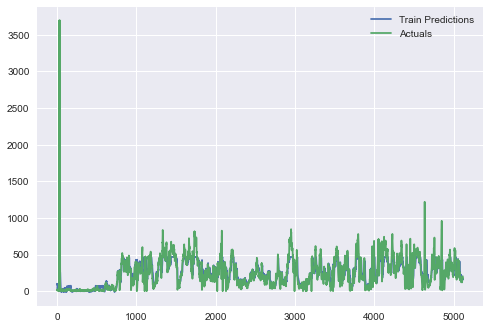

In [30]:
model = load_model('5H_Forecast/5H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(5,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

### 6 hours forecast

In [31]:
%%time

Trainer(6,6,12)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 5s 17ms/step - loss: 111401.0156 - mean_absolute_error: 249.0002 - val_loss: 150843.3438 - val_mean_absolute_error: 334.4789
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 10ms/step - loss: 110726.1641 - mean_absolute_error: 247.5843 - val_loss: 149760.0312 - val_mean_absolute_error: 332.6725
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 1s 7ms/step - loss: 109687.9609 - mean_absolute_error: 245.4640 - val_loss: 148064.4062 - val_mean_absolute_error: 329.9311
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 7ms/step - loss: 108047.2344 - mean_absolute_error: 242.2556 - val_loss: 145476.0312 - val_mean_absolute_error: 326.1424
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 7ms/step - loss: 106183.3828 - mean_absolute_error: 238.9120 - val_loss: 142843.6406 - val_mean_absolute_error: 322.2685
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 8ms/step - loss: 104424.5703 - mean_absolute_error: 235.7294 - val_loss: 140776.0000 - val_mean_absolute_error: 319.1374
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 2s 11ms/step - loss: 103112.9297 - mean_absolute_error: 233.3780 - val_loss: 139113.0000 - val_mean_absolute_error: 316.5212
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 1s 7ms/step - loss: 101954.1562 - mean_absolute_error: 231.2677 - val_loss: 137588.6250 - val_mean_absolute_error: 314.0705
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 8ms/step - loss: 100757.2500 - mean_absolute_error: 229.1313 - val_loss: 135855.6719 - val_mean_absolute_error: 311.3189
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 10ms/step - loss: 99556.9453 - mean_absolute_error: 227.0270 - val_loss: 134244.3125 - val_mean_absolute_error: 308.7287
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 11ms/step - loss: 98355.5938 - mean_absolute_error: 224.9166 - val_loss: 132554.7188 - val_mean_absolute_error: 306.0243
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 1s 9ms/step - loss: 97073.6875 - mean_absolute_error: 222.6946 - val_loss: 130769.4688 - val_mean_absolute_error: 303.1919
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 3s 19ms/step - loss: 95716.1719 - mean_absolute_error: 220.2823 - val_loss: 128746.6953 - val_mean_absolute_error: 299.8916
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 11ms/step - loss: 94421.9375 - mean_absolute_error: 218.0662 - val_loss: 127082.2422 - val_mean_absolute_error: 297.1512
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 1s 9ms/step - loss: 93244.5625 - mean_absolute_error: 215.9427 - val_loss: 125435.5312 - val_mean_absolute_error: 294.4132
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 1s 9ms/step - loss: 92070.9766 - mean_absolute_error: 213.8422 - val_loss: 123776.5703 - val_mean_absolute_error: 291.6324
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 2s 10ms/step - loss: 90896.9297 - mean_absolute_error: 211.7399 - val_loss: 122123.7266 - val_mean_absolute_error: 288.8279
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 2s 10ms/step - loss: 89653.7812 - mean_absolute_error: 209.5404 - val_loss: 120311.5469 - val_mean_absolute_error: 285.7543
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 88415.1719 - mean_absolute_error: 207.3451 - val_loss: 118600.3438 - val_mean_absolute_error: 282.8300
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 14ms/step - loss: 87200.6641 - mean_absolute_error: 205.2366 - val_loss: 116882.5000 - val_mean_absolute_error: 279.8867
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 3s 16ms/step - loss: 86002.1094 - mean_absolute_error: 203.0780 - val_loss: 115158.7109 - val_mean_absolute_error: 276.9309
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 13ms/step - loss: 84815.9688 - mean_absolute_error: 201.1095 - val_loss: 113464.9062 - val_mean_absolute_error: 274.0221
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 1s 8ms/step - loss: 83604.2734 - mean_absolute_error: 198.9536 - val_loss: 111733.8516 - val_mean_absolute_error: 271.0249
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 14ms/step - loss: 82409.8594 - mean_absolute_error: 196.7493 - val_loss: 110155.3047 - val_mean_absolute_error: 268.1928
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 11ms/step - loss: 81224.6172 - mean_absolute_error: 194.6414 - val_loss: 108304.0547 - val_mean_absolute_error: 265.0800
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 1s 7ms/step - loss: 80024.1250 - mean_absolute_error: 192.4627 - val_loss: 106596.6016 - val_mean_absolute_error: 262.1340
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 1s 7ms/step - loss: 78845.7188 - mean_absolute_error: 190.3256 - val_loss: 104894.9531 - val_mean_absolute_error: 259.2043
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 1s 7ms/step - loss: 77688.9219 - mean_absolute_error: 188.3173 - val_loss: 103203.1250 - val_mean_absolute_error: 256.2912
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 1s 7ms/step - loss: 76487.6250 - mean_absolute_error: 186.0130 - val_loss: 101459.9375 - val_mean_absolute_error: 253.3128
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 12ms/step - loss: 75334.8359 - mean_absolute_error: 183.9189 - val_loss: 99774.2578 - val_mean_absolute_error: 250.4550
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 1s 8ms/step - loss: 74166.6719 - mean_absolute_error: 181.7666 - val_loss: 98073.1875 - val_mean_absolute_error: 247.6221
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 1s 8ms/step - loss: 73016.2031 - mean_absolute_error: 179.7029 - val_loss: 96416.0078 - val_mean_absolute_error: 244.8425
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 71890.1953 - mean_absolute_error: 177.8027 - val_loss: 94716.0078 - val_mean_absolute_error: 242.0427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 1s 9ms/step - loss: 70730.7266 - mean_absolute_error: 175.6057 - val_loss: 93043.7812 - val_mean_absolute_error: 239.2737
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 7ms/step - loss: 69594.0938 - mean_absolute_error: 173.5392 - val_loss: 91329.2969 - val_mean_absolute_error: 236.4694
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 8ms/step - loss: 68483.8438 - mean_absolute_error: 171.6870 - val_loss: 89682.6641 - val_mean_absolute_error: 233.7548
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 8ms/step - loss: 67375.7266 - mean_absolute_error: 169.2596 - val_loss: 88044.3594 - val_mean_absolute_error: 231.0187
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 1s 7ms/step - loss: 66274.9922 - mean_absolute_error: 167.7427 - val_loss: 86415.7188 - val_mean_absolute_error: 228.3005
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 7ms/step - loss: 65174.3398 - mean_absolute_error: 165.4292 - val_loss: 84807.4062 - val_mean_absolute_error: 225.5785
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 7ms/step - loss: 64087.1953 - mean_absolute_error: 163.4657 - val_loss: 82928.4141 - val_mean_absolute_error: 222.4170
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 8ms/step - loss: 62871.6016 - mean_absolute_error: 161.1220 - val_loss: 81249.3047 - val_mean_absolute_error: 219.5387
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 2s 11ms/step - loss: 61814.6758 - mean_absolute_error: 158.9977 - val_loss: 79621.3359 - val_mean_absolute_error: 216.7669
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 60769.7930 - mean_absolute_error: 156.6804 - val_loss: 78040.2969 - val_mean_absolute_error: 214.0548
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 59715.6055 - mean_absolute_error: 155.2360 - val_loss: 76589.3594 - val_mean_absolute_error: 211.3878
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 1s 9ms/step - loss: 58683.6016 - mean_absolute_error: 152.8700 - val_loss: 74941.5000 - val_mean_absolute_error: 208.5016
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 1s 7ms/step - loss: 57673.4688 - mean_absolute_error: 151.0192 - val_loss: 73439.0156 - val_mean_absolute_error: 205.8137
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 7ms/step - loss: 56709.3359 - mean_absolute_error: 149.1228 - val_loss: 71902.1094 - val_mean_absolute_error: 203.1469
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 1s 7ms/step - loss: 55751.5352 - mean_absolute_error: 147.0908 - val_loss: 70448.7422 - val_mean_absolute_error: 200.5563
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 1s 7ms/step - loss: 54793.9062 - mean_absolute_error: 144.9057 - val_loss: 68994.7812 - val_mean_absolute_error: 198.0143
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 1s 8ms/step - loss: 53840.9297 - mean_absolute_error: 143.1979 - val_loss: 67565.3750 - val_mean_absolute_error: 195.3720
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 7ms/step - loss: 52927.2109 - mean_absolute_error: 140.8631 - val_loss: 66031.7969 - val_mean_absolute_error: 192.9089
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 51963.3242 - mean_absolute_error: 139.5512 - val_loss: 64489.2109 - val_mean_absolute_error: 189.9826
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 9ms/step - loss: 51019.2891 - mean_absolute_error: 137.2751 - val_loss: 63084.1133 - val_mean_absolute_error: 187.5854
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 9ms/step - loss: 50128.2109 - mean_absolute_error: 135.3301 - val_loss: 61653.3477 - val_mean_absolute_error: 184.9215
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 9ms/step - loss: 49267.6133 - mean_absolute_error: 133.7803 - val_loss: 60294.0781 - val_mean_absolute_error: 182.4682
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 1s 8ms/step - loss: 48465.3242 - mean_absolute_error: 132.0876 - val_loss: 59025.2461 - val_mean_absolute_error: 180.2453
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 1s 7ms/step - loss: 47614.5000 - mean_absolute_error: 130.3116 - val_loss: 57732.5430 - val_mean_absolute_error: 178.0541
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 1s 7ms/step - loss: 46811.9805 - mean_absolute_error: 128.2874 - val_loss: 56340.8984 - val_mean_absolute_error: 175.7578
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 8ms/step - loss: 46035.8867 - mean_absolute_error: 127.1566 - val_loss: 55193.1953 - val_mean_absolute_error: 173.8451
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 7ms/step - loss: 45263.5156 - mean_absolute_error: 125.0754 - val_loss: 54055.9102 - val_mean_absolute_error: 171.7994
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 1s 8ms/step - loss: 44529.1250 - mean_absolute_error: 124.0099 - val_loss: 52709.6094 - val_mean_absolute_error: 169.6697
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 1s 8ms/step - loss: 43796.3164 - mean_absolute_error: 122.3229 - val_loss: 51556.1250 - val_mean_absolute_error: 167.6847
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 1s 7ms/step - loss: 43119.4961 - mean_absolute_error: 120.7270 - val_loss: 50375.2266 - val_mean_absolute_error: 165.7995
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 1s 8ms/step - loss: 42438.3438 - mean_absolute_error: 119.4850 - val_loss: 49186.7539 - val_mean_absolute_error: 163.6423
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 1s 7ms/step - loss: 41805.2344 - mean_absolute_error: 118.2753 - val_loss: 48258.6211 - val_mean_absolute_error: 162.0108
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 7ms/step - loss: 41164.9727 - mean_absolute_error: 117.1118 - val_loss: 47166.5742 - val_mean_absolute_error: 160.0410
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 9ms/step - loss: 40525.7461 - mean_absolute_error: 115.5594 - val_loss: 46033.3281 - val_mean_absolute_error: 158.2832
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 1s 7ms/step - loss: 39954.0547 - mean_absolute_error: 114.5801 - val_loss: 45236.5820 - val_mean_absolute_error: 156.8676
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 1s 7ms/step - loss: 39386.9258 - mean_absolute_error: 113.4219 - val_loss: 43989.4648 - val_mean_absolute_error: 154.7920
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 1s 7ms/step - loss: 38819.3477 - mean_absolute_error: 111.9567 - val_loss: 43182.9219 - val_mean_absolute_error: 153.3314
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 1s 7ms/step - loss: 38251.0664 - mean_absolute_error: 110.9734 - val_loss: 42147.7109 - val_mean_absolute_error: 151.5903
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 1s 7ms/step - loss: 37726.0039 - mean_absolute_error: 109.7750 - val_loss: 41143.1602 - val_mean_absolute_error: 149.6111
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 1s 8ms/step - loss: 37231.4883 - mean_absolute_error: 108.7993 - val_loss: 40357.3633 - val_mean_absolute_error: 148.1029
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 36741.1914 - mean_absolute_error: 107.9874 - val_loss: 39443.3125 - val_mean_absolute_error: 146.2447
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 2s 11ms/step - loss: 36279.1094 - mean_absolute_error: 106.4655 - val_loss: 38683.3828 - val_mean_absolute_error: 144.7788
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 11ms/step - loss: 35842.9336 - mean_absolute_error: 105.7722 - val_loss: 37816.9570 - val_mean_absolute_error: 143.0527
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 2s 12ms/step - loss: 35380.3359 - mean_absolute_error: 104.4987 - val_loss: 37148.0352 - val_mean_absolute_error: 141.5487
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 2s 12ms/step - loss: 34921.1680 - mean_absolute_error: 103.8976 - val_loss: 35962.8359 - val_mean_absolute_error: 139.4223
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 2s 13ms/step - loss: 34534.5938 - mean_absolute_error: 102.7597 - val_loss: 35421.1172 - val_mean_absolute_error: 138.0230
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 12ms/step - loss: 34149.7383 - mean_absolute_error: 101.9315 - val_loss: 34580.5508 - val_mean_absolute_error: 136.4984
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 2s 14ms/step - loss: 33729.3984 - mean_absolute_error: 101.0678 - val_loss: 33806.4102 - val_mean_absolute_error: 134.8416
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 3s 16ms/step - loss: 33339.7617 - mean_absolute_error: 100.1101 - val_loss: 33118.3750 - val_mean_absolute_error: 133.5915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 1s 9ms/step - loss: 33004.5469 - mean_absolute_error: 99.0956 - val_loss: 32509.3457 - val_mean_absolute_error: 131.9472
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 1s 9ms/step - loss: 32668.5098 - mean_absolute_error: 98.3883 - val_loss: 31744.4375 - val_mean_absolute_error: 130.3889
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 2s 11ms/step - loss: 32317.2324 - mean_absolute_error: 97.5678 - val_loss: 31249.6523 - val_mean_absolute_error: 129.1464
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 11ms/step - loss: 31976.3633 - mean_absolute_error: 97.0950 - val_loss: 30543.1367 - val_mean_absolute_error: 127.4301
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 1s 8ms/step - loss: 31672.4258 - mean_absolute_error: 96.2844 - val_loss: 29950.8516 - val_mean_absolute_error: 125.9719
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 31433.2363 - mean_absolute_error: 95.6378 - val_loss: 29359.3359 - val_mean_absolute_error: 124.7570
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 1s 9ms/step - loss: 31121.4746 - mean_absolute_error: 95.0895 - val_loss: 28713.2754 - val_mean_absolute_error: 123.4579
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 1s 8ms/step - loss: 30847.2031 - mean_absolute_error: 94.3698 - val_loss: 28257.2090 - val_mean_absolute_error: 122.2040
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 30587.5156 - mean_absolute_error: 93.7139 - val_loss: 27844.6895 - val_mean_absolute_error: 121.6320
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 2s 10ms/step - loss: 30364.4844 - mean_absolute_error: 93.3797 - val_loss: 27179.2969 - val_mean_absolute_error: 119.9611
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 10ms/step - loss: 30134.2891 - mean_absolute_error: 92.7839 - val_loss: 26865.0781 - val_mean_absolute_error: 119.0053
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 29925.7734 - mean_absolute_error: 92.3078 - val_loss: 26181.7930 - val_mean_absolute_error: 117.5925
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 29646.8125 - mean_absolute_error: 91.6248 - val_loss: 25697.4707 - val_mean_absolute_error: 116.0036
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 15ms/step - loss: 29421.9844 - mean_absolute_error: 90.9395 - val_loss: 25274.1582 - val_mean_absolute_error: 114.8571
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 8ms/step - loss: 29215.5215 - mean_absolute_error: 90.2729 - val_loss: 24854.7539 - val_mean_absolute_error: 113.8857
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 98/100
161/161 [==============================] - 2s 11ms/step - loss: 29020.5449 - mean_absolute_error: 89.7000 - val_loss: 24470.9980 - val_mean_absolute_error: 113.2613
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 2s 13ms/step - loss: 28860.1660 - mean_absolute_error: 89.5602 - val_loss: 24116.2148 - val_mean_absolute_error: 111.8673
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 2s 9ms/step - loss: 28658.6426 - mean_absolute_error: 88.8228 - val_loss: 23765.0469 - val_mean_absolute_error: 111.1602
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_76 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
161/161 [==============================] - 7s 17ms/step - loss: 111254.7734 - mean_absolute_error: 248.6891 - val_loss: 150564.5156 - val_mean_absolute_error: 334.0063
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
161/161 [==============================] - 2s 14ms/step - loss: 110527.2734 - mean_absolute_error: 247.2001 - val_loss: 149488.5000 - val_mean_absolute_error: 332.2486
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
161/161 [==============================] - 2s 11ms/step - loss: 109465.4219 - mean_absolute_error: 245.1001 - val_loss: 147772.3594 - val_mean_absolute_error: 329.5933
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
161/161 [==============================] - 1s 9ms/step - loss: 107994.7109 - mean_absolute_error: 242.3007 - val_loss: 145505.2500 - val_mean_absolute_error: 326.2150
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
161/161 [==============================] - 1s 9ms/step - loss: 106359.3047 - mean_absolute_error: 239.2409 - val_loss: 143297.0000 - val_mean_absolute_error: 322.8642
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
161/161 [==============================] - 1s 9ms/step - loss: 104779.8125 - mean_absolute_error: 236.3358 - val_loss: 141244.6094 - val_mean_absolute_error: 319.7791
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
161/161 [==============================] - 1s 9ms/step - loss: 103288.3438 - mean_absolute_error: 233.6637 - val_loss: 139047.3125 - val_mean_absolute_error: 316.3206
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
161/161 [==============================] - 2s 10ms/step - loss: 101598.7656 - mean_absolute_error: 230.5938 - val_loss: 136646.1875 - val_mean_absolute_error: 312.5675
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
161/161 [==============================] - 1s 9ms/step - loss: 99919.5859 - mean_absolute_error: 227.6382 - val_loss: 134314.2031 - val_mean_absolute_error: 308.8724
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
161/161 [==============================] - 2s 11ms/step - loss: 98250.9219 - mean_absolute_error: 224.6524 - val_loss: 131999.9688 - val_mean_absolute_error: 305.1571
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
161/161 [==============================] - 2s 10ms/step - loss: 96616.6562 - mean_absolute_error: 221.7734 - val_loss: 129822.0234 - val_mean_absolute_error: 301.6191
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
161/161 [==============================] - 3s 19ms/step - loss: 95024.4609 - mean_absolute_error: 219.0244 - val_loss: 127437.7422 - val_mean_absolute_error: 297.7048
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
161/161 [==============================] - 2s 11ms/step - loss: 93330.0938 - mean_absolute_error: 216.0201 - val_loss: 125210.8203 - val_mean_absolute_error: 294.0047
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
161/161 [==============================] - 2s 11ms/step - loss: 91698.2344 - mean_absolute_error: 213.1392 - val_loss: 122643.8750 - val_mean_absolute_error: 289.7215
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
161/161 [==============================] - 2s 9ms/step - loss: 89834.1406 - mean_absolute_error: 209.6727 - val_loss: 120178.7734 - val_mean_absolute_error: 285.5017
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
161/161 [==============================] - 2s 10ms/step - loss: 88109.7656 - mean_absolute_error: 206.7300 - val_loss: 117751.8828 - val_mean_absolute_error: 281.3482
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
161/161 [==============================] - 1s 9ms/step - loss: 86416.8516 - mean_absolute_error: 203.7114 - val_loss: 115350.5156 - val_mean_absolute_error: 277.2310
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
161/161 [==============================] - 1s 9ms/step - loss: 84738.8047 - mean_absolute_error: 200.7491 - val_loss: 112949.6406 - val_mean_absolute_error: 273.1005
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
161/161 [==============================] - 2s 10ms/step - loss: 83063.2812 - mean_absolute_error: 197.5958 - val_loss: 110522.3359 - val_mean_absolute_error: 268.9003
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
161/161 [==============================] - 2s 10ms/step - loss: 81377.7578 - mean_absolute_error: 194.9371 - val_loss: 108129.9375 - val_mean_absolute_error: 264.7458
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
161/161 [==============================] - 2s 10ms/step - loss: 79724.1250 - mean_absolute_error: 191.7621 - val_loss: 105727.0781 - val_mean_absolute_error: 260.5898
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
161/161 [==============================] - 2s 11ms/step - loss: 78052.8672 - mean_absolute_error: 188.8745 - val_loss: 103332.3750 - val_mean_absolute_error: 256.4823
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
161/161 [==============================] - 2s 11ms/step - loss: 76375.3203 - mean_absolute_error: 185.6375 - val_loss: 100823.5078 - val_mean_absolute_error: 252.2079
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
161/161 [==============================] - 2s 11ms/step - loss: 74666.0078 - mean_absolute_error: 182.9995 - val_loss: 98370.7266 - val_mean_absolute_error: 248.1022
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
161/161 [==============================] - 2s 10ms/step - loss: 73008.0156 - mean_absolute_error: 179.8161 - val_loss: 95927.0312 - val_mean_absolute_error: 244.0308
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
161/161 [==============================] - 2s 10ms/step - loss: 71366.5234 - mean_absolute_error: 176.8990 - val_loss: 93513.3359 - val_mean_absolute_error: 240.0505
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
161/161 [==============================] - 2s 10ms/step - loss: 69729.2812 - mean_absolute_error: 173.6213 - val_loss: 91021.9844 - val_mean_absolute_error: 235.8323
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
161/161 [==============================] - 2s 11ms/step - loss: 67895.1016 - mean_absolute_error: 170.6220 - val_loss: 88317.2266 - val_mean_absolute_error: 231.4194
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
161/161 [==============================] - 2s 12ms/step - loss: 66270.3281 - mean_absolute_error: 167.4660 - val_loss: 85946.0781 - val_mean_absolute_error: 227.4986
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
161/161 [==============================] - 2s 9ms/step - loss: 64706.8867 - mean_absolute_error: 164.5419 - val_loss: 83622.6016 - val_mean_absolute_error: 223.6015
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
161/161 [==============================] - 2s 10ms/step - loss: 63194.6016 - mean_absolute_error: 161.6031 - val_loss: 81384.3203 - val_mean_absolute_error: 219.8223
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
161/161 [==============================] - 2s 10ms/step - loss: 61732.8320 - mean_absolute_error: 158.7840 - val_loss: 79141.9062 - val_mean_absolute_error: 215.9695
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
161/161 [==============================] - 1s 9ms/step - loss: 60283.1445 - mean_absolute_error: 156.2062 - val_loss: 76946.1641 - val_mean_absolute_error: 212.1619
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
161/161 [==============================] - 2s 13ms/step - loss: 58877.1562 - mean_absolute_error: 153.1395 - val_loss: 74783.2422 - val_mean_absolute_error: 208.4398
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
161/161 [==============================] - 1s 9ms/step - loss: 57499.6875 - mean_absolute_error: 150.7636 - val_loss: 72674.1875 - val_mean_absolute_error: 204.6719
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
161/161 [==============================] - 1s 9ms/step - loss: 56160.0117 - mean_absolute_error: 148.2480 - val_loss: 70614.0703 - val_mean_absolute_error: 201.0197
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
161/161 [==============================] - 1s 9ms/step - loss: 54845.8125 - mean_absolute_error: 145.7645 - val_loss: 68620.4688 - val_mean_absolute_error: 197.6339
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
161/161 [==============================] - 2s 10ms/step - loss: 53594.2188 - mean_absolute_error: 142.8557 - val_loss: 66662.1797 - val_mean_absolute_error: 194.2594
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
161/161 [==============================] - 1s 9ms/step - loss: 52353.9023 - mean_absolute_error: 140.8773 - val_loss: 64734.4844 - val_mean_absolute_error: 190.9038
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
161/161 [==============================] - 1s 9ms/step - loss: 51163.2695 - mean_absolute_error: 137.7808 - val_loss: 62754.2070 - val_mean_absolute_error: 187.5642
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
161/161 [==============================] - 1s 9ms/step - loss: 49936.1875 - mean_absolute_error: 136.1079 - val_loss: 60881.1484 - val_mean_absolute_error: 184.4371
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
161/161 [==============================] - 1s 8ms/step - loss: 48807.8945 - mean_absolute_error: 133.7943 - val_loss: 59108.1211 - val_mean_absolute_error: 181.4249
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
161/161 [==============================] - 1s 8ms/step - loss: 47710.4141 - mean_absolute_error: 131.4600 - val_loss: 57277.9102 - val_mean_absolute_error: 178.4751
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
161/161 [==============================] - 1s 8ms/step - loss: 46654.5469 - mean_absolute_error: 129.4793 - val_loss: 55585.6914 - val_mean_absolute_error: 175.4916
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
161/161 [==============================] - 2s 10ms/step - loss: 45634.0820 - mean_absolute_error: 127.0230 - val_loss: 53950.6406 - val_mean_absolute_error: 172.6214
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
161/161 [==============================] - 2s 13ms/step - loss: 44610.2812 - mean_absolute_error: 124.9394 - val_loss: 52293.5195 - val_mean_absolute_error: 169.9125
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
161/161 [==============================] - 1s 9ms/step - loss: 43651.4883 - mean_absolute_error: 123.0490 - val_loss: 50721.7617 - val_mean_absolute_error: 167.3355
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
161/161 [==============================] - 2s 10ms/step - loss: 42770.9531 - mean_absolute_error: 121.1034 - val_loss: 49225.9062 - val_mean_absolute_error: 165.2200
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
161/161 [==============================] - 2s 11ms/step - loss: 41914.2070 - mean_absolute_error: 119.6437 - val_loss: 47798.9375 - val_mean_absolute_error: 162.7595
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
161/161 [==============================] - 2s 12ms/step - loss: 41080.7930 - mean_absolute_error: 118.1219 - val_loss: 46427.0742 - val_mean_absolute_error: 160.5387
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
161/161 [==============================] - 1s 9ms/step - loss: 40301.9727 - mean_absolute_error: 116.4359 - val_loss: 45141.9805 - val_mean_absolute_error: 158.2031
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
161/161 [==============================] - 1s 8ms/step - loss: 39554.3477 - mean_absolute_error: 114.3352 - val_loss: 43713.7031 - val_mean_absolute_error: 155.6873
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
161/161 [==============================] - 1s 8ms/step - loss: 38813.0078 - mean_absolute_error: 113.1687 - val_loss: 42502.5273 - val_mean_absolute_error: 153.4546
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
161/161 [==============================] - 1s 8ms/step - loss: 38146.5039 - mean_absolute_error: 111.5275 - val_loss: 41271.7266 - val_mean_absolute_error: 151.0345
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
161/161 [==============================] - 2s 11ms/step - loss: 37487.2656 - mean_absolute_error: 110.4755 - val_loss: 39966.4727 - val_mean_absolute_error: 148.4822
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
161/161 [==============================] - 2s 12ms/step - loss: 36813.0625 - mean_absolute_error: 108.4285 - val_loss: 38906.6836 - val_mean_absolute_error: 146.4479
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
161/161 [==============================] - 2s 13ms/step - loss: 36188.0273 - mean_absolute_error: 106.9416 - val_loss: 37739.7305 - val_mean_absolute_error: 143.9275
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
161/161 [==============================] - 2s 12ms/step - loss: 35585.9375 - mean_absolute_error: 105.7822 - val_loss: 36750.9844 - val_mean_absolute_error: 141.9046
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
161/161 [==============================] - 1s 9ms/step - loss: 35064.3945 - mean_absolute_error: 104.6981 - val_loss: 35751.7031 - val_mean_absolute_error: 140.1663
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
161/161 [==============================] - 1s 9ms/step - loss: 34523.7656 - mean_absolute_error: 103.6789 - val_loss: 34748.3789 - val_mean_absolute_error: 138.2230
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
161/161 [==============================] - 2s 10ms/step - loss: 34052.1211 - mean_absolute_error: 102.8914 - val_loss: 33883.8516 - val_mean_absolute_error: 136.2447
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
161/161 [==============================] - 2s 10ms/step - loss: 33594.4570 - mean_absolute_error: 101.8392 - val_loss: 33083.9219 - val_mean_absolute_error: 134.6491
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
161/161 [==============================] - 2s 14ms/step - loss: 33131.0352 - mean_absolute_error: 101.0404 - val_loss: 32254.0762 - val_mean_absolute_error: 132.9170
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
161/161 [==============================] - 2s 10ms/step - loss: 32742.9453 - mean_absolute_error: 99.8819 - val_loss: 31397.2070 - val_mean_absolute_error: 130.9764
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
161/161 [==============================] - 2s 10ms/step - loss: 32319.5312 - mean_absolute_error: 99.3010 - val_loss: 30606.3691 - val_mean_absolute_error: 129.2502
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
161/161 [==============================] - 1s 9ms/step - loss: 31939.7773 - mean_absolute_error: 98.1053 - val_loss: 29748.0566 - val_mean_absolute_error: 127.5453
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
161/161 [==============================] - 1s 8ms/step - loss: 31577.3047 - mean_absolute_error: 97.4926 - val_loss: 29212.5488 - val_mean_absolute_error: 126.1021
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
161/161 [==============================] - 2s 9ms/step - loss: 31239.7168 - mean_absolute_error: 97.0473 - val_loss: 28654.9355 - val_mean_absolute_error: 124.7191
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
161/161 [==============================] - 2s 13ms/step - loss: 30983.9238 - mean_absolute_error: 96.0599 - val_loss: 27949.6230 - val_mean_absolute_error: 123.2148
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
161/161 [==============================] - 2s 14ms/step - loss: 30641.0254 - mean_absolute_error: 95.4758 - val_loss: 27272.2461 - val_mean_absolute_error: 121.9702
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
161/161 [==============================] - 3s 17ms/step - loss: 30381.3652 - mean_absolute_error: 95.0945 - val_loss: 26678.8184 - val_mean_absolute_error: 120.4449
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
161/161 [==============================] - 2s 15ms/step - loss: 30123.6875 - mean_absolute_error: 94.2767 - val_loss: 26129.3770 - val_mean_absolute_error: 119.2648
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
161/161 [==============================] - 2s 15ms/step - loss: 29908.2832 - mean_absolute_error: 93.8540 - val_loss: 25663.7051 - val_mean_absolute_error: 118.0609
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
161/161 [==============================] - 1s 8ms/step - loss: 29665.1621 - mean_absolute_error: 93.3145 - val_loss: 25383.6992 - val_mean_absolute_error: 117.2166
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
161/161 [==============================] - 1s 9ms/step - loss: 29438.5254 - mean_absolute_error: 92.6290 - val_loss: 24804.6934 - val_mean_absolute_error: 115.8457
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 76/100
161/161 [==============================] - 2s 10ms/step - loss: 29221.7207 - mean_absolute_error: 92.1349 - val_loss: 24357.4570 - val_mean_absolute_error: 114.5785
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
161/161 [==============================] - 1s 9ms/step - loss: 28974.0625 - mean_absolute_error: 91.6390 - val_loss: 23748.0840 - val_mean_absolute_error: 112.7518
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
161/161 [==============================] - 1s 9ms/step - loss: 28776.1992 - mean_absolute_error: 90.8872 - val_loss: 23233.8535 - val_mean_absolute_error: 111.2449
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 79/100
161/161 [==============================] - 3s 17ms/step - loss: 28560.1660 - mean_absolute_error: 90.0565 - val_loss: 23053.1055 - val_mean_absolute_error: 110.6809
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
161/161 [==============================] - 2s 10ms/step - loss: 28370.5996 - mean_absolute_error: 89.5471 - val_loss: 22553.2793 - val_mean_absolute_error: 109.5105
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
161/161 [==============================] - 1s 8ms/step - loss: 28221.2598 - mean_absolute_error: 89.1868 - val_loss: 22065.5273 - val_mean_absolute_error: 108.3762
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 82/100
161/161 [==============================] - 2s 10ms/step - loss: 28076.6543 - mean_absolute_error: 88.5657 - val_loss: 21960.0469 - val_mean_absolute_error: 107.7646
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
161/161 [==============================] - 2s 12ms/step - loss: 27886.6699 - mean_absolute_error: 88.0535 - val_loss: 21538.9902 - val_mean_absolute_error: 106.5984
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
161/161 [==============================] - 2s 11ms/step - loss: 27727.2500 - mean_absolute_error: 87.3719 - val_loss: 21338.3574 - val_mean_absolute_error: 105.9846
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
161/161 [==============================] - 1s 9ms/step - loss: 27594.9766 - mean_absolute_error: 87.1239 - val_loss: 21155.1445 - val_mean_absolute_error: 105.5193
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
161/161 [==============================] - 2s 11ms/step - loss: 27450.2422 - mean_absolute_error: 86.7620 - val_loss: 20877.2129 - val_mean_absolute_error: 104.6912
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
161/161 [==============================] - 2s 11ms/step - loss: 27383.7109 - mean_absolute_error: 86.2685 - val_loss: 20507.3984 - val_mean_absolute_error: 103.7195
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 88/100
161/161 [==============================] - 1s 9ms/step - loss: 27215.2090 - mean_absolute_error: 85.7311 - val_loss: 20343.2305 - val_mean_absolute_error: 103.2464
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
161/161 [==============================] - 2s 9ms/step - loss: 27137.1211 - mean_absolute_error: 85.6689 - val_loss: 20145.9980 - val_mean_absolute_error: 102.6417
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
161/161 [==============================] - 2s 10ms/step - loss: 27004.9941 - mean_absolute_error: 85.2809 - val_loss: 20167.6953 - val_mean_absolute_error: 102.6171
Epoch 91/100
161/161 [==============================] - 2s 10ms/step - loss: 26919.2148 - mean_absolute_error: 84.8138 - val_loss: 20038.7227 - val_mean_absolute_error: 102.0917
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 92/100
161/161 [==============================] - 1s 8ms/step - loss: 26838.4238 - mean_absolute_error: 84.1622 - val_loss: 19435.3535 - val_mean_absolute_error: 100.7543
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 93/100
161/161 [==============================] - 2s 11ms/step - loss: 26732.9160 - mean_absolute_error: 84.0863 - val_loss: 19725.8027 - val_mean_absolute_error: 101.1850
Epoch 94/100
161/161 [==============================] - 1s 9ms/step - loss: 26640.5371 - mean_absolute_error: 83.7477 - val_loss: 19317.7031 - val_mean_absolute_error: 100.2102
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 95/100
161/161 [==============================] - 2s 10ms/step - loss: 26581.9512 - mean_absolute_error: 83.7098 - val_loss: 19133.7637 - val_mean_absolute_error: 99.6257
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
161/161 [==============================] - 2s 9ms/step - loss: 26512.7383 - mean_absolute_error: 83.2423 - val_loss: 19007.8242 - val_mean_absolute_error: 99.4401
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
161/161 [==============================] - 1s 9ms/step - loss: 26451.2891 - mean_absolute_error: 83.0856 - val_loss: 19251.0566 - val_mean_absolute_error: 99.6682
Epoch 98/100
161/161 [==============================] - 1s 9ms/step - loss: 26364.6816 - mean_absolute_error: 82.6725 - val_loss: 18763.1348 - val_mean_absolute_error: 98.6357
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 99/100
161/161 [==============================] - 1s 9ms/step - loss: 26298.9395 - mean_absolute_error: 82.7224 - val_loss: 18588.1074 - val_mean_absolute_error: 97.8845
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
161/161 [==============================] - 1s 8ms/step - loss: 26269.7070 - mean_absolute_error: 82.2467 - val_loss: 18725.8945 - val_mean_absolute_error: 98.3680

-----------------------------------------------------------------------------------------------------------

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_78 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 11ms/step - loss: 111831.7344 - me

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 111604.7500 - mean_absolute_error: 249.4192 - val_loss: 151313.2188 - val_mean_absolute_error: 335.2238
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 1s 8ms/step - loss: 111390.1719 - mean_absolute_error: 248.9724 - val_loss: 150997.4531 - val_mean_absolute_error: 334.7147
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 111055.3516 - mean_absolute_error: 248.3168 - val_loss: 150423.8281 - val_mean_absolute_error: 333.8491
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 10ms/step - loss: 110592.5391 - mean_absolute_error: 247.4167 - val_loss: 149770.9062 - val_mean_absolute_error: 332.8638
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 110100.4766 - mean_absolute_error: 246.4407 - val_loss: 149073.5938 - val_mean_absolute_error: 331.7683
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 10ms/step - loss: 109454.6641 - mean_absolute_error: 245.1178 - val_loss: 148028.9844 - val_mean_absolute_error: 330.1611
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 1s 8ms/step - loss: 108599.3516 - mean_absolute_error: 243.4897 - val_loss: 146872.2656 - val_mean_absolute_error: 328.4644
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 1s 8ms/step - loss: 107775.3750 - mean_absolute_error: 241.9239 - val_loss: 145727.3750 - val_mean_absolute_error: 326.7209
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 1s 8ms/step - loss: 106913.4219 - mean_absolute_error: 240.3104 - val_loss: 144547.9688 - val_mean_absolute_error: 324.9311
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 1s 8ms/step - loss: 106052.0391 - mean_absolute_error: 238.7325 - val_loss: 143244.3125 - val_mean_absolute_error: 322.9355
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - ETA: 0s - loss: 105041.7109 - mean_absolute_error: 236.54 - 1s 8ms/step - loss: 105118.6484 - mean_absolute_error: 237.0542 - val_loss: 142082.6875 - val_mean_absolute_error: 321.1459
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 1s 8ms/step - loss: 104258.1719 - mean_absolute_error: 235.5037 - val_loss: 140843.2500 - val_mean_absolute_error: 319.2151
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 1s 8ms/step - loss: 103363.5469 - mean_absolute_error: 233.9185 - val_loss: 139649.1094 - val_mean_absolute_error: 317.3458
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 1s 9ms/step - loss: 102480.0703 - mean_absolute_error: 232.3673 - val_loss: 138423.5469 - val_mean_absolute_error: 315.4195
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 101583.7656 - mean_absolute_error: 230.7873 - val_loss: 137174.5156 - val_mean_absolute_error: 313.4486
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 1s 8ms/step - loss: 100671.1328 - mean_absolute_error: 229.1540 - val_loss: 135900.9688 - val_mean_absolute_error: 311.4269
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 1s 8ms/step - loss: 99741.1172 - mean_absolute_error: 227.5371 - val_loss: 134605.9219 - val_mean_absolute_error: 309.3596
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 1s 8ms/step - loss: 98794.0781 - mean_absolute_error: 225.8646 - val_loss: 133285.4688 - val_mean_absolute_error: 307.2400
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 1s 8ms/step - loss: 97833.6875 - mean_absolute_error: 224.0583 - val_loss: 131941.2188 - val_mean_absolute_error: 305.0697
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 1s 8ms/step - loss: 96855.5000 - mean_absolute_error: 222.3556 - val_loss: 130572.7109 - val_mean_absolute_error: 302.8507
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 1s 8ms/step - loss: 95868.8281 - mean_absolute_error: 220.5828 - val_loss: 129179.6016 - val_mean_absolute_error: 300.5773
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 1s 8ms/step - loss: 94806.0781 - mean_absolute_error: 218.7251 - val_loss: 127550.2734 - val_mean_absolute_error: 297.9010
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 13ms/step - loss: 93665.9766 - mean_absolute_error: 216.7233 - val_loss: 126067.9062 - val_mean_absolute_error: 295.4435s - loss: 91918.0781 - mean_absolute_
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 11ms/step - loss: 92609.1094 - mean_absolute_error: 214.7353 - val_loss: 124574.2188 - val_mean_absolute_error: 292.9471
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 1s 9ms/step - loss: 91538.6484 - mean_absolute_error: 212.9345 - val_loss: 123095.5625 - val_mean_absolute_error: 290.4470
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 8ms/step - loss: 90466.5859 - mean_absolute_error: 210.9554 - val_loss: 121568.9766 - val_mean_absolute_error: 287.8633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 1s 9ms/step - loss: 89358.8750 - mean_absolute_error: 208.9913 - val_loss: 119853.6719 - val_mean_absolute_error: 284.9403
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 1s 9ms/step - loss: 88156.7812 - mean_absolute_error: 206.8935 - val_loss: 118260.0781 - val_mean_absolute_error: 282.2162
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 1s 8ms/step - loss: 87034.0000 - mean_absolute_error: 204.8546 - val_loss: 116671.7344 - val_mean_absolute_error: 279.4947
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 9ms/step - loss: 85912.6719 - mean_absolute_error: 202.7489 - val_loss: 115076.6875 - val_mean_absolute_error: 276.7591
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 9ms/step - loss: 84799.7656 - mean_absolute_error: 200.6745 - val_loss: 113479.6641 - val_mean_absolute_error: 274.0141
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 12ms/step - loss: 83670.0625 - mean_absolute_error: 198.9547 - val_loss: 111857.1875 - val_mean_absolute_error: 271.2133
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 9ms/step - loss: 82534.6172 - mean_absolute_error: 196.9098 - val_loss: 110257.7734 - val_mean_absolute_error: 268.4416
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 8ms/step - loss: 81418.4062 - mean_absolute_error: 194.7878 - val_loss: 108619.7266 - val_mean_absolute_error: 265.5921
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 1s 8ms/step - loss: 80290.4219 - mean_absolute_error: 192.7591 - val_loss: 106987.8281 - val_mean_absolute_error: 262.7737
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 10ms/step - loss: 79159.3984 - mean_absolute_error: 190.9198 - val_loss: 105367.5625 - val_mean_absolute_error: 259.9786
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 1s 9ms/step - loss: 78033.1484 - mean_absolute_error: 188.8565 - val_loss: 103736.0547 - val_mean_absolute_error: 257.1735
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 1s 9ms/step - loss: 76910.7344 - mean_absolute_error: 186.9058 - val_loss: 102094.6797 - val_mean_absolute_error: 254.3619
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 8ms/step - loss: 75795.5547 - mean_absolute_error: 185.0356 - val_loss: 100465.1328 - val_mean_absolute_error: 251.6001
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 1s 9ms/step - loss: 74685.4375 - mean_absolute_error: 182.9921 - val_loss: 98839.3828 - val_mean_absolute_error: 248.8820
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 73568.0234 - mean_absolute_error: 180.9912 - val_loss: 97224.5859 - val_mean_absolute_error: 246.1694
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 1s 8ms/step - loss: 72458.3281 - mean_absolute_error: 178.9231 - val_loss: 95571.4062 - val_mean_absolute_error: 243.4408
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 9ms/step - loss: 71343.5391 - mean_absolute_error: 177.0023 - val_loss: 93963.9531 - val_mean_absolute_error: 240.7994
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 1s 9ms/step - loss: 70316.6328 - mean_absolute_error: 174.7902 - val_loss: 92341.5000 - val_mean_absolute_error: 238.1376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 1s 8ms/step - loss: 69179.8438 - mean_absolute_error: 173.0388 - val_loss: 90727.8203 - val_mean_absolute_error: 235.4841
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 1s 8ms/step - loss: 68114.6328 - mean_absolute_error: 171.0333 - val_loss: 89123.5938 - val_mean_absolute_error: 232.8313
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 8ms/step - loss: 67050.8906 - mean_absolute_error: 168.8500 - val_loss: 87544.9141 - val_mean_absolute_error: 230.2268
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 9ms/step - loss: 65985.7344 - mean_absolute_error: 167.1774 - val_loss: 85974.2344 - val_mean_absolute_error: 227.6259
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 11ms/step - loss: 64933.7305 - mean_absolute_error: 165.3612 - val_loss: 84403.4844 - val_mean_absolute_error: 224.9994
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 63940.0508 - mean_absolute_error: 163.3506 - val_loss: 82859.6016 - val_mean_absolute_error: 222.3915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 10ms/step - loss: 62871.4805 - mean_absolute_error: 161.4667 - val_loss: 81325.7031 - val_mean_absolute_error: 219.8128
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 10ms/step - loss: 61870.4141 - mean_absolute_error: 159.2992 - val_loss: 79802.0547 - val_mean_absolute_error: 217.1694
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 13ms/step - loss: 60794.6875 - mean_absolute_error: 157.5372 - val_loss: 78097.9531 - val_mean_absolute_error: 214.2369
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 59699.8516 - mean_absolute_error: 155.3693 - val_loss: 76442.4062 - val_mean_absolute_error: 211.3656
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 1s 8ms/step - loss: 58676.2188 - mean_absolute_error: 153.0715 - val_loss: 74932.2891 - val_mean_absolute_error: 208.7236
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 8ms/step - loss: 57709.0234 - mean_absolute_error: 151.3218 - val_loss: 73445.9766 - val_mean_absolute_error: 206.1964
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 8ms/step - loss: 56729.0547 - mean_absolute_error: 149.7361 - val_loss: 71936.8984 - val_mean_absolute_error: 203.6109
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 8ms/step - loss: 55783.1250 - mean_absolute_error: 147.5587 - val_loss: 70487.0859 - val_mean_absolute_error: 201.0967
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 54848.8047 - mean_absolute_error: 145.4691 - val_loss: 69052.4219 - val_mean_absolute_error: 198.5633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 1s 8ms/step - loss: 53930.1445 - mean_absolute_error: 143.3659 - val_loss: 67633.9766 - val_mean_absolute_error: 196.1187
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 8ms/step - loss: 53031.9453 - mean_absolute_error: 141.7525 - val_loss: 66260.8672 - val_mean_absolute_error: 193.6872
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 12ms/step - loss: 52148.4141 - mean_absolute_error: 139.8065 - val_loss: 64848.4766 - val_mean_absolute_error: 191.2673
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 1s 7ms/step - loss: 51267.8750 - mean_absolute_error: 138.0451 - val_loss: 63470.5000 - val_mean_absolute_error: 188.8574
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 1s 8ms/step - loss: 50433.6250 - mean_absolute_error: 136.4407 - val_loss: 62128.2148 - val_mean_absolute_error: 186.5079
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 1s 8ms/step - loss: 49593.3984 - mean_absolute_error: 134.3450 - val_loss: 60749.5039 - val_mean_absolute_error: 184.2431
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 1s 8ms/step - loss: 48737.1758 - mean_absolute_error: 133.2879 - val_loss: 59438.0938 - val_mean_absolute_error: 181.8941
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 1s 8ms/step - loss: 47909.1914 - mean_absolute_error: 131.4611 - val_loss: 58174.6367 - val_mean_absolute_error: 179.6968
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 9ms/step - loss: 47118.3047 - mean_absolute_error: 129.6594 - val_loss: 56902.0273 - val_mean_absolute_error: 177.7555
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 1s 8ms/step - loss: 46354.2500 - mean_absolute_error: 128.0027 - val_loss: 55600.9375 - val_mean_absolute_error: 175.5088
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 1s 9ms/step - loss: 45622.6523 - mean_absolute_error: 126.6791 - val_loss: 54419.4062 - val_mean_absolute_error: 173.5359
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 9ms/step - loss: 44893.2422 - mean_absolute_error: 124.8150 - val_loss: 53200.6289 - val_mean_absolute_error: 171.3080
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 1s 8ms/step - loss: 44134.1289 - mean_absolute_error: 123.4607 - val_loss: 52010.6055 - val_mean_absolute_error: 169.1817
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 43436.6172 - mean_absolute_error: 121.9078 - val_loss: 50838.0938 - val_mean_absolute_error: 167.1885
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 9ms/step - loss: 42765.2383 - mean_absolute_error: 120.5280 - val_loss: 49729.7656 - val_mean_absolute_error: 165.3931
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 1s 8ms/step - loss: 42120.4922 - mean_absolute_error: 119.1591 - val_loss: 48523.6172 - val_mean_absolute_error: 163.3363
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 11ms/step - loss: 41448.2188 - mean_absolute_error: 118.2414 - val_loss: 47422.3594 - val_mean_absolute_error: 161.5596
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 8ms/step - loss: 40851.7930 - mean_absolute_error: 116.6791 - val_loss: 46395.6445 - val_mean_absolute_error: 159.9295
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 8ms/step - loss: 40211.3047 - mean_absolute_error: 115.5769 - val_loss: 45319.0000 - val_mean_absolute_error: 158.0446
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 10ms/step - loss: 39592.9492 - mean_absolute_error: 114.4209 - val_loss: 44336.3906 - val_mean_absolute_error: 156.3414
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 1s 9ms/step - loss: 39046.9258 - mean_absolute_error: 113.0653 - val_loss: 43345.0117 - val_mean_absolute_error: 154.4336
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 1s 9ms/step - loss: 38488.1016 - mean_absolute_error: 111.7798 - val_loss: 42393.7344 - val_mean_absolute_error: 153.0591
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 1s 9ms/step - loss: 37960.3398 - mean_absolute_error: 110.9668 - val_loss: 41440.5703 - val_mean_absolute_error: 151.2032
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 12ms/step - loss: 37471.4297 - mean_absolute_error: 109.7027 - val_loss: 40560.9883 - val_mean_absolute_error: 149.5146
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 10ms/step - loss: 36984.4258 - mean_absolute_error: 108.4496 - val_loss: 39609.7539 - val_mean_absolute_error: 147.8302
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 11ms/step - loss: 36503.2734 - mean_absolute_error: 107.6643 - val_loss: 38797.3359 - val_mean_absolute_error: 146.0126
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 1s 9ms/step - loss: 36047.6836 - mean_absolute_error: 106.5528 - val_loss: 37973.7031 - val_mean_absolute_error: 144.3626
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 1s 8ms/step - loss: 35583.6172 - mean_absolute_error: 105.7827 - val_loss: 37158.0742 - val_mean_absolute_error: 142.8802
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 1s 9ms/step - loss: 35195.1992 - mean_absolute_error: 104.7004 - val_loss: 36350.6016 - val_mean_absolute_error: 141.3750
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 1s 9ms/step - loss: 34793.8789 - mean_absolute_error: 104.1711 - val_loss: 35604.8008 - val_mean_absolute_error: 139.6791
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 1s 9ms/step - loss: 34364.8711 - mean_absolute_error: 103.1871 - val_loss: 34816.9648 - val_mean_absolute_error: 138.1146
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 1s 7ms/step - loss: 34042.2070 - mean_absolute_error: 102.3103 - val_loss: 34051.0234 - val_mean_absolute_error: 136.4750
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 1s 7ms/step - loss: 33646.0508 - mean_absolute_error: 101.8249 - val_loss: 33370.6016 - val_mean_absolute_error: 135.0345
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 1s 7ms/step - loss: 33298.2734 - mean_absolute_error: 100.7941 - val_loss: 32725.0703 - val_mean_absolute_error: 133.5769
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 1s 7ms/step - loss: 32943.4375 - mean_absolute_error: 99.7520 - val_loss: 32000.4961 - val_mean_absolute_error: 131.9235
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 1s 7ms/step - loss: 32590.8438 - mean_absolute_error: 99.2266 - val_loss: 31325.6289 - val_mean_absolute_error: 130.1741
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 1s 7ms/step - loss: 32285.6680 - mean_absolute_error: 98.5947 - val_loss: 30704.5508 - val_mean_absolute_error: 128.6796
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 1s 7ms/step - loss: 31996.6875 - mean_absolute_error: 97.7138 - val_loss: 30175.3887 - val_mean_absolute_error: 127.4488
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 1s 7ms/step - loss: 31699.8750 - mean_absolute_error: 97.4849 - val_loss: 29548.4688 - val_mean_absolute_error: 126.0066
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 1s 7ms/step - loss: 31426.5820 - mean_absolute_error: 96.5935 - val_loss: 28974.8730 - val_mean_absolute_error: 124.7503
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 12ms/step - loss: 111058.5391 - mean_absolute_error: 248.3372 - val_loss: 150231.7188 - val_mean_absolute_error: 333.6763
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 1s 8ms/step - loss: 110221.0547 - mean_absolute_error: 246.7108 - val_loss: 148685.8594 - val_mean_absolute_error: 331.1427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 1s 9ms/step - loss: 108792.7500 - mean_absolute_error: 243.8806 - val_loss: 146649.0000 - val_mean_absolute_error: 327.9418
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 106891.2031 - mean_absolute_error: 240.1734 - val_loss: 143576.0000 - val_mean_absolute_error: 323.1206
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 1s 9ms/step - loss: 104428.0078 - mean_absolute_error: 235.6043 - val_loss: 140088.1719 - val_mean_absolute_error: 317.8271
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 10ms/step - loss: 102166.6562 - mean_absolute_error: 231.5680 - val_loss: 137188.2500 - val_mean_absolute_error: 313.2306
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 12ms/step - loss: 99786.4922 - mean_absolute_error: 227.4802 - val_loss: 133832.6250 - val_mean_absolute_error: 308.0231
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 9ms/step - loss: 97719.7422 - mean_absolute_error: 224.0376 - val_loss: 131202.3594 - val_mean_absolute_error: 303.7718
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 1s 9ms/step - loss: 95815.6797 - mean_absolute_error: 220.5661 - val_loss: 128412.6406 - val_mean_absolute_error: 299.1488
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 10ms/step - loss: 93513.5547 - mean_absolute_error: 216.4594 - val_loss: 124907.3125 - val_mean_absolute_error: 293.3848
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 1s 8ms/step - loss: 91062.2266 - mean_absolute_error: 212.0708 - val_loss: 121618.6562 - val_mean_absolute_error: 287.8796
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 1s 7ms/step - loss: 88903.2500 - mean_absolute_error: 208.3146 - val_loss: 118693.5469 - val_mean_absolute_error: 282.9389
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 1s 8ms/step - loss: 86903.4609 - mean_absolute_error: 204.8193 - val_loss: 115900.2891 - val_mean_absolute_error: 278.1638
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 1s 8ms/step - loss: 84950.1016 - mean_absolute_error: 201.4437 - val_loss: 113134.5781 - val_mean_absolute_error: 273.4114
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 1s 8ms/step - loss: 82692.7500 - mean_absolute_error: 197.4271 - val_loss: 109581.6406 - val_mean_absolute_error: 267.2553
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 80532.3516 - mean_absolute_error: 193.3589 - val_loss: 106758.6797 - val_mean_absolute_error: 262.3690
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 10ms/step - loss: 78605.6719 - mean_absolute_error: 190.0720 - val_loss: 104002.1875 - val_mean_absolute_error: 257.6195
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 12ms/step - loss: 76726.3281 - mean_absolute_error: 186.7055 - val_loss: 101309.8984 - val_mean_absolute_error: 253.0040
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 1s 9ms/step - loss: 74893.5312 - mean_absolute_error: 183.1522 - val_loss: 98595.9766 - val_mean_absolute_error: 248.4422
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 1s 8ms/step - loss: 73051.5938 - mean_absolute_error: 180.3669 - val_loss: 95939.9375 - val_mean_absolute_error: 244.0209
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 11ms/step - loss: 71274.0625 - mean_absolute_error: 177.0184 - val_loss: 93318.3047 - val_mean_absolute_error: 239.6915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 1s 9ms/step - loss: 69494.7422 - mean_absolute_error: 173.8125 - val_loss: 90730.8672 - val_mean_absolute_error: 235.4332
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 1s 8ms/step - loss: 67776.5234 - mean_absolute_error: 170.3651 - val_loss: 88149.0547 - val_mean_absolute_error: 231.1615
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 1s 9ms/step - loss: 65975.3594 - mean_absolute_error: 167.0569 - val_loss: 85158.1562 - val_mean_absolute_error: 226.1747
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 1s 9ms/step - loss: 64004.2695 - mean_absolute_error: 163.4551 - val_loss: 82550.0469 - val_mean_absolute_error: 221.8216
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 11ms/step - loss: 62356.4336 - mean_absolute_error: 160.4214 - val_loss: 79999.0312 - val_mean_absolute_error: 217.4577
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 9ms/step - loss: 60724.9336 - mean_absolute_error: 157.2340 - val_loss: 77633.6016 - val_mean_absolute_error: 213.3878
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 1s 9ms/step - loss: 59155.1797 - mean_absolute_error: 153.7847 - val_loss: 75220.0703 - val_mean_absolute_error: 209.1759
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 1s 8ms/step - loss: 57635.8398 - mean_absolute_error: 151.1815 - val_loss: 72905.8203 - val_mean_absolute_error: 205.0934
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 1s 8ms/step - loss: 56152.2188 - mean_absolute_error: 148.2222 - val_loss: 70660.4297 - val_mean_absolute_error: 201.1451
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 8ms/step - loss: 54748.2070 - mean_absolute_error: 144.9268 - val_loss: 68334.7422 - val_mean_absolute_error: 196.8888
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 1s 8ms/step - loss: 53171.2969 - mean_absolute_error: 142.0561 - val_loss: 65869.3203 - val_mean_absolute_error: 192.6767
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 1s 8ms/step - loss: 51746.6602 - mean_absolute_error: 138.7022 - val_loss: 63647.9922 - val_mean_absolute_error: 188.6913
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 8ms/step - loss: 50388.5078 - mean_absolute_error: 136.2556 - val_loss: 61565.3906 - val_mean_absolute_error: 184.7916
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 9ms/step - loss: 49104.1953 - mean_absolute_error: 133.3476 - val_loss: 59516.0391 - val_mean_absolute_error: 181.3127
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 3s 20ms/step - loss: 47863.3594 - mean_absolute_error: 130.3171 - val_loss: 57558.3867 - val_mean_absolute_error: 177.9166
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 10ms/step - loss: 46683.5469 - mean_absolute_error: 128.5055 - val_loss: 55658.1133 - val_mean_absolute_error: 174.8004
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 11ms/step - loss: 45531.2070 - mean_absolute_error: 126.0561 - val_loss: 53777.6953 - val_mean_absolute_error: 171.5816
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 9ms/step - loss: 44437.7617 - mean_absolute_error: 123.9565 - val_loss: 51983.1055 - val_mean_absolute_error: 168.4924
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 1s 8ms/step - loss: 43399.0430 - mean_absolute_error: 121.4513 - val_loss: 50288.2383 - val_mean_absolute_error: 165.4013
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 1s 9ms/step - loss: 42414.4453 - mean_absolute_error: 120.1122 - val_loss: 48610.6719 - val_mean_absolute_error: 162.7568
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 41494.8906 - mean_absolute_error: 118.0733 - val_loss: 46999.7930 - val_mean_absolute_error: 160.0880
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 9ms/step - loss: 40573.8203 - mean_absolute_error: 116.5012 - val_loss: 45489.5391 - val_mean_absolute_error: 157.5422
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 9ms/step - loss: 39768.1680 - mean_absolute_error: 114.6735 - val_loss: 44036.0742 - val_mean_absolute_error: 155.1104
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 1s 9ms/step - loss: 38890.0195 - mean_absolute_error: 112.6782 - val_loss: 42586.2031 - val_mean_absolute_error: 152.3348
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 1s 8ms/step - loss: 38088.4609 - mean_absolute_error: 110.9851 - val_loss: 41219.1680 - val_mean_absolute_error: 149.9187
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 1s 8ms/step - loss: 37368.8047 - mean_absolute_error: 109.5159 - val_loss: 39952.2539 - val_mean_absolute_error: 147.5493
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 9ms/step - loss: 36694.9844 - mean_absolute_error: 108.0593 - val_loss: 38651.0195 - val_mean_absolute_error: 145.0500
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 9ms/step - loss: 36016.3633 - mean_absolute_error: 106.2198 - val_loss: 37530.2812 - val_mean_absolute_error: 142.7425
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 1s 9ms/step - loss: 35408.7266 - mean_absolute_error: 105.7649 - val_loss: 36296.4961 - val_mean_absolute_error: 140.4874
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 34787.4180 - mean_absolute_error: 104.0563 - val_loss: 35192.5430 - val_mean_absolute_error: 138.1111
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 1s 8ms/step - loss: 34234.0586 - mean_absolute_error: 102.7654 - val_loss: 34119.8086 - val_mean_absolute_error: 136.0618
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 1s 9ms/step - loss: 33679.7578 - mean_absolute_error: 101.7339 - val_loss: 33093.3984 - val_mean_absolute_error: 133.7476
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 1s 9ms/step - loss: 33127.4492 - mean_absolute_error: 99.9126 - val_loss: 32147.7656 - val_mean_absolute_error: 131.8571
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 1s 8ms/step - loss: 32668.3594 - mean_absolute_error: 98.7227 - val_loss: 31125.1992 - val_mean_absolute_error: 129.7071
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 1s 9ms/step - loss: 32222.6367 - mean_absolute_error: 98.1698 - val_loss: 30255.0586 - val_mean_absolute_error: 127.4860
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 9ms/step - loss: 31763.2383 - mean_absolute_error: 96.9401 - val_loss: 29501.4746 - val_mean_absolute_error: 125.8125
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 31389.1680 - mean_absolute_error: 96.1242 - val_loss: 28554.1699 - val_mean_absolute_error: 123.7114
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 9ms/step - loss: 30976.9531 - mean_absolute_error: 95.0749 - val_loss: 27787.4922 - val_mean_absolute_error: 122.0649
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 1s 8ms/step - loss: 30609.9980 - mean_absolute_error: 94.2239 - val_loss: 27027.0547 - val_mean_absolute_error: 120.1243
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 1s 9ms/step - loss: 30258.1973 - mean_absolute_error: 93.4424 - val_loss: 26372.9570 - val_mean_absolute_error: 118.4378
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 9ms/step - loss: 29923.6406 - mean_absolute_error: 92.5214 - val_loss: 25731.0664 - val_mean_absolute_error: 116.8899
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 29628.7617 - mean_absolute_error: 91.8199 - val_loss: 25234.6309 - val_mean_absolute_error: 115.3902
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 1s 9ms/step - loss: 29326.1523 - mean_absolute_error: 90.7175 - val_loss: 24424.3379 - val_mean_absolute_error: 113.7020
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 10ms/step - loss: 29048.7949 - mean_absolute_error: 90.0563 - val_loss: 23864.6777 - val_mean_absolute_error: 112.2061
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 10ms/step - loss: 28800.6758 - mean_absolute_error: 89.3625 - val_loss: 23206.4023 - val_mean_absolute_error: 110.6746
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 1s 8ms/step - loss: 28538.9141 - mean_absolute_error: 88.7044 - val_loss: 22617.9629 - val_mean_absolute_error: 109.2713
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 1s 8ms/step - loss: 28346.2871 - mean_absolute_error: 88.1375 - val_loss: 22185.8145 - val_mean_absolute_error: 107.9747
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 1s 8ms/step - loss: 28162.2285 - mean_absolute_error: 88.3688 - val_loss: 21944.8281 - val_mean_absolute_error: 107.2443
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 1s 9ms/step - loss: 27954.9414 - mean_absolute_error: 87.3808 - val_loss: 21443.2852 - val_mean_absolute_error: 106.0897
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 10ms/step - loss: 27763.1172 - mean_absolute_error: 86.8802 - val_loss: 20971.0430 - val_mean_absolute_error: 104.9982
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 8ms/step - loss: 27603.0449 - mean_absolute_error: 86.4396 - val_loss: 20625.3164 - val_mean_absolute_error: 104.2511
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 1s 9ms/step - loss: 27486.4316 - mean_absolute_error: 86.2544 - val_loss: 20235.7734 - val_mean_absolute_error: 103.2137
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 27309.7441 - mean_absolute_error: 85.6518 - val_loss: 19974.6660 - val_mean_absolute_error: 102.6650
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 1s 9ms/step - loss: 27301.9512 - mean_absolute_error: 85.7939 - val_loss: 19834.0449 - val_mean_absolute_error: 102.0416
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 1s 8ms/step - loss: 27082.0234 - mean_absolute_error: 84.9640 - val_loss: 19451.8887 - val_mean_absolute_error: 101.2880
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 1s 9ms/step - loss: 26931.3223 - mean_absolute_error: 84.5608 - val_loss: 19406.3516 - val_mean_absolute_error: 100.9587
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 8ms/step - loss: 26816.8066 - mean_absolute_error: 84.0090 - val_loss: 19220.5879 - val_mean_absolute_error: 100.4348
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 1s 9ms/step - loss: 26707.9160 - mean_absolute_error: 83.7490 - val_loss: 19232.2285 - val_mean_absolute_error: 100.1015
Epoch 80/100
160/160 [==============================] - 1s 9ms/step - loss: 26615.8711 - mean_absolute_error: 83.3490 - val_loss: 18860.4238 - val_mean_absolute_error: 99.2508
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 1s 8ms/step - loss: 26514.8945 - mean_absolute_error: 83.1358 - val_loss: 18601.7676 - val_mean_absolute_error: 98.6969
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 26425.8398 - mean_absolute_error: 82.7571 - val_loss: 18262.3223 - val_mean_absolute_error: 97.8212
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 1s 8ms/step - loss: 26362.4863 - mean_absolute_error: 82.2922 - val_loss: 18251.0996 - val_mean_absolute_error: 97.7469
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 1s 9ms/step - loss: 26334.5723 - mean_absolute_error: 82.7082 - val_loss: 18051.5410 - val_mean_absolute_error: 97.2492
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 1s 8ms/step - loss: 26249.7949 - mean_absolute_error: 82.1863 - val_loss: 18224.4023 - val_mean_absolute_error: 97.7495
Epoch 86/100
160/160 [==============================] - 1s 9ms/step - loss: 26175.1992 - mean_absolute_error: 82.2620 - val_loss: 18089.1719 - val_mean_absolute_error: 97.3041
Epoch 87/100
160/160 [==============================] - 2s 10ms/step - loss: 26127.6055 - mean_absolute_error: 81.6488 - val_loss: 17924.9160 - val_mean_absolute_error: 96.7389
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 1s 8ms/step - loss: 26047.8359 - mean_absolute_error: 81.8200 - val_loss: 17552.3730 - val_mean_absolute_error: 95.9161
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 1s 9ms/step - loss: 26048.7031 - mean_absolute_error: 81.4902 - val_loss: 17384.8418 - val_mean_absolute_error: 95.4147
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 1s 9ms/step - loss: 25950.0039 - mean_absolute_error: 81.4761 - val_loss: 17834.0078 - val_mean_absolute_error: 96.5484
Epoch 91/100
160/160 [==============================] - 1s 9ms/step - loss: 25951.5957 - mean_absolute_error: 81.2471 - val_loss: 17526.0742 - val_mean_absolute_error: 95.7548
Epoch 92/100
160/160 [==============================] - 1s 9ms/step - loss: 25859.1348 - mean_absolute_error: 80.9150 - val_loss: 17103.5234 - val_mean_absolute_error: 94.7019
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 1s 9ms/step - loss: 25829.7676 - mean_absolute_error: 81.0485 - val_loss: 17393.5137 - val_mean_absolute_error: 95.4409
Epoch 94/100
160/160 [==============================] - 1s 9ms/step - loss: 25851.1406 - mean_absolute_error: 81.0869 - val_loss: 17002.4141 - val_mean_absolute_error: 94.3528
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 1s 9ms/step - loss: 25779.2578 - mean_absolute_error: 80.8309 - val_loss: 17026.9570 - val_mean_absolute_error: 94.3744
Epoch 96/100
160/160 [==============================] - 2s 10ms/step - loss: 25699.1680 - mean_absolute_error: 80.3803 - val_loss: 16919.9902 - val_mean_absolute_error: 94.1728
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 1s 9ms/step - loss: 25715.4590 - mean_absolute_error: 80.5905 - val_loss: 17021.0195 - val_mean_absolute_error: 94.3349
Epoch 98/100
160/160 [==============================] - 2s 10ms/step - loss: 25661.0898 - mean_absolute_error: 80.2610 - val_loss: 17178.1816 - val_mean_absolute_error: 94.8321
Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 25631.1875 - mean_absolute_error: 80.2247 - val_loss: 16769.3340 - val_mean_absolute_error: 93.7132
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 1s 9ms/step - loss: 25598.8359 - mean_absolute_error: 80.1526 - val_loss: 16869.9004 - val_mean_absolute_error: 93.8494

-----------------------------------------------------------------------------------------------------------

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_82 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 14ms/step - loss: 111019.6328 - me

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 10ms/step - loss: 109781.3594 - mean_absolute_error: 245.6807 - val_loss: 148027.1719 - val_mean_absolute_error: 329.8187
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 10ms/step - loss: 107886.5156 - mean_absolute_error: 242.0250 - val_loss: 145014.3125 - val_mean_absolute_error: 325.3134
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 105426.5312 - mean_absolute_error: 237.5791 - val_loss: 141508.4375 - val_mean_absolute_error: 320.1010
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 1s 9ms/step - loss: 103059.4297 - mean_absolute_error: 233.2617 - val_loss: 138293.4688 - val_mean_absolute_error: 315.0951
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 11ms/step - loss: 100810.5312 - mean_absolute_error: 229.3064 - val_loss: 135321.2656 - val_mean_absolute_error: 310.4199
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 1s 9ms/step - loss: 98660.9688 - mean_absolute_error: 225.6082 - val_loss: 132497.6250 - val_mean_absolute_error: 305.8493
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 10ms/step - loss: 96538.3125 - mean_absolute_error: 221.7961 - val_loss: 129452.8750 - val_mean_absolute_error: 300.7892
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 1s 9ms/step - loss: 94032.3984 - mean_absolute_error: 217.4646 - val_loss: 125749.7891 - val_mean_absolute_error: 294.7086
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 9ms/step - loss: 91411.2422 - mean_absolute_error: 212.8396 - val_loss: 122192.7422 - val_mean_absolute_error: 288.8087
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 10ms/step - loss: 89091.7812 - mean_absolute_error: 208.7346 - val_loss: 119069.7031 - val_mean_absolute_error: 283.4801
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 10ms/step - loss: 86888.0156 - mean_absolute_error: 204.8938 - val_loss: 115985.3594 - val_mean_absolute_error: 278.1937
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 10ms/step - loss: 84715.5391 - mean_absolute_error: 201.0001 - val_loss: 112927.8750 - val_mean_absolute_error: 272.9319
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 10ms/step - loss: 82590.7578 - mean_absolute_error: 197.2361 - val_loss: 109860.5859 - val_mean_absolute_error: 267.6134
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 1s 9ms/step - loss: 80375.8125 - mean_absolute_error: 193.3791 - val_loss: 106737.2266 - val_mean_absolute_error: 262.2110
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 78272.3359 - mean_absolute_error: 189.8476 - val_loss: 103715.3281 - val_mean_absolute_error: 257.0124
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 1s 9ms/step - loss: 76145.5078 - mean_absolute_error: 186.0378 - val_loss: 100363.7812 - val_mean_absolute_error: 251.3284
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 10ms/step - loss: 73883.3203 - mean_absolute_error: 181.7079 - val_loss: 97296.4531 - val_mean_absolute_error: 246.2169
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 10ms/step - loss: 71811.6094 - mean_absolute_error: 177.9636 - val_loss: 94299.5078 - val_mean_absolute_error: 241.2714
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 10ms/step - loss: 69808.4609 - mean_absolute_error: 174.7698 - val_loss: 91374.7891 - val_mean_absolute_error: 236.4624
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 1s 9ms/step - loss: 67866.9531 - mean_absolute_error: 171.1028 - val_loss: 88648.2109 - val_mean_absolute_error: 231.9992
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - ETA: 0s - loss: 66222.6328 - mean_absolute_error: 167.407 - 1s 9ms/step - loss: 65737.0156 - mean_absolute_error: 167.0812 - val_loss: 85330.3828 - val_mean_absolute_error: 226.5145
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 10ms/step - loss: 63693.0430 - mean_absolute_error: 163.1294 - val_loss: 82508.5703 - val_mean_absolute_error: 221.7381
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 1s 9ms/step - loss: 61633.3516 - mean_absolute_error: 159.3722 - val_loss: 79209.0469 - val_mean_absolute_error: 216.0875
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 10ms/step - loss: 59667.2344 - mean_absolute_error: 155.7327 - val_loss: 76366.2656 - val_mean_absolute_error: 211.0954
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 1s 9ms/step - loss: 57967.7734 - mean_absolute_error: 152.5546 - val_loss: 73665.3047 - val_mean_absolute_error: 206.4424
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 9ms/step - loss: 56245.1641 - mean_absolute_error: 149.1452 - val_loss: 71156.7812 - val_mean_absolute_error: 201.9809
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 10ms/step - loss: 54621.7227 - mean_absolute_error: 145.3834 - val_loss: 68620.5469 - val_mean_absolute_error: 197.6846
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 1s 9ms/step - loss: 53037.4570 - mean_absolute_error: 142.1007 - val_loss: 66162.6641 - val_mean_absolute_error: 193.3428
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 10ms/step - loss: 51502.0391 - mean_absolute_error: 139.1834 - val_loss: 63862.6016 - val_mean_absolute_error: 189.1811
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 9ms/step - loss: 50047.9766 - mean_absolute_error: 136.0348 - val_loss: 61555.0820 - val_mean_absolute_error: 185.2611
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 10ms/step - loss: 48690.4609 - mean_absolute_error: 133.1735 - val_loss: 59359.3125 - val_mean_absolute_error: 181.7300
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 1s 9ms/step - loss: 47370.4023 - mean_absolute_error: 130.7689 - val_loss: 57233.1719 - val_mean_absolute_error: 178.2693
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 9ms/step - loss: 46137.0391 - mean_absolute_error: 128.5026 - val_loss: 55219.6758 - val_mean_absolute_error: 175.0594
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 1s 9ms/step - loss: 44961.3047 - mean_absolute_error: 126.1746 - val_loss: 53384.1328 - val_mean_absolute_error: 172.0217
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 10ms/step - loss: 43843.2070 - mean_absolute_error: 124.0187 - val_loss: 51537.5859 - val_mean_absolute_error: 169.1315
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 10ms/step - loss: 42781.5547 - mean_absolute_error: 121.6016 - val_loss: 49759.0781 - val_mean_absolute_error: 166.3857
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 1s 9ms/step - loss: 41739.0195 - mean_absolute_error: 119.4855 - val_loss: 47976.0977 - val_mean_absolute_error: 163.3406
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 1s 9ms/step - loss: 40757.4922 - mean_absolute_error: 117.6766 - val_loss: 46302.0859 - val_mean_absolute_error: 160.4920
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 10ms/step - loss: 39847.3711 - mean_absolute_error: 115.5624 - val_loss: 44728.6523 - val_mean_absolute_error: 157.5009
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 1s 9ms/step - loss: 38968.9180 - mean_absolute_error: 113.7149 - val_loss: 43167.7617 - val_mean_absolute_error: 154.6760
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 38129.8984 - mean_absolute_error: 111.8201 - val_loss: 41669.4180 - val_mean_absolute_error: 151.4781
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 9ms/step - loss: 37358.3359 - mean_absolute_error: 110.1988 - val_loss: 40214.1914 - val_mean_absolute_error: 148.7592
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 1s 9ms/step - loss: 36602.4141 - mean_absolute_error: 108.4366 - val_loss: 38782.5664 - val_mean_absolute_error: 146.2898
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 1s 9ms/step - loss: 35890.6094 - mean_absolute_error: 106.7807 - val_loss: 37369.2188 - val_mean_absolute_error: 143.5363
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 35173.9961 - mean_absolute_error: 105.3261 - val_loss: 36140.0039 - val_mean_absolute_error: 140.8243
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 9ms/step - loss: 34564.0625 - mean_absolute_error: 104.2259 - val_loss: 34976.4023 - val_mean_absolute_error: 138.5551
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 1s 9ms/step - loss: 33968.2969 - mean_absolute_error: 102.8036 - val_loss: 33857.2109 - val_mean_absolute_error: 135.9369
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 1s 9ms/step - loss: 33380.5312 - mean_absolute_error: 101.4417 - val_loss: 32706.9629 - val_mean_absolute_error: 133.6709
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 9ms/step - loss: 32890.6523 - mean_absolute_error: 100.0757 - val_loss: 31726.9121 - val_mean_absolute_error: 131.6923
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 1s 9ms/step - loss: 32428.7246 - mean_absolute_error: 99.7336 - val_loss: 30720.9141 - val_mean_absolute_error: 129.3515
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 1s 9ms/step - loss: 32010.5176 - mean_absolute_error: 98.5308 - val_loss: 29823.7051 - val_mean_absolute_error: 127.1733
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 1s 9ms/step - loss: 31550.2422 - mean_absolute_error: 97.7469 - val_loss: 28981.9277 - val_mean_absolute_error: 124.9910
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 10ms/step - loss: 31117.0117 - mean_absolute_error: 96.4055 - val_loss: 27925.6621 - val_mean_absolute_error: 122.6396
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 1s 9ms/step - loss: 30743.3652 - mean_absolute_error: 95.4920 - val_loss: 27314.4629 - val_mean_absolute_error: 121.1958
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 12ms/step - loss: 30406.3438 - mean_absolute_error: 94.3627 - val_loss: 26274.2422 - val_mean_absolute_error: 118.6427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 9ms/step - loss: 30105.9004 - mean_absolute_error: 94.3454 - val_loss: 25551.2832 - val_mean_absolute_error: 116.8645
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 1s 9ms/step - loss: 29812.3145 - mean_absolute_error: 93.4491 - val_loss: 24992.9023 - val_mean_absolute_error: 115.4956
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 1s 9ms/step - loss: 29543.1895 - mean_absolute_error: 93.0013 - val_loss: 24462.2949 - val_mean_absolute_error: 114.4048
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 29271.2148 - mean_absolute_error: 92.2323 - val_loss: 23899.0117 - val_mean_absolute_error: 112.7677
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 10ms/step - loss: 29020.9590 - mean_absolute_error: 91.5171 - val_loss: 23548.0840 - val_mean_absolute_error: 111.6882
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 1s 9ms/step - loss: 28817.2031 - mean_absolute_error: 90.7573 - val_loss: 22863.2578 - val_mean_absolute_error: 110.3980
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 1s 9ms/step - loss: 28611.9727 - mean_absolute_error: 90.4239 - val_loss: 22567.3086 - val_mean_absolute_error: 109.4991
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 10ms/step - loss: 28431.8438 - mean_absolute_error: 89.9061 - val_loss: 22129.5938 - val_mean_absolute_error: 108.3863
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 1s 9ms/step - loss: 28242.8574 - mean_absolute_error: 89.4944 - val_loss: 21668.8887 - val_mean_absolute_error: 107.2441
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 9ms/step - loss: 28088.0586 - mean_absolute_error: 88.9081 - val_loss: 21511.1016 - val_mean_absolute_error: 107.0137
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 10ms/step - loss: 27926.9082 - mean_absolute_error: 88.3154 - val_loss: 21062.2910 - val_mean_absolute_error: 105.7640
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 10ms/step - loss: 27768.6719 - mean_absolute_error: 88.0394 - val_loss: 20985.3984 - val_mean_absolute_error: 105.2883
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 10ms/step - loss: 27642.6816 - mean_absolute_error: 87.4294 - val_loss: 20726.7422 - val_mean_absolute_error: 104.6532
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 10ms/step - loss: 27511.7871 - mean_absolute_error: 87.1746 - val_loss: 20136.2695 - val_mean_absolute_error: 103.0645
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 1s 9ms/step - loss: 27391.0430 - mean_absolute_error: 86.7414 - val_loss: 20088.8086 - val_mean_absolute_error: 103.0774
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 1s 9ms/step - loss: 27272.3281 - mean_absolute_error: 86.3825 - val_loss: 20597.2949 - val_mean_absolute_error: 104.6714
Epoch 73/100
160/160 [==============================] - 2s 10ms/step - loss: 27205.7812 - mean_absolute_error: 86.2836 - val_loss: 19622.4258 - val_mean_absolute_error: 101.6786
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 1s 9ms/step - loss: 27068.5547 - mean_absolute_error: 85.7327 - val_loss: 19618.1582 - val_mean_absolute_error: 101.8207
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 1s 9ms/step - loss: 26980.4355 - mean_absolute_error: 85.3956 - val_loss: 19652.8887 - val_mean_absolute_error: 101.8460
Epoch 76/100
160/160 [==============================] - 2s 10ms/step - loss: 26886.5645 - mean_absolute_error: 84.9416 - val_loss: 19014.6367 - val_mean_absolute_error: 100.3393
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 1s 9ms/step - loss: 26807.3340 - mean_absolute_error: 84.9648 - val_loss: 18934.3633 - val_mean_absolute_error: 99.9259
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 9ms/step - loss: 26730.4883 - mean_absolute_error: 84.5085 - val_loss: 18792.1777 - val_mean_absolute_error: 99.8827
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 10ms/step - loss: 26662.5938 - mean_absolute_error: 84.3361 - val_loss: 19097.1953 - val_mean_absolute_error: 100.4813
Epoch 80/100
160/160 [==============================] - 2s 11ms/step - loss: 26625.7285 - mean_absolute_error: 84.1836 - val_loss: 18913.5742 - val_mean_absolute_error: 100.1118
Epoch 81/100
160/160 [==============================] - 2s 10ms/step - loss: 26563.1387 - mean_absolute_error: 83.9557 - val_loss: 18820.4062 - val_mean_absolute_error: 99.8542
Epoch 82/100
160/160 [==============================] - 2s 10ms/step - loss: 26517.5059 - mean_absolute_error: 84.0387 - val_loss: 18953.6562 - val_mean_absolute_error: 100.4475
Epoch 83/100
160/160 [==============================] - 2s 10ms/step - loss: 26448.3633 - mean_absolute_error: 83.5010 - val_loss: 18836.3008 - val_mean_absolute_error: 100.1875
Epoch 84/100
160/160 [==============================] - 2s 10ms/step - loss: 26404.0449 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 10ms/step - loss: 26304.9160 - mean_absolute_error: 82.9621 - val_loss: 18456.9043 - val_mean_absolute_error: 99.2342
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 11ms/step - loss: 26282.0918 - mean_absolute_error: 82.7789 - val_loss: 18340.8301 - val_mean_absolute_error: 98.9848
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 10ms/step - loss: 26244.5703 - mean_absolute_error: 82.4827 - val_loss: 18563.9648 - val_mean_absolute_error: 99.4557
Epoch 89/100
160/160 [==============================] - 2s 10ms/step - loss: 26192.0352 - mean_absolute_error: 82.5010 - val_loss: 18079.6895 - val_mean_absolute_error: 98.2339
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 10ms/step - loss: 26142.5898 - mean_absolute_error: 82.1723 - val_loss: 18072.0723 - val_mean_absolute_error: 98.1644
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 11ms/step - loss: 26109.6602 - mean_absolute_error: 82.3062 - val_loss: 18123.7695 - val_mean_absolute_error: 98.3822
Epoch 92/100
160/160 [==============================] - 2s 11ms/step - loss: 26118.8672 - mean_absolute_error: 82.3278 - val_loss: 17687.5781 - val_mean_absolute_error: 96.8211
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 1s 9ms/step - loss: 26053.0977 - mean_absolute_error: 82.0892 - val_loss: 17773.3867 - val_mean_absolute_error: 97.0926
Epoch 94/100
160/160 [==============================] - 1s 9ms/step - loss: 25990.5098 - mean_absolute_error: 81.8660 - val_loss: 17858.1895 - val_mean_absolute_error: 97.3718
Epoch 95/100
160/160 [==============================] - 1s 9ms/step - loss: 25962.2031 - mean_absolute_error: 81.6122 - val_loss: 17681.4414 - val_mean_absolute_error: 96.7458
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 1s 8ms/step - loss: 25957.8574 - mean_absolute_error: 81.6896 - val_loss: 17503.6426 - val_mean_absolute_error: 96.2895
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 1s 8ms/step - loss: 25900.1191 - mean_absolute_error: 81.3980 - val_loss: 17340.3867 - val_mean_absolute_error: 96.0243
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 1s 9ms/step - loss: 25885.9062 - mean_absolute_error: 81.3253 - val_loss: 17334.4648 - val_mean_absolute_error: 95.9782
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 1s 8ms/step - loss: 25837.4121 - mean_absolute_error: 81.2639 - val_loss: 17599.4688 - val_mean_absolute_error: 96.3726
Epoch 100/100
160/160 [==============================] - 2s 11ms/step - loss: 25791.8105 - mean_absolute_error: 81.1050 - val_loss: 17427.8008 - val_mean_absolute_error: 95.9738

-----------------------------------------------------------------------------------------------------------

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_84 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-t

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 110934.3750 - mean_absolute_error: 248.2487 - val_loss: 150100.1094 - val_mean_absolute_error: 333.3279
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 10ms/step - loss: 110184.4062 - mean_absolute_error: 246.7796 - val_loss: 148921.3906 - val_mean_absolute_error: 331.5367
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 1s 9ms/step - loss: 109288.8438 - mean_absolute_error: 245.0642 - val_loss: 147723.9375 - val_mean_absolute_error: 329.7386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 9ms/step - loss: 108390.6406 - mean_absolute_error: 243.2927 - val_loss: 146443.2656 - val_mean_absolute_error: 327.8004
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 10ms/step - loss: 107393.8750 - mean_absolute_error: 241.3907 - val_loss: 145022.9062 - val_mean_absolute_error: 325.6544
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 1s 9ms/step - loss: 106342.6406 - mean_absolute_error: 239.3813 - val_loss: 143584.6562 - val_mean_absolute_error: 323.4516
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 10ms/step - loss: 105321.0156 - mean_absolute_error: 237.4776 - val_loss: 142220.6562 - val_mean_absolute_error: 321.3549
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 2s 9ms/step - loss: 104306.9219 - mean_absolute_error: 235.6264 - val_loss: 140800.5781 - val_mean_absolute_error: 319.1429
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 1s 9ms/step - loss: 103261.0078 - mean_absolute_error: 233.7102 - val_loss: 139319.5781 - val_mean_absolute_error: 316.8222
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 1s 9ms/step - loss: 102164.3203 - mean_absolute_error: 231.7195 - val_loss: 137808.1562 - val_mean_absolute_error: 314.4344
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 10ms/step - loss: 101025.7031 - mean_absolute_error: 229.6847 - val_loss: 136235.2188 - val_mean_absolute_error: 311.9492
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 9ms/step - loss: 99891.5859 - mean_absolute_error: 227.6585 - val_loss: 134673.7031 - val_mean_absolute_error: 309.4535
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 10ms/step - loss: 98734.7500 - mean_absolute_error: 225.5804 - val_loss: 132980.5781 - val_mean_absolute_error: 306.7280
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 10ms/step - loss: 97489.0938 - mean_absolute_error: 223.3813 - val_loss: 131293.2500 - val_mean_absolute_error: 303.9987
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 1s 9ms/step - loss: 96270.0781 - mean_absolute_error: 221.2171 - val_loss: 129591.2656 - val_mean_absolute_error: 301.2261
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 10ms/step - loss: 95041.3906 - mean_absolute_error: 219.0946 - val_loss: 127872.9922 - val_mean_absolute_error: 298.4065
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 10ms/step - loss: 93796.6172 - mean_absolute_error: 216.8593 - val_loss: 126093.2969 - val_mean_absolute_error: 295.4371
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 10ms/step - loss: 92427.6016 - mean_absolute_error: 214.4053 - val_loss: 124125.8906 - val_mean_absolute_error: 292.1685
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 10ms/step - loss: 91102.1484 - mean_absolute_error: 211.9341 - val_loss: 122273.1094 - val_mean_absolute_error: 289.0414
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 10ms/step - loss: 89746.0547 - mean_absolute_error: 209.5762 - val_loss: 120332.3203 - val_mean_absolute_error: 285.7368
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 10ms/step - loss: 88311.9531 - mean_absolute_error: 207.0390 - val_loss: 118163.0781 - val_mean_absolute_error: 282.0208
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 10ms/step - loss: 86788.4609 - mean_absolute_error: 204.3065 - val_loss: 116087.7812 - val_mean_absolute_error: 278.4519
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 10ms/step - loss: 85290.5234 - mean_absolute_error: 201.6019 - val_loss: 113868.1484 - val_mean_absolute_error: 274.6480
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 10ms/step - loss: 83773.8828 - mean_absolute_error: 198.6346 - val_loss: 111793.9688 - val_mean_absolute_error: 271.0770
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 1s 9ms/step - loss: 82345.5000 - mean_absolute_error: 196.0492 - val_loss: 109763.5703 - val_mean_absolute_error: 267.5459
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 1s 9ms/step - loss: 80929.7031 - mean_absolute_error: 193.5602 - val_loss: 107723.8047 - val_mean_absolute_error: 264.0091
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 12ms/step - loss: 79510.3203 - mean_absolute_error: 191.0869 - val_loss: 105693.0078 - val_mean_absolute_error: 260.5056
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 12ms/step - loss: 77856.8203 - mean_absolute_error: 187.5961 - val_loss: 103110.1328 - val_mean_absolute_error: 256.0830
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 10ms/step - loss: 76330.8438 - mean_absolute_error: 185.4492 - val_loss: 101030.7422 - val_mean_absolute_error: 252.5305
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 1s 9ms/step - loss: 74914.1641 - mean_absolute_error: 182.7789 - val_loss: 98996.0781 - val_mean_absolute_error: 249.1076
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 10ms/step - loss: 73517.5078 - mean_absolute_error: 180.3226 - val_loss: 96960.0312 - val_mean_absolute_error: 245.7214
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 10ms/step - loss: 72102.1016 - mean_absolute_error: 177.7758 - val_loss: 94840.4688 - val_mean_absolute_error: 242.2080
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 1s 9ms/step - loss: 70675.7500 - mean_absolute_error: 175.1216 - val_loss: 92729.9688 - val_mean_absolute_error: 238.7567
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 10ms/step - loss: 69281.0469 - mean_absolute_error: 173.0876 - val_loss: 90718.6797 - val_mean_absolute_error: 235.4629
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 9ms/step - loss: 67903.9844 - mean_absolute_error: 170.2146 - val_loss: 88727.3047 - val_mean_absolute_error: 232.1839
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 9ms/step - loss: 66550.7500 - mean_absolute_error: 167.5579 - val_loss: 86663.8203 - val_mean_absolute_error: 228.7595
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 10ms/step - loss: 65255.8086 - mean_absolute_error: 164.7431 - val_loss: 84689.6797 - val_mean_absolute_error: 225.4237
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 9ms/step - loss: 63935.4766 - mean_absolute_error: 162.7784 - val_loss: 82753.7500 - val_mean_absolute_error: 222.1740
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 11ms/step - loss: 62658.0000 - mean_absolute_error: 160.4671 - val_loss: 80830.0938 - val_mean_absolute_error: 218.9318
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 10ms/step - loss: 61428.4766 - mean_absolute_error: 158.2088 - val_loss: 78948.9297 - val_mean_absolute_error: 215.6931
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 60194.0391 - mean_absolute_error: 155.6170 - val_loss: 77081.2031 - val_mean_absolute_error: 212.4773
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 10ms/step - loss: 58938.8047 - mean_absolute_error: 153.4013 - val_loss: 75290.3438 - val_mean_absolute_error: 209.1545
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 10ms/step - loss: 57766.2969 - mean_absolute_error: 150.7310 - val_loss: 73501.9375 - val_mean_absolute_error: 205.9839
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 56579.9844 - mean_absolute_error: 148.2251 - val_loss: 71694.5703 - val_mean_absolute_error: 202.7295
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 55429.0508 - mean_absolute_error: 146.0395 - val_loss: 70562.5234 - val_mean_absolute_error: 200.7615
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 10ms/step - loss: 54295.6914 - mean_absolute_error: 143.6874 - val_loss: 68483.9844 - val_mean_absolute_error: 197.2637
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 10ms/step - loss: 53199.6133 - mean_absolute_error: 141.4788 - val_loss: 66933.5469 - val_mean_absolute_error: 194.5264
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 10ms/step - loss: 52128.1328 - mean_absolute_error: 139.0129 - val_loss: 65383.5039 - val_mean_absolute_error: 191.6559
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 10ms/step - loss: 51062.0742 - mean_absolute_error: 136.7373 - val_loss: 63683.7852 - val_mean_absolute_error: 188.9162
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - ETA: 0s - loss: 50218.3789 - mean_absolute_error: 134.162 - 2s 11ms/step - loss: 50005.5859 - mean_absolute_error: 134.1990 - val_loss: 61925.6328 - val_mean_absolute_error: 185.8741
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 10ms/step - loss: 49029.9258 - mean_absolute_error: 132.6069 - val_loss: 60364.7656 - val_mean_absolute_error: 183.2126
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 9ms/step - loss: 48053.2227 - mean_absolute_error: 130.5536 - val_loss: 58967.1406 - val_mean_absolute_error: 180.6863
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 10ms/step - loss: 47103.6484 - mean_absolute_error: 128.8412 - val_loss: 57479.4062 - val_mean_absolute_error: 178.1835
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 46215.5781 - mean_absolute_error: 127.1363 - val_loss: 55934.1016 - val_mean_absolute_error: 175.6780
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 10ms/step - loss: 45306.5938 - mean_absolute_error: 125.2977 - val_loss: 54666.4648 - val_mean_absolute_error: 173.5194
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 1s 9ms/step - loss: 44459.9062 - mean_absolute_error: 123.5518 - val_loss: 53215.7578 - val_mean_absolute_error: 171.3275
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 10ms/step - loss: 43630.2734 - mean_absolute_error: 121.9862 - val_loss: 51856.5000 - val_mean_absolute_error: 169.0156
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 10ms/step - loss: 42852.7930 - mean_absolute_error: 120.3804 - val_loss: 50502.2422 - val_mean_absolute_error: 166.7206
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 42086.2695 - mean_absolute_error: 118.8691 - val_loss: 49254.6367 - val_mean_absolute_error: 164.5164
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 9ms/step - loss: 41345.1445 - mean_absolute_error: 117.4175 - val_loss: 47978.5703 - val_mean_absolute_error: 162.4544
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 10ms/step - loss: 40615.6758 - mean_absolute_error: 116.2710 - val_loss: 46606.8086 - val_mean_absolute_error: 160.0158
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 39949.3945 - mean_absolute_error: 114.1073 - val_loss: 45219.3906 - val_mean_absolute_error: 157.7005
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 10ms/step - loss: 39262.1953 - mean_absolute_error: 113.1929 - val_loss: 43988.2383 - val_mean_absolute_error: 155.5827
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 13ms/step - loss: 38621.1602 - mean_absolute_error: 112.0661 - val_loss: 43108.2031 - val_mean_absolute_error: 153.7193
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 11ms/step - loss: 37984.4375 - mean_absolute_error: 110.6653 - val_loss: 41917.1484 - val_mean_absolute_error: 151.8283
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 10ms/step - loss: 37398.1914 - mean_absolute_error: 109.5643 - val_loss: 41131.6211 - val_mean_absolute_error: 150.5398
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 10ms/step - loss: 36843.6953 - mean_absolute_error: 108.4111 - val_loss: 39771.9688 - val_mean_absolute_error: 148.0887
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 10ms/step - loss: 36321.0234 - mean_absolute_error: 107.3285 - val_loss: 38769.3594 - val_mean_absolute_error: 145.7517
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 9ms/step - loss: 35814.1172 - mean_absolute_error: 106.3413 - val_loss: 38228.9492 - val_mean_absolute_error: 144.6426
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 12ms/step - loss: 35303.0078 - mean_absolute_error: 105.1530 - val_loss: 37189.5234 - val_mean_absolute_error: 142.6387
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 10ms/step - loss: 34861.8125 - mean_absolute_error: 104.2230 - val_loss: 36253.7461 - val_mean_absolute_error: 140.5657
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 34347.3438 - mean_absolute_error: 102.8591 - val_loss: 35490.7188 - val_mean_absolute_error: 139.1575
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 10ms/step - loss: 33943.3086 - mean_absolute_error: 102.0686 - val_loss: 34372.0195 - val_mean_absolute_error: 136.5933
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 10ms/step - loss: 33512.1328 - mean_absolute_error: 101.6326 - val_loss: 33629.1875 - val_mean_absolute_error: 135.1133
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 33064.7305 - mean_absolute_error: 100.3779 - val_loss: 32885.2656 - val_mean_absolute_error: 133.6108
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 9ms/step - loss: 32668.8574 - mean_absolute_error: 99.4873 - val_loss: 32103.3828 - val_mean_absolute_error: 131.8490
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 1s 9ms/step - loss: 32323.7480 - mean_absolute_error: 98.8131 - val_loss: 31300.9355 - val_mean_absolute_error: 130.2721
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 9ms/step - loss: 31966.2734 - mean_absolute_error: 97.6772 - val_loss: 30360.3262 - val_mean_absolute_error: 128.0611
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 10ms/step - loss: 31641.3379 - mean_absolute_error: 97.0583 - val_loss: 29827.7520 - val_mean_absolute_error: 126.8765
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 10ms/step - loss: 31411.0488 - mean_absolute_error: 96.8494 - val_loss: 29415.9316 - val_mean_absolute_error: 126.2071
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 10ms/step - loss: 31040.6699 - mean_absolute_error: 96.0014 - val_loss: 28708.1777 - val_mean_absolute_error: 124.4751
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 11ms/step - loss: 30766.4863 - mean_absolute_error: 95.1772 - val_loss: 28162.4336 - val_mean_absolute_error: 123.5180
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 12ms/step - loss: 30502.5586 - mean_absolute_error: 94.6490 - val_loss: 27500.4199 - val_mean_absolute_error: 121.6810
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 10ms/step - loss: 30228.9609 - mean_absolute_error: 94.0592 - val_loss: 26842.0840 - val_mean_absolute_error: 120.1444
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 10ms/step - loss: 30045.0137 - mean_absolute_error: 93.5209 - val_loss: 26460.3867 - val_mean_absolute_error: 119.3086
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 10ms/step - loss: 29779.4004 - mean_absolute_error: 92.8787 - val_loss: 26041.5391 - val_mean_absolute_error: 118.3824
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 1s 9ms/step - loss: 29522.7480 - mean_absolute_error: 92.2382 - val_loss: 25571.7324 - val_mean_absolute_error: 117.2665
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 10ms/step - loss: 29307.0957 - mean_absolute_error: 91.7346 - val_loss: 25133.1660 - val_mean_absolute_error: 116.1348
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 11ms/step - loss: 29111.5215 - mean_absolute_error: 91.0019 - val_loss: 24654.0000 - val_mean_absolute_error: 114.9404
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 10ms/step - loss: 28933.9180 - mean_absolute_error: 90.9864 - val_loss: 24225.7852 - val_mean_absolute_error: 113.8534
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 10ms/step - loss: 28757.6680 - mean_absolute_error: 90.2896 - val_loss: 23965.3262 - val_mean_absolute_error: 112.9833
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 9ms/step - loss: 28552.8496 - mean_absolute_error: 89.4370 - val_loss: 23580.8770 - val_mean_absolute_error: 112.0027
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 10ms/step - loss: 28366.9316 - mean_absolute_error: 89.2826 - val_loss: 23198.0352 - val_mean_absolute_error: 111.0453
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 10ms/step - loss: 28249.0879 - mean_absolute_error: 88.7590 - val_loss: 23056.6113 - val_mean_absolute_error: 110.6544
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 9ms/step - loss: 28059.6328 - mean_absolute_error: 88.3491 - val_loss: 22740.4609 - val_mean_absolute_error: 109.8734
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 10ms/step - loss: 27938.2734 - mean_absolute_error: 88.0743 - val_loss: 22532.2773 - val_mean_absolute_error: 109.3633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 10ms/step - loss: 27796.8203 - mean_absolute_error: 87.5207 - val_loss: 21925.1367 - val_mean_absolute_error: 107.7677
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 1s 9ms/step - loss: 27665.2812 - mean_absolute_error: 87.0397 - val_loss: 21609.3379 - val_mean_absolute_error: 106.9999
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 13ms/step - loss: 27650.7949 - mean_absolute_error: 87.3970 - val_loss: 21399.8457 - val_mean_absolute_error: 106.2642
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 64)                17920     
_________________________________________________________________
dense_86 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
160/160 [==============================] - 4s 13ms/step - loss: 111691.6797 - mean_absolute_error: 249.5071 - val_loss: 151391.0156 - val_mean_absolute_error: 335.1838
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
160/160 [==============================] - 2s 10ms/step - loss: 111396.7656 - mean_absolute_error: 248.8822 - val_loss: 150918.5625 - val_mean_absolute_error: 334.4113
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 110930.6328 - mean_absolute_error: 247.9161 - val_loss: 150082.0625 - val_mean_absolute_error: 333.1491
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
160/160 [==============================] - 2s 11ms/step - loss: 110054.0312 - mean_absolute_error: 246.2459 - val_loss: 148792.5938 - val_mean_absolute_error: 331.2448
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 109186.4609 - mean_absolute_error: 244.6286 - val_loss: 147747.7656 - val_mean_absolute_error: 329.6697
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
160/160 [==============================] - 2s 12ms/step - loss: 108397.9062 - mean_absolute_error: 243.1333 - val_loss: 146614.7969 - val_mean_absolute_error: 327.9919
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
160/160 [==============================] - 2s 10ms/step - loss: 107624.5312 - mean_absolute_error: 241.6909 - val_loss: 145558.8906 - val_mean_absolute_error: 326.3329
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
160/160 [==============================] - 2s 10ms/step - loss: 106492.7500 - mean_absolute_error: 239.5860 - val_loss: 143510.0156 - val_mean_absolute_error: 323.2592
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
160/160 [==============================] - 3s 20ms/step - loss: 104907.9922 - mean_absolute_error: 236.7573 - val_loss: 141221.2344 - val_mean_absolute_error: 319.7403
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
160/160 [==============================] - 2s 12ms/step - loss: 103289.0547 - mean_absolute_error: 233.8400 - val_loss: 139058.9219 - val_mean_absolute_error: 316.2747
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
160/160 [==============================] - 2s 11ms/step - loss: 101700.0938 - mean_absolute_error: 231.0148 - val_loss: 136932.8594 - val_mean_absolute_error: 312.9633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
160/160 [==============================] - 2s 12ms/step - loss: 100184.8750 - mean_absolute_error: 228.4552 - val_loss: 134851.2812 - val_mean_absolute_error: 309.6576
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
160/160 [==============================] - 2s 11ms/step - loss: 98698.5234 - mean_absolute_error: 225.8729 - val_loss: 132720.9688 - val_mean_absolute_error: 306.2404
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
160/160 [==============================] - 2s 11ms/step - loss: 97208.6406 - mean_absolute_error: 223.2775 - val_loss: 130722.4453 - val_mean_absolute_error: 303.0101
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
160/160 [==============================] - 2s 11ms/step - loss: 95693.4766 - mean_absolute_error: 220.4961 - val_loss: 128448.2188 - val_mean_absolute_error: 299.2517
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
160/160 [==============================] - 2s 12ms/step - loss: 94038.7109 - mean_absolute_error: 217.6314 - val_loss: 126192.7500 - val_mean_absolute_error: 295.5585
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
160/160 [==============================] - 2s 11ms/step - loss: 92481.9297 - mean_absolute_error: 214.9246 - val_loss: 124023.8438 - val_mean_absolute_error: 291.9495
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
160/160 [==============================] - 2s 10ms/step - loss: 90918.5781 - mean_absolute_error: 212.1797 - val_loss: 121776.7891 - val_mean_absolute_error: 288.1669
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
160/160 [==============================] - 2s 12ms/step - loss: 89342.6094 - mean_absolute_error: 209.4855 - val_loss: 119531.4297 - val_mean_absolute_error: 284.3427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
160/160 [==============================] - 2s 12ms/step - loss: 87688.0000 - mean_absolute_error: 206.5872 - val_loss: 117035.2734 - val_mean_absolute_error: 280.0645
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
160/160 [==============================] - 2s 11ms/step - loss: 85944.0781 - mean_absolute_error: 203.4585 - val_loss: 114672.6562 - val_mean_absolute_error: 275.9962
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
160/160 [==============================] - 2s 11ms/step - loss: 84301.7031 - mean_absolute_error: 200.5992 - val_loss: 112382.0234 - val_mean_absolute_error: 272.0470
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
160/160 [==============================] - 2s 11ms/step - loss: 82713.7188 - mean_absolute_error: 197.5069 - val_loss: 110063.6797 - val_mean_absolute_error: 268.0241
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
160/160 [==============================] - 2s 10ms/step - loss: 81109.7969 - mean_absolute_error: 194.6467 - val_loss: 107806.7891 - val_mean_absolute_error: 264.1098
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
160/160 [==============================] - 2s 12ms/step - loss: 79528.2500 - mean_absolute_error: 191.6591 - val_loss: 105502.1641 - val_mean_absolute_error: 260.1332
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
160/160 [==============================] - 2s 10ms/step - loss: 77958.0234 - mean_absolute_error: 188.9399 - val_loss: 103255.3906 - val_mean_absolute_error: 256.2733
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
160/160 [==============================] - 2s 11ms/step - loss: 76375.2578 - mean_absolute_error: 186.0919 - val_loss: 100821.0469 - val_mean_absolute_error: 252.1463
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
160/160 [==============================] - 2s 11ms/step - loss: 74713.8672 - mean_absolute_error: 182.9100 - val_loss: 98405.2266 - val_mean_absolute_error: 248.1039
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
160/160 [==============================] - 2s 11ms/step - loss: 73115.2656 - mean_absolute_error: 180.4782 - val_loss: 96172.1641 - val_mean_absolute_error: 244.3903
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
160/160 [==============================] - 2s 11ms/step - loss: 71541.9297 - mean_absolute_error: 177.5383 - val_loss: 93898.4219 - val_mean_absolute_error: 240.6552
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
160/160 [==============================] - 2s 11ms/step - loss: 70003.4297 - mean_absolute_error: 174.5169 - val_loss: 91697.8281 - val_mean_absolute_error: 237.0470
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
160/160 [==============================] - 2s 10ms/step - loss: 68548.2188 - mean_absolute_error: 171.5554 - val_loss: 89430.9844 - val_mean_absolute_error: 233.2936
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
160/160 [==============================] - 2s 10ms/step - loss: 67017.0625 - mean_absolute_error: 168.9171 - val_loss: 87277.2812 - val_mean_absolute_error: 229.7318
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
160/160 [==============================] - 2s 12ms/step - loss: 65572.5859 - mean_absolute_error: 166.3637 - val_loss: 85370.7031 - val_mean_absolute_error: 226.5966
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
160/160 [==============================] - 2s 10ms/step - loss: 64088.0703 - mean_absolute_error: 163.2107 - val_loss: 83170.3906 - val_mean_absolute_error: 222.9754
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
160/160 [==============================] - 2s 11ms/step - loss: 62633.5469 - mean_absolute_error: 159.9263 - val_loss: 80954.8203 - val_mean_absolute_error: 219.2293
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
160/160 [==============================] - 2s 11ms/step - loss: 61208.5664 - mean_absolute_error: 157.6541 - val_loss: 78858.0469 - val_mean_absolute_error: 215.5991
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
160/160 [==============================] - 2s 10ms/step - loss: 59813.1094 - mean_absolute_error: 154.9014 - val_loss: 76765.0859 - val_mean_absolute_error: 211.9183
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
160/160 [==============================] - 2s 12ms/step - loss: 58472.4609 - mean_absolute_error: 152.2034 - val_loss: 74744.7109 - val_mean_absolute_error: 208.4233
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
160/160 [==============================] - 2s 10ms/step - loss: 57143.3906 - mean_absolute_error: 149.8195 - val_loss: 72772.6406 - val_mean_absolute_error: 204.9037
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
160/160 [==============================] - 2s 10ms/step - loss: 55886.5547 - mean_absolute_error: 147.1407 - val_loss: 70818.6250 - val_mean_absolute_error: 201.5062
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
160/160 [==============================] - 2s 10ms/step - loss: 54644.5273 - mean_absolute_error: 144.7744 - val_loss: 68859.2891 - val_mean_absolute_error: 198.1140
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
160/160 [==============================] - 2s 12ms/step - loss: 53409.8203 - mean_absolute_error: 142.4601 - val_loss: 67001.6016 - val_mean_absolute_error: 194.8308
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
160/160 [==============================] - 2s 11ms/step - loss: 52226.1992 - mean_absolute_error: 139.9266 - val_loss: 65204.8945 - val_mean_absolute_error: 191.7847
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
160/160 [==============================] - 2s 10ms/step - loss: 51103.9258 - mean_absolute_error: 137.6826 - val_loss: 63385.4180 - val_mean_absolute_error: 188.6887
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
160/160 [==============================] - 2s 10ms/step - loss: 49950.0156 - mean_absolute_error: 135.1422 - val_loss: 61613.3047 - val_mean_absolute_error: 185.5939
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
160/160 [==============================] - 2s 10ms/step - loss: 48868.2188 - mean_absolute_error: 132.9220 - val_loss: 59856.3438 - val_mean_absolute_error: 182.4226
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
160/160 [==============================] - 2s 11ms/step - loss: 47776.6172 - mean_absolute_error: 130.6489 - val_loss: 58233.1406 - val_mean_absolute_error: 179.8697
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
160/160 [==============================] - 2s 11ms/step - loss: 46766.0234 - mean_absolute_error: 128.4490 - val_loss: 56567.2109 - val_mean_absolute_error: 177.1321
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
160/160 [==============================] - 2s 11ms/step - loss: 45761.0547 - mean_absolute_error: 126.2387 - val_loss: 54987.3203 - val_mean_absolute_error: 174.7201
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
160/160 [==============================] - 2s 11ms/step - loss: 44786.8047 - mean_absolute_error: 124.5169 - val_loss: 53504.5625 - val_mean_absolute_error: 172.1527
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
160/160 [==============================] - 2s 11ms/step - loss: 43985.6211 - mean_absolute_error: 122.9600 - val_loss: 51867.2812 - val_mean_absolute_error: 169.1258
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
160/160 [==============================] - 2s 11ms/step - loss: 43033.7617 - mean_absolute_error: 121.3340 - val_loss: 50526.8945 - val_mean_absolute_error: 167.0271
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
160/160 [==============================] - 2s 11ms/step - loss: 42142.3164 - mean_absolute_error: 118.9731 - val_loss: 49165.9922 - val_mean_absolute_error: 164.7970
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
160/160 [==============================] - 2s 10ms/step - loss: 41290.7500 - mean_absolute_error: 117.1258 - val_loss: 47471.9727 - val_mean_absolute_error: 162.0740
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
160/160 [==============================] - 2s 11ms/step - loss: 40446.8594 - mean_absolute_error: 115.0869 - val_loss: 46243.7344 - val_mean_absolute_error: 159.8234
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
160/160 [==============================] - 2s 10ms/step - loss: 39609.2656 - mean_absolute_error: 113.6038 - val_loss: 44574.0039 - val_mean_absolute_error: 156.9574
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
160/160 [==============================] - 2s 10ms/step - loss: 38789.3867 - mean_absolute_error: 111.7398 - val_loss: 43306.5273 - val_mean_absolute_error: 154.7900
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
160/160 [==============================] - 2s 10ms/step - loss: 38139.6055 - mean_absolute_error: 110.7652 - val_loss: 42038.0156 - val_mean_absolute_error: 152.3627
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
160/160 [==============================] - 2s 11ms/step - loss: 37423.9102 - mean_absolute_error: 109.0955 - val_loss: 40742.3945 - val_mean_absolute_error: 150.1662
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
160/160 [==============================] - 2s 10ms/step - loss: 36839.6758 - mean_absolute_error: 107.5509 - val_loss: 39750.1211 - val_mean_absolute_error: 148.2204
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 62/100
160/160 [==============================] - 2s 10ms/step - loss: 36193.2930 - mean_absolute_error: 106.4182 - val_loss: 38683.8984 - val_mean_absolute_error: 146.4427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 35649.6094 - mean_absolute_error: 105.4256 - val_loss: 37540.1562 - val_mean_absolute_error: 143.8004
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
160/160 [==============================] - 2s 11ms/step - loss: 35090.4492 - mean_absolute_error: 104.0463 - val_loss: 36631.0781 - val_mean_absolute_error: 141.9929
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 65/100
160/160 [==============================] - 2s 11ms/step - loss: 34617.3359 - mean_absolute_error: 102.9204 - val_loss: 35602.0117 - val_mean_absolute_error: 140.3165
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
160/160 [==============================] - 2s 12ms/step - loss: 34080.7031 - mean_absolute_error: 102.1602 - val_loss: 34622.7305 - val_mean_absolute_error: 138.2460
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
160/160 [==============================] - 2s 11ms/step - loss: 33574.8516 - mean_absolute_error: 100.4010 - val_loss: 33765.6172 - val_mean_absolute_error: 136.2627
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
160/160 [==============================] - 2s 11ms/step - loss: 33155.5352 - mean_absolute_error: 100.1475 - val_loss: 32880.4688 - val_mean_absolute_error: 134.2566
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
160/160 [==============================] - 2s 11ms/step - loss: 32673.8730 - mean_absolute_error: 98.9581 - val_loss: 31987.1582 - val_mean_absolute_error: 132.1394
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
160/160 [==============================] - 2s 11ms/step - loss: 32312.7324 - mean_absolute_error: 97.9220 - val_loss: 31138.2969 - val_mean_absolute_error: 130.1405
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
160/160 [==============================] - 2s 11ms/step - loss: 31914.0703 - mean_absolute_error: 97.4342 - val_loss: 30344.9863 - val_mean_absolute_error: 128.3807
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
160/160 [==============================] - 2s 11ms/step - loss: 31478.1680 - mean_absolute_error: 96.1179 - val_loss: 29612.3828 - val_mean_absolute_error: 126.6419
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
160/160 [==============================] - 2s 11ms/step - loss: 31253.0762 - mean_absolute_error: 96.3402 - val_loss: 28918.7031 - val_mean_absolute_error: 124.6427
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
160/160 [==============================] - 2s 11ms/step - loss: 30899.5039 - mean_absolute_error: 94.8899 - val_loss: 28199.8379 - val_mean_absolute_error: 123.0926
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 75/100
160/160 [==============================] - 2s 11ms/step - loss: 30491.7734 - mean_absolute_error: 93.7741 - val_loss: 27524.1016 - val_mean_absolute_error: 121.7443
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 76/100
160/160 [==============================] - 2s 11ms/step - loss: 30233.7754 - mean_absolute_error: 93.5442 - val_loss: 26988.7344 - val_mean_absolute_error: 120.4137
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
160/160 [==============================] - 2s 10ms/step - loss: 29931.0039 - mean_absolute_error: 92.5769 - val_loss: 26219.4512 - val_mean_absolute_error: 118.8603
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
160/160 [==============================] - 2s 11ms/step - loss: 29668.3262 - mean_absolute_error: 92.0925 - val_loss: 25810.9863 - val_mean_absolute_error: 117.8445
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 79/100
160/160 [==============================] - 2s 11ms/step - loss: 29410.7910 - mean_absolute_error: 91.6692 - val_loss: 25088.1953 - val_mean_absolute_error: 116.1231
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
160/160 [==============================] - 2s 10ms/step - loss: 29373.3457 - mean_absolute_error: 91.9735 - val_loss: 24547.3828 - val_mean_absolute_error: 114.8882
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
160/160 [==============================] - 2s 10ms/step - loss: 29063.3555 - mean_absolute_error: 91.1280 - val_loss: 24253.0879 - val_mean_absolute_error: 114.1355
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
160/160 [==============================] - 2s 11ms/step - loss: 28786.4668 - mean_absolute_error: 89.8611 - val_loss: 23874.0605 - val_mean_absolute_error: 113.1263
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
160/160 [==============================] - 2s 10ms/step - loss: 28549.0020 - mean_absolute_error: 89.0498 - val_loss: 23427.0273 - val_mean_absolute_error: 112.2311
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 84/100
160/160 [==============================] - 2s 11ms/step - loss: 28432.9199 - mean_absolute_error: 88.9366 - val_loss: 23096.6113 - val_mean_absolute_error: 111.3153
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 85/100
160/160 [==============================] - 2s 11ms/step - loss: 28176.1719 - mean_absolute_error: 88.3095 - val_loss: 22898.2656 - val_mean_absolute_error: 110.8364
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 86/100
160/160 [==============================] - 2s 10ms/step - loss: 28069.1328 - mean_absolute_error: 87.5606 - val_loss: 22452.5117 - val_mean_absolute_error: 109.6753
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 87/100
160/160 [==============================] - 2s 11ms/step - loss: 27884.9277 - mean_absolute_error: 87.6896 - val_loss: 22064.3945 - val_mean_absolute_error: 108.7682
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
160/160 [==============================] - 2s 10ms/step - loss: 27743.5215 - mean_absolute_error: 87.0277 - val_loss: 21688.5605 - val_mean_absolute_error: 107.7579
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
160/160 [==============================] - 2s 11ms/step - loss: 27607.5879 - mean_absolute_error: 86.5054 - val_loss: 21357.0312 - val_mean_absolute_error: 106.6859
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 90/100
160/160 [==============================] - 2s 10ms/step - loss: 27457.1035 - mean_absolute_error: 86.2505 - val_loss: 21220.4707 - val_mean_absolute_error: 106.4116
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
160/160 [==============================] - 2s 10ms/step - loss: 27326.8379 - mean_absolute_error: 85.5175 - val_loss: 20635.6875 - val_mean_absolute_error: 104.8045
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 92/100
160/160 [==============================] - 2s 11ms/step - loss: 27350.3125 - mean_absolute_error: 86.2847 - val_loss: 20373.1836 - val_mean_absolute_error: 104.1248
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
160/160 [==============================] - 2s 10ms/step - loss: 27180.4551 - mean_absolute_error: 85.4147 - val_loss: 20255.9668 - val_mean_absolute_error: 103.7912
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 94/100
160/160 [==============================] - 2s 11ms/step - loss: 27035.5508 - mean_absolute_error: 84.4566 - val_loss: 20047.7578 - val_mean_absolute_error: 103.2136
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 95/100
160/160 [==============================] - 2s 11ms/step - loss: 26993.6816 - mean_absolute_error: 85.0121 - val_loss: 19837.6367 - val_mean_absolute_error: 102.5474
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 96/100
160/160 [==============================] - 2s 11ms/step - loss: 26876.3770 - mean_absolute_error: 84.1599 - val_loss: 19647.3965 - val_mean_absolute_error: 101.8893
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
160/160 [==============================] - 2s 11ms/step - loss: 26751.4863 - mean_absolute_error: 83.8471 - val_loss: 19181.4824 - val_mean_absolute_error: 100.6834
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 98/100
160/160 [==============================] - 2s 10ms/step - loss: 26781.1484 - mean_absolute_error: 84.0327 - val_loss: 19141.5645 - val_mean_absolute_error: 100.7466
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 99/100
160/160 [==============================] - 2s 10ms/step - loss: 26640.6660 - mean_absolute_error: 83.6903 - val_loss: 19039.7207 - val_mean_absolute_error: 100.3538
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 100/100
160/160 [==============================] - 2s 11ms/step - loss: 26535.5977 - mean_absolute_error: 83.0861 - val_loss: 19082.0938 - val_mean_absolute_error: 100.6453

-----------------------------------------------------------------------------------------------------------

CPU times: total: 2h 59min 32s
Wall time: 2h 10min 5s


In [32]:
%%time

modelsEvaluator(6,6,12)

(5121, 6, 5) (5121,) (1707, 6, 5) (1707,) (1708, 6, 5) (1708,)
Loading: 6H_Forecast/6H_ForecastModel_6_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 22455.9160 - mean_absolute_error: 107.2429
(5121, 7, 5) (5121,) (1707, 7, 5) (1707,) (1707, 7, 5) (1707,)
Loading: 6H_Forecast/6H_ForecastModel_7_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 22787.2188 - mean_absolute_error: 109.9540
(5120, 8, 5) (5120,) (1707, 8, 5) (1707,) (1707, 8, 5) (1707,)
Loading: 6H_Forecast/6H_ForecastModel_8_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 22754.5547 - mean_absolute_error: 111.3481
(5119, 9, 5) (5119,) (1707, 9, 5) (1707,) (1707, 9, 5) (1707,)
Loading: 6H_Forecast/6H_ForecastModel_9_SizeWindow/
54/54 [==============================] - 1s 2ms/step - loss: 21249.3965 - mean_absolute_error: 106.3688
(5118, 10, 5) (5118,) (1707, 10, 5) (1707,) (1707, 10, 5) (1707,)
Loading: 6H_Forecast/6H_ForecastModel_10_SizeWindow/
54/54

54/54 [==============================] - 1s 4ms/step - loss: 21354.1836 - mean_absolute_error: 108.0567


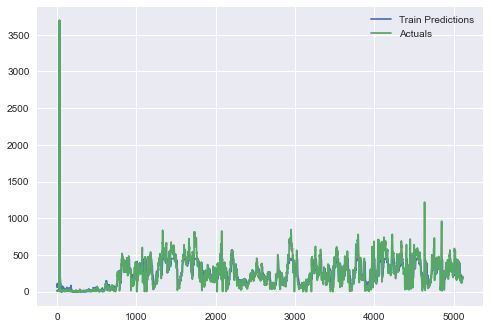

In [33]:
model = load_model('6H_Forecast/6H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(6,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])